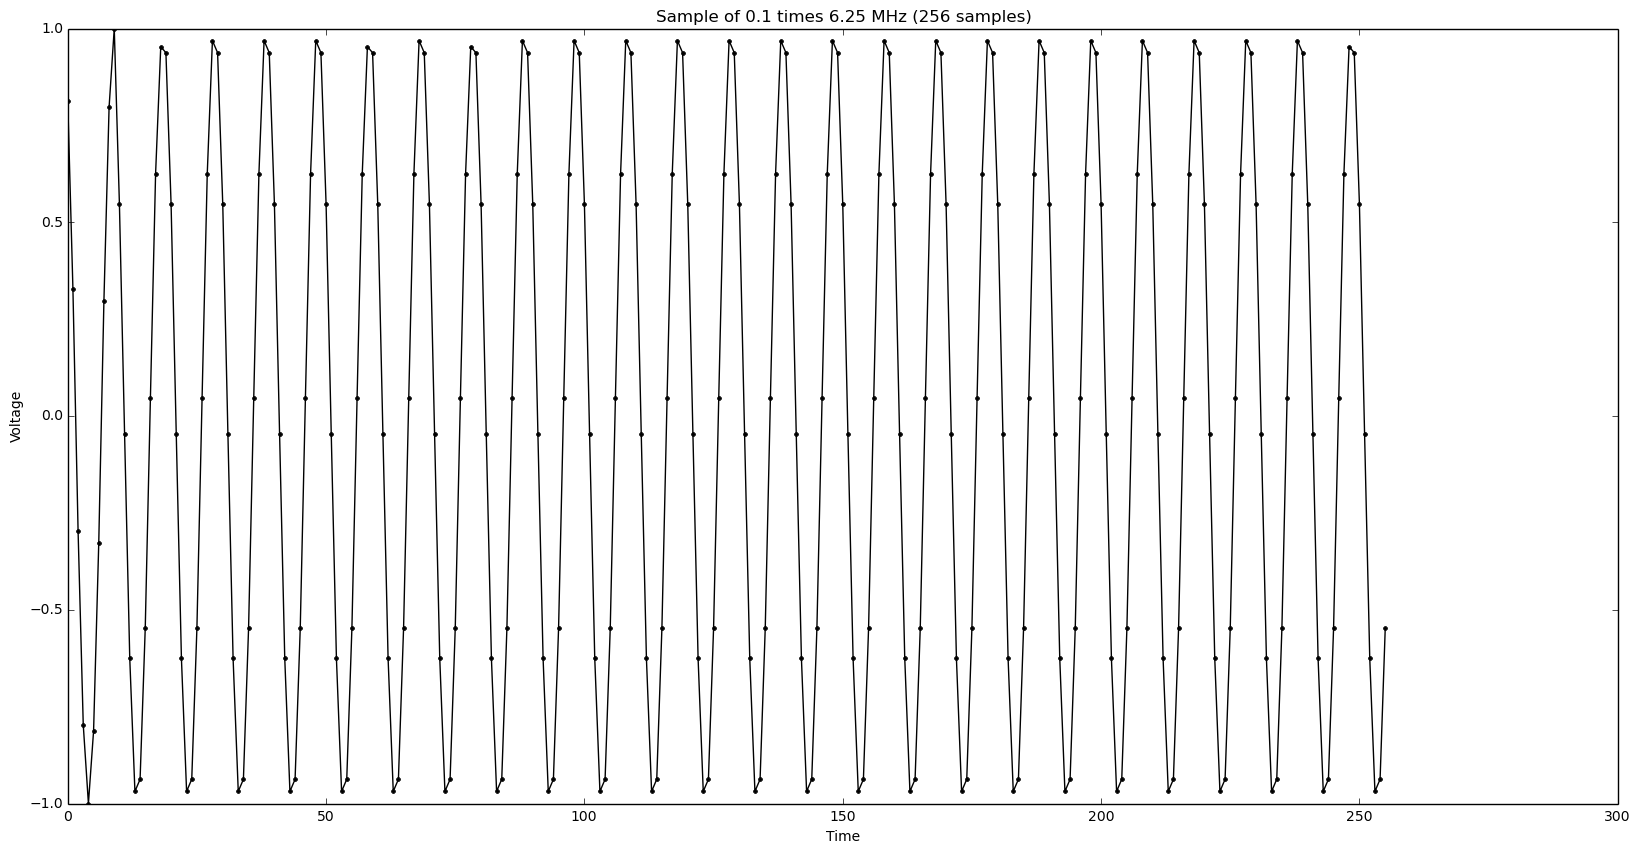

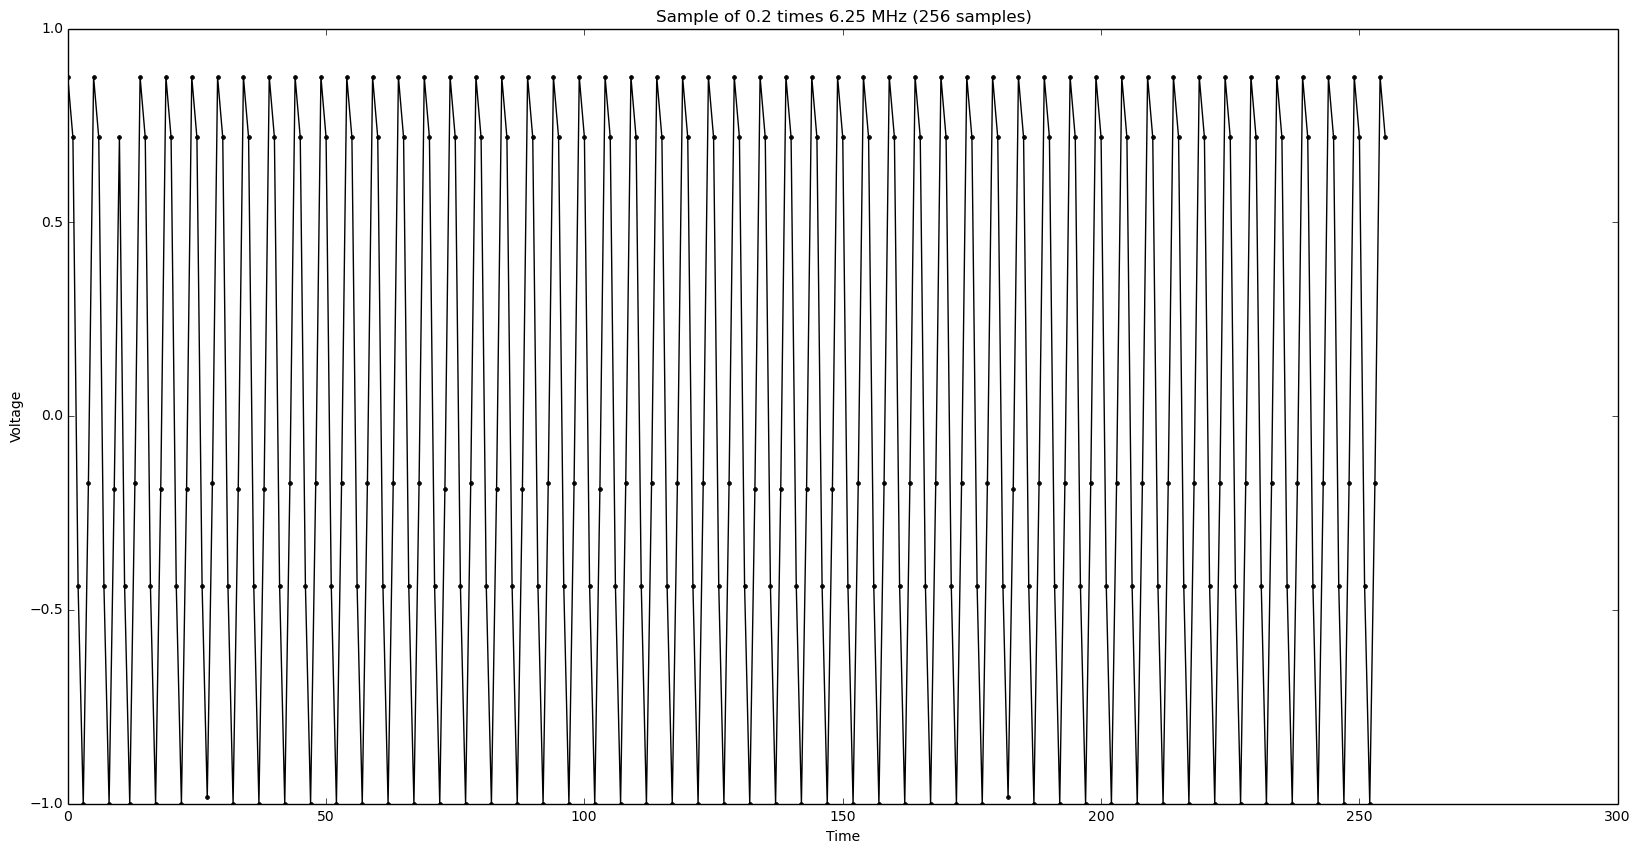

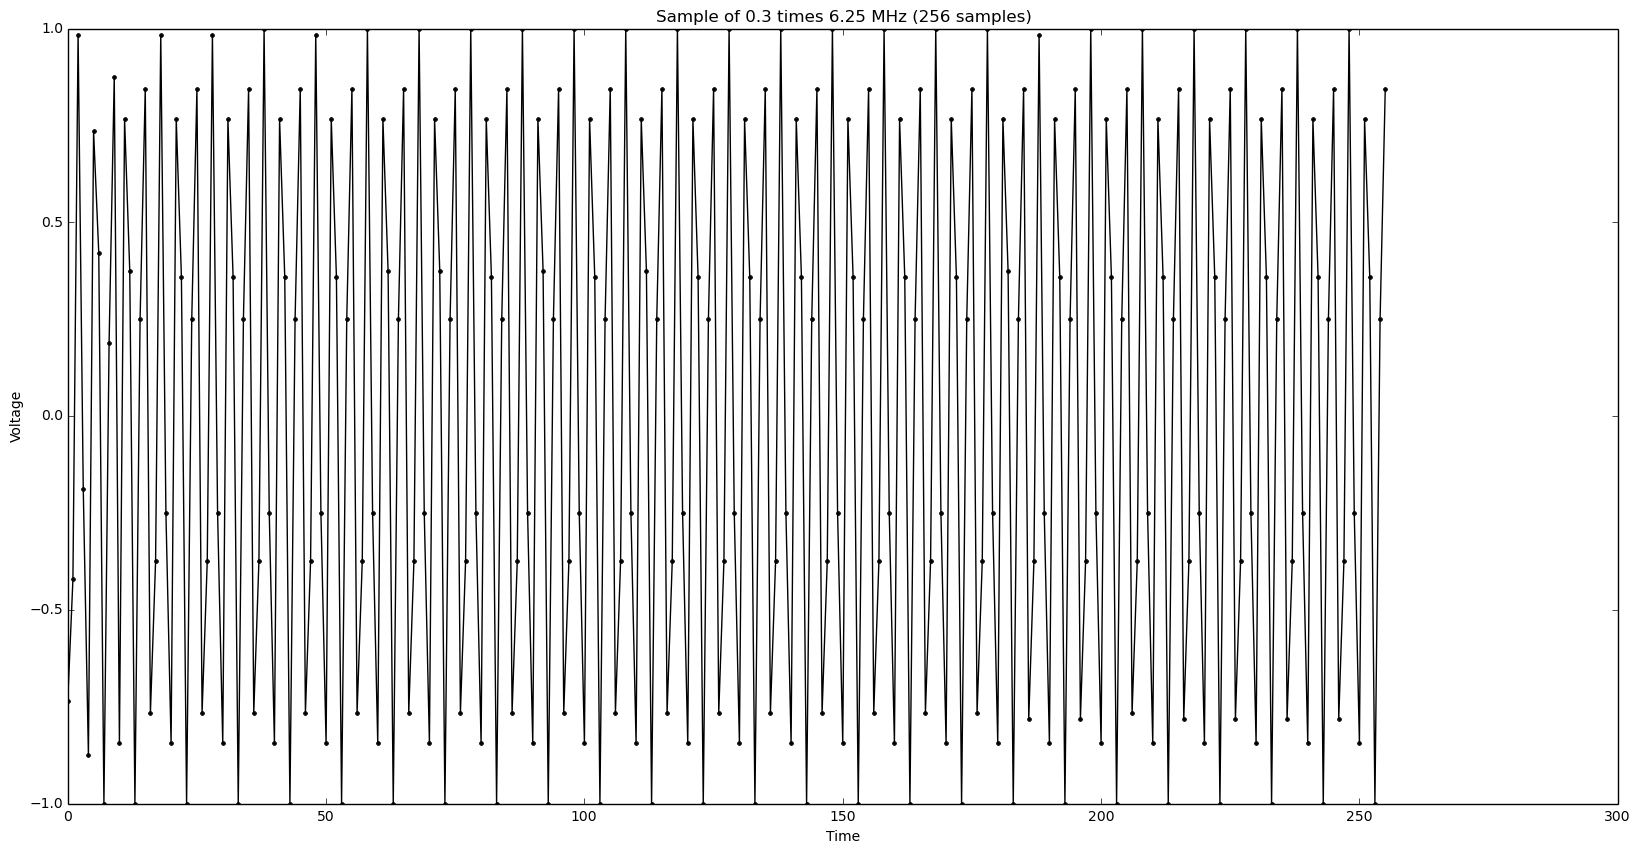

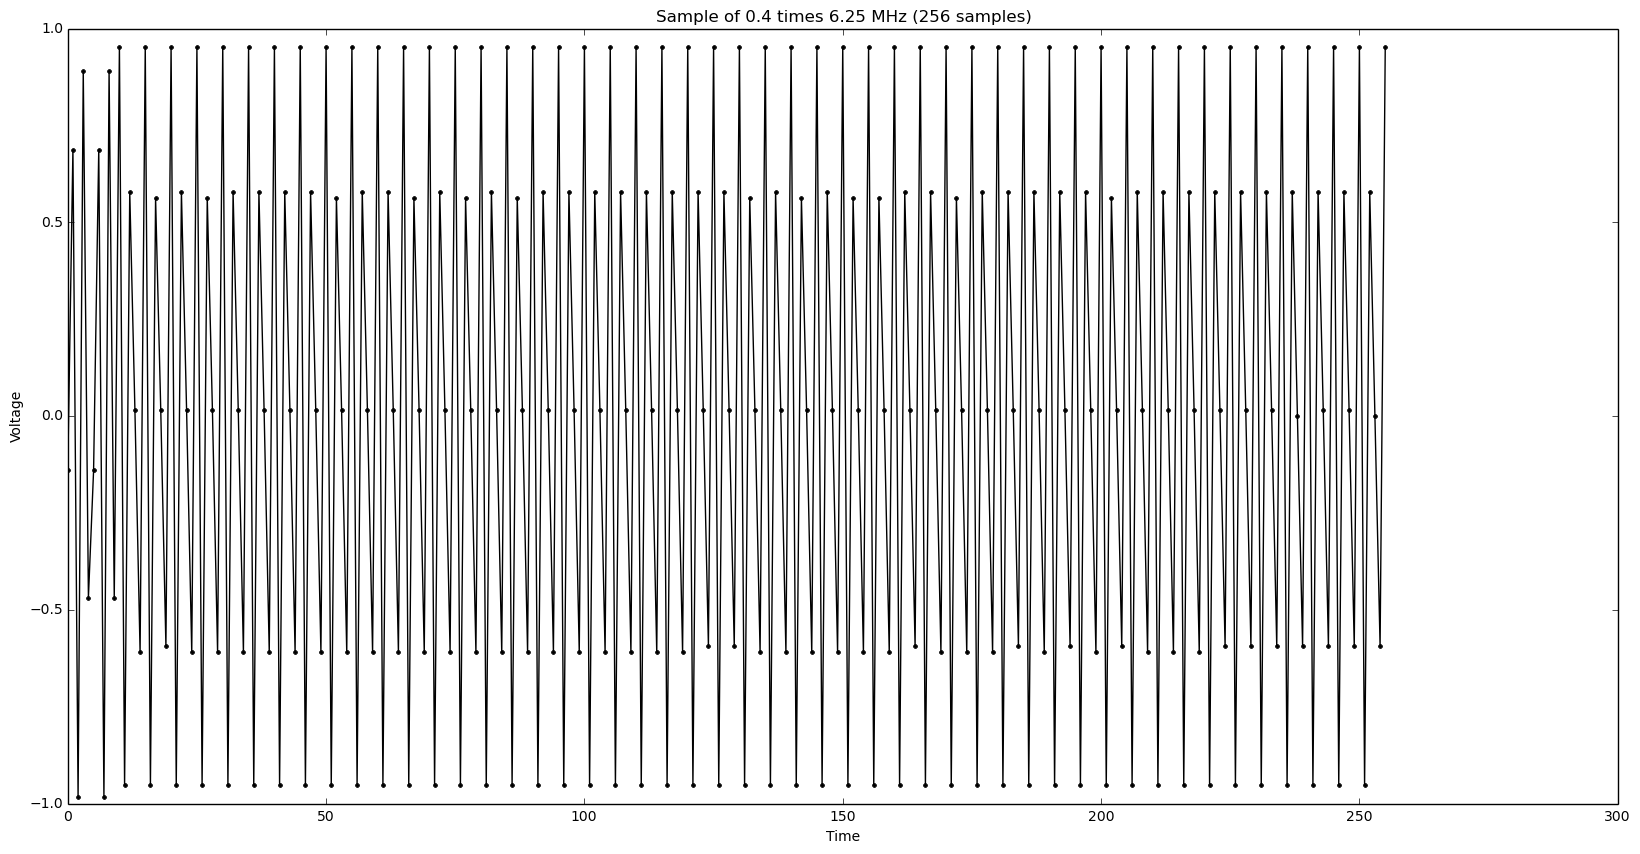

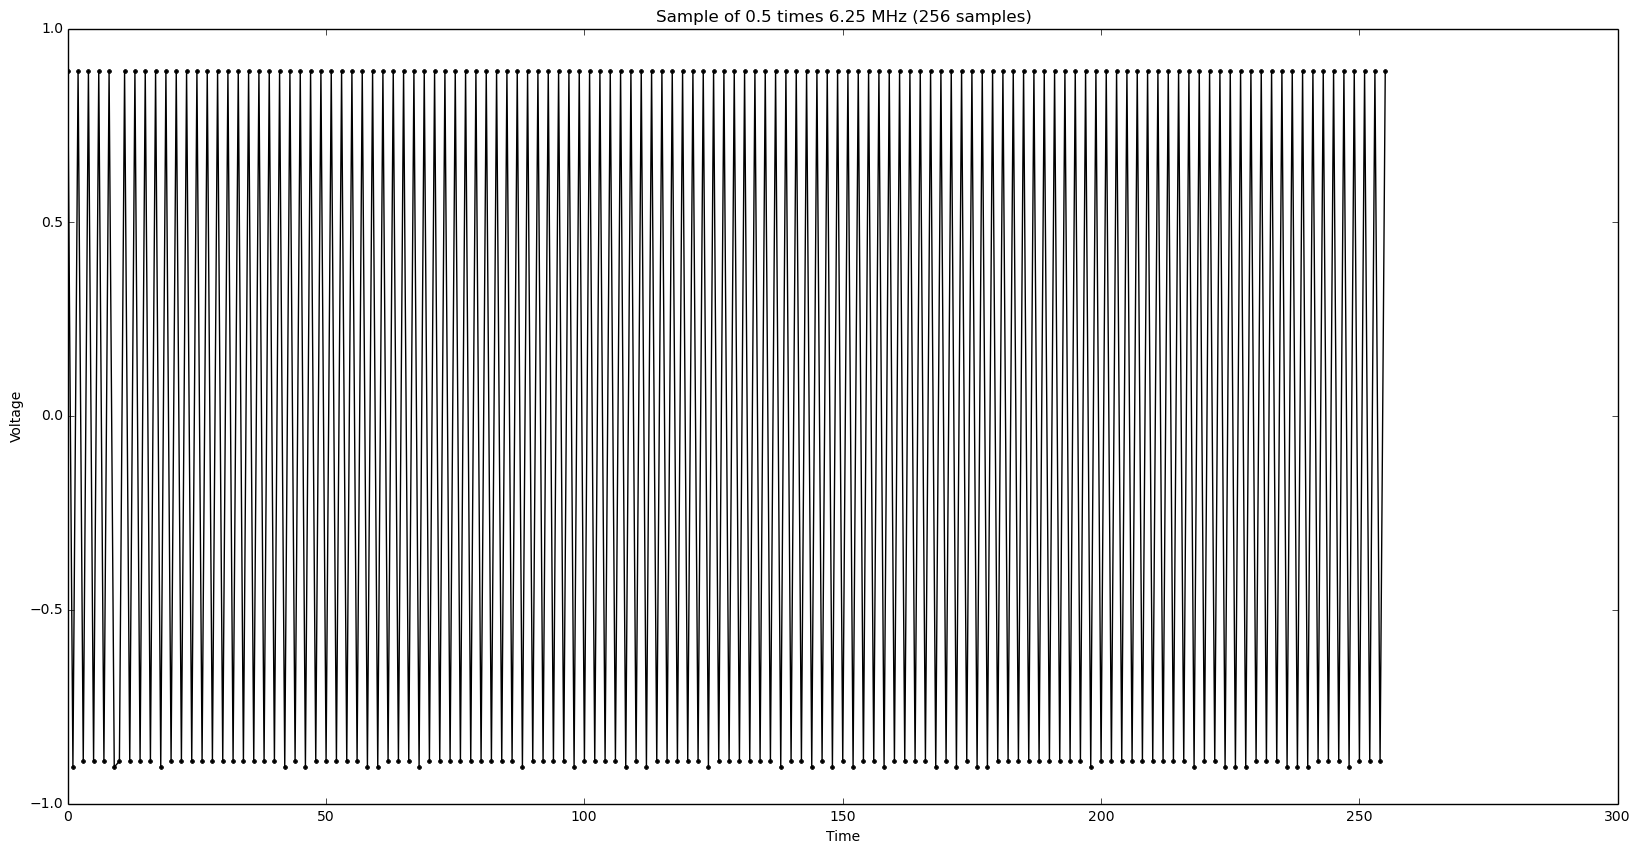

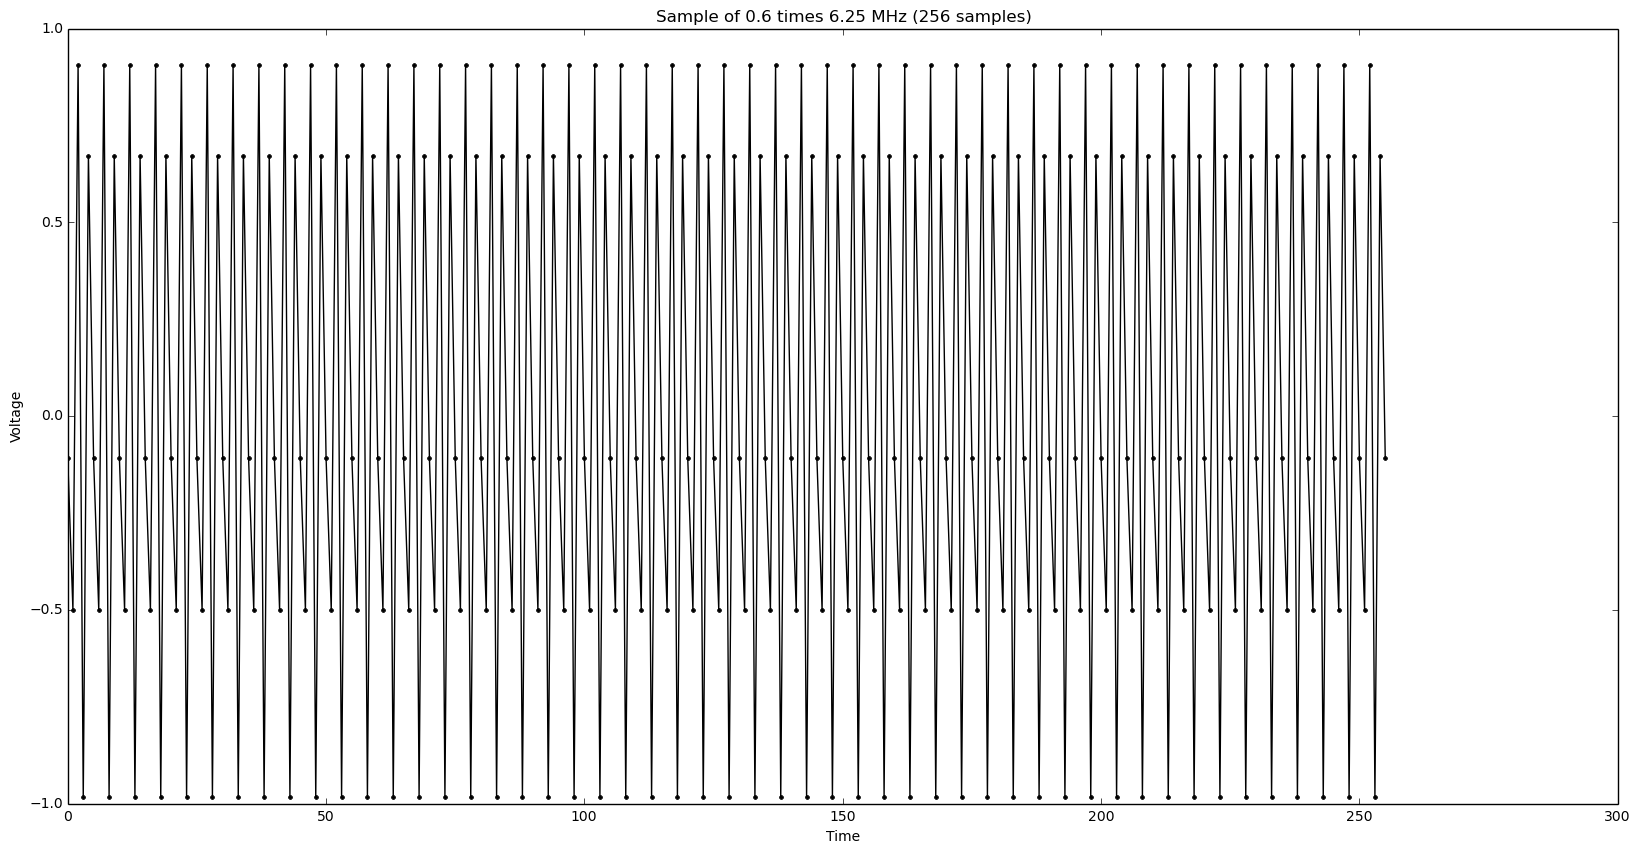

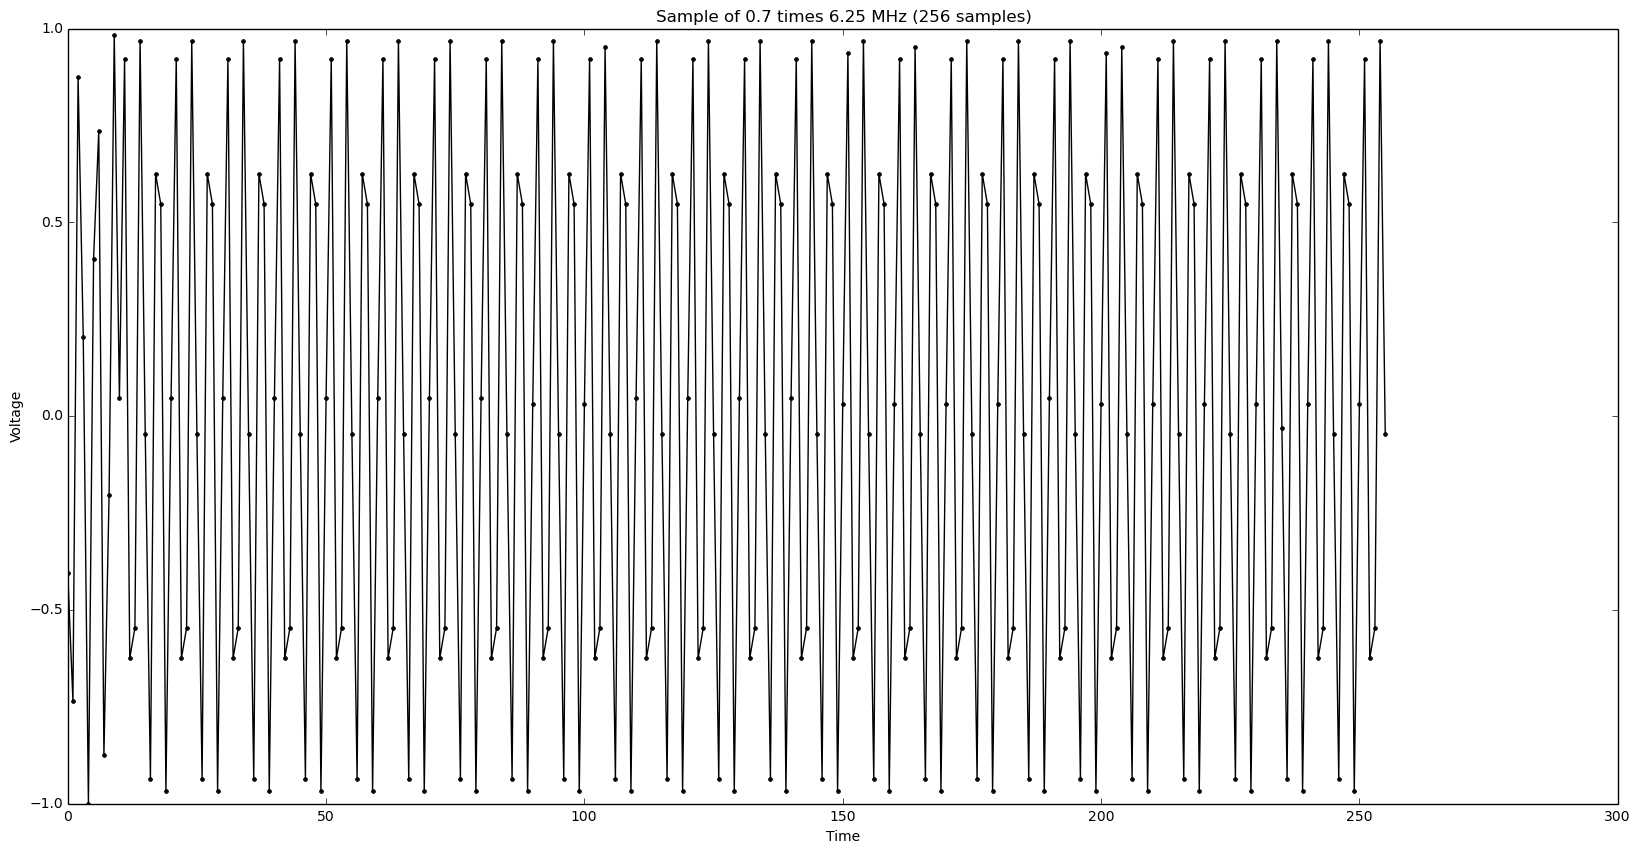

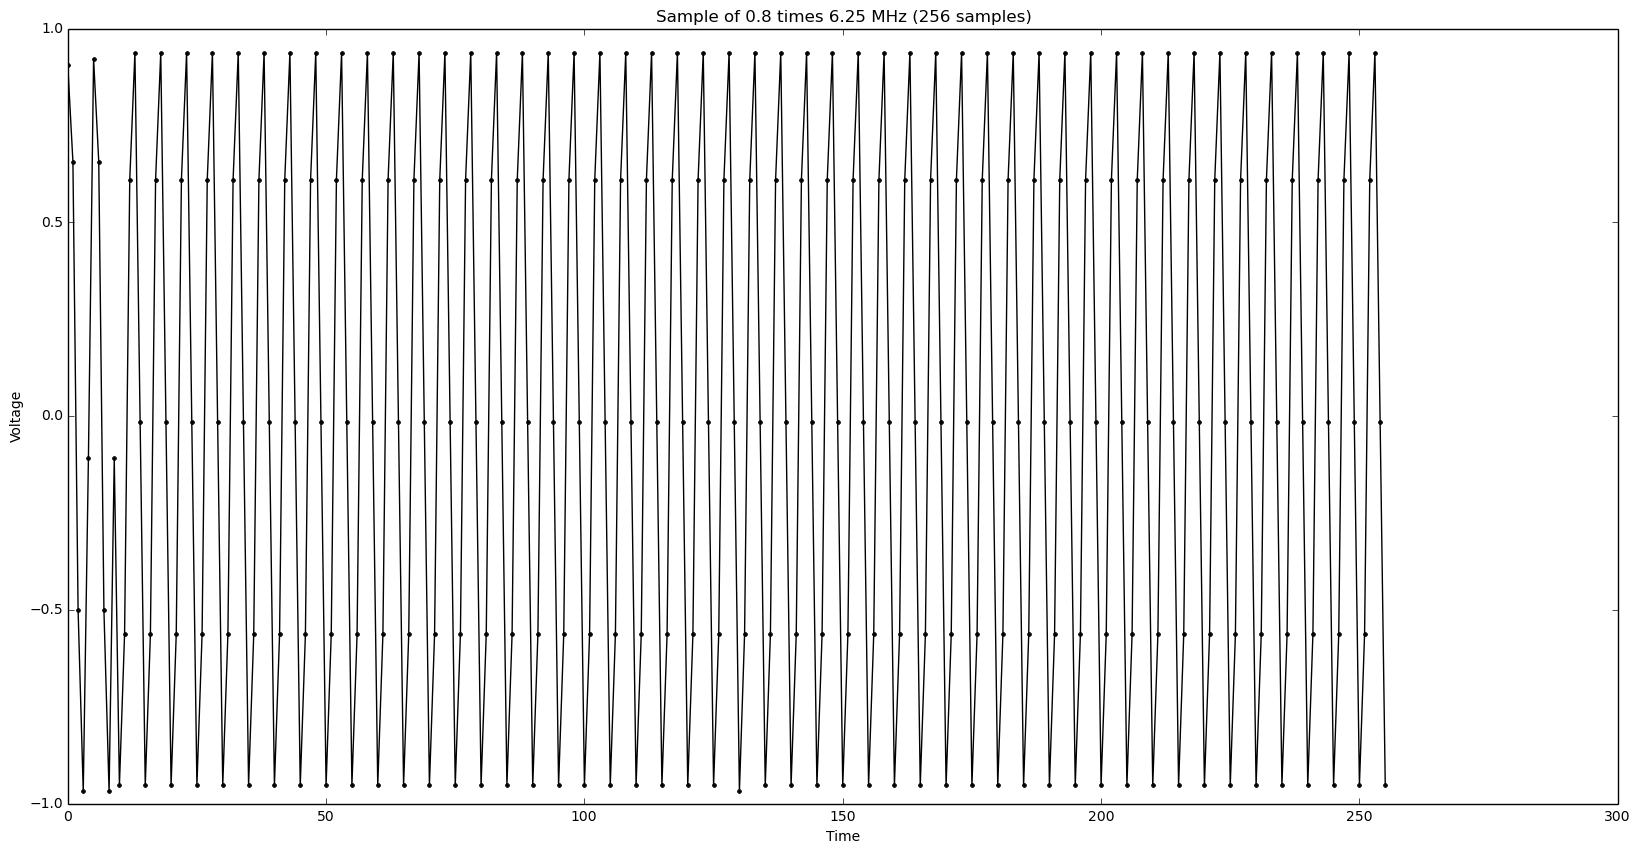

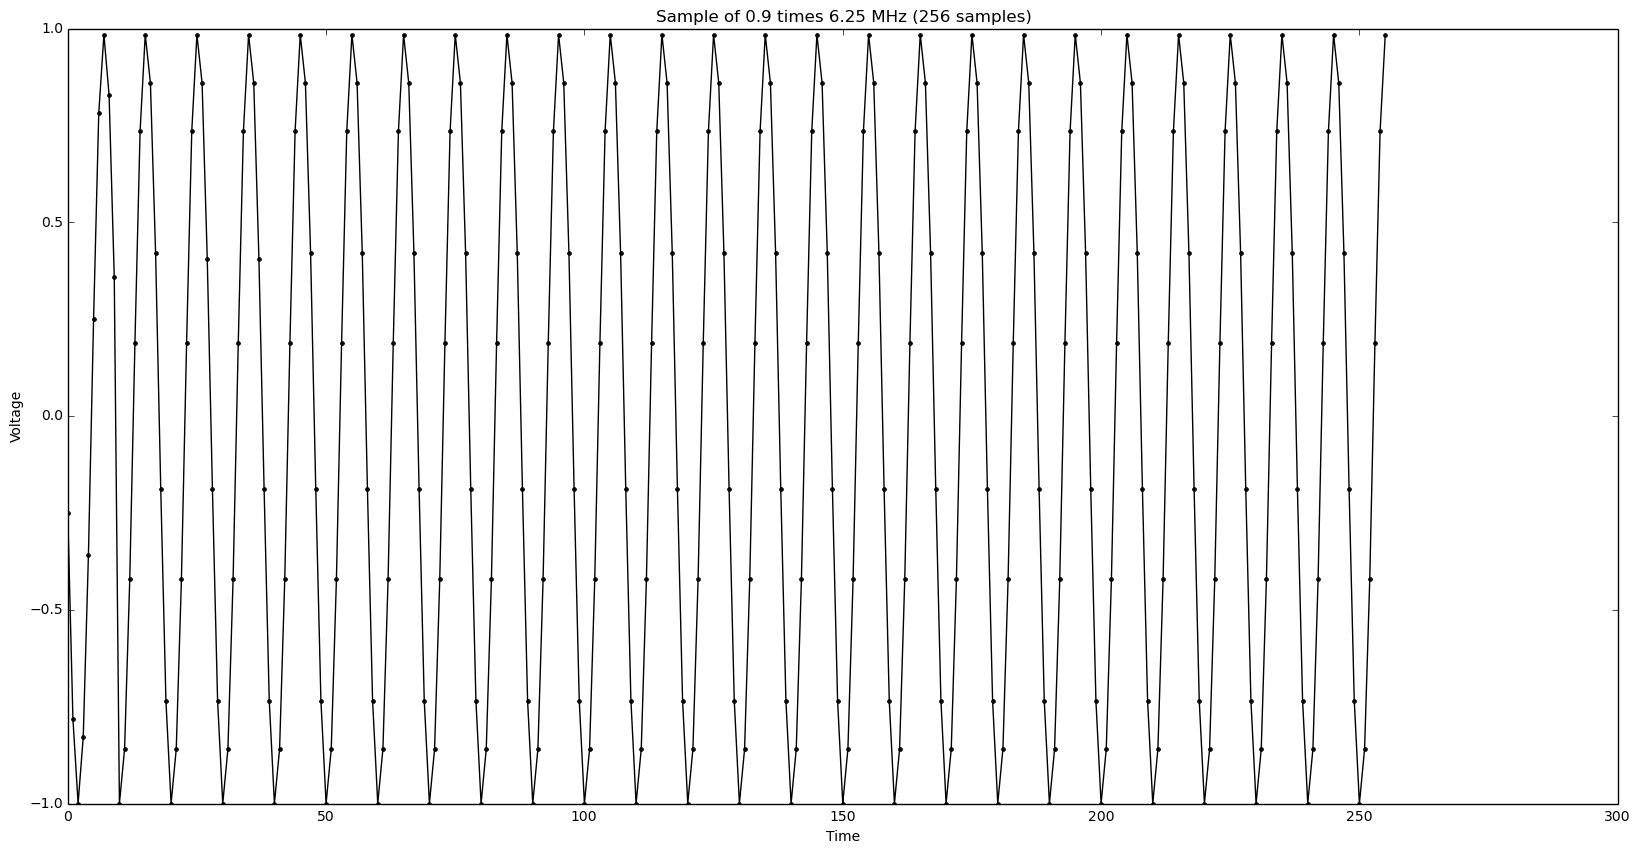

In [2]:
#3.2 Frequency Samples
%matplotlib inline
import matplotlib.pylab as pl
import numpy as np
import ugradio
N=256
v_samp = 6.25 #MHz
for i in range(1,10):
    filename = "sample_" + str(i) + ".npy"
    arr_plot = np.load(filename)
    arr_plot = np.divide(arr_plot, 16384.0)
    pl.figure(i, figsize=(20,10))
    pl.title("Sample of 0." + str(i) + " times " + str(v_samp) + " MHz (" + str(N) + " samples)")
    pl.plot (arr_plot[:N], 'k.-')
    pl.xlabel ('Time')
    pl.ylabel ('Voltage')

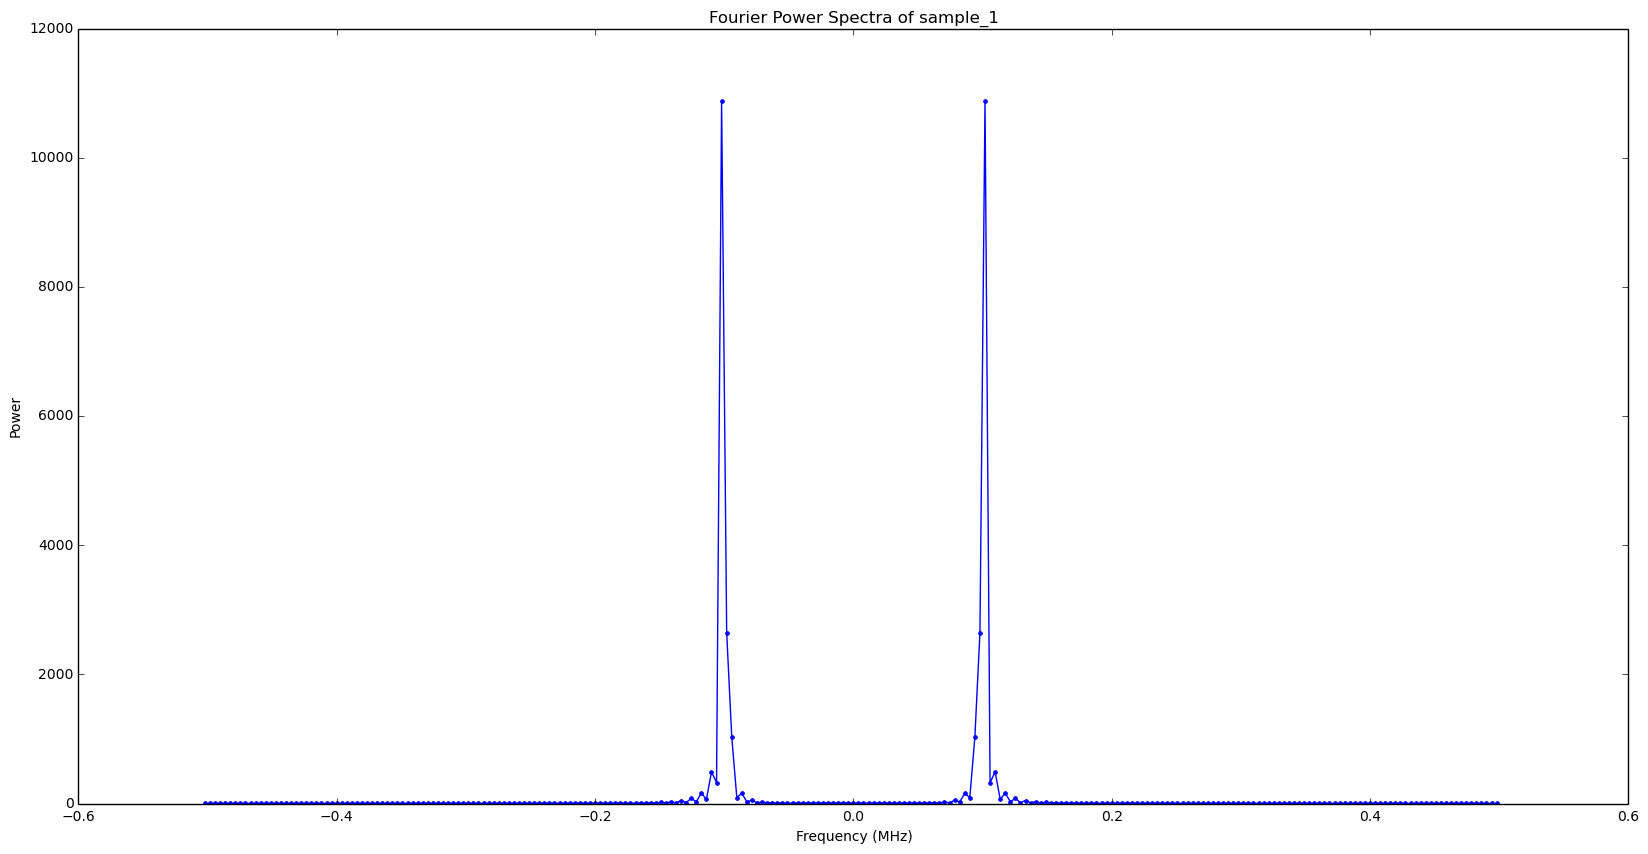

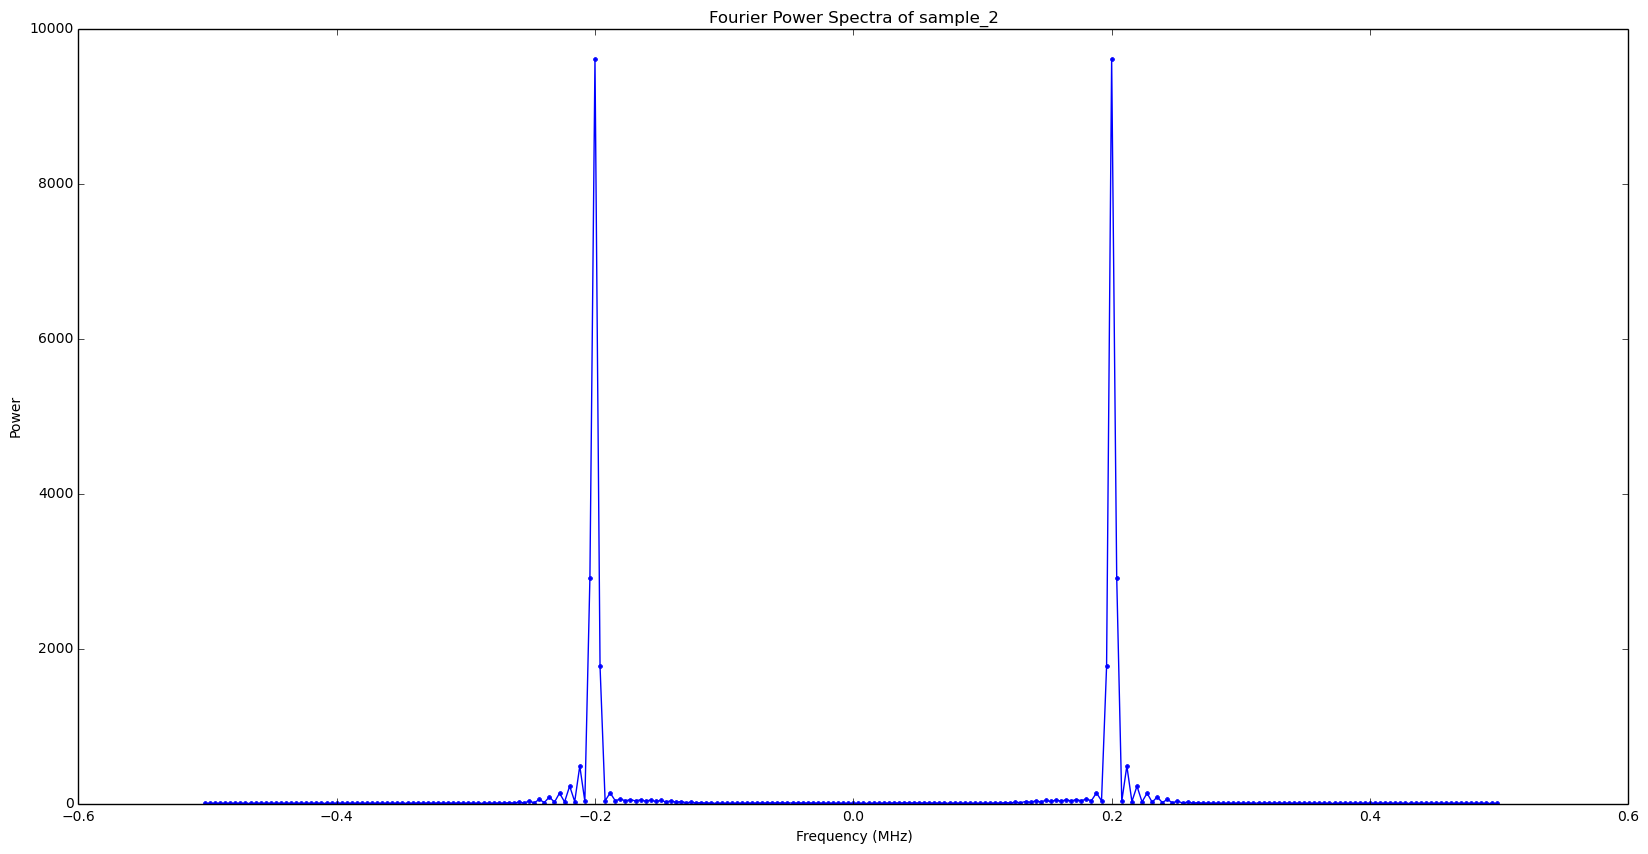

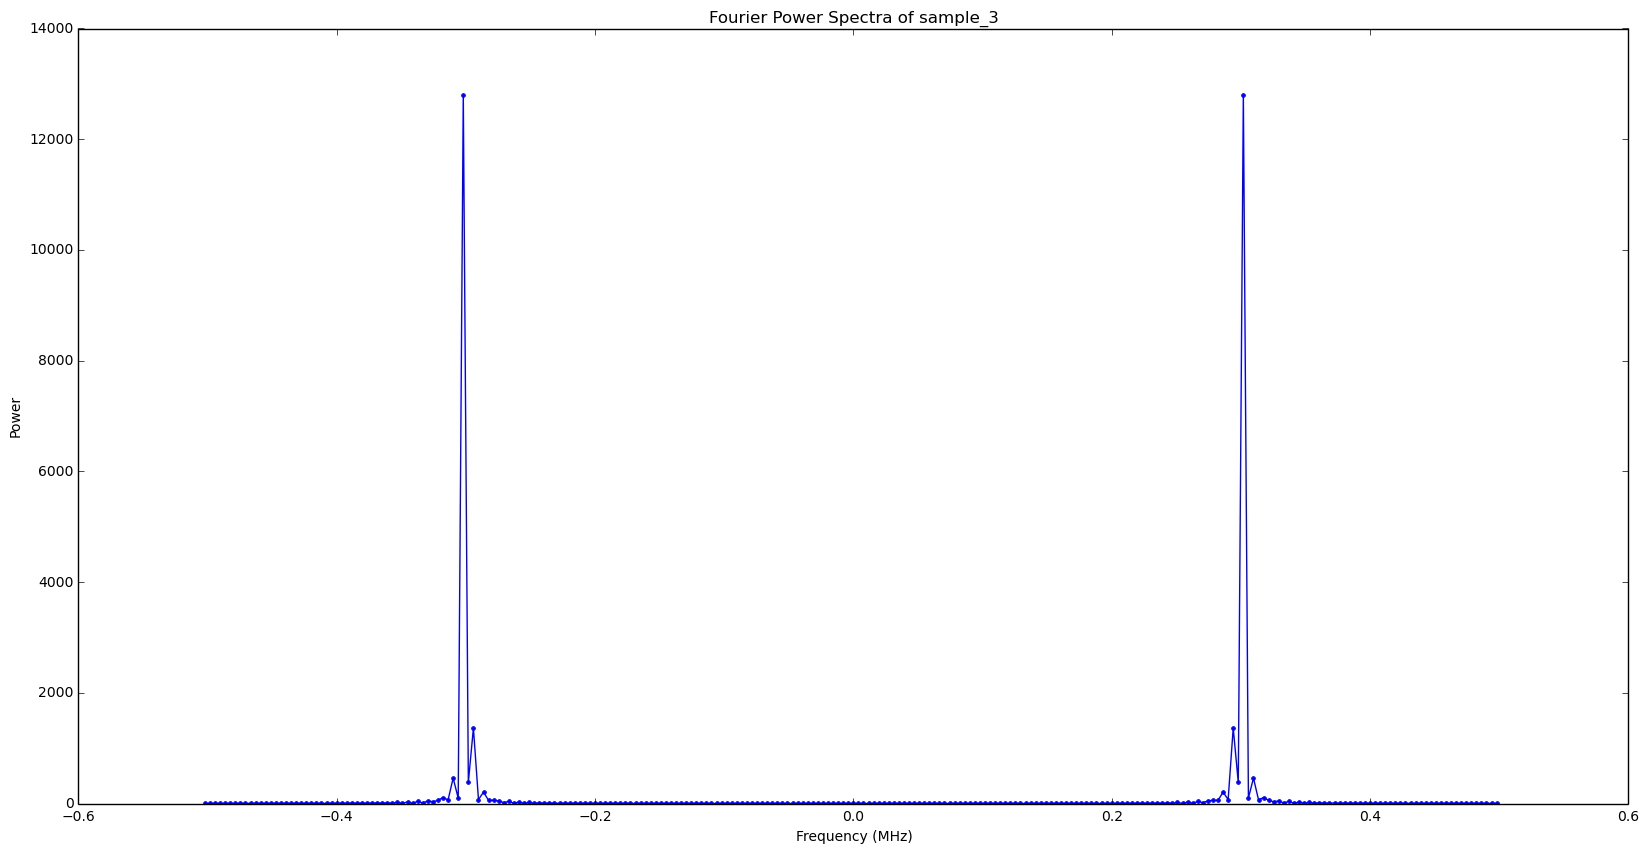

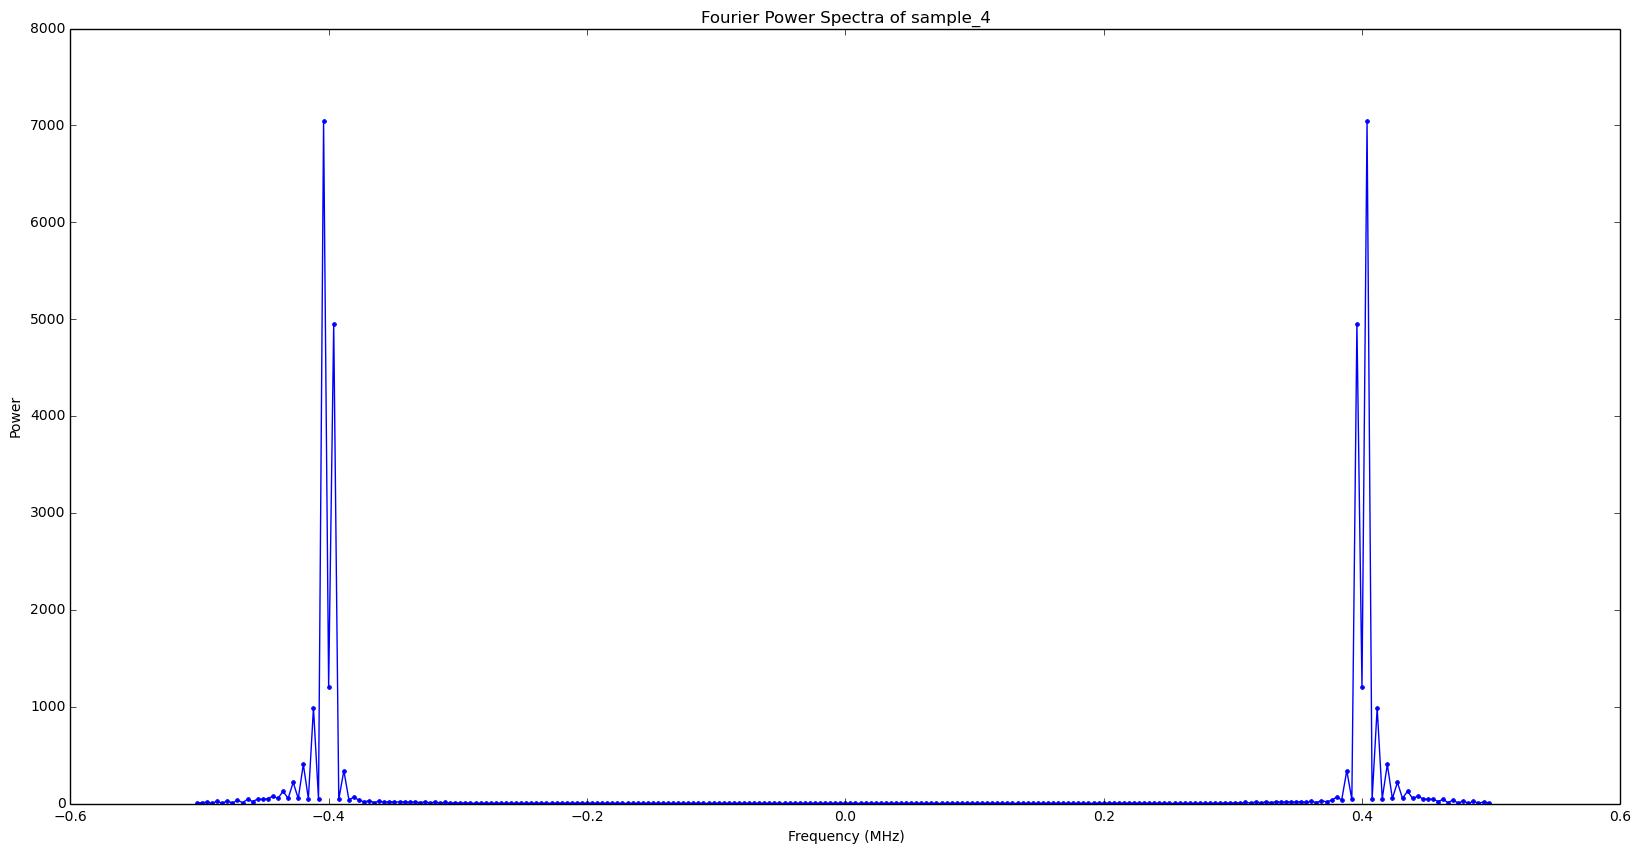

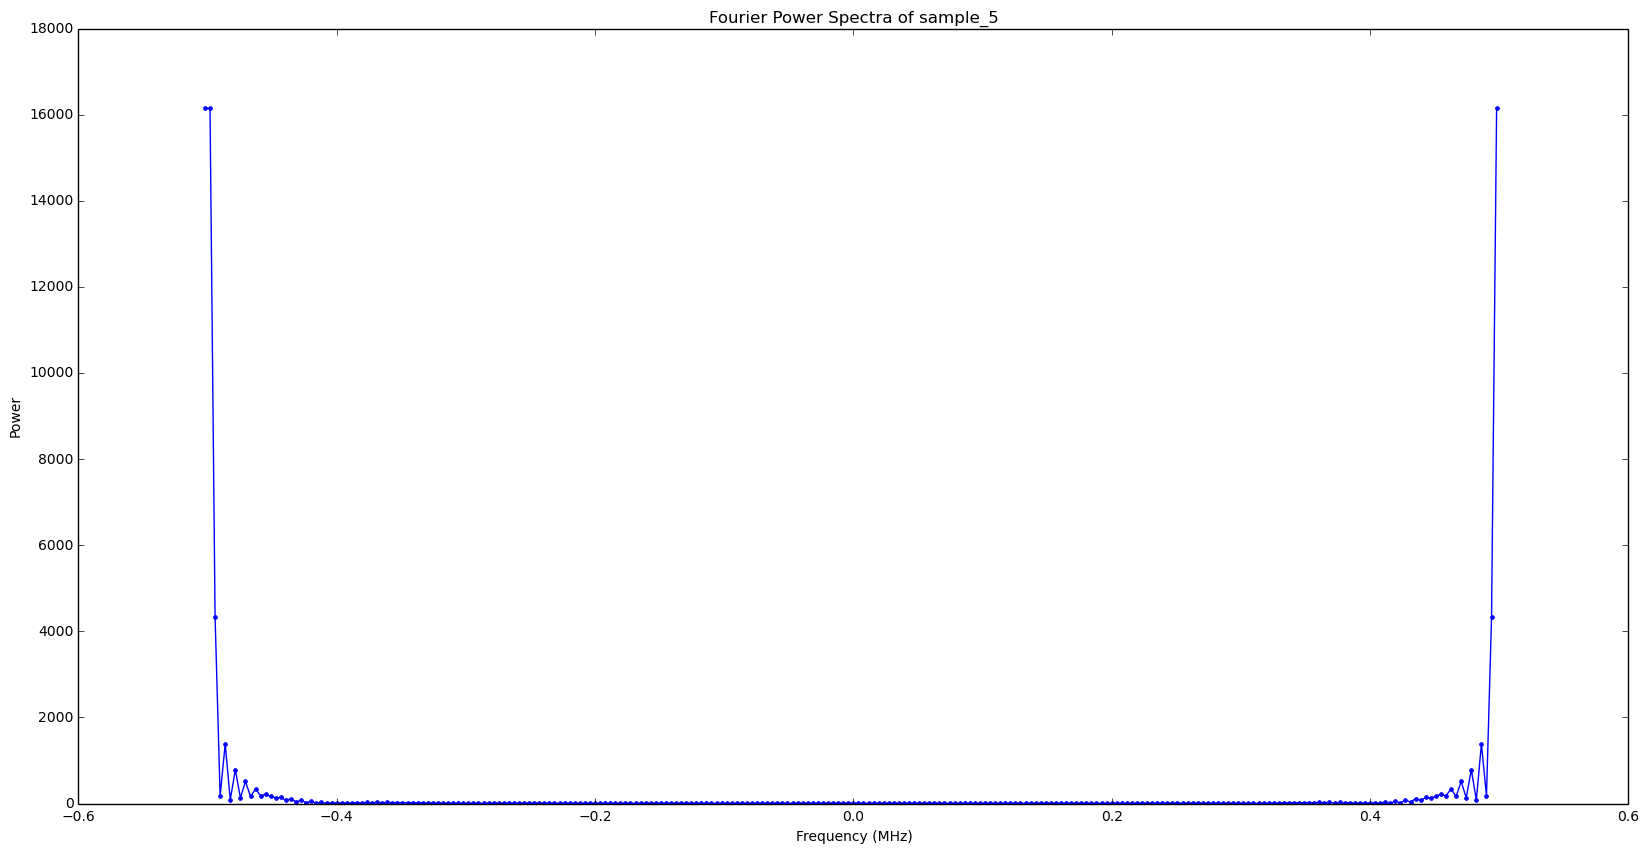

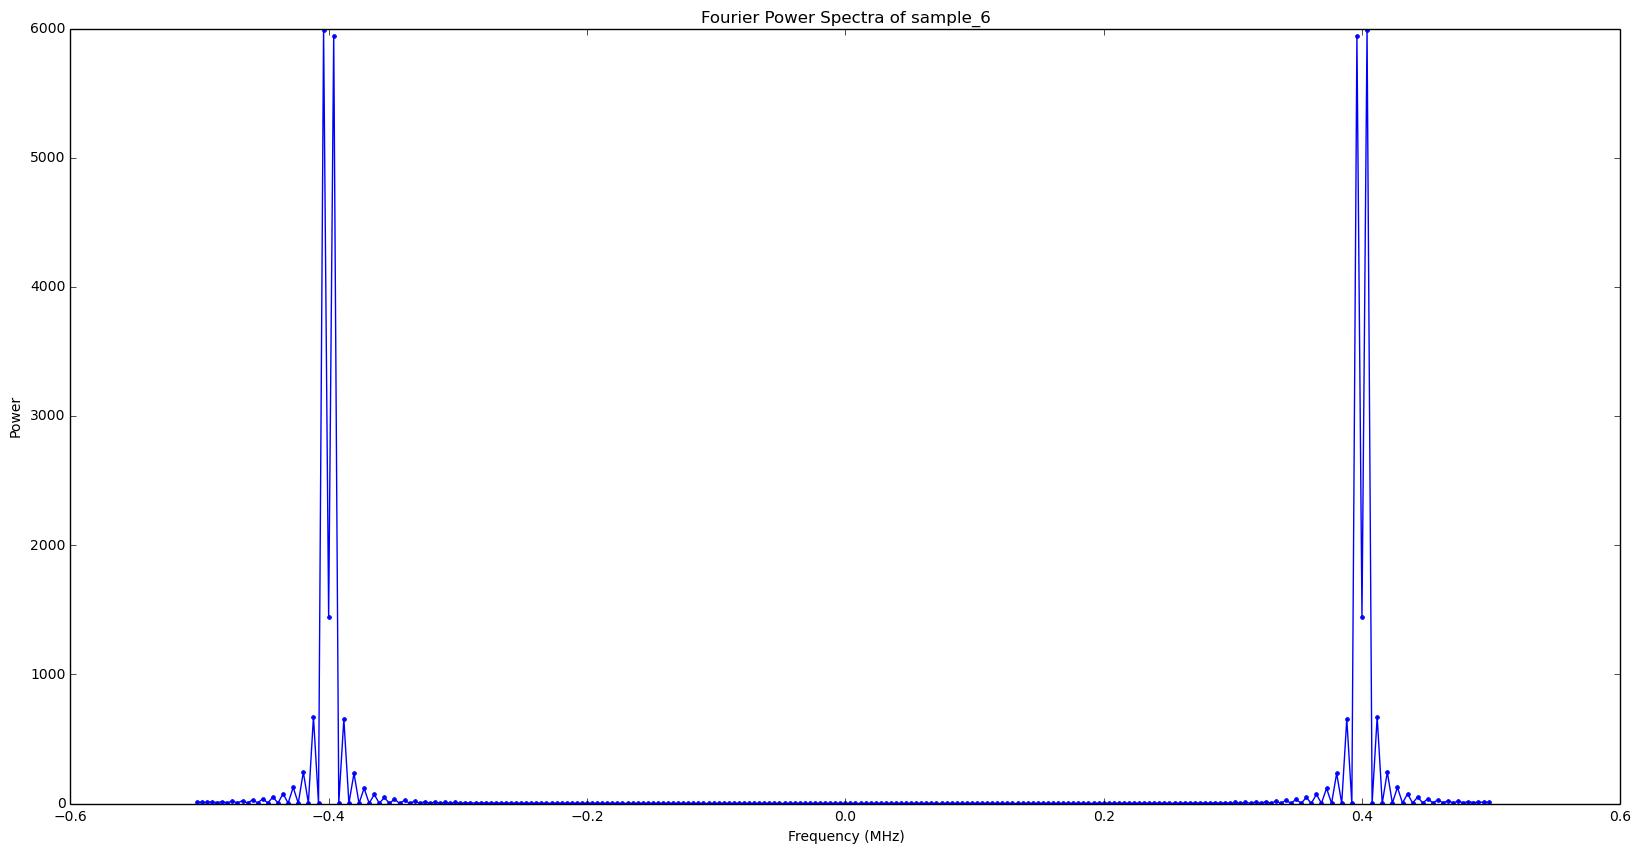

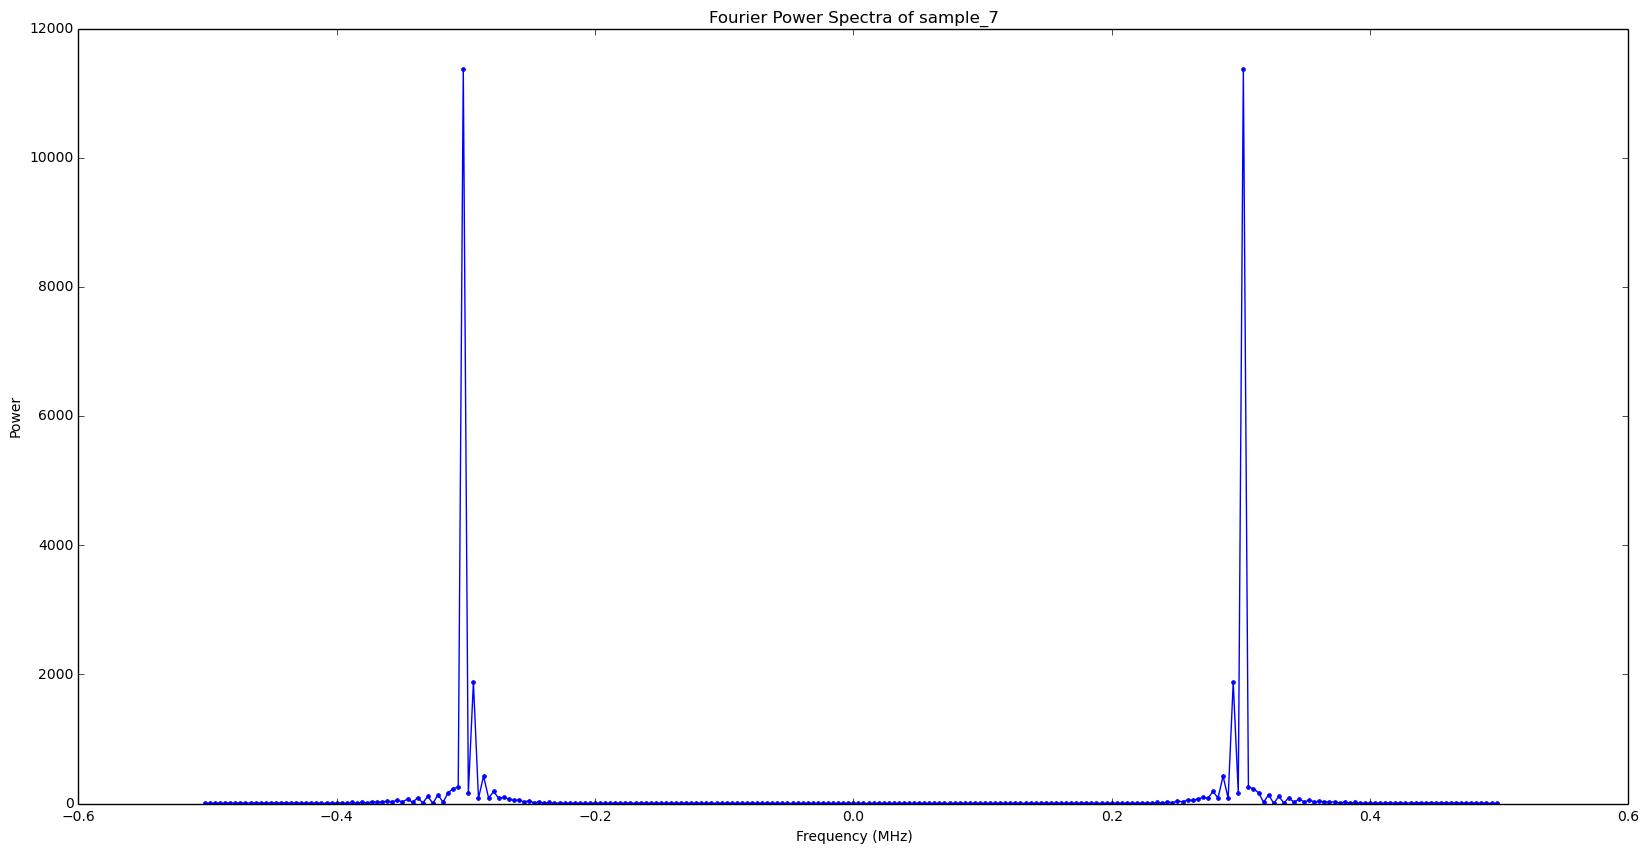

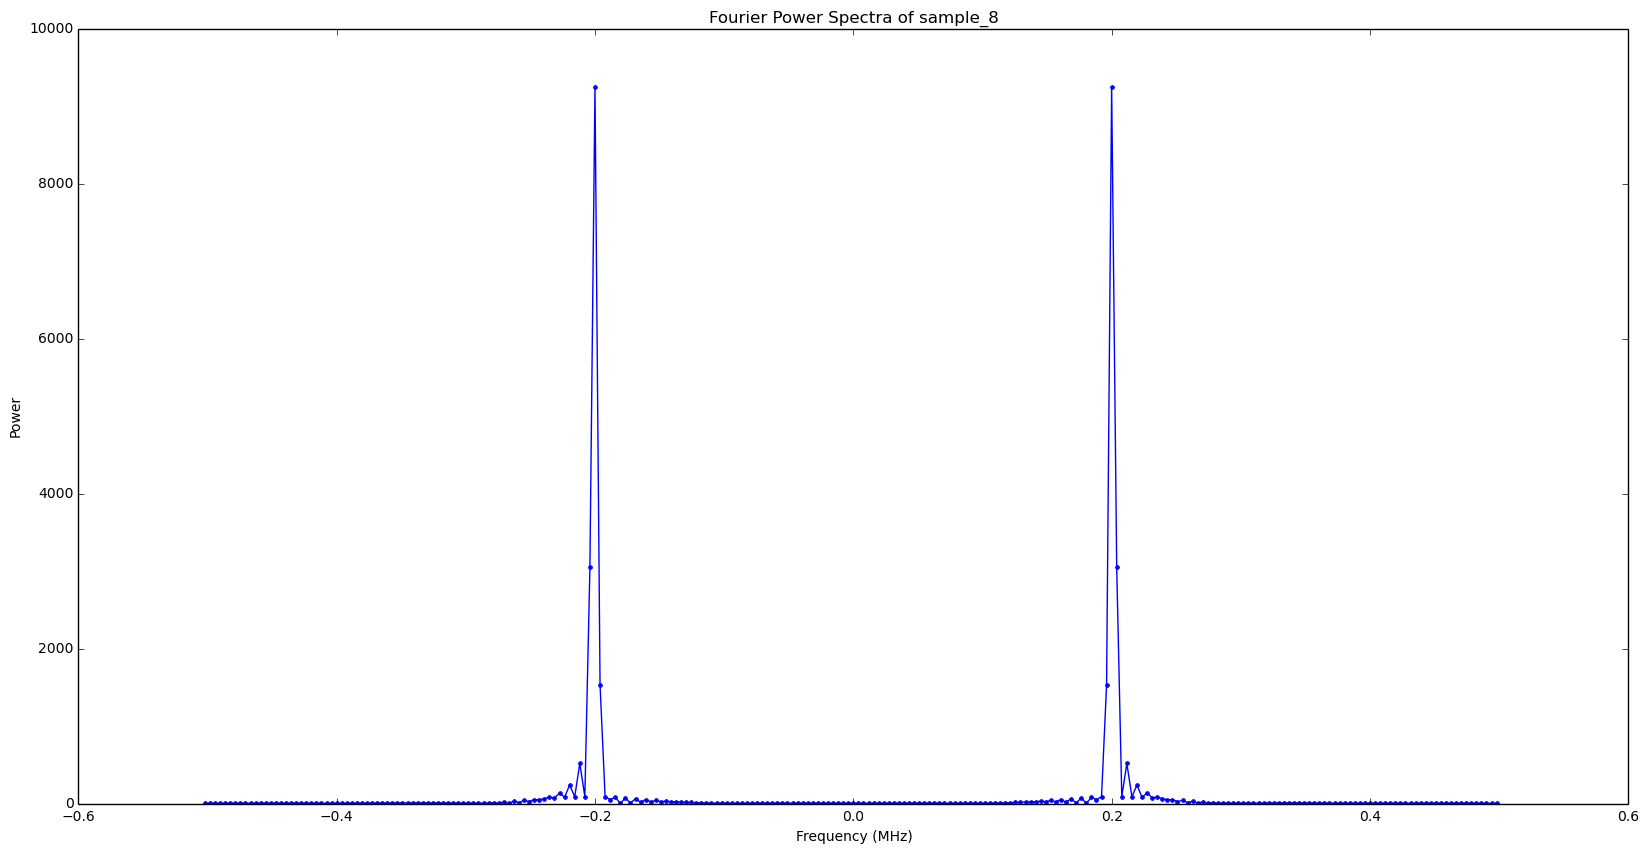

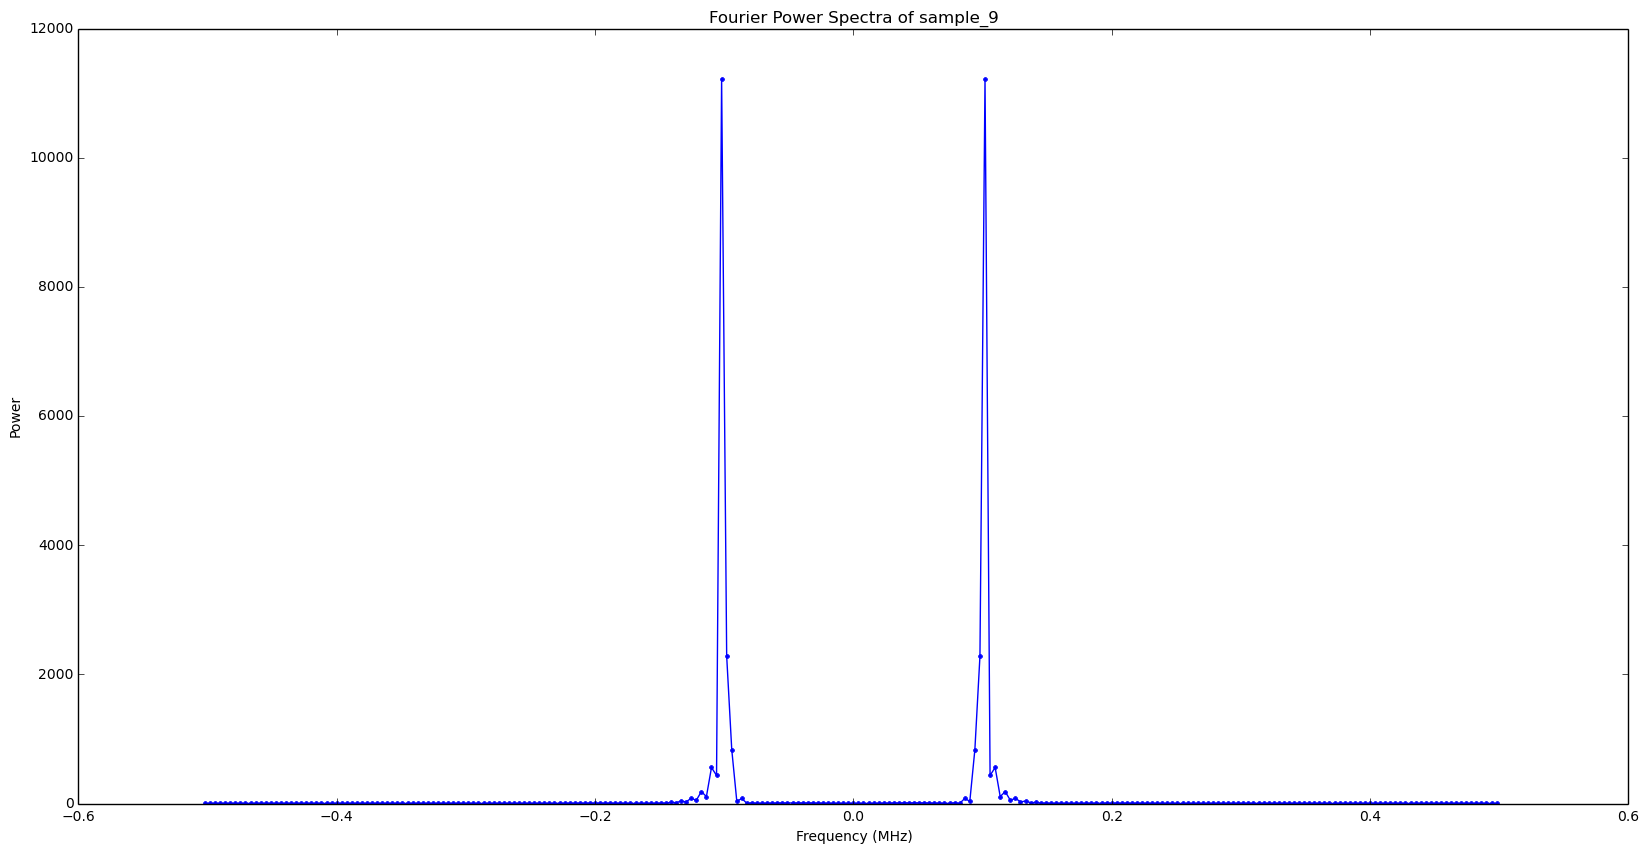

In [3]:
#3.2 Fourier Power Spectra
N=256
for i in range(1,10):
    filename = "sample_" + str(i) + ".npy"
    test_arr = np.load(filename)
    test_arr = np.divide(test_arr, 16384.0)
    freq_new, fourier_plot = ugradio.dft.dft(test_arr[:N])
    fourier_plot = np.abs(fourier_plot)**2
    pl.figure(i, figsize=(20,10))
    pl.title("Fourier Power Spectra of sample_" + str(i))
    pl.xlabel('Frequency (MHz)')
    pl.ylabel('Power')
    pl.plot(freq_new, fourier_plot, 'b.-')

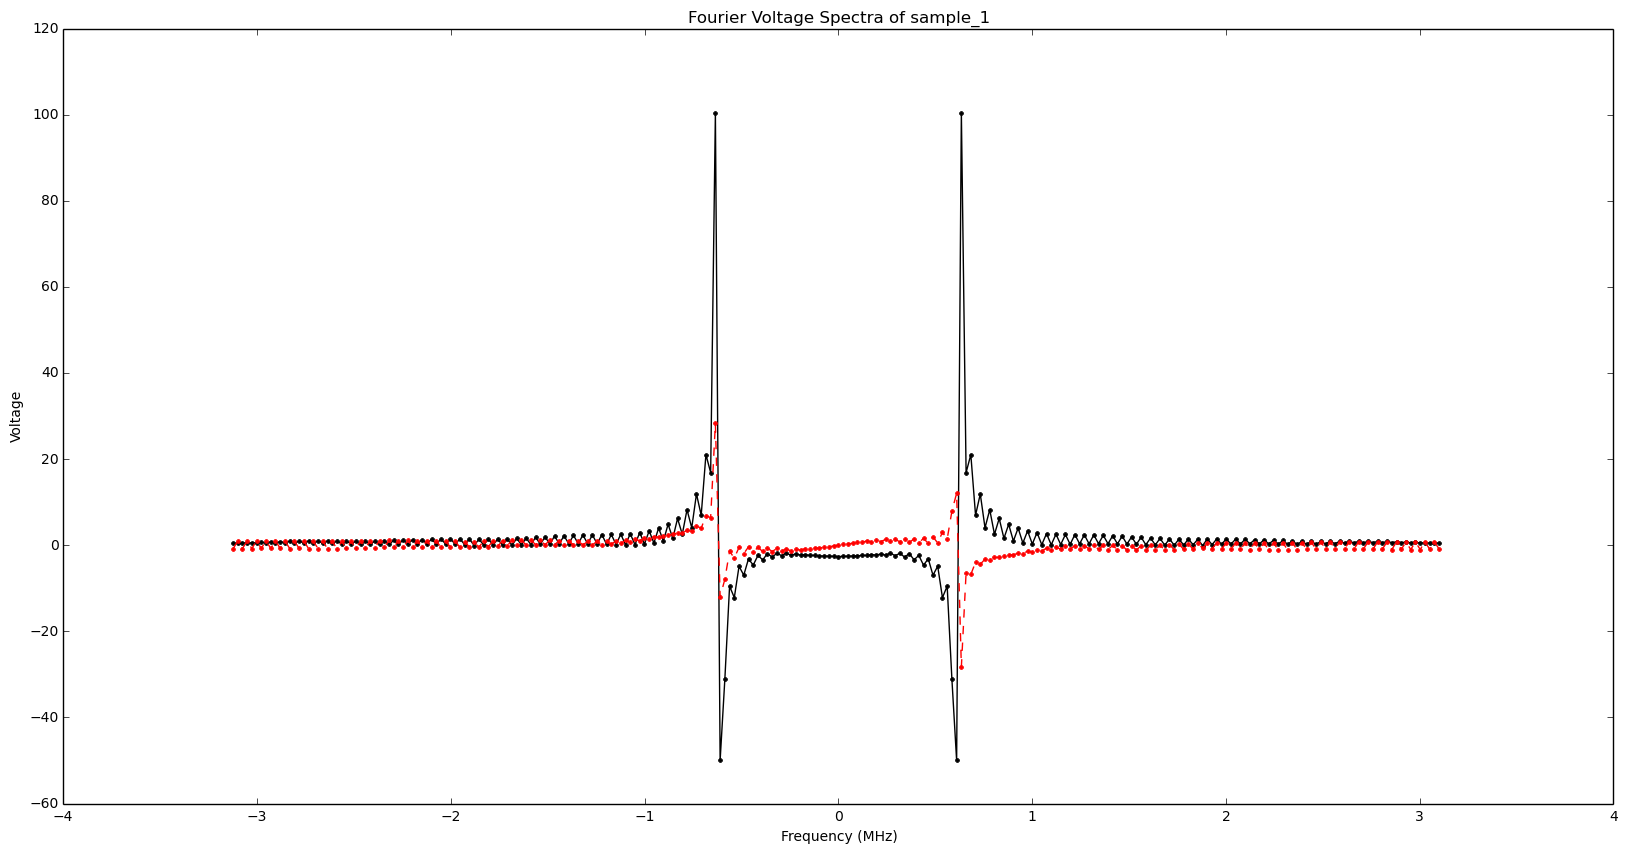

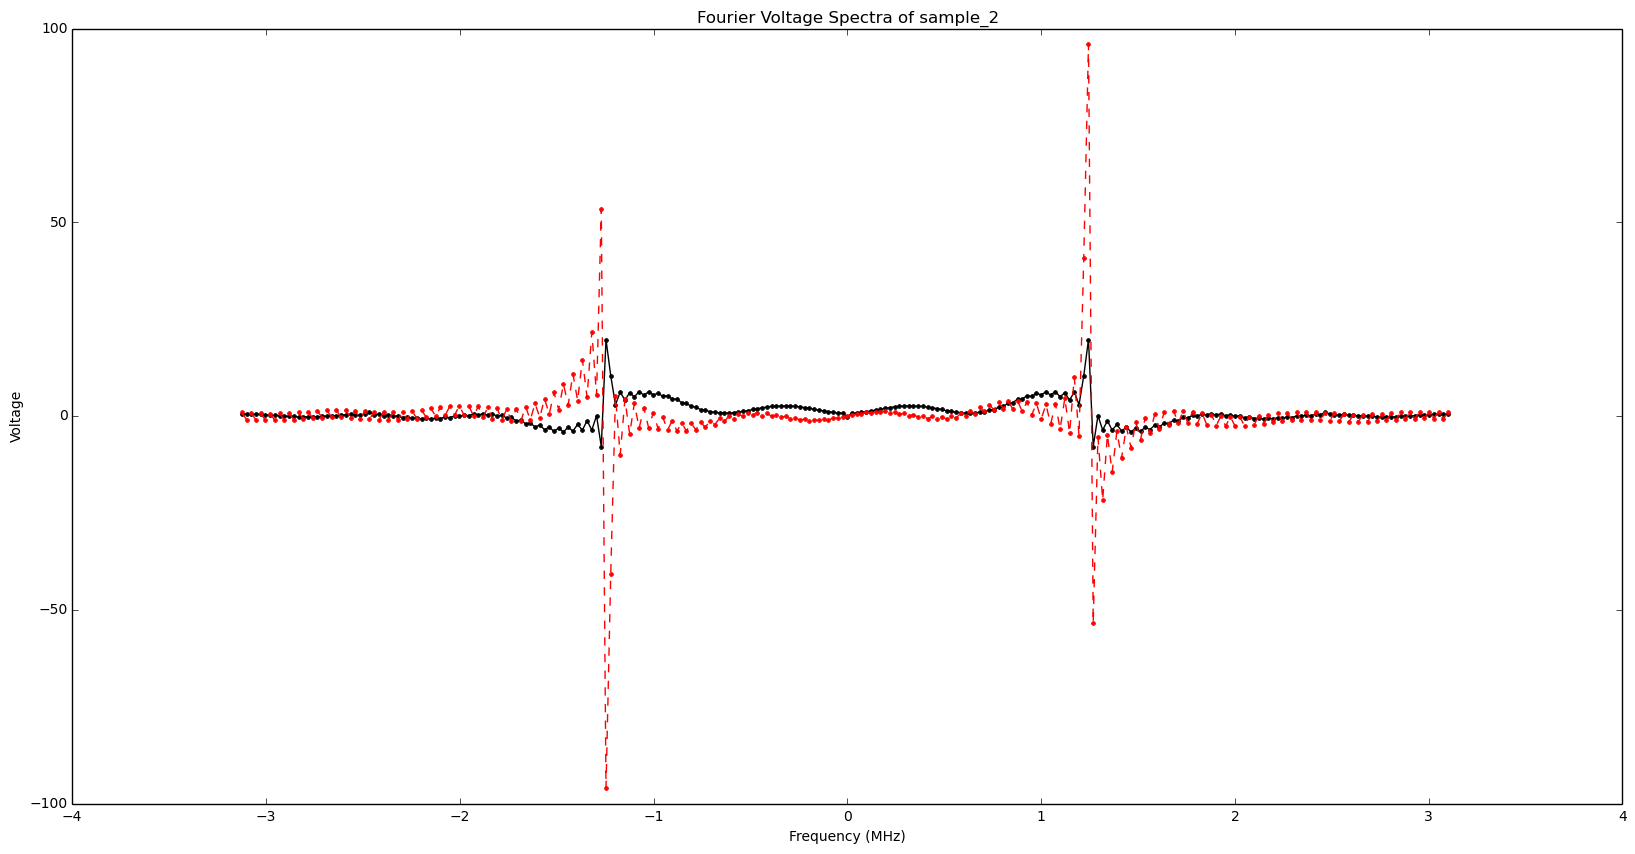

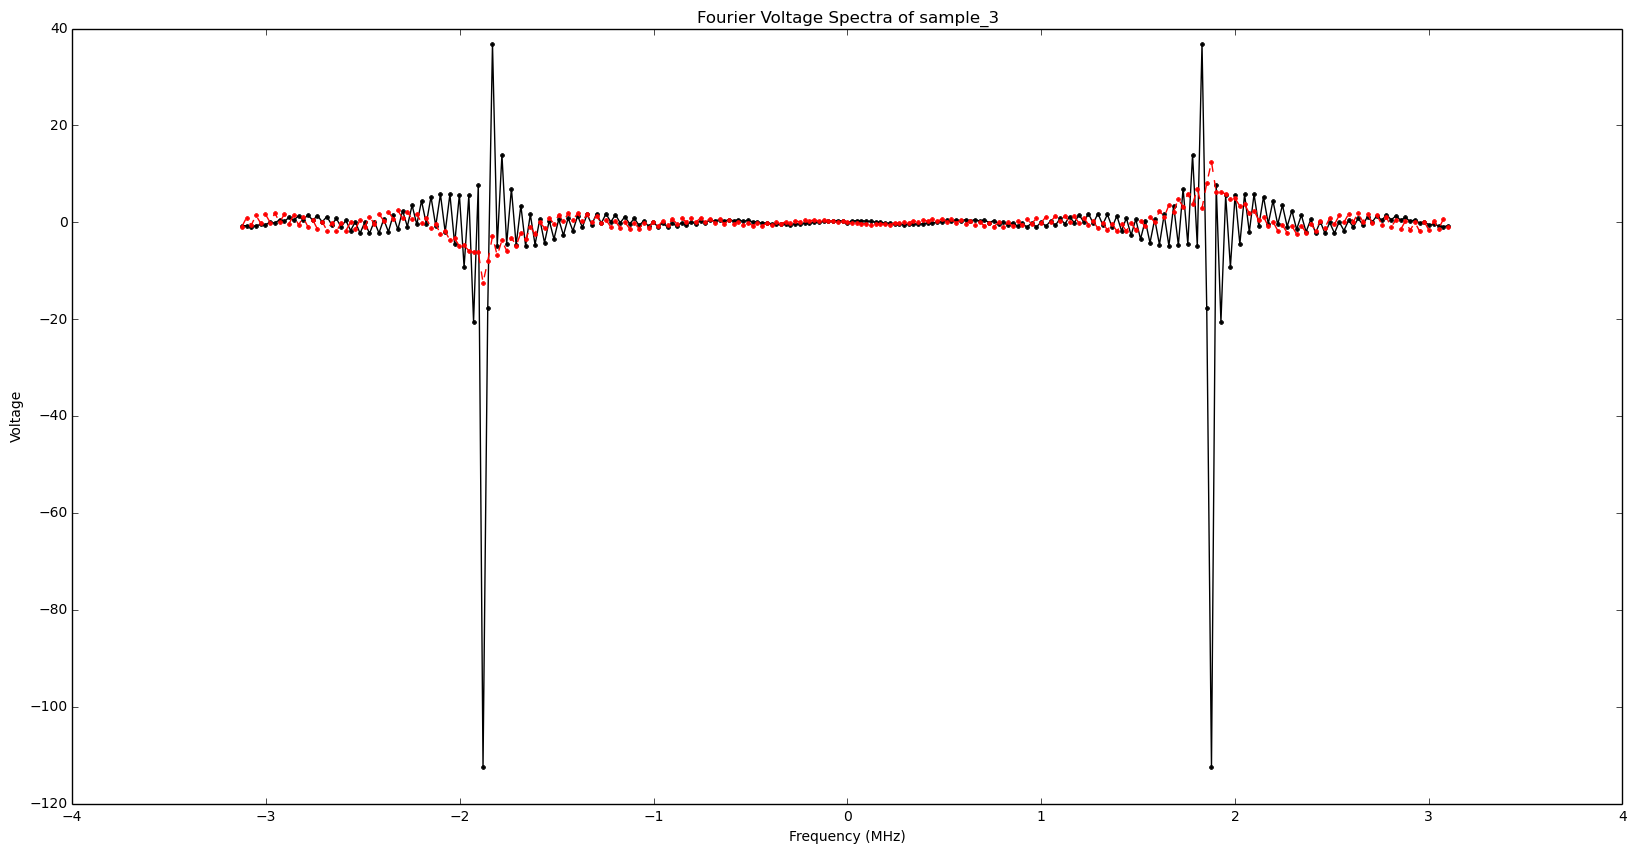

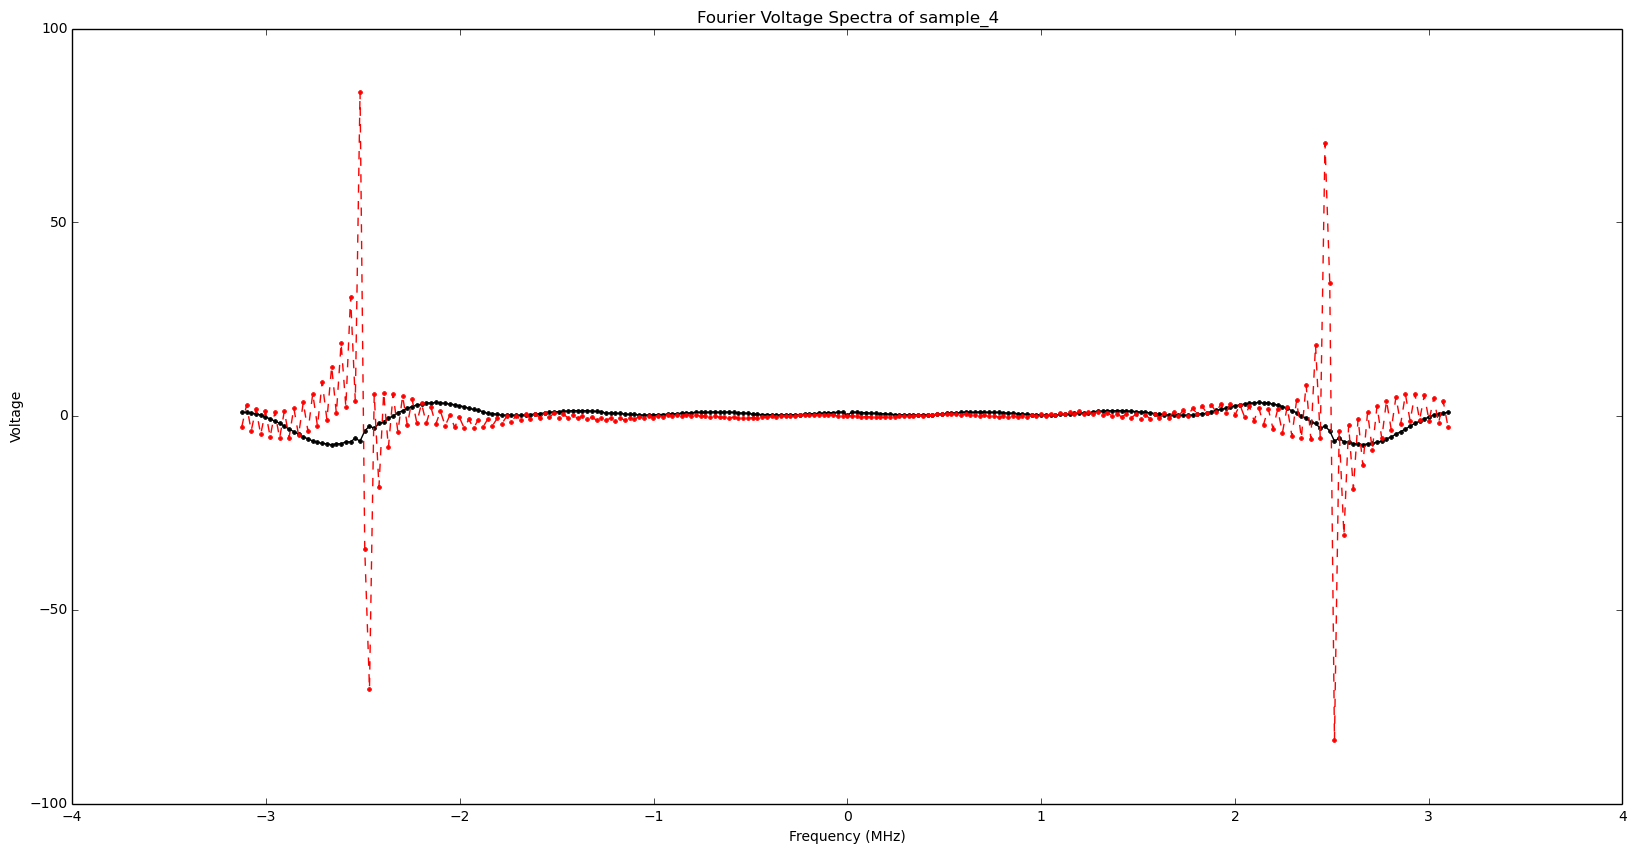

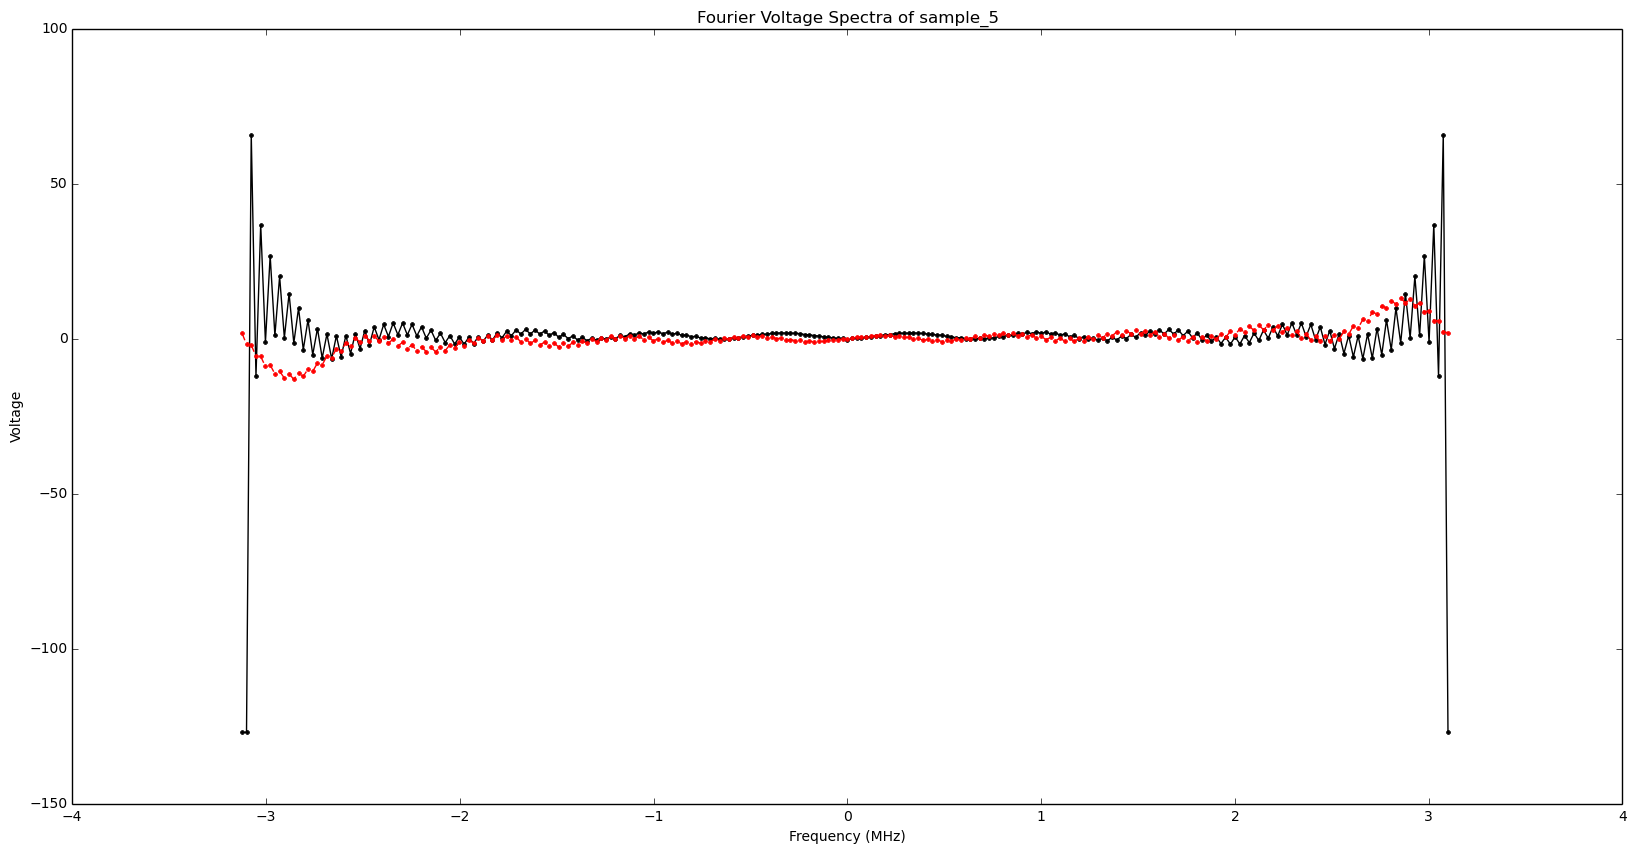

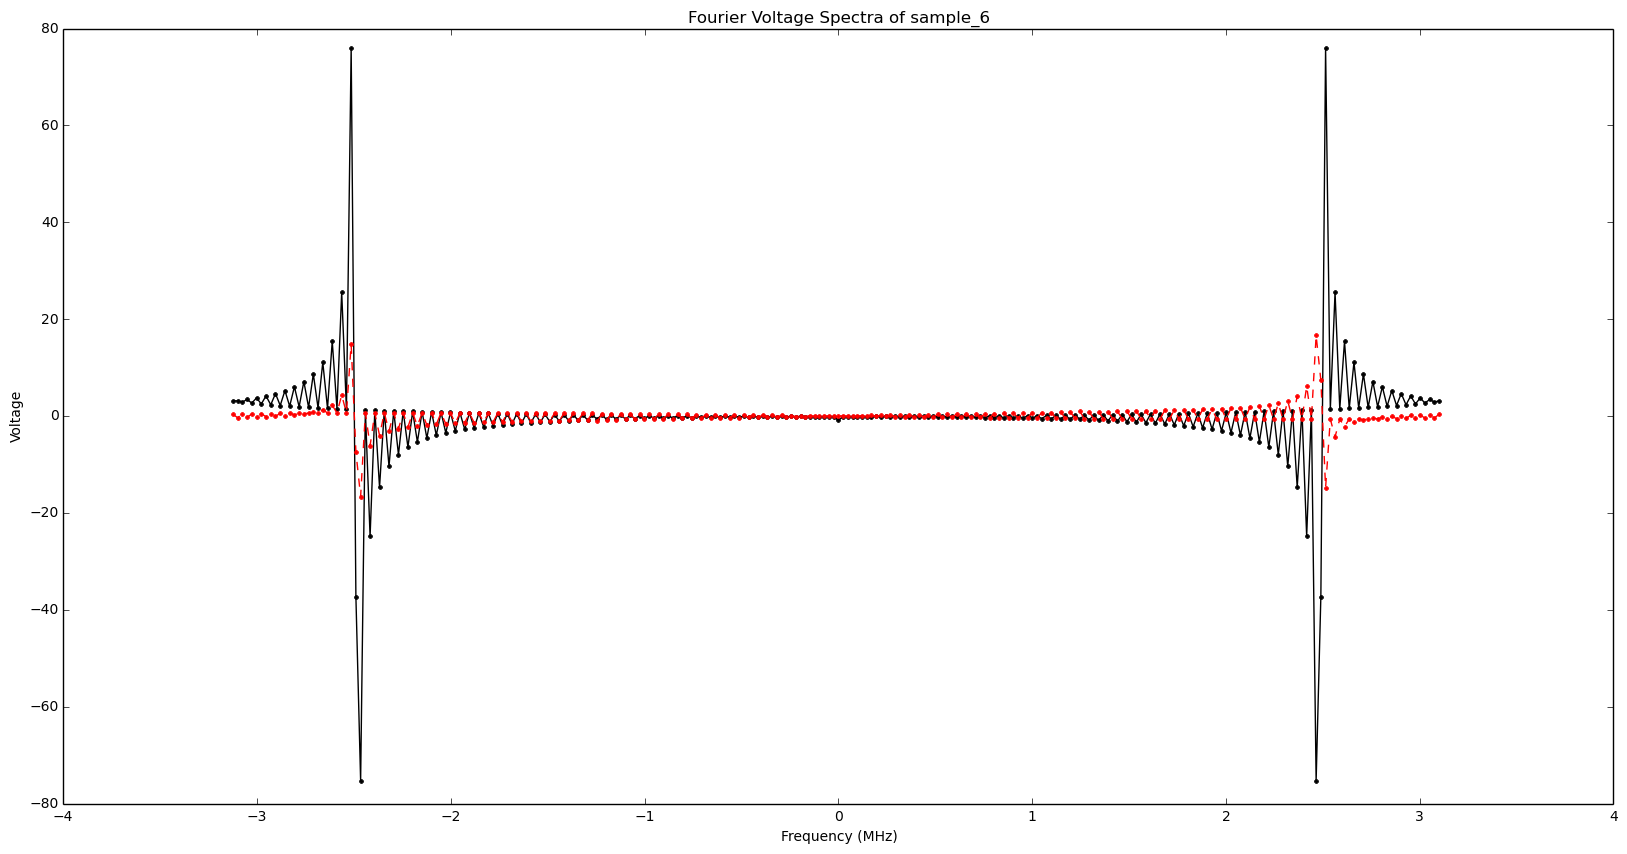

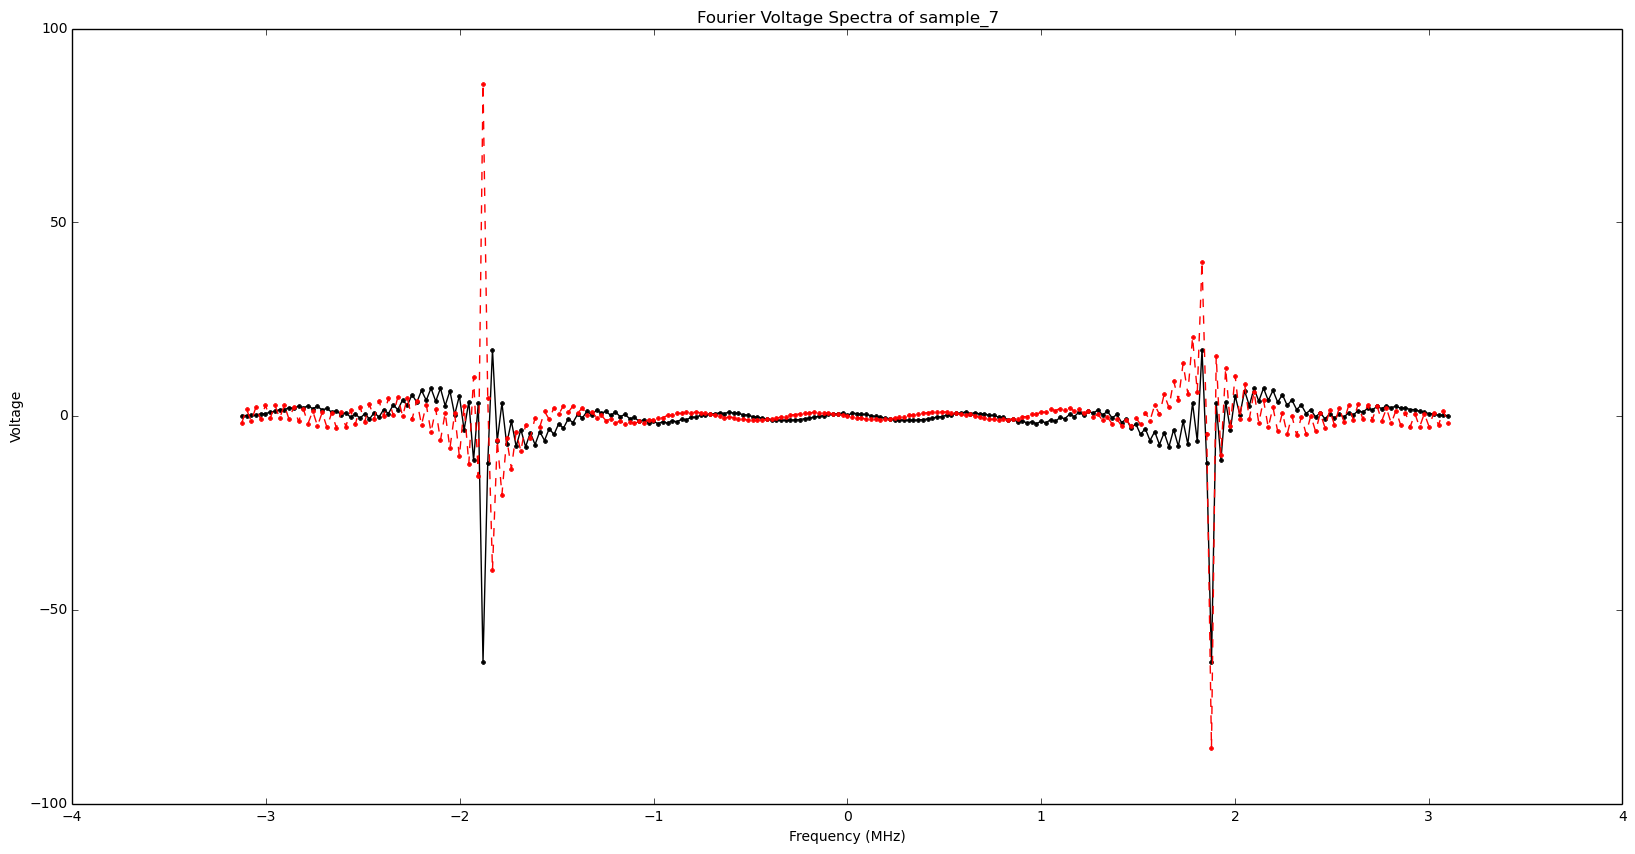

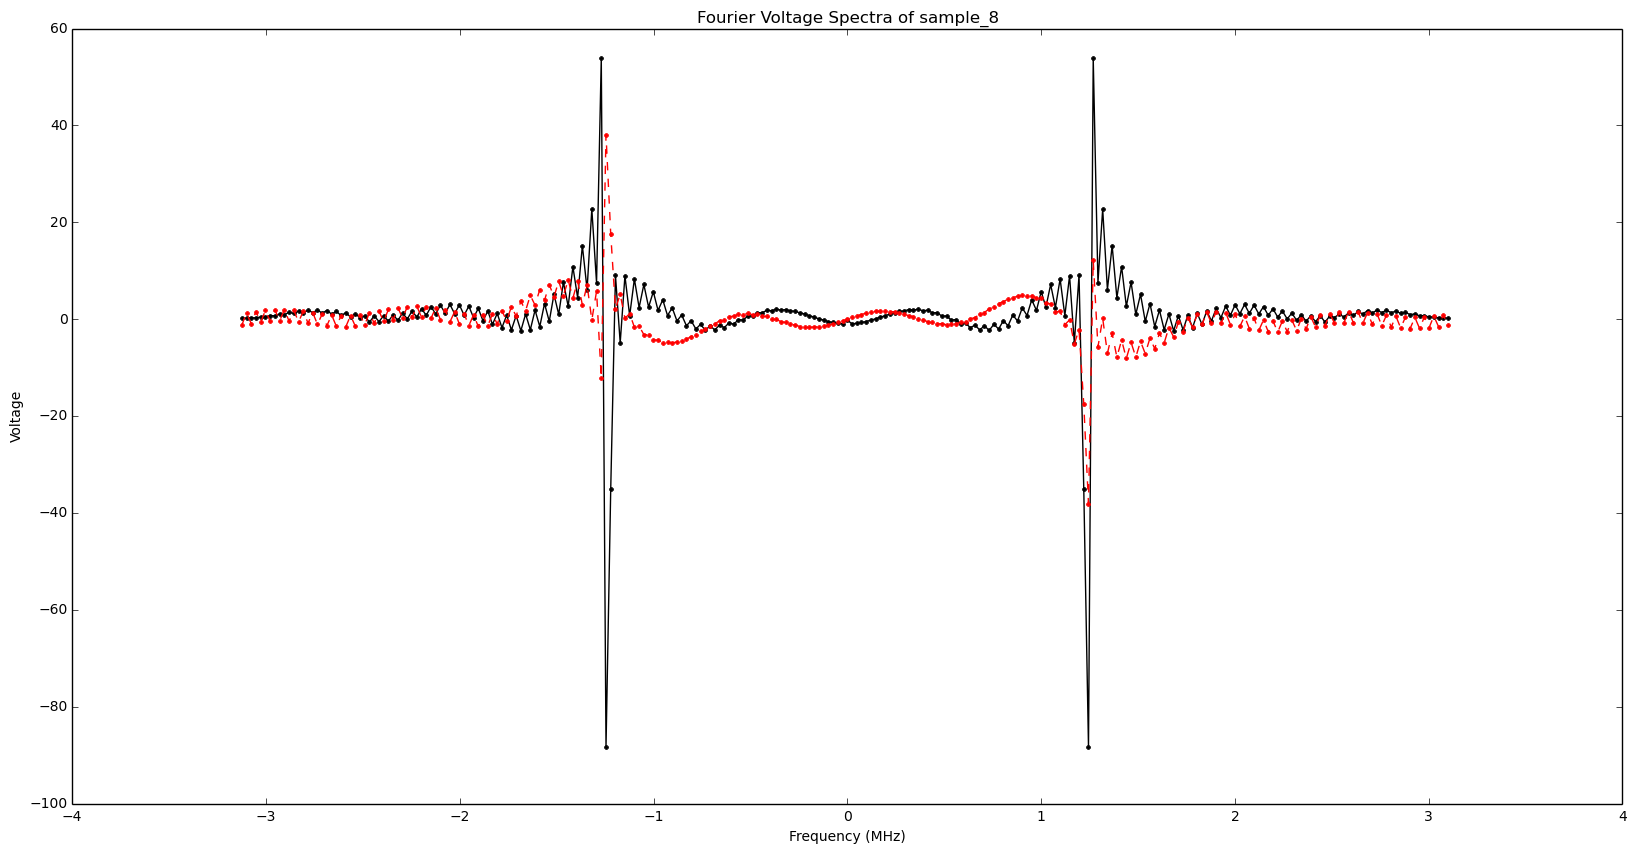

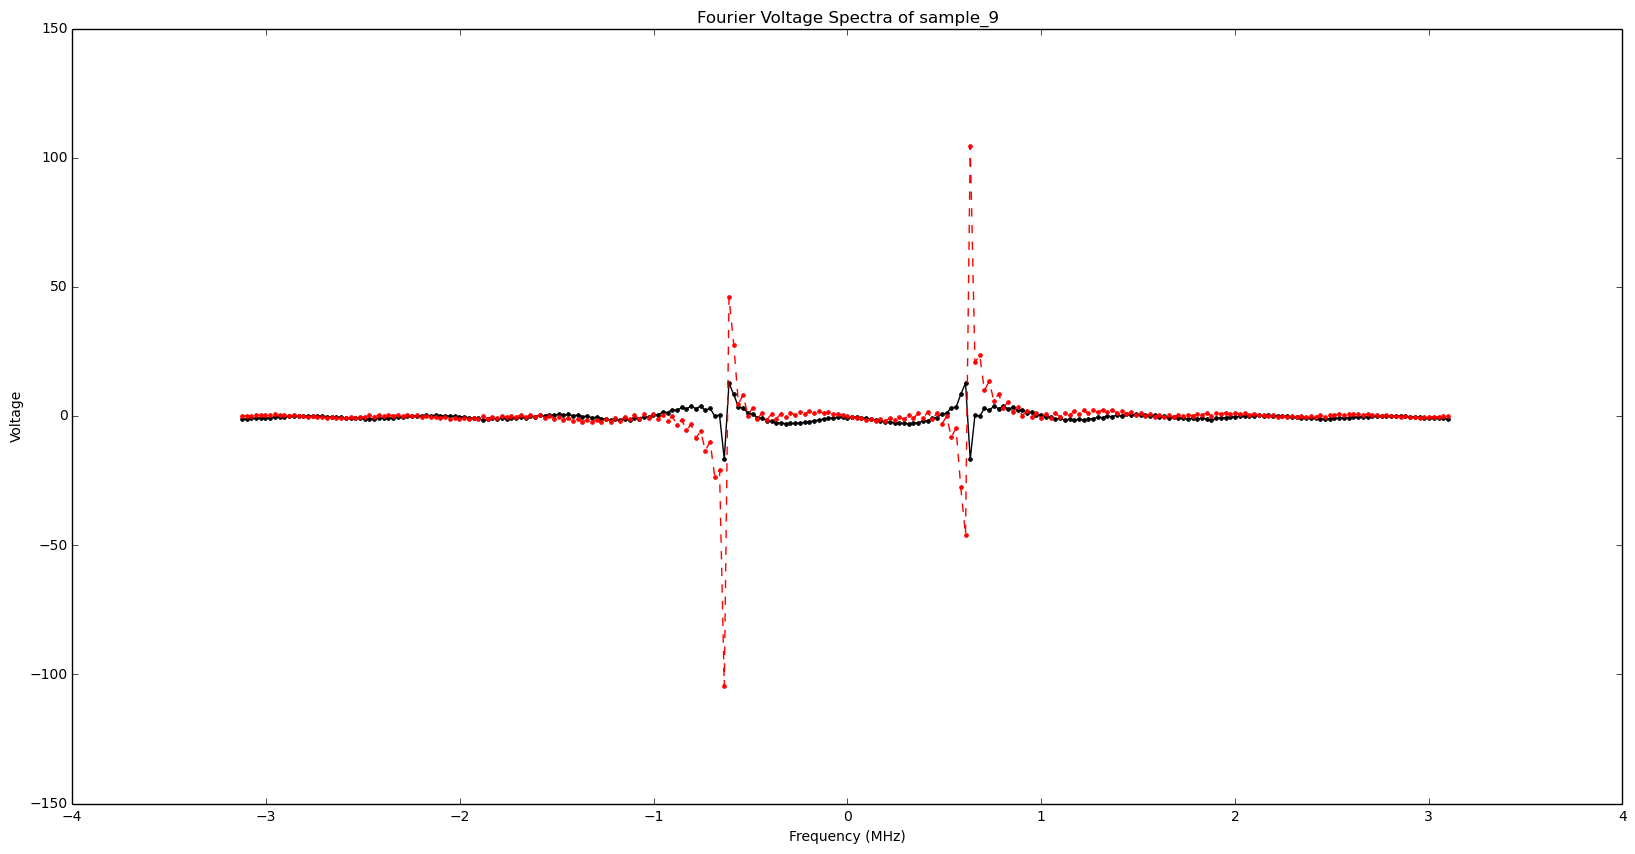

In [4]:
#3.3 Fourier Voltage Spectra (real and imaginary)
N = 256
freqs = np.linspace((-6.25/2),((6.25/2)*(1-2/N)), num=N, endpoint=False)
for i in range(1,10):
    filename = "sample_" + str(i) + ".npy"
    volt_arr = np.load(filename)
    volt_arr = np.divide(volt_arr, 16384.0)
    volt_plot = ugradio.dft.dft(volt_arr[:N])[1]
    real = np.real(volt_plot)
    imag = np.imag(volt_plot)
    pl.figure(i, figsize=(20,10))
    pl.title("Fourier Voltage Spectra of sample_" + str(i))
    pl.xlabel('Frequency (MHz)')
    pl.ylabel('Voltage')
    pl.plot(freqs, real, 'k.-')
    pl.plot(freqs, imag, 'r.--')

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


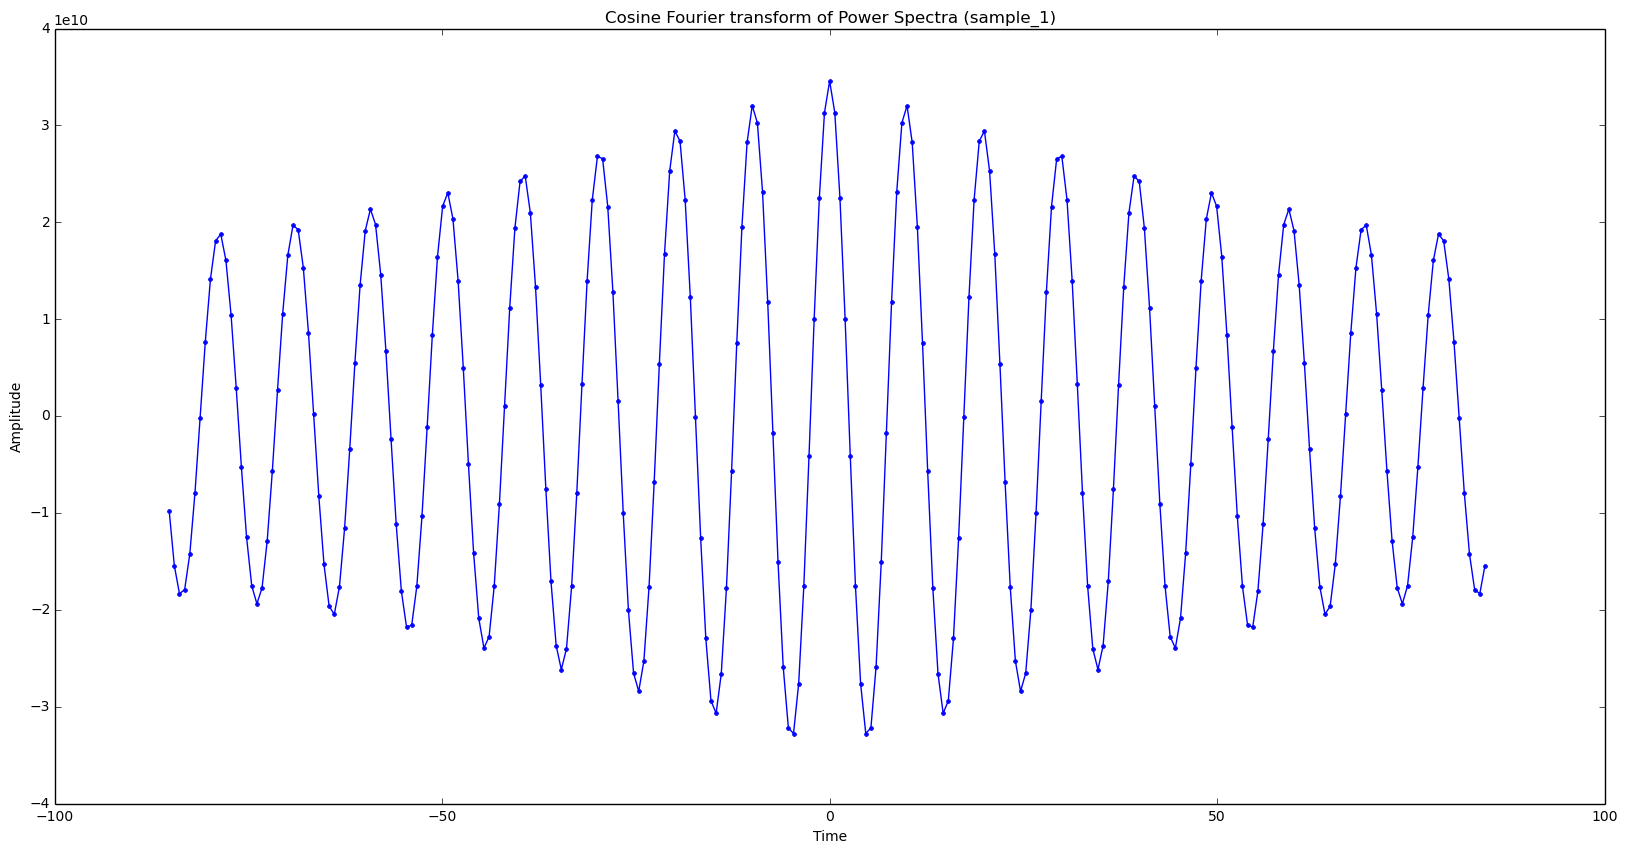

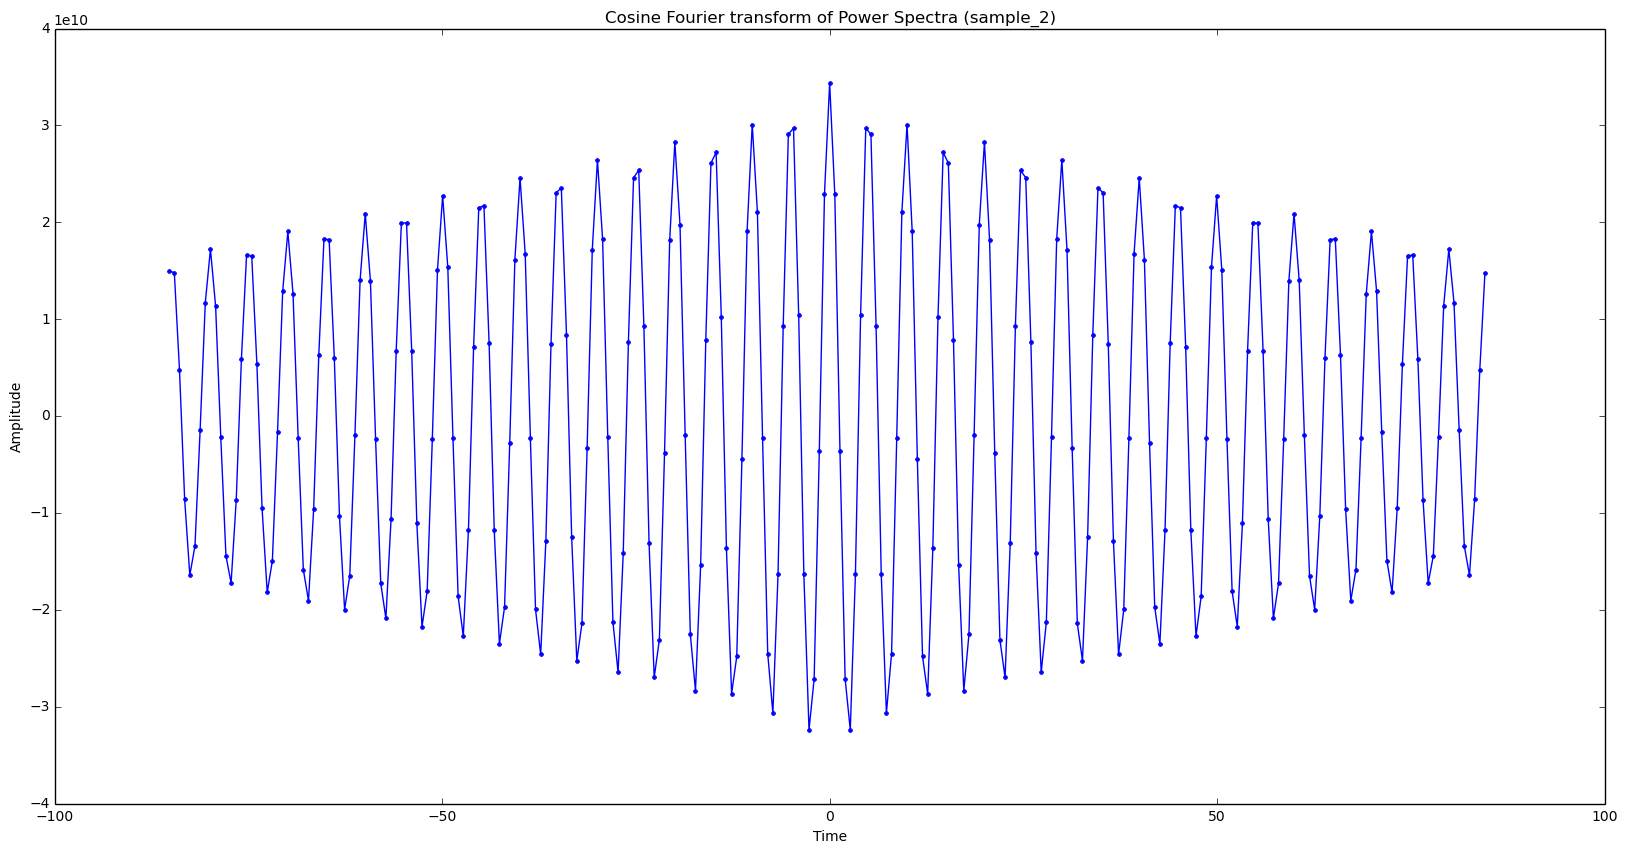

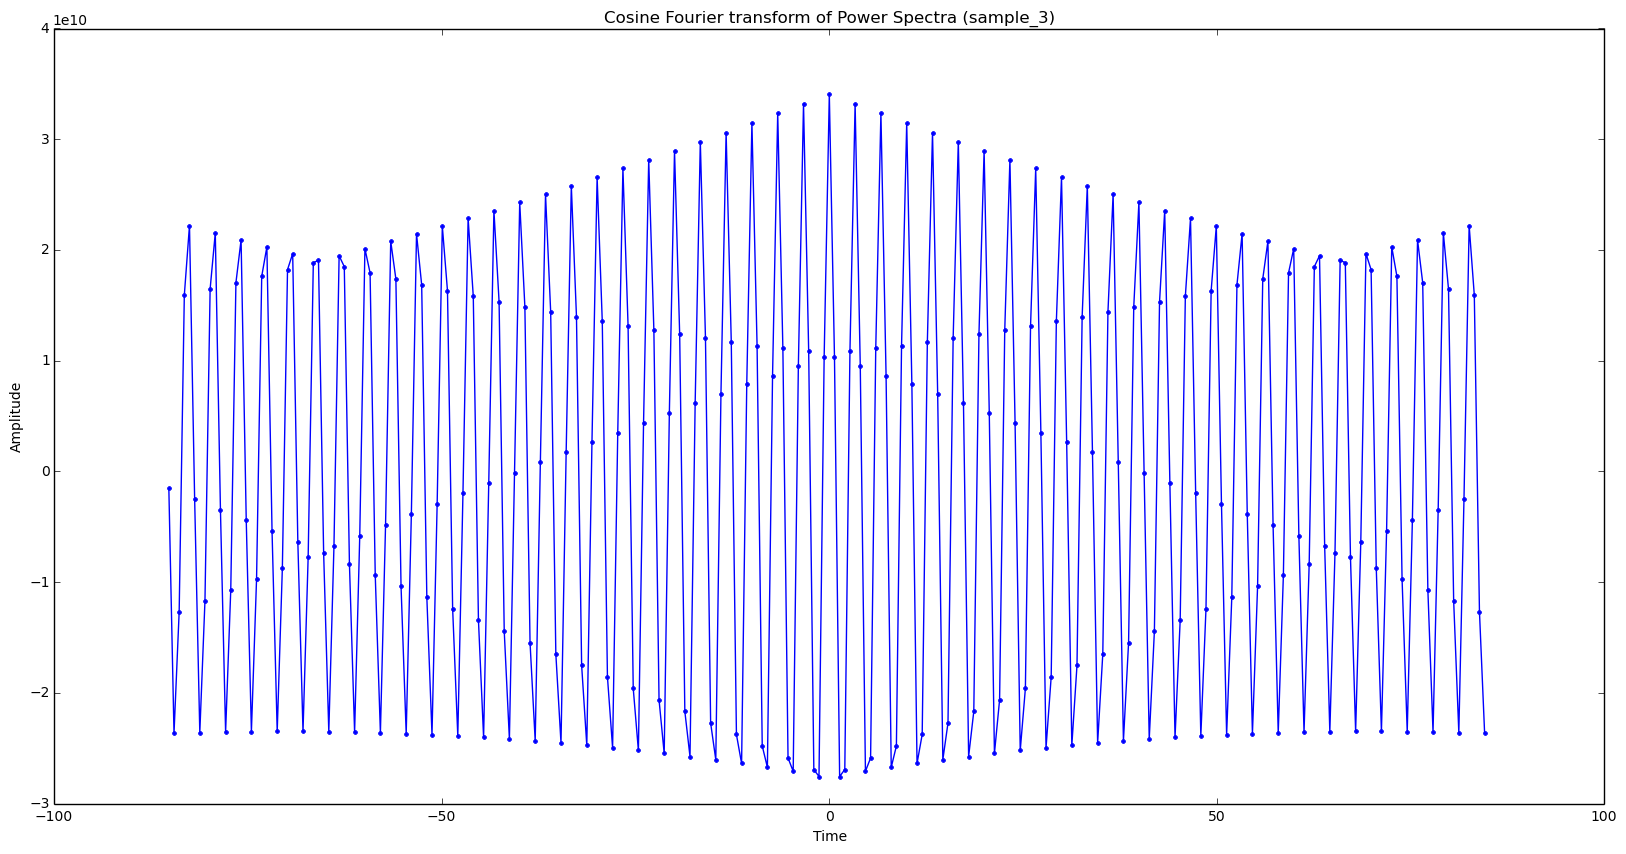

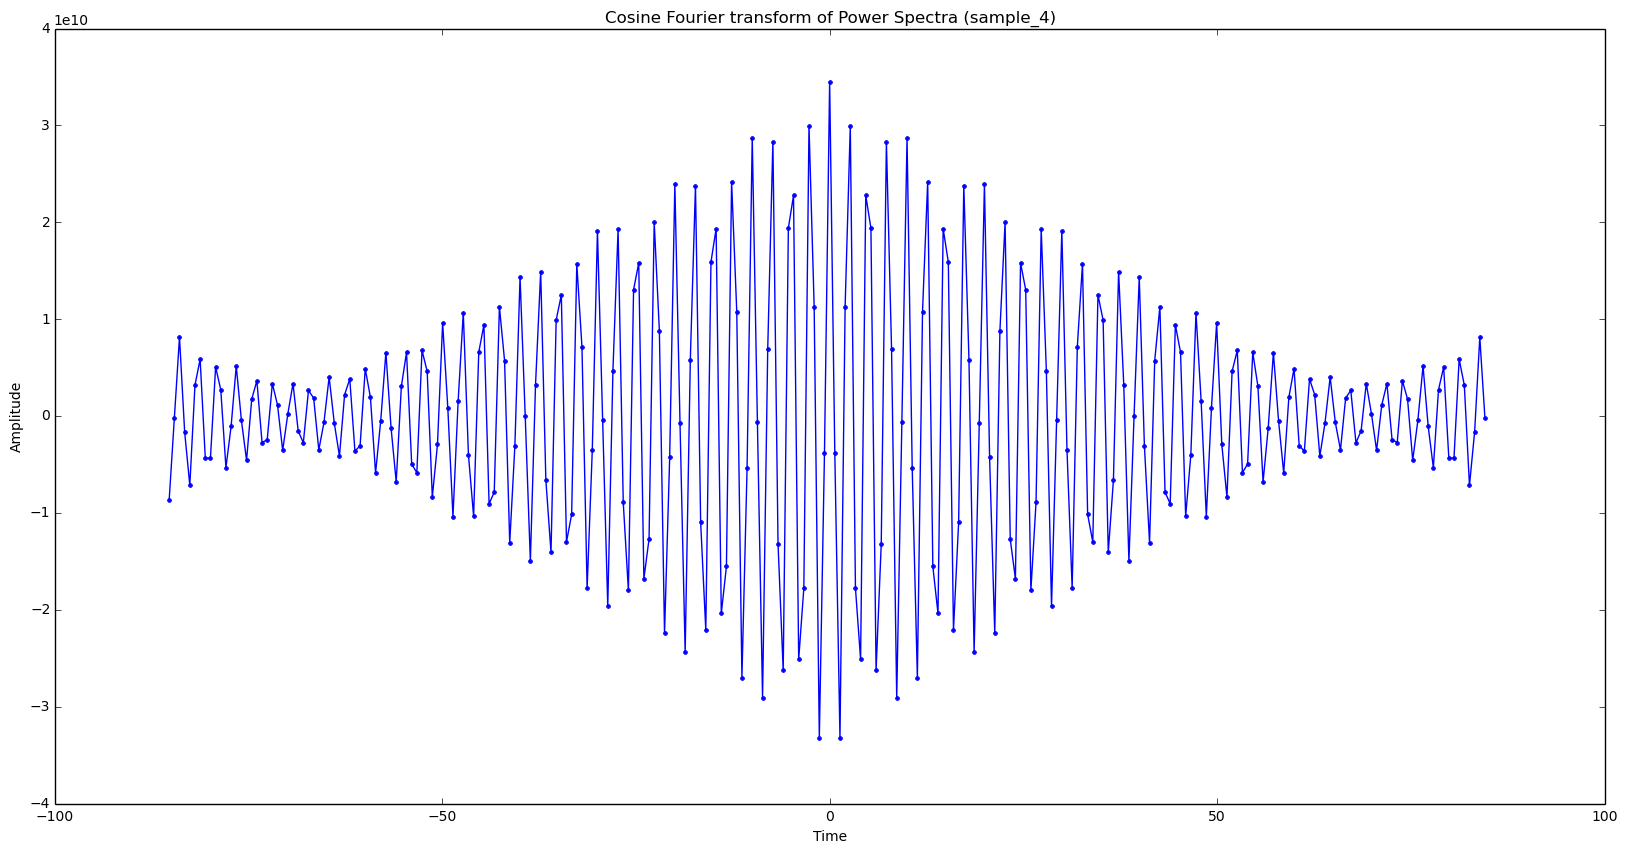

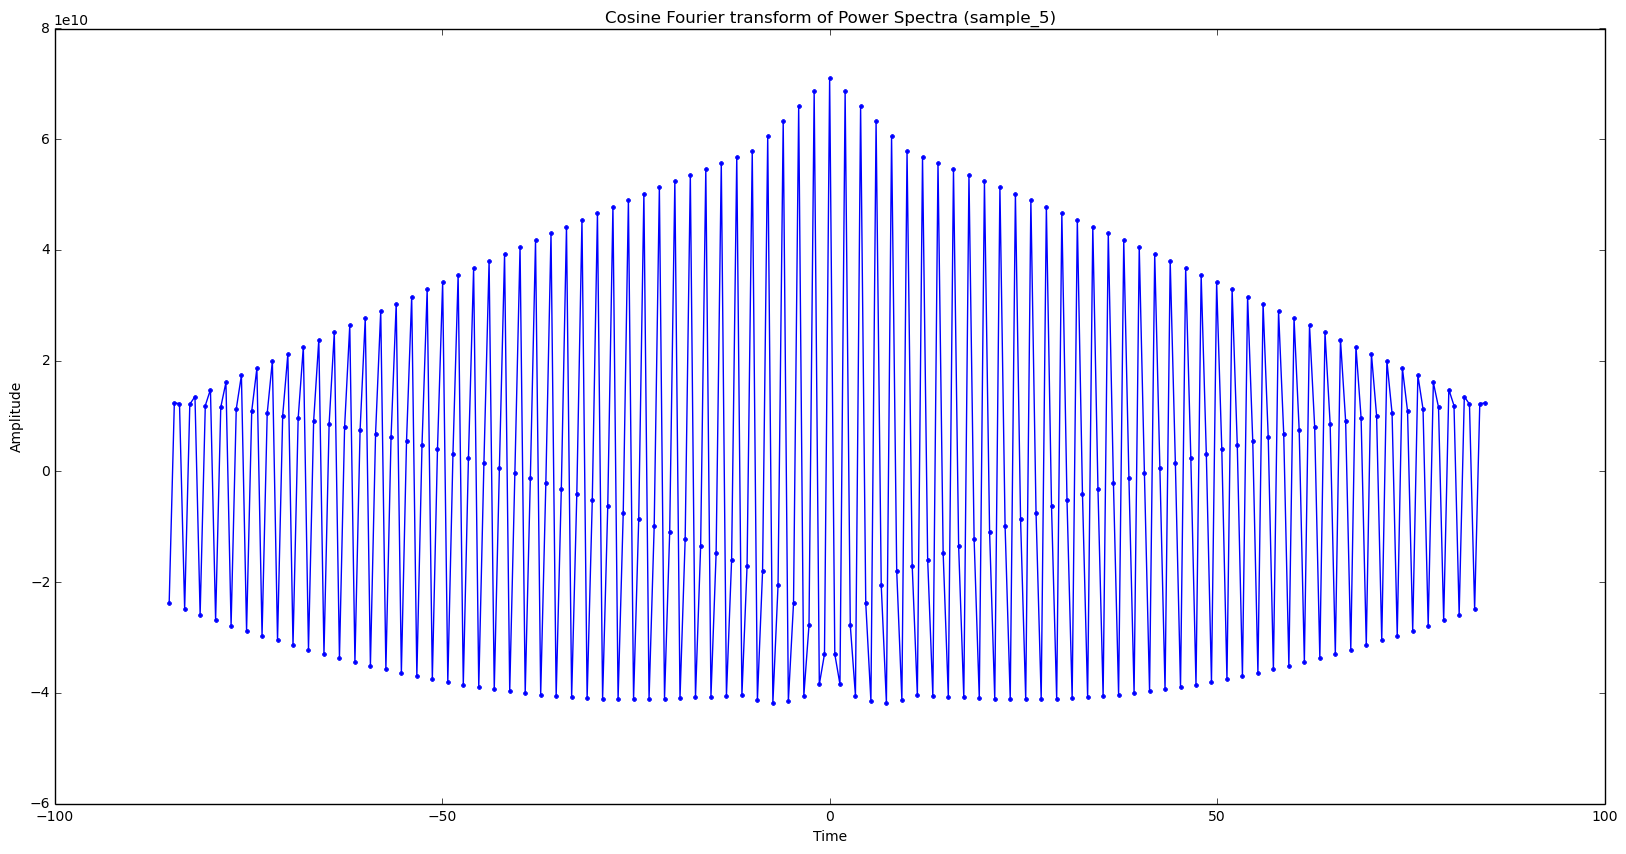

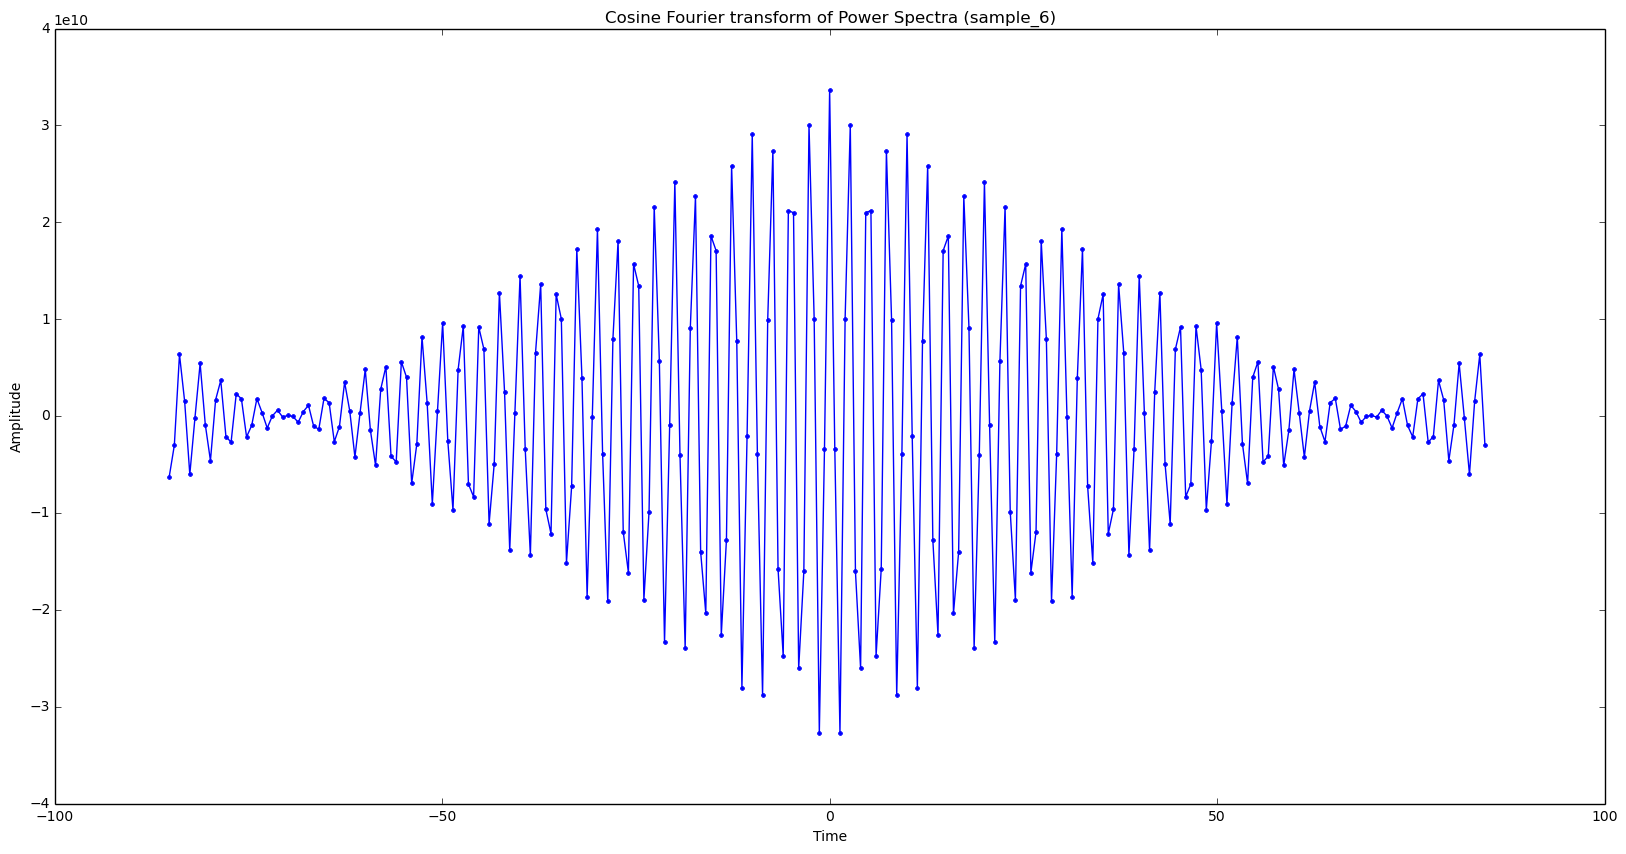

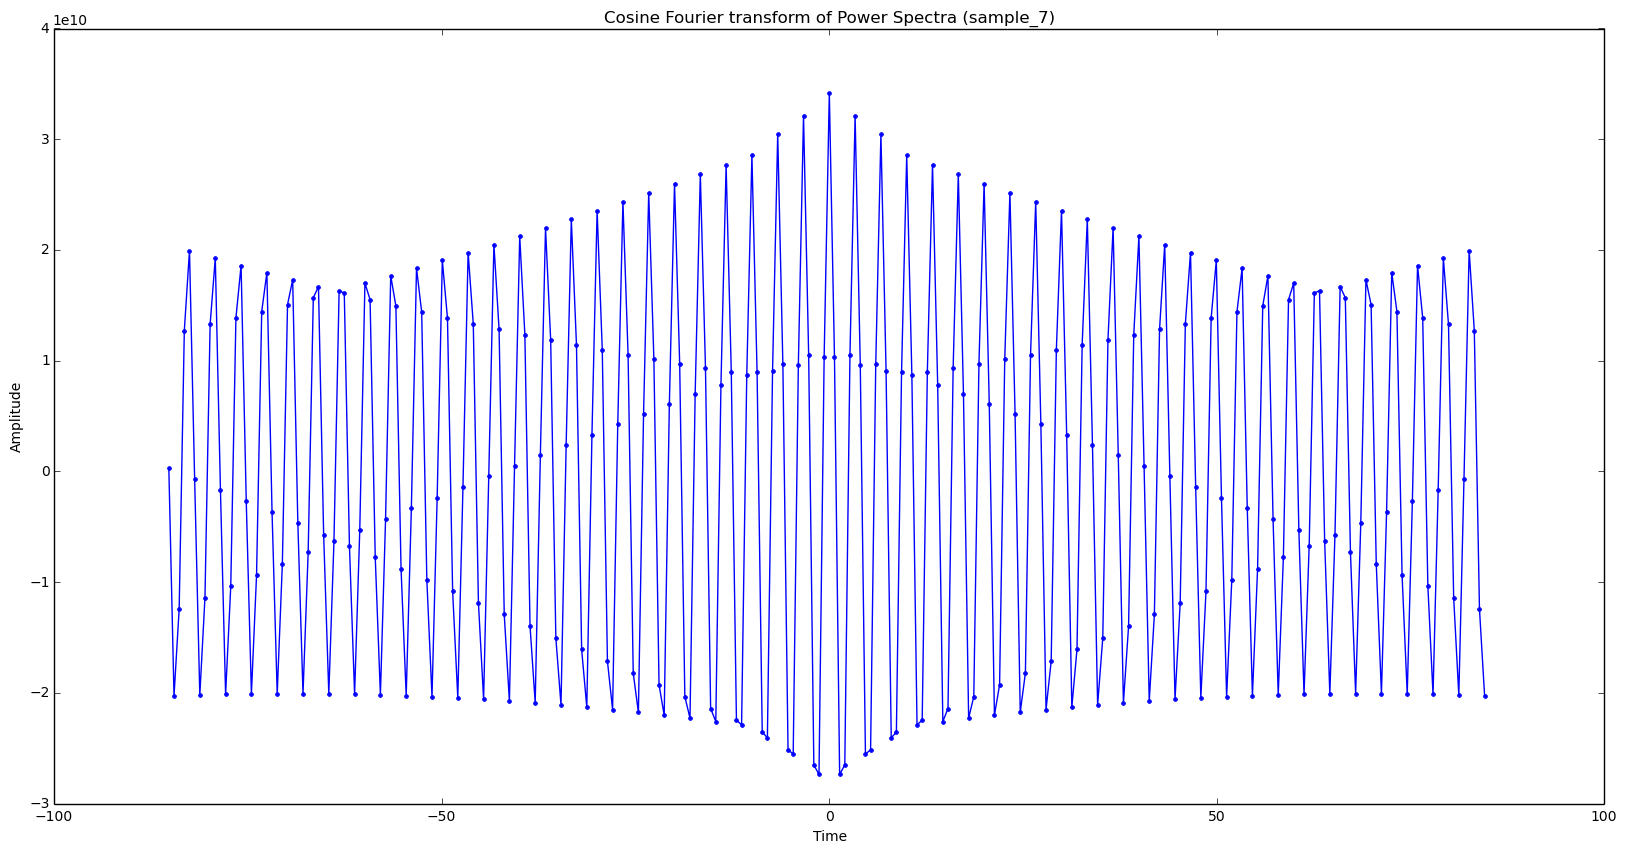

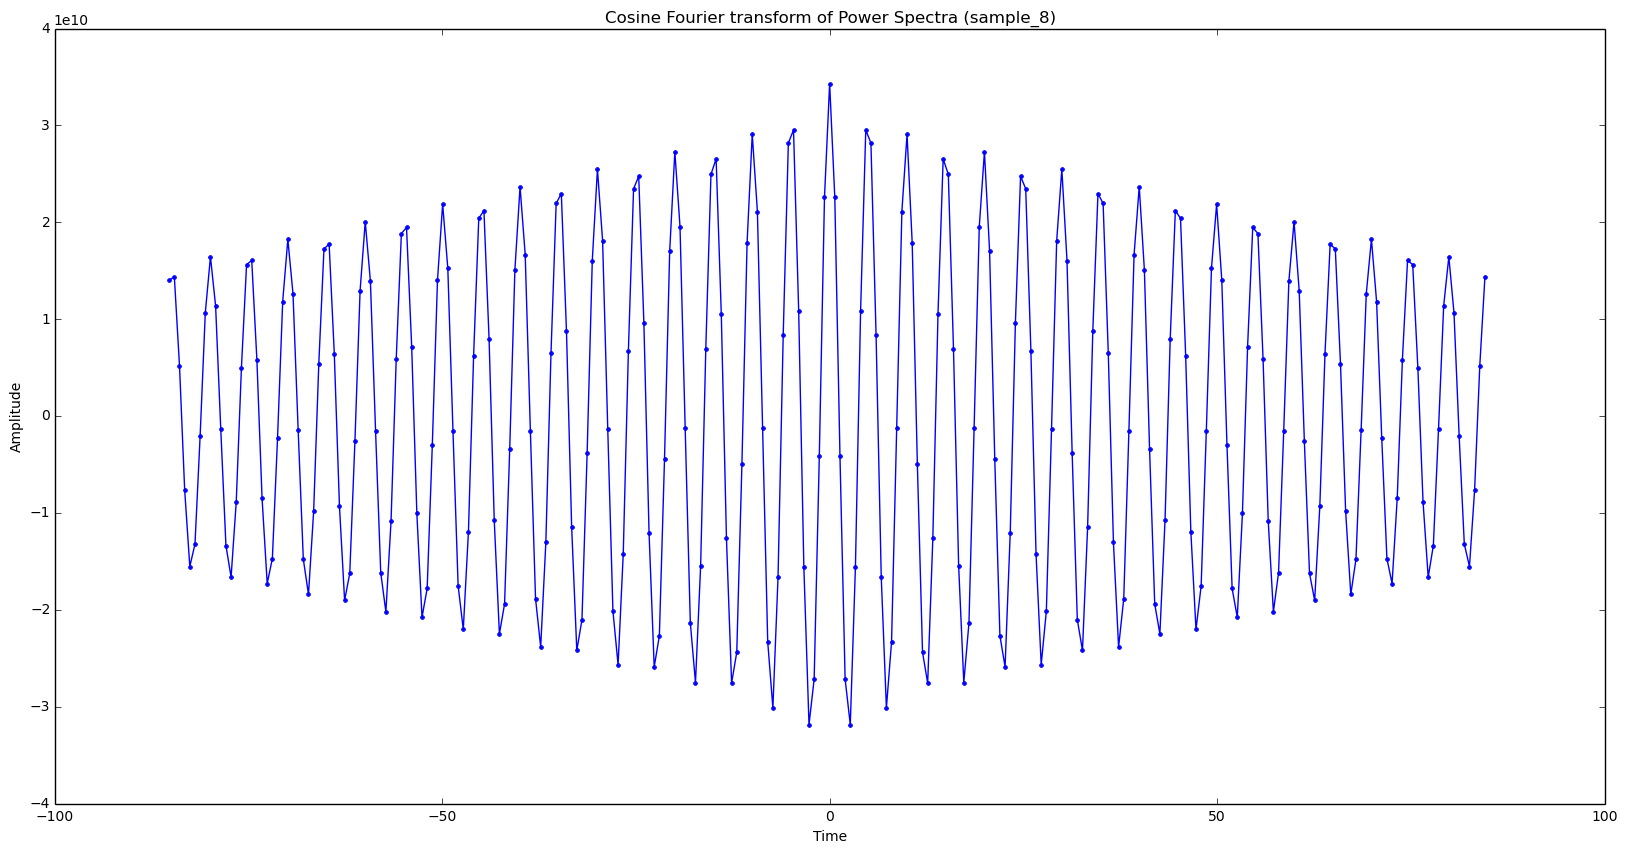

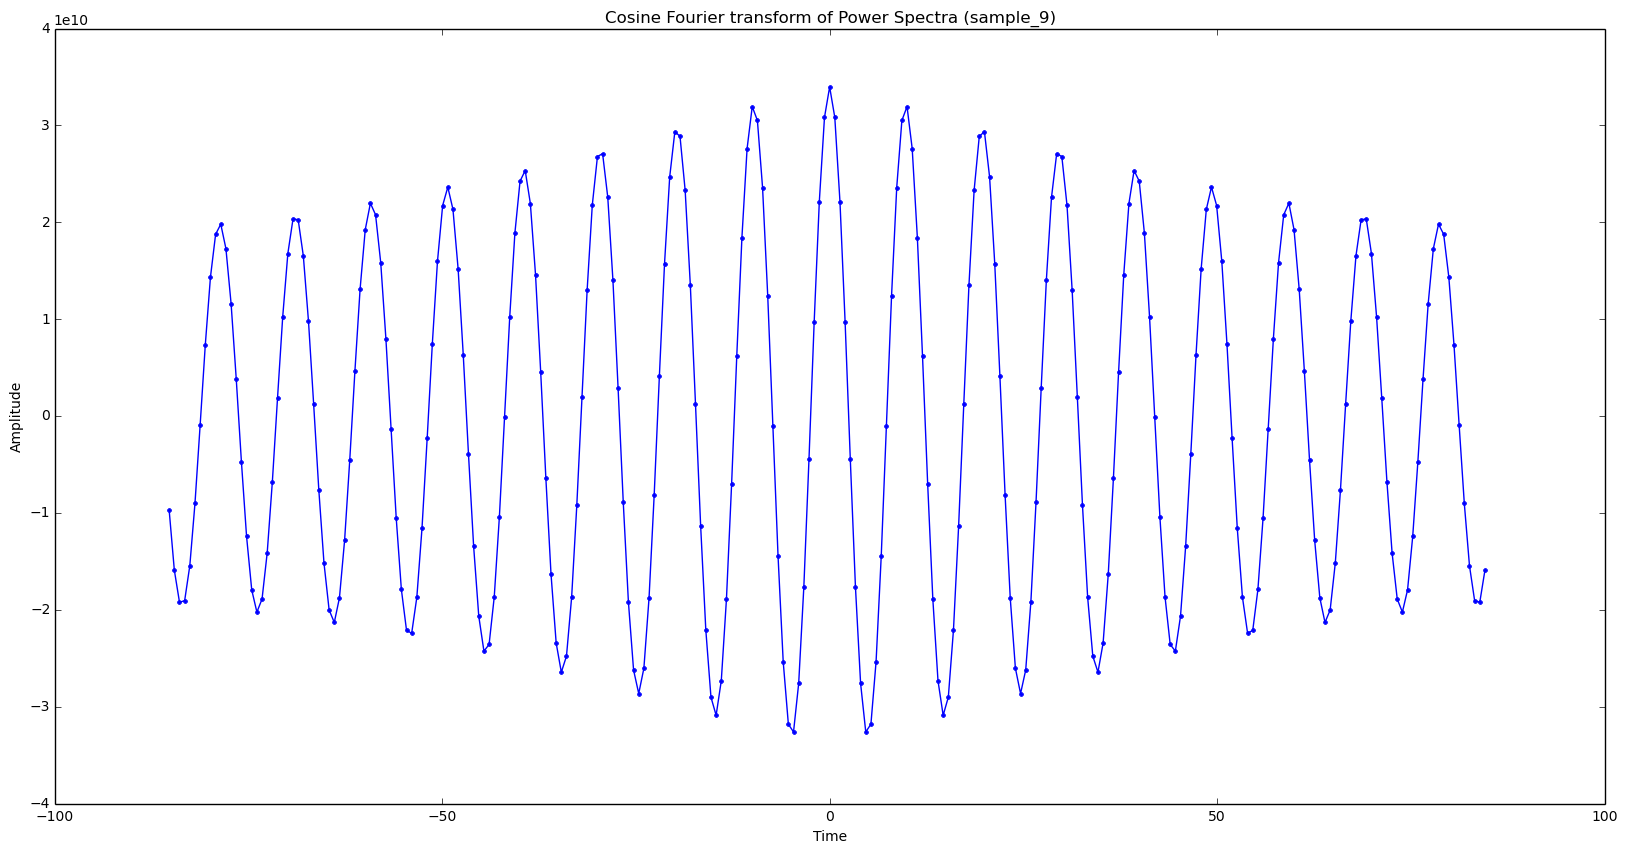

In [6]:
#3.3 Cosine Fourier Transform of Power Spectra
N=256
for i in range(1,10):
    filename = "sample_" + str(i) + ".npy"
    test_arr = np.load(filename)
    freq_new, fourier_plot = ugradio.dft.dft(test_arr[:N])
    fourier_plot = np.abs(fourier_plot)**2
    pl.figure(i, figsize=(20,10))
    time_new, cosine_plot = ugradio.dft.idft(fourier_plot[:N], f=freq_new)
    pl.title("Cosine Fourier transform of Power Spectra (sample_" + str(i) + ")")
    pl.xlabel('Time')
    pl.ylabel('Amplitude')
    pl.plot(time_new, cosine_plot, 'b.-')

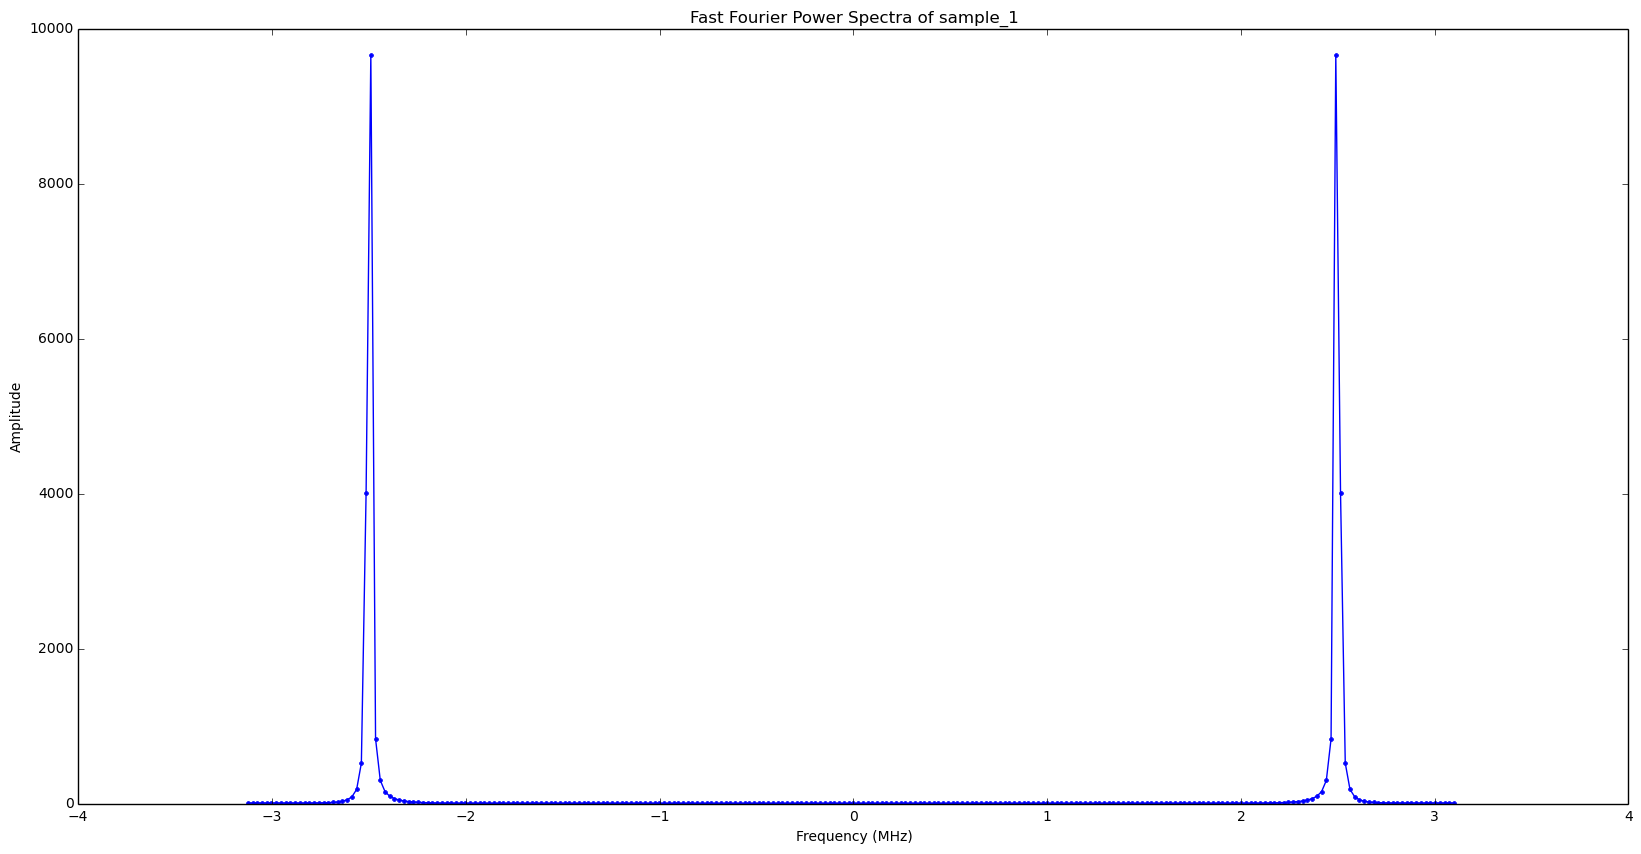

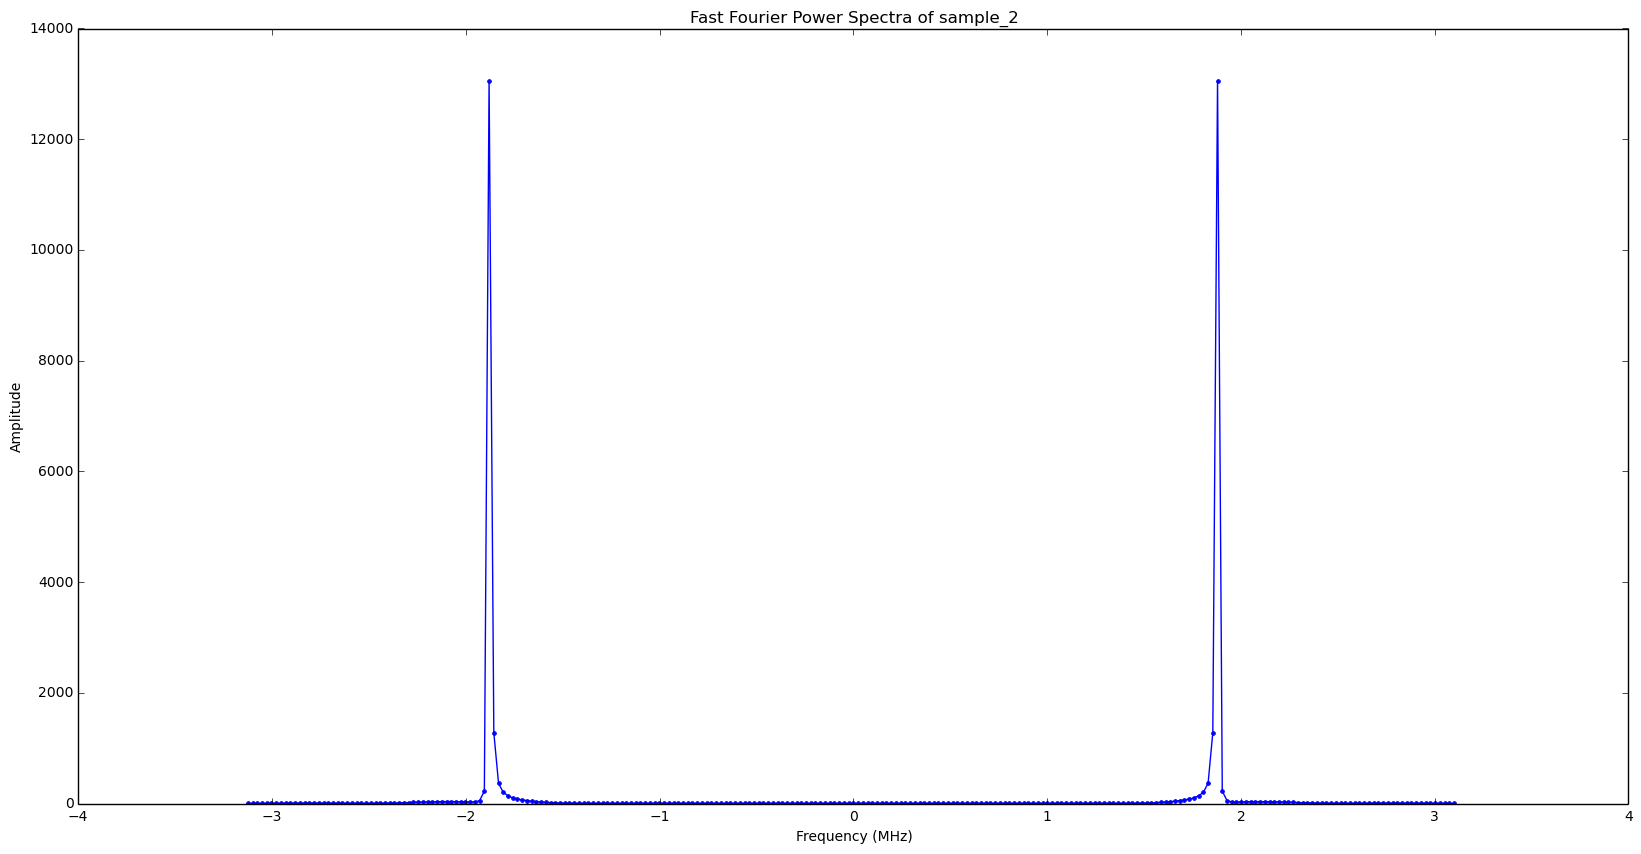

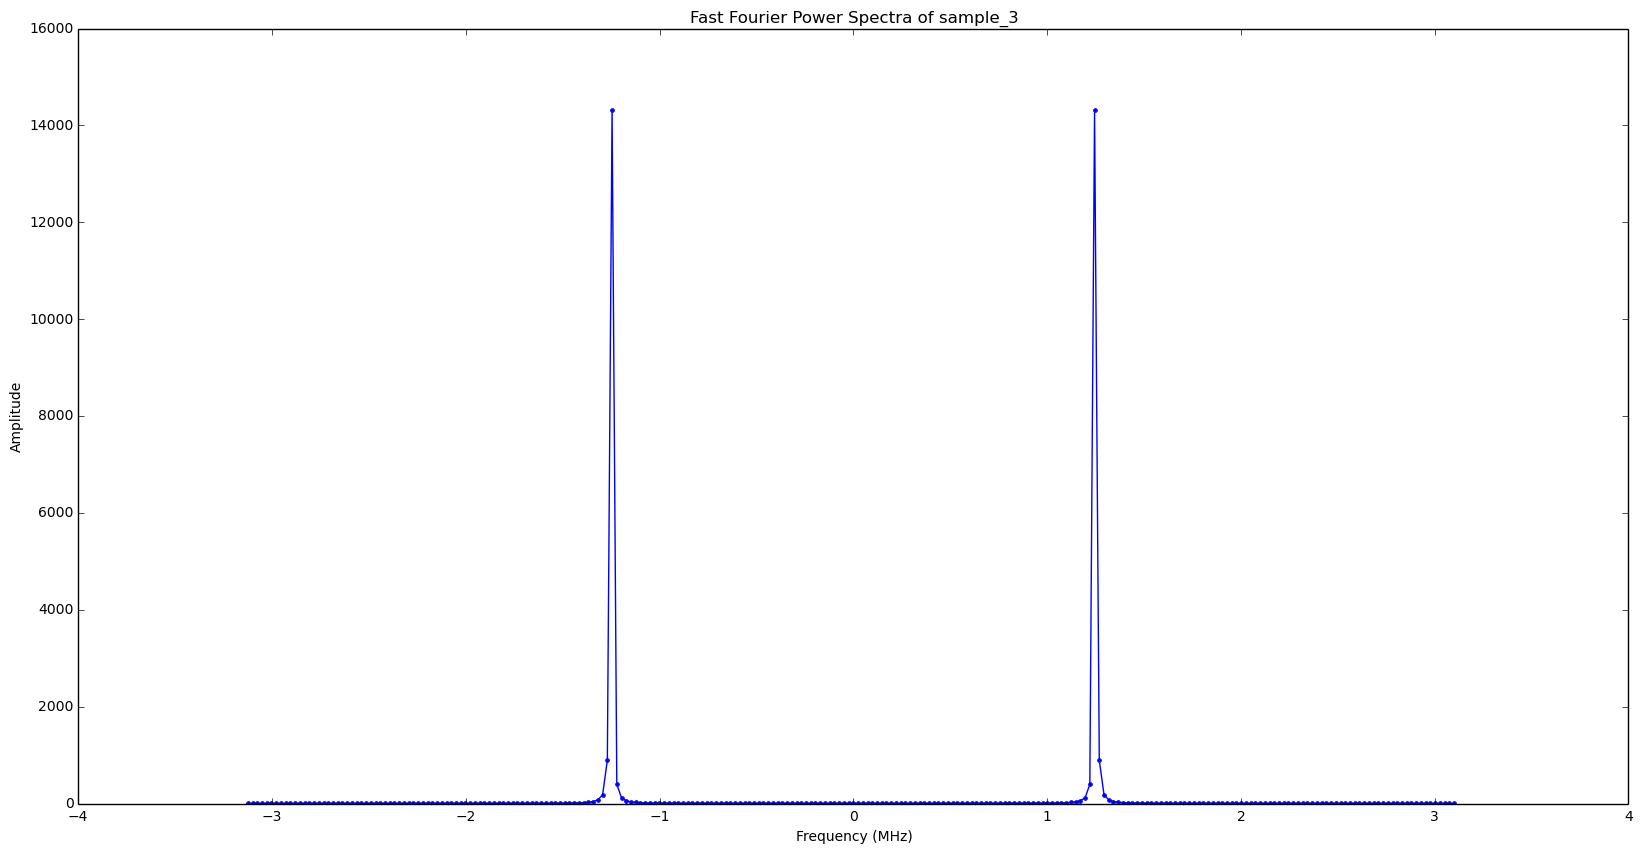

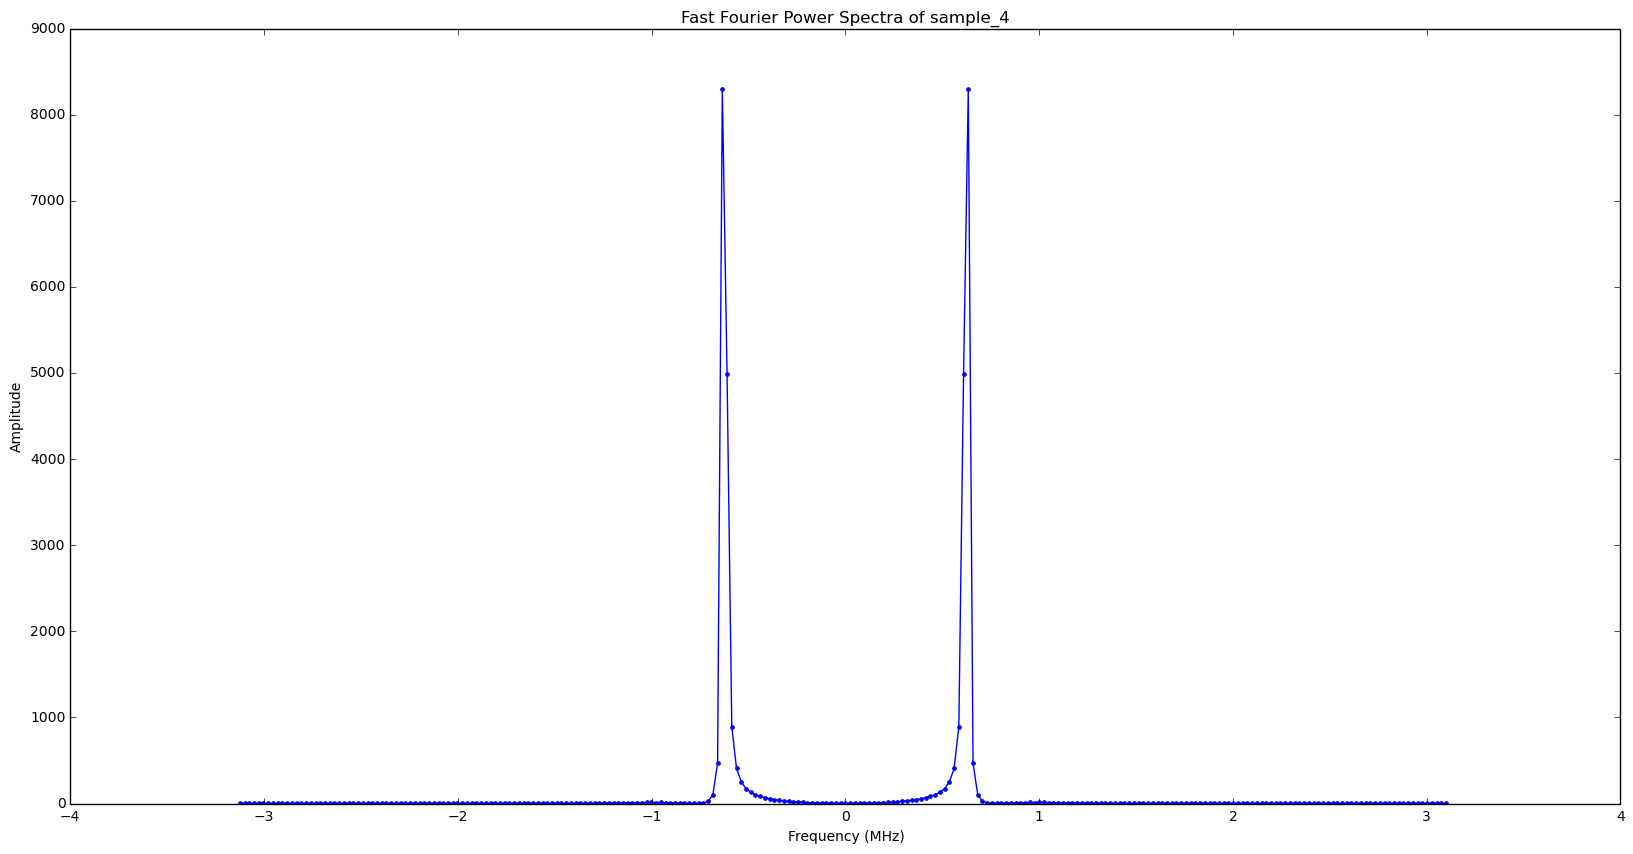

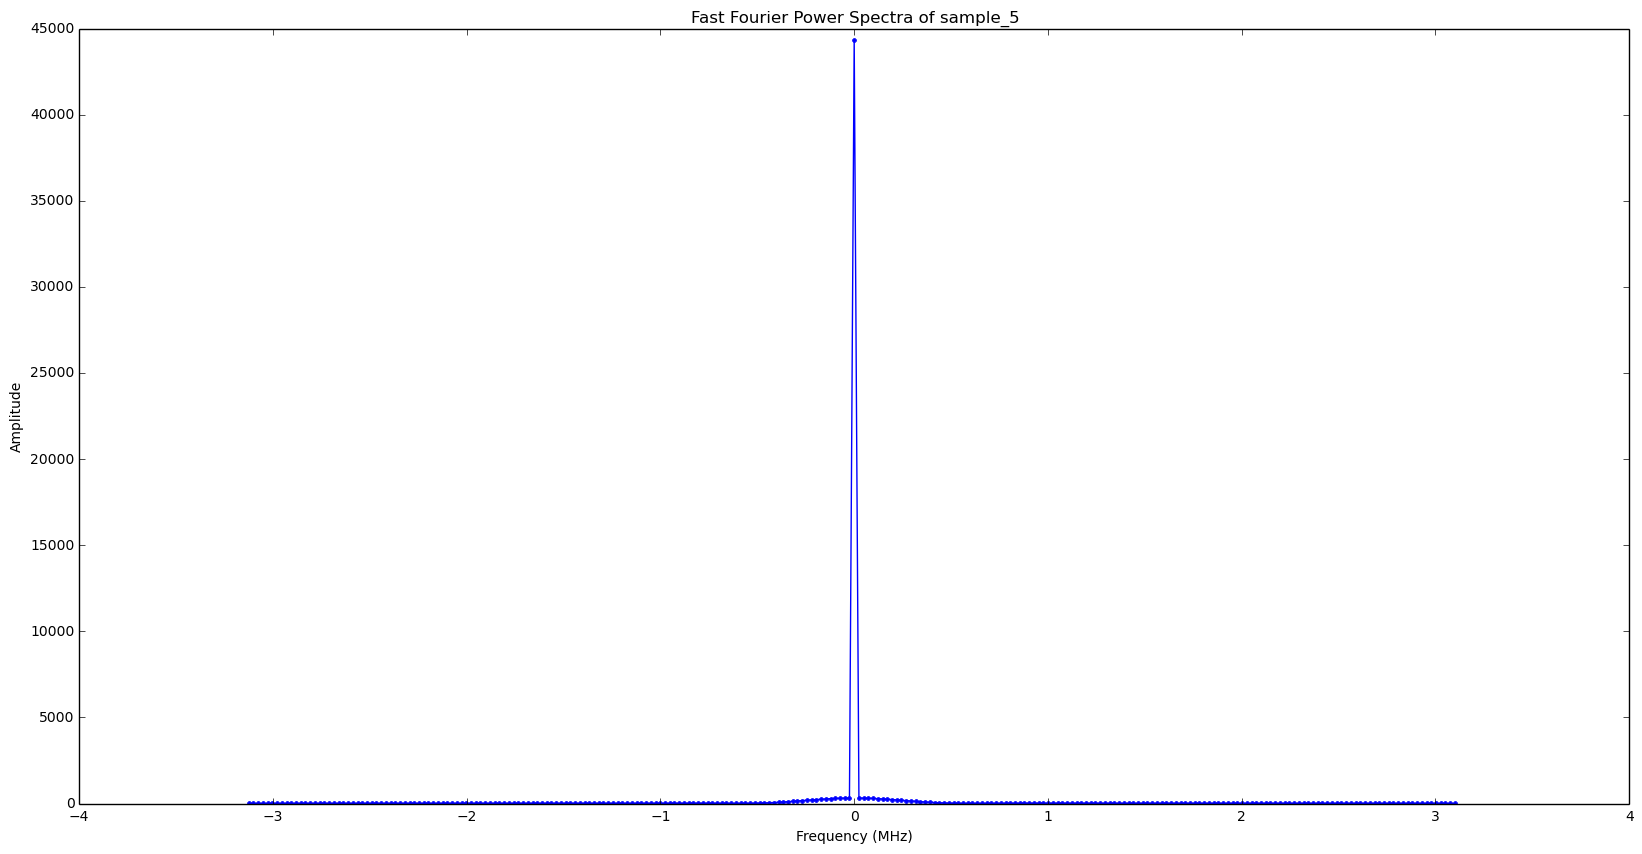

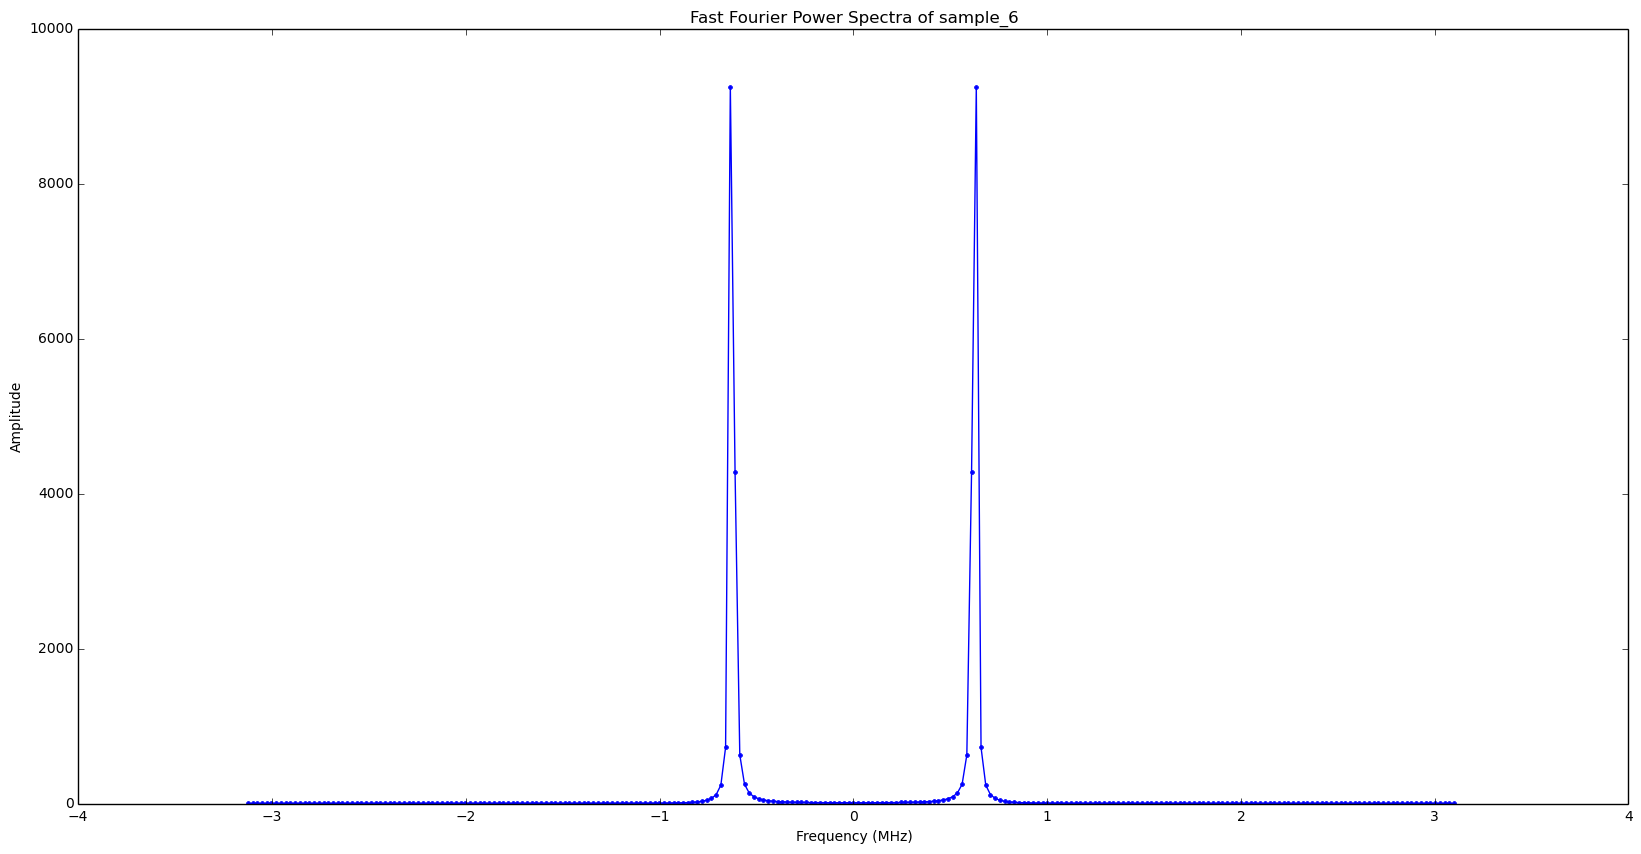

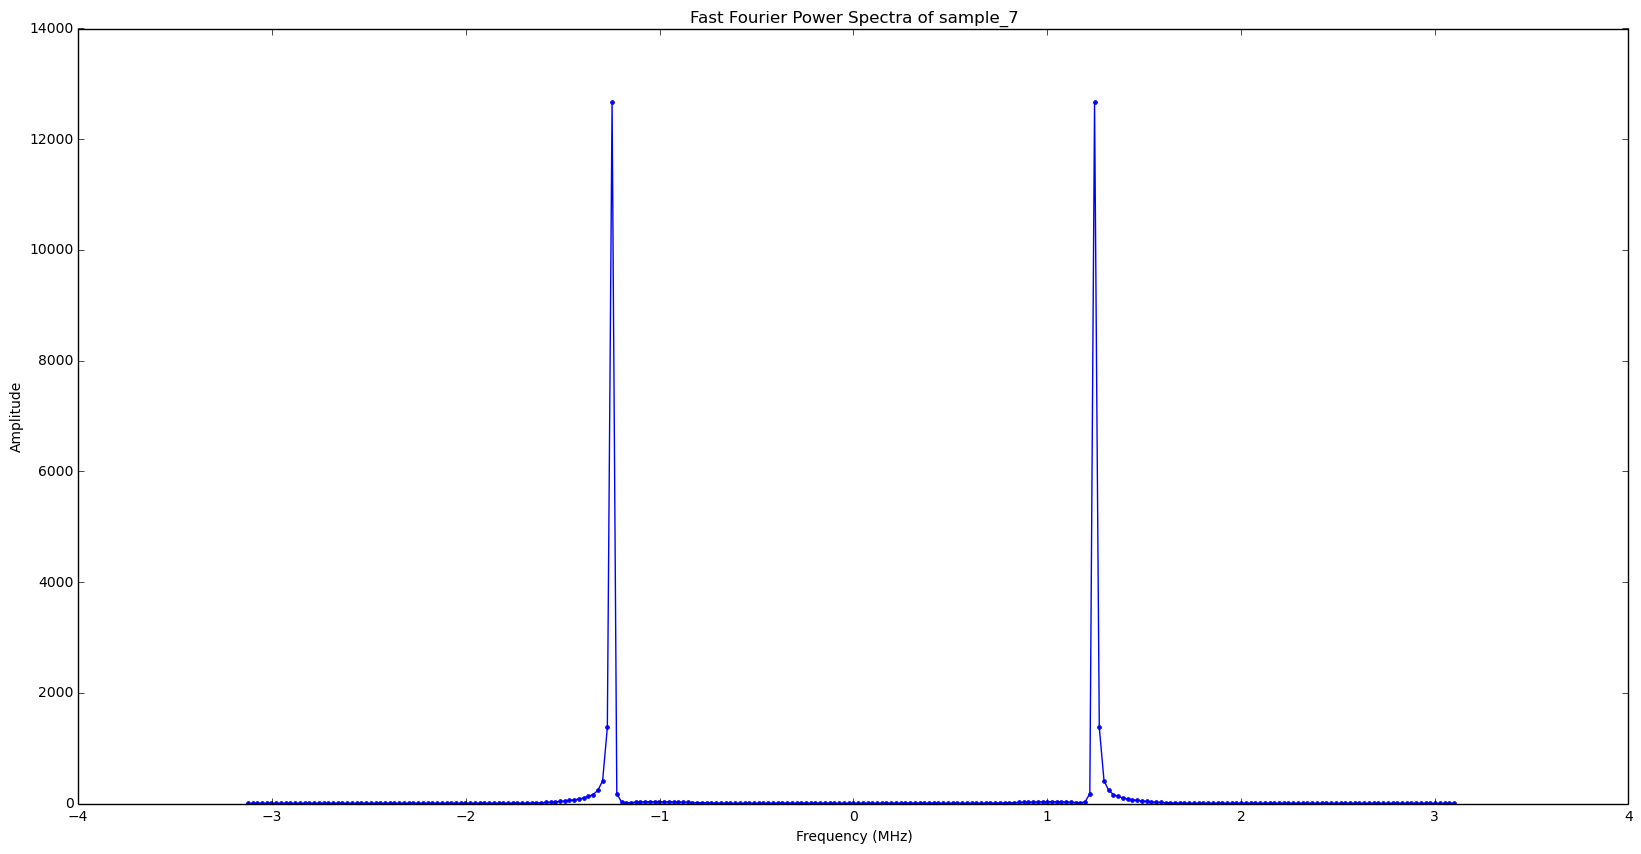

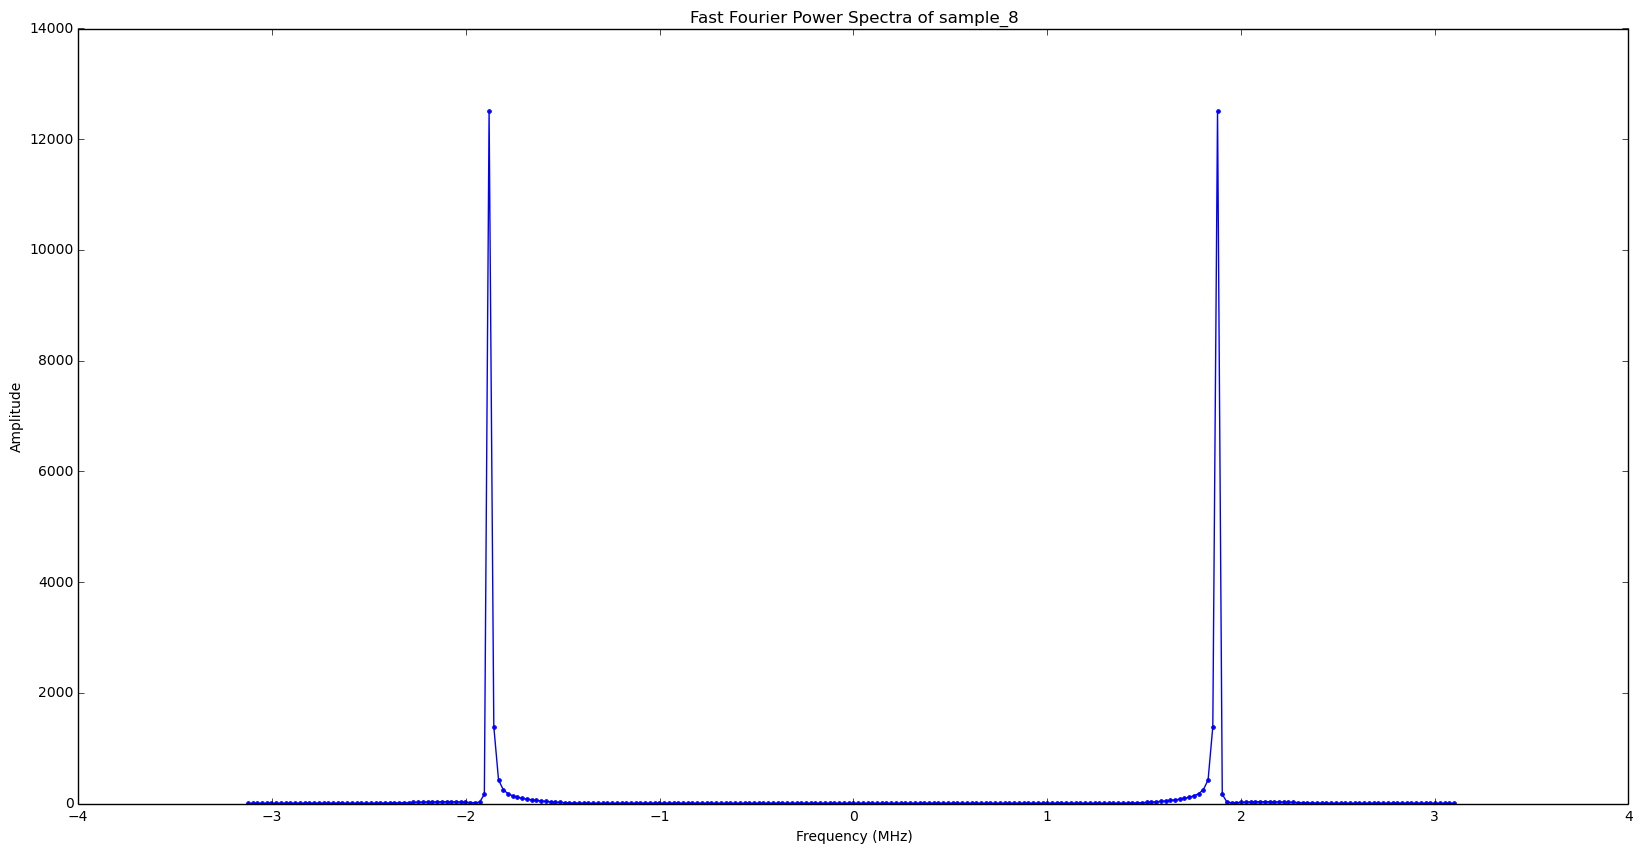

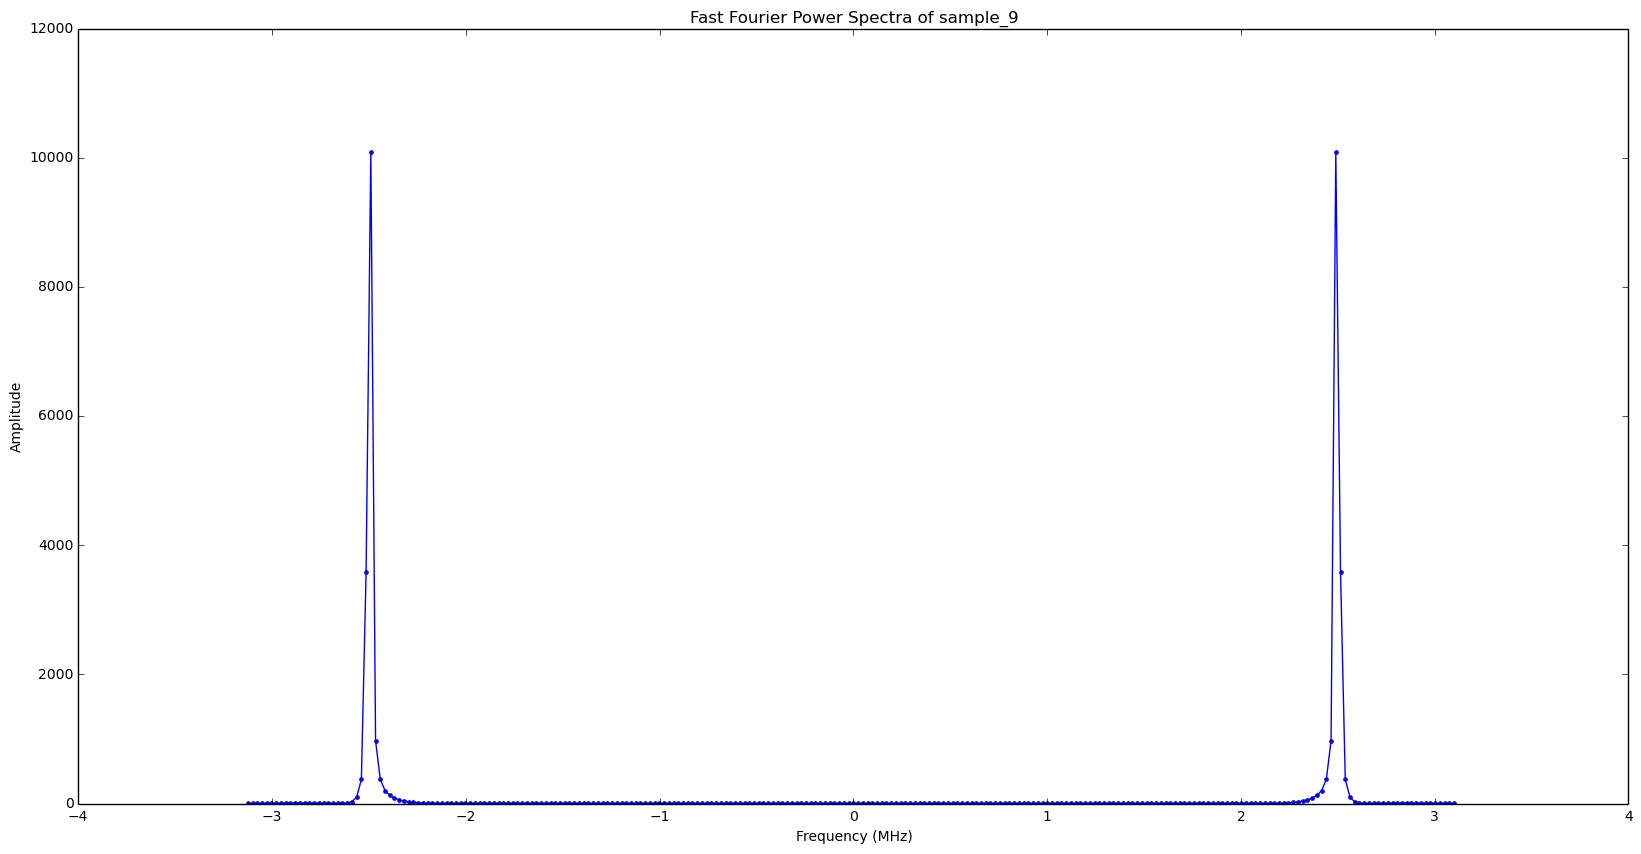

In [6]:
#4.5 FFT version of Power Spectra
N=256
freqs = np.linspace((-6.25/2),((6.25/2)*(1-2/N)), num=N, endpoint=False)
for i in range(1,10):
    filename = "sample_" + str(i) + ".npy"
    test_arr = np.load(filename)
    test_arr = np.divide(test_arr, 16384.0)
    pl.figure(i, figsize=(20,10))
    fourier_plot = np.fft.fft(test_arr[:N], n=None, axis=-1, norm=None)
    fourier_plot = np.abs(fourier_plot)**2
    pl.title("Fast Fourier Power Spectra of sample_" + str(i))
    pl.xlabel('Frequency (MHz)')
    pl.ylabel('Amplitude')
    pl.plot(freqs, fourier_plot, 'b.-')

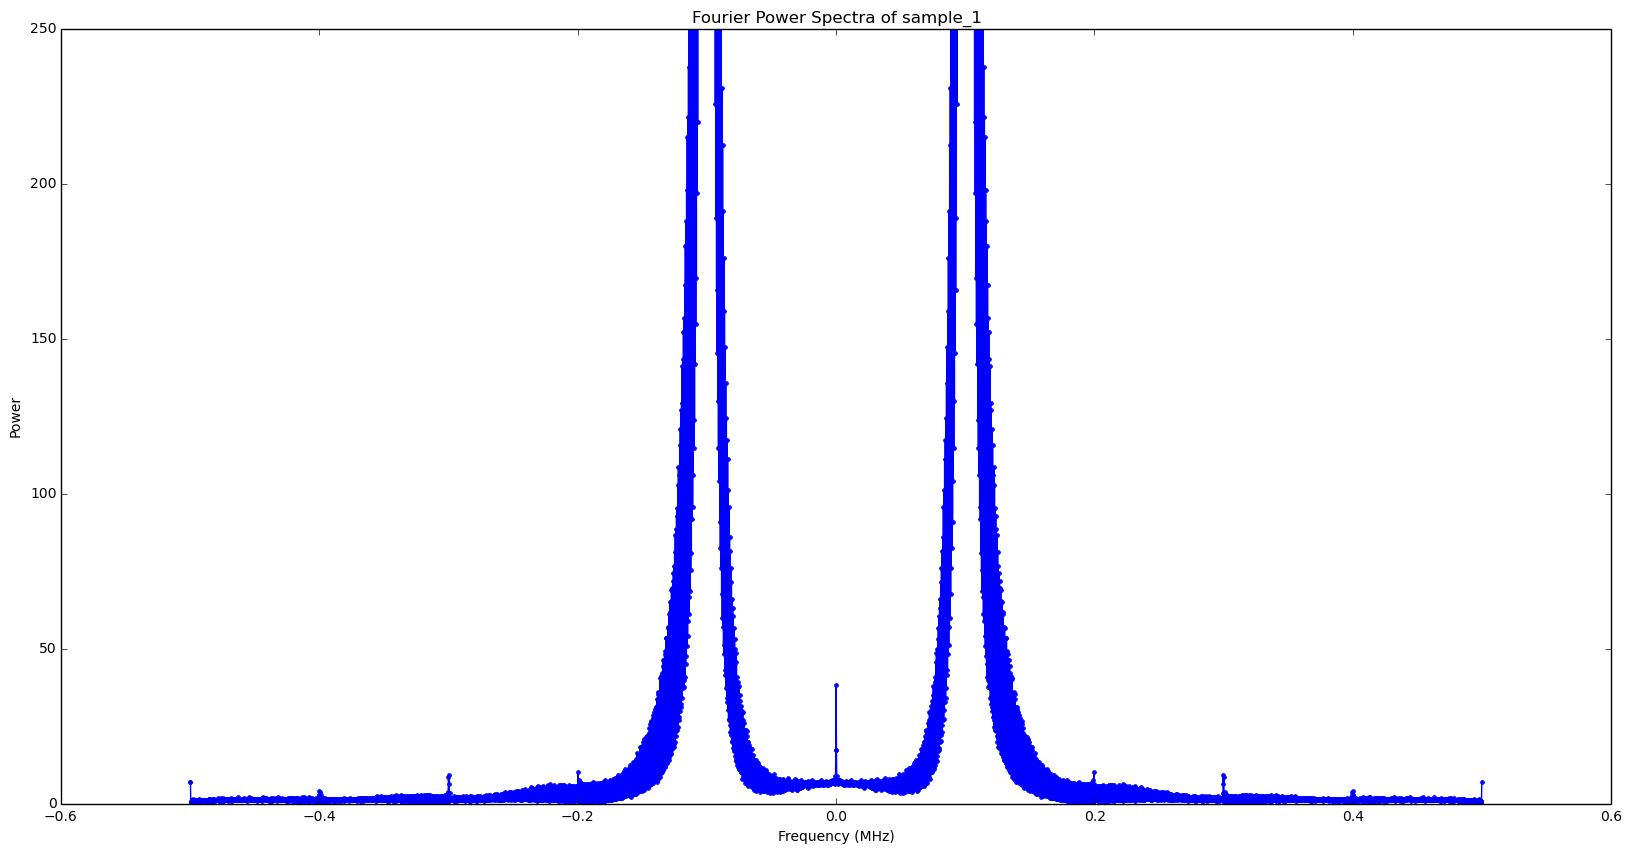

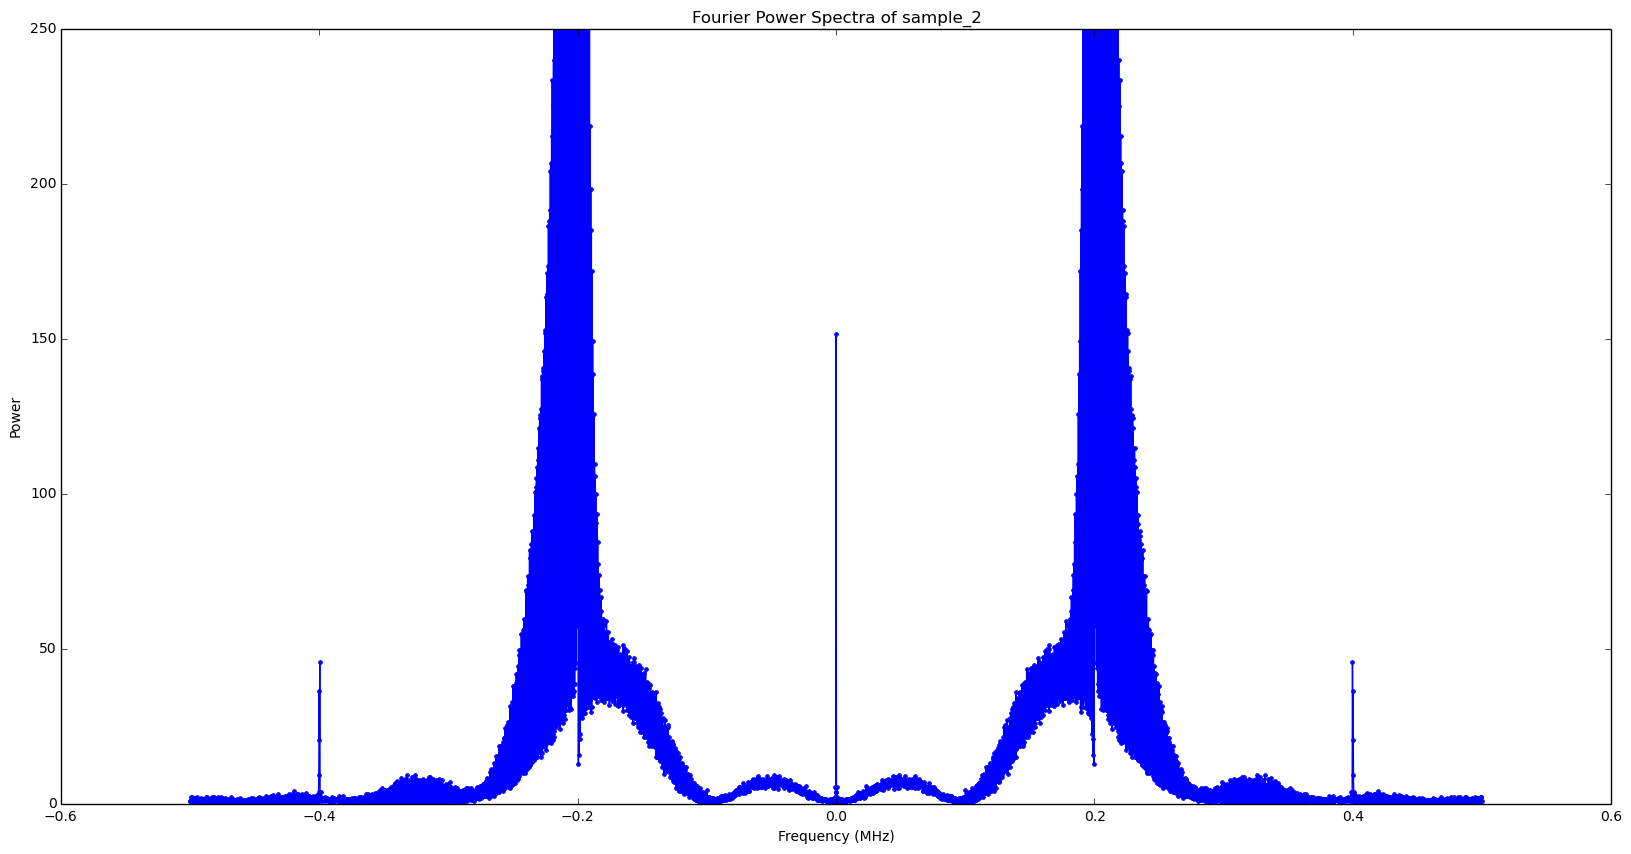

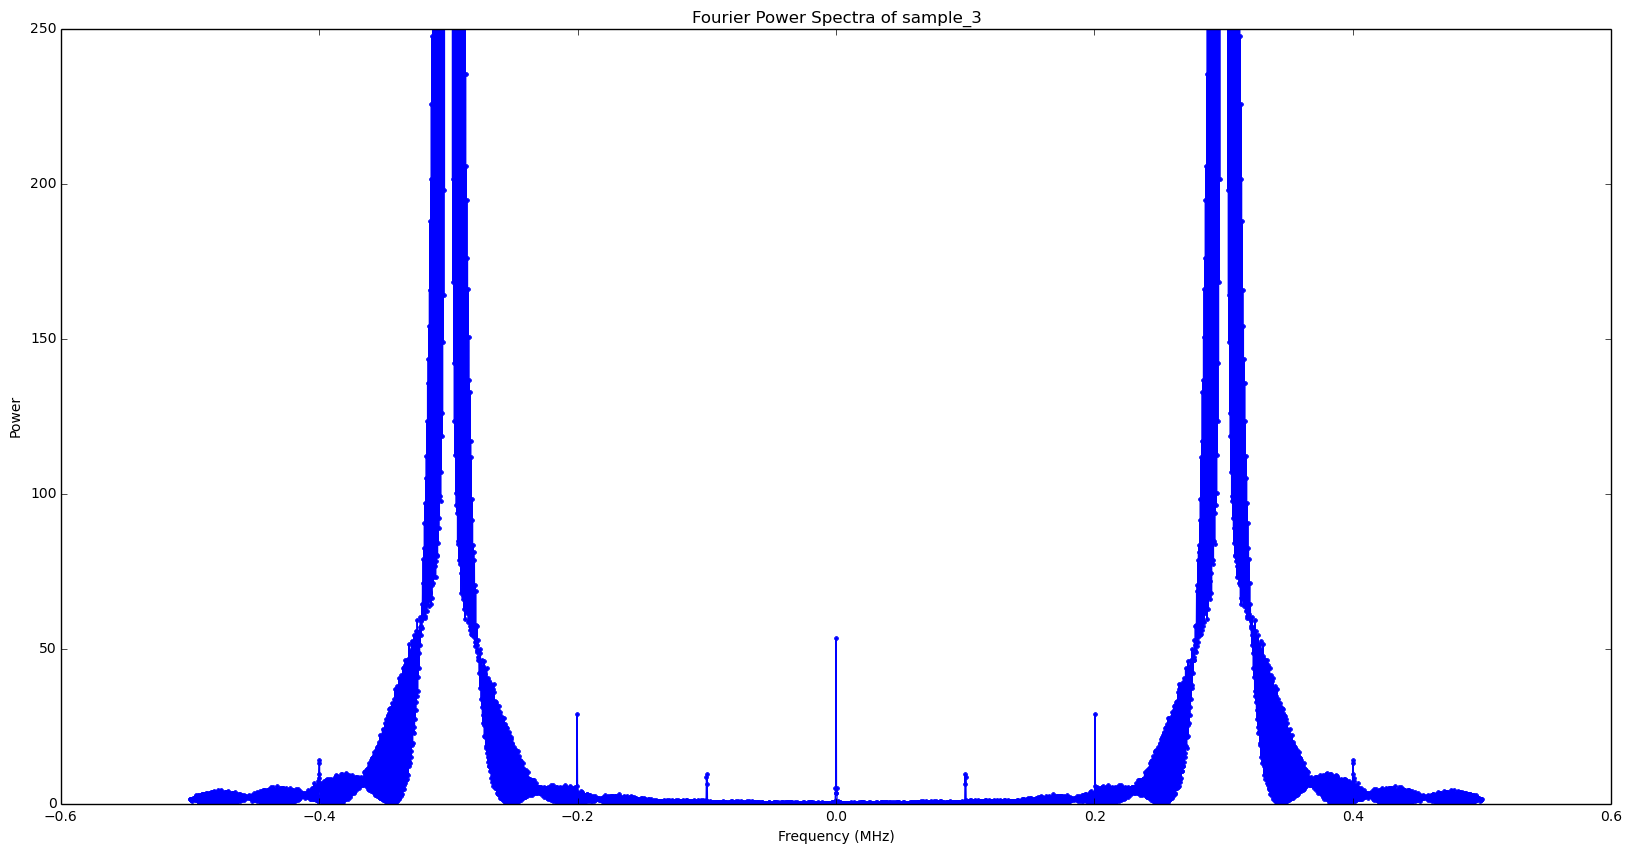

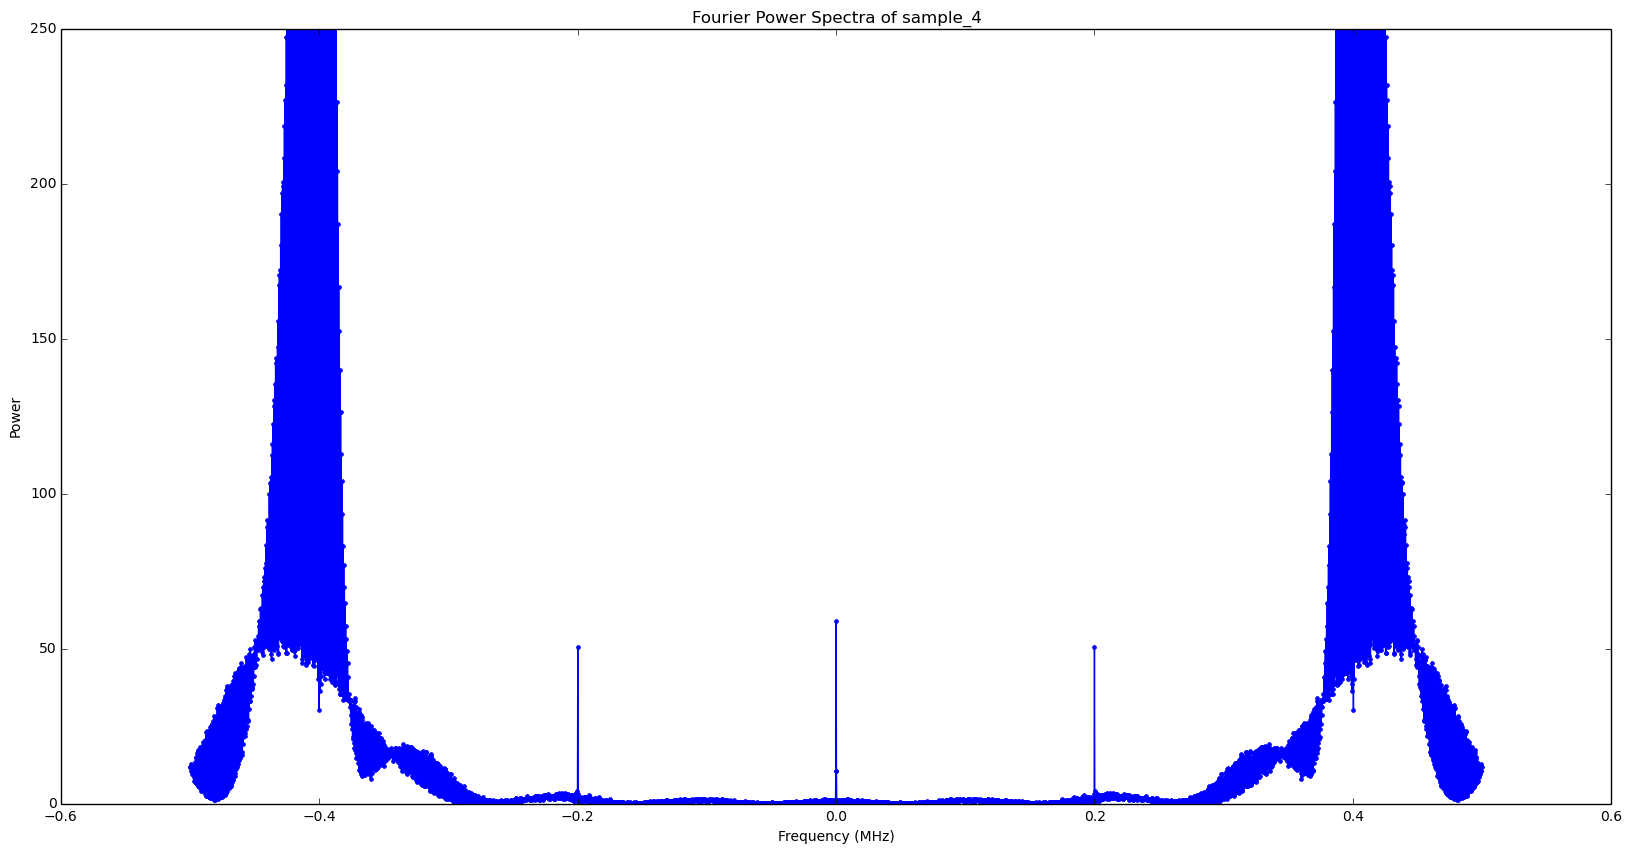

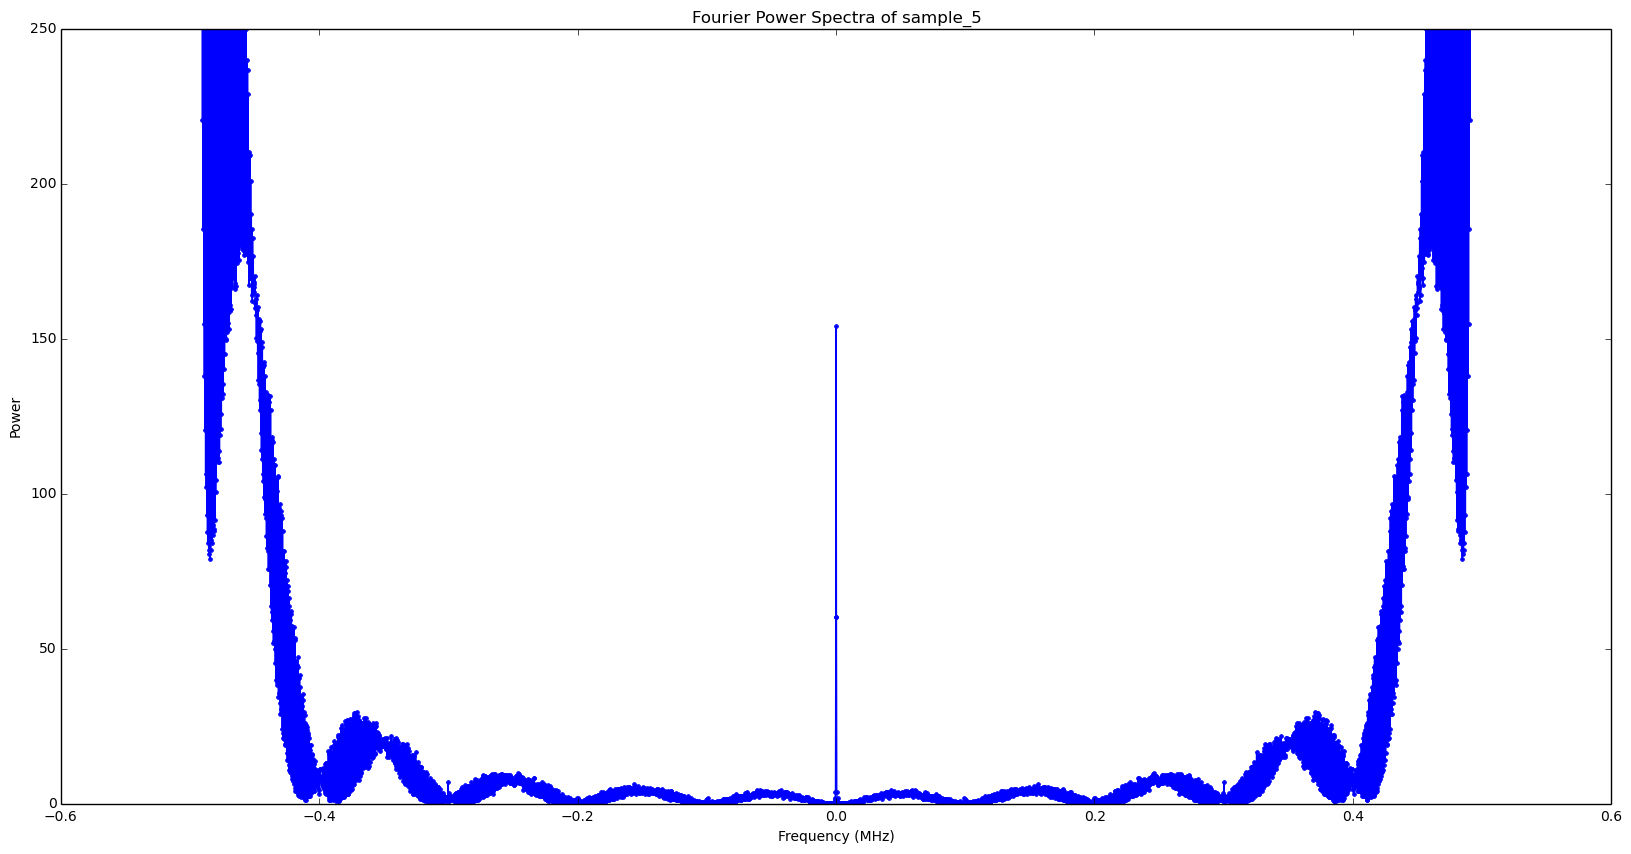

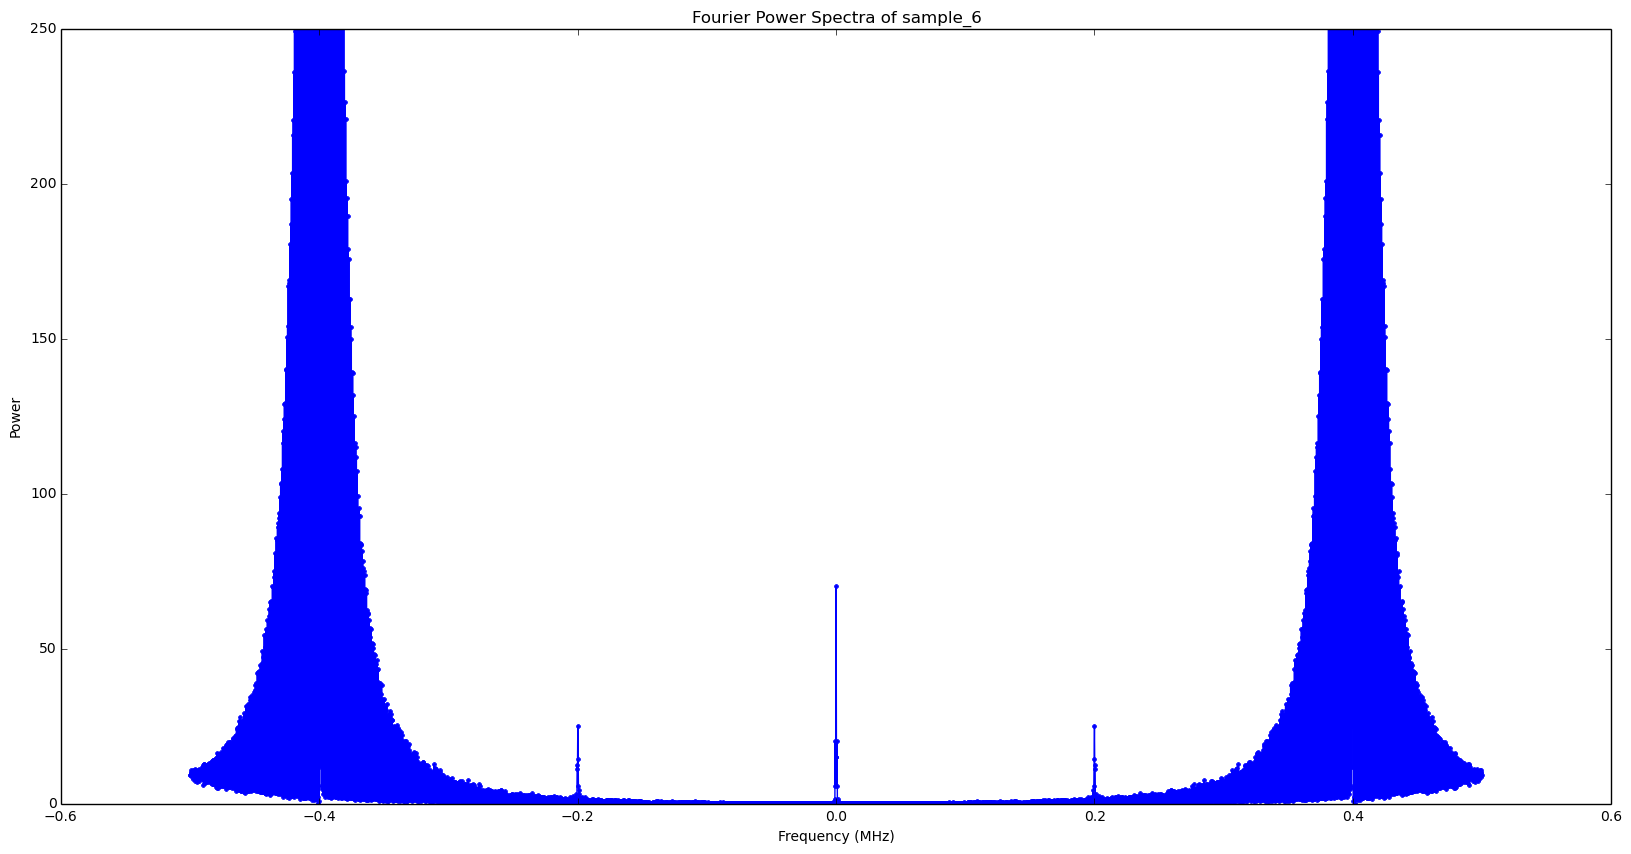

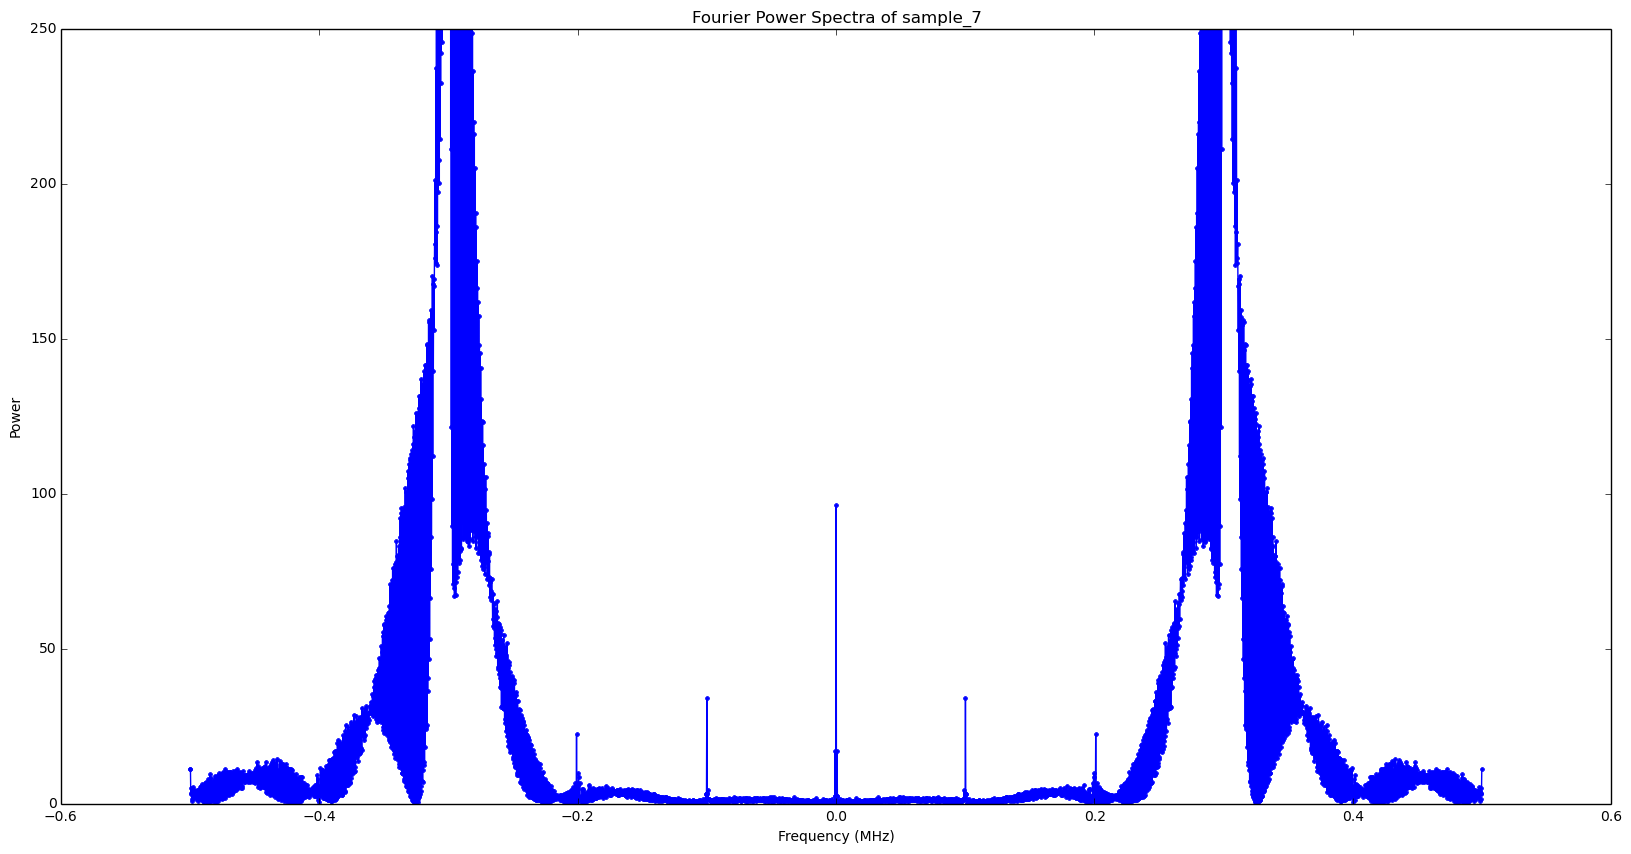

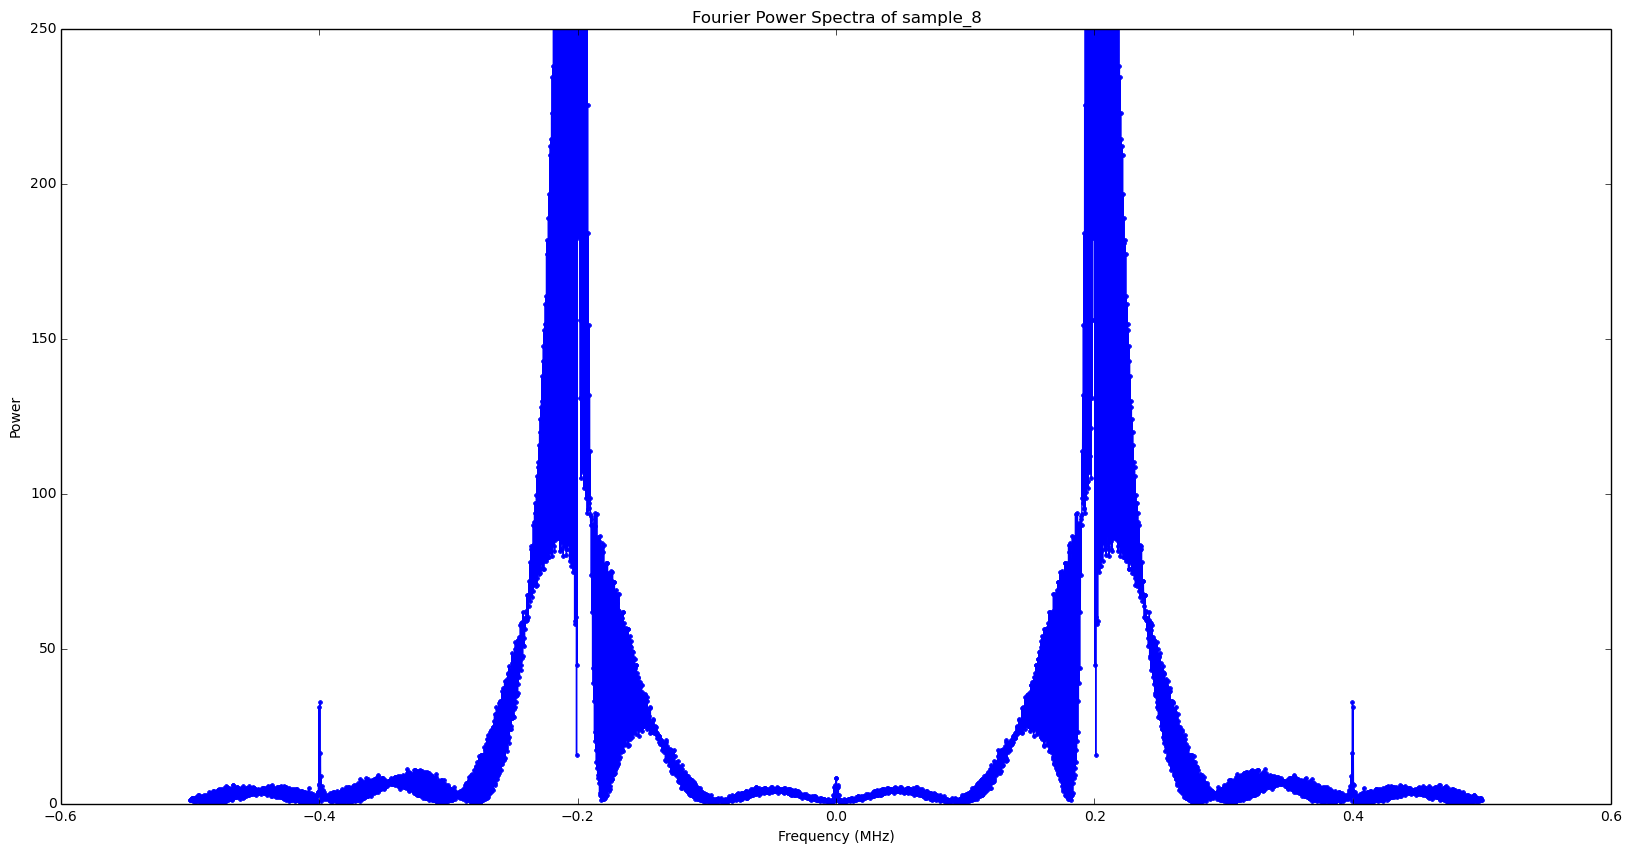

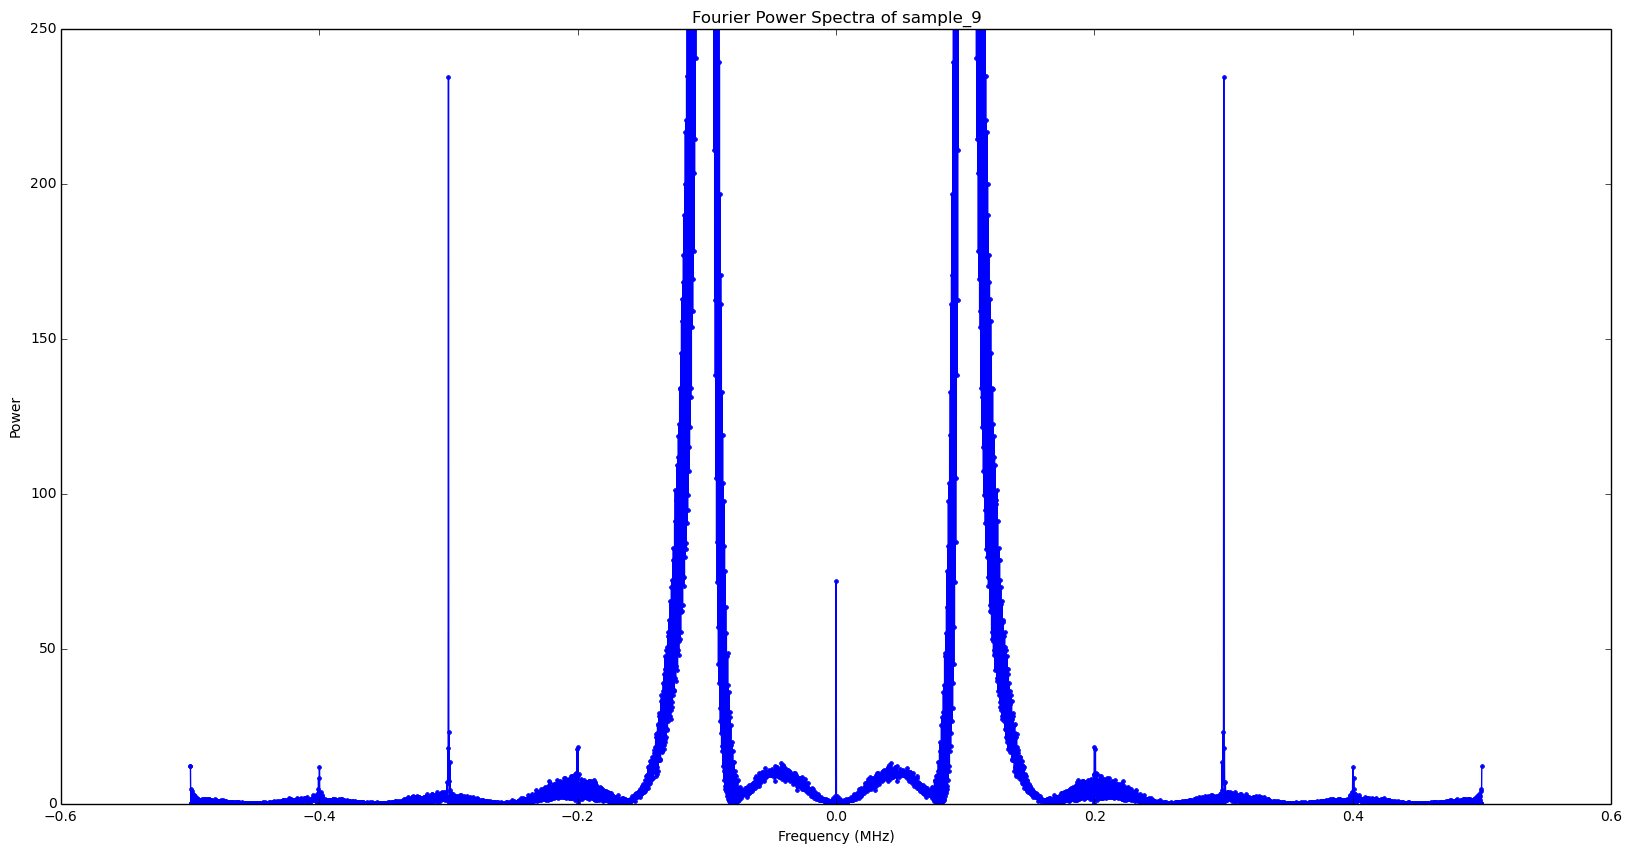

In [7]:
#3.4 Leakage Power (choose one)
N=4096
for i in range(1,10):
    filename = "sample_" + str(i) + ".npy"
    test_arr = np.load(filename)
    test_arr = np.divide(test_arr, 16384.0)
    freq_new, fourier_plot = ugradio.dft.dft(test_arr[:N])
    fourier_plot = np.abs(fourier_plot)**2
    pl.figure(i, figsize=(20,10))
    axes = pl.gca()
    axes.set_ylim([0,250])
    pl.title("Fourier Power Spectra of sample_" + str(i))
    pl.xlabel('Frequency (MHz)')
    pl.ylabel('Power')
    pl.plot(freq_new, fourier_plot, 'b.-')

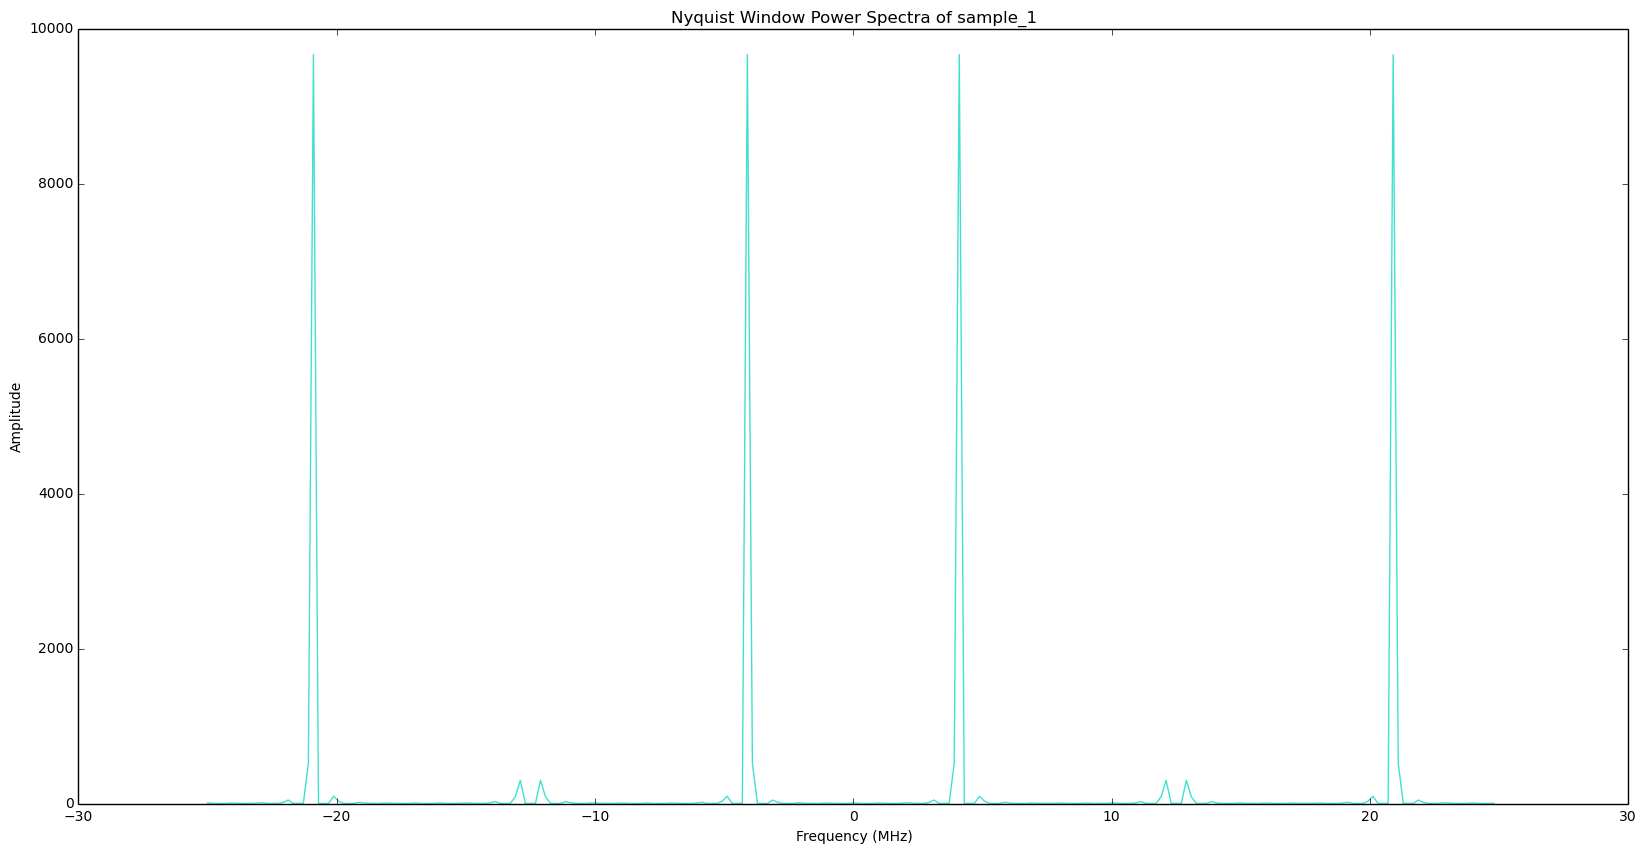

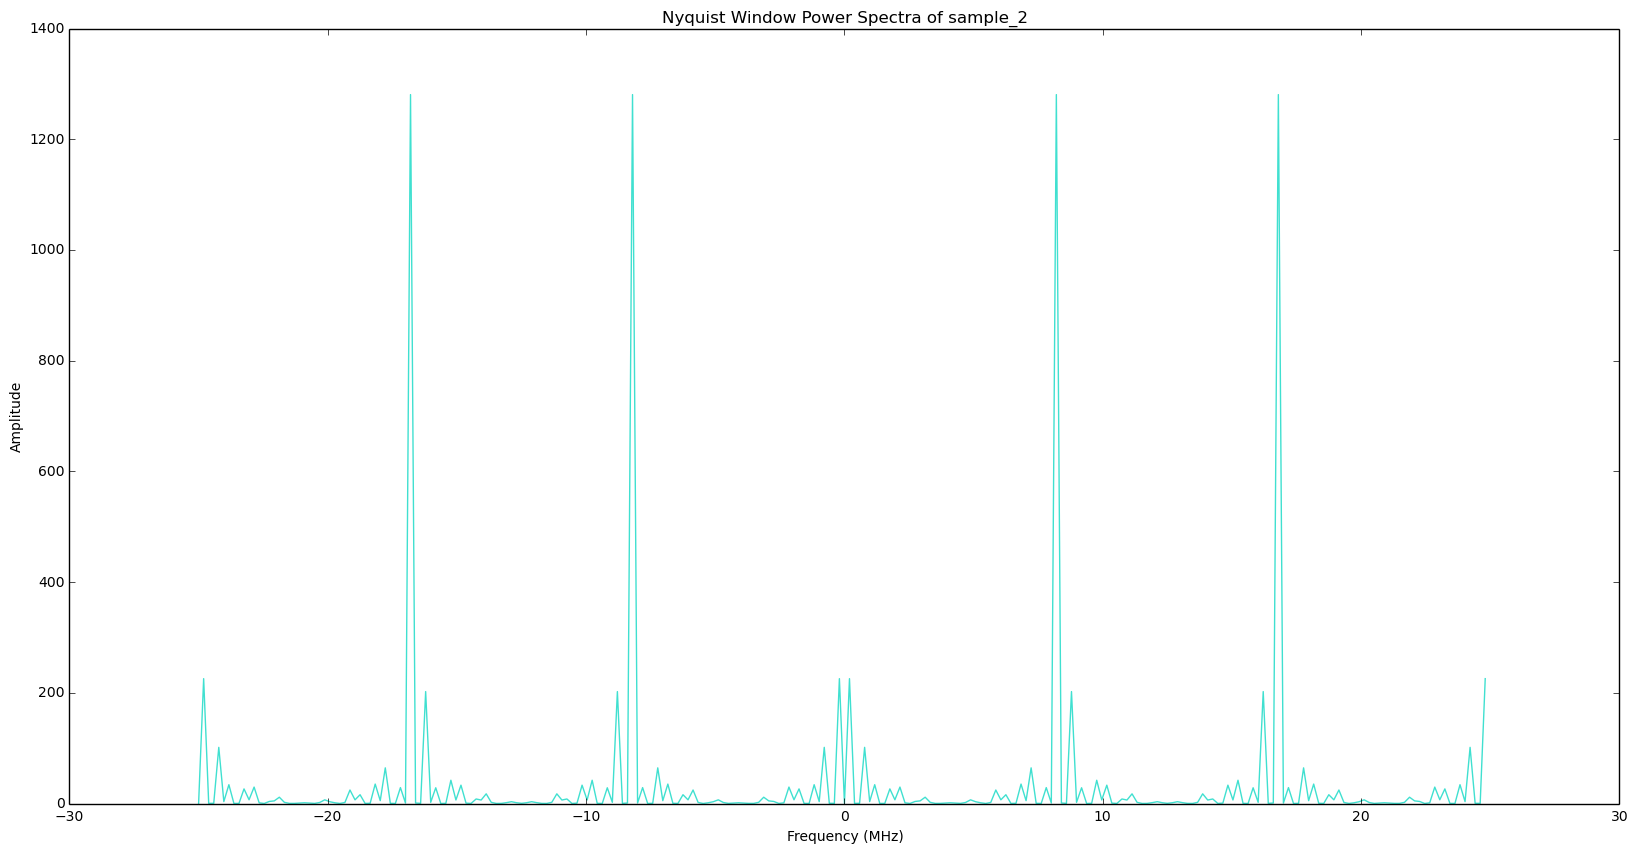

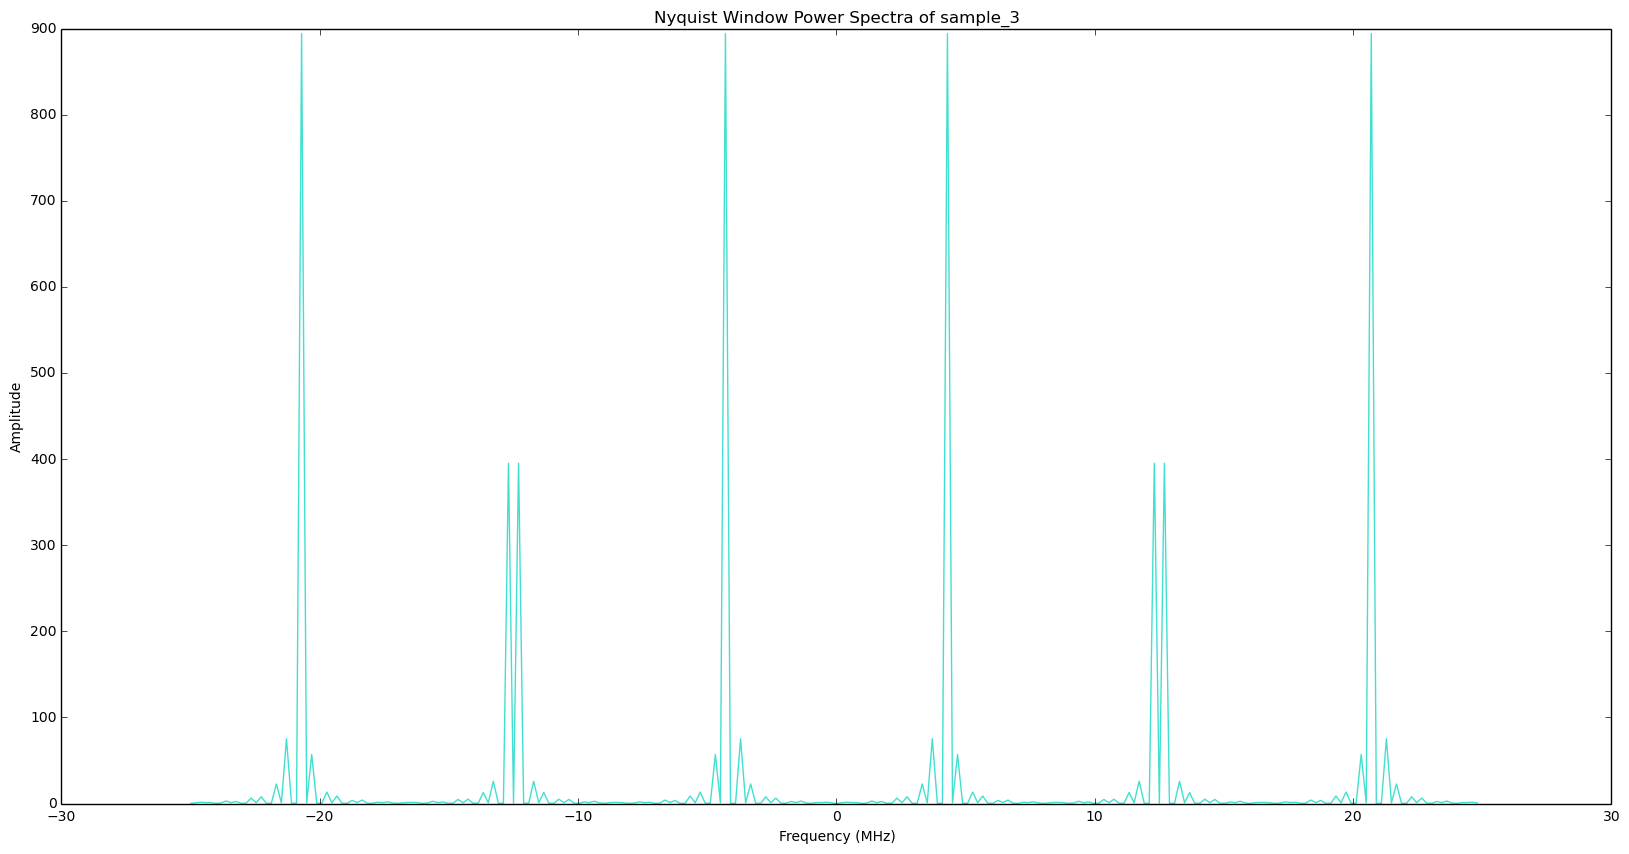

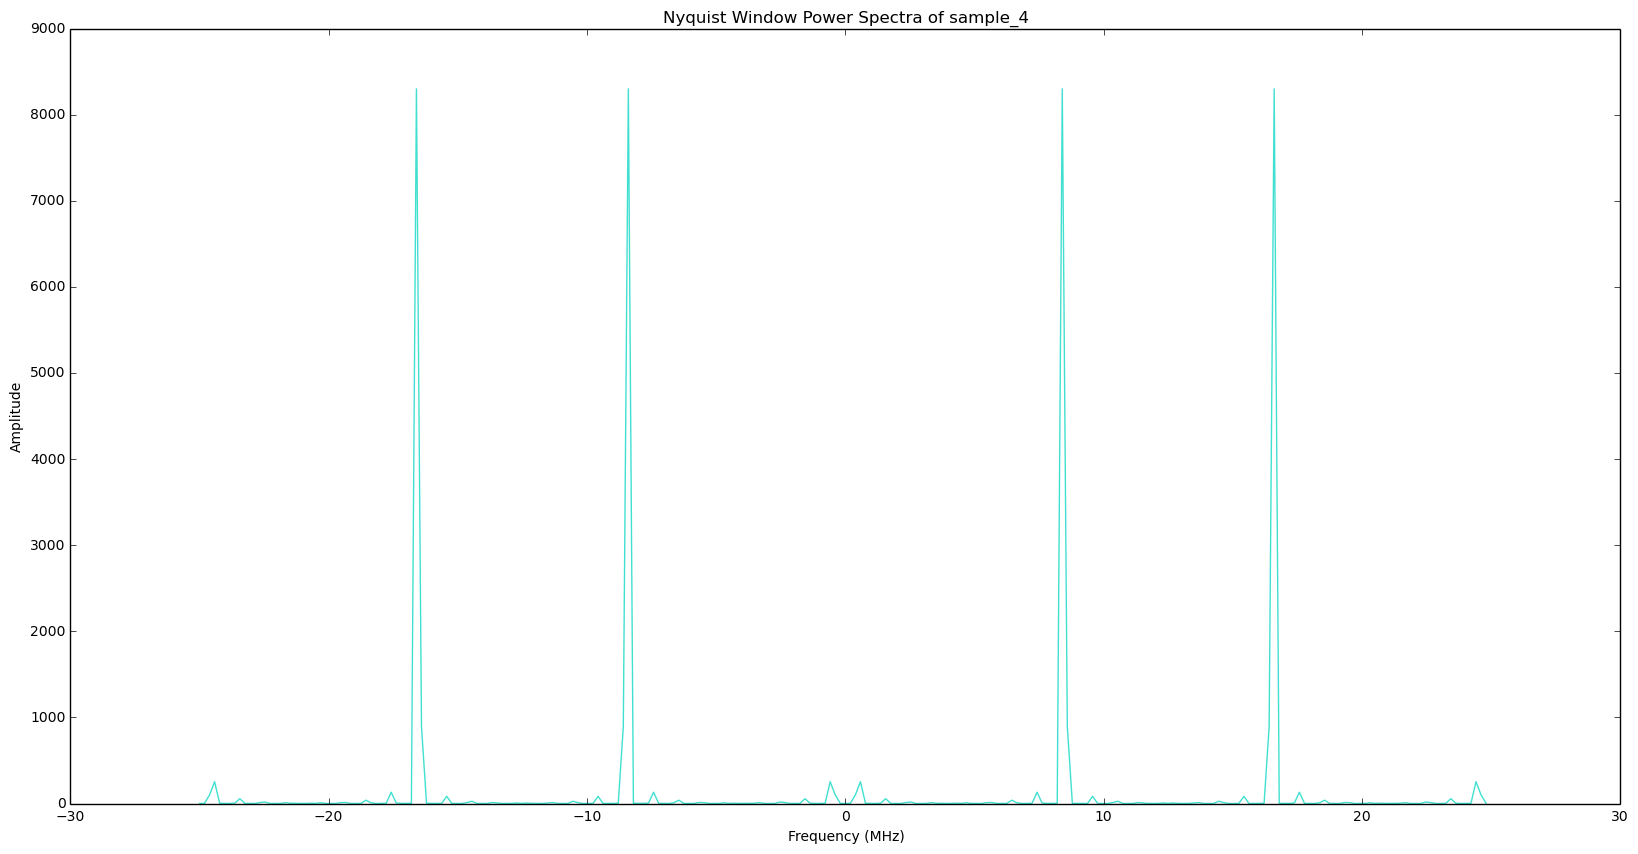

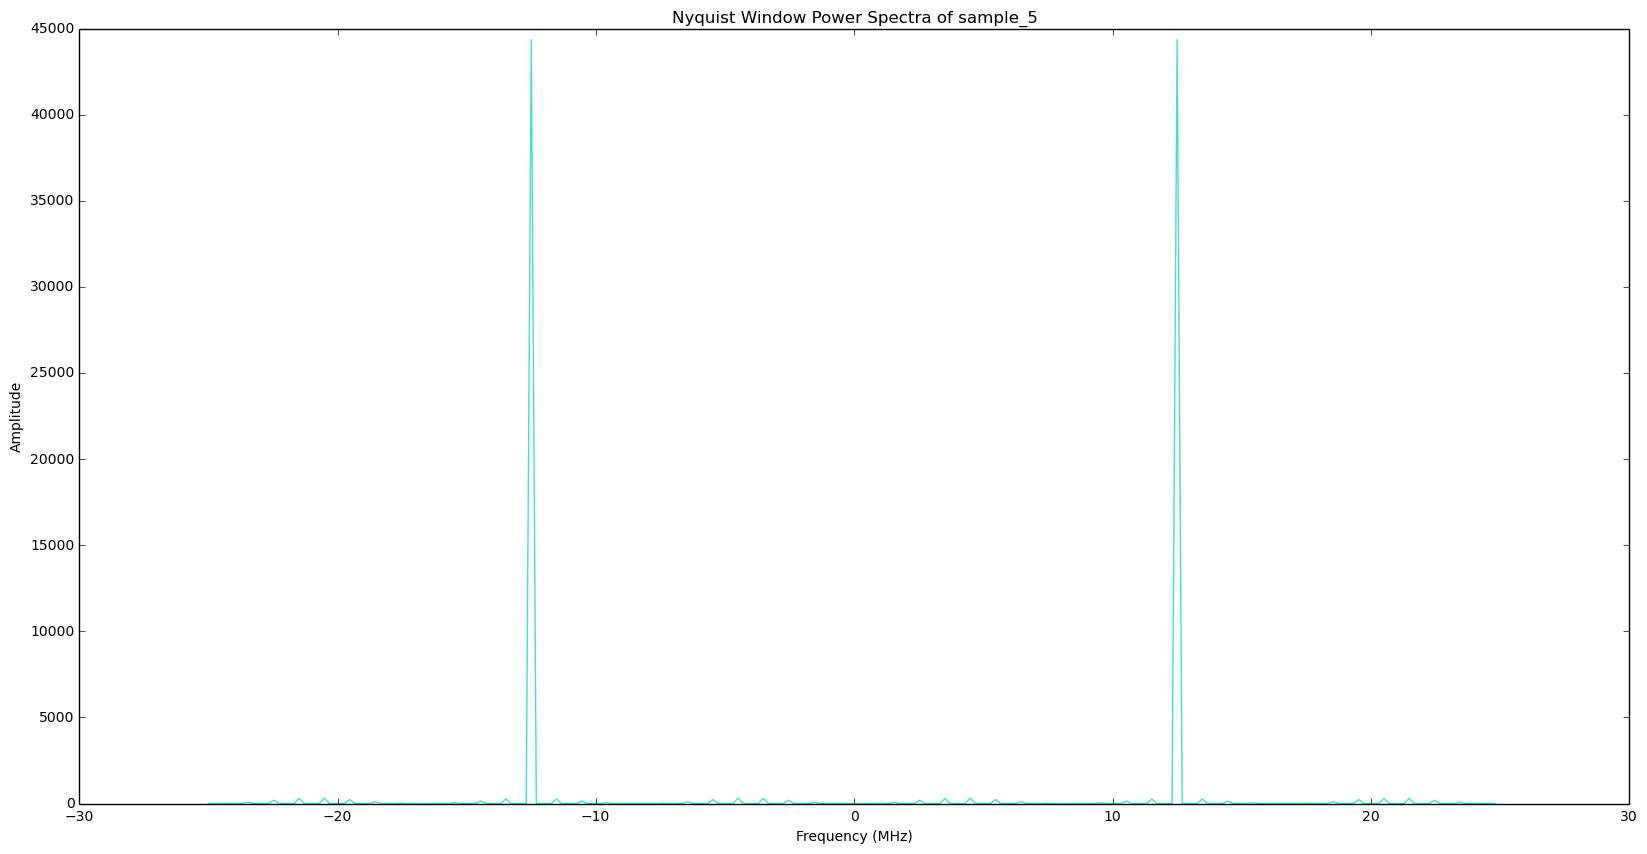

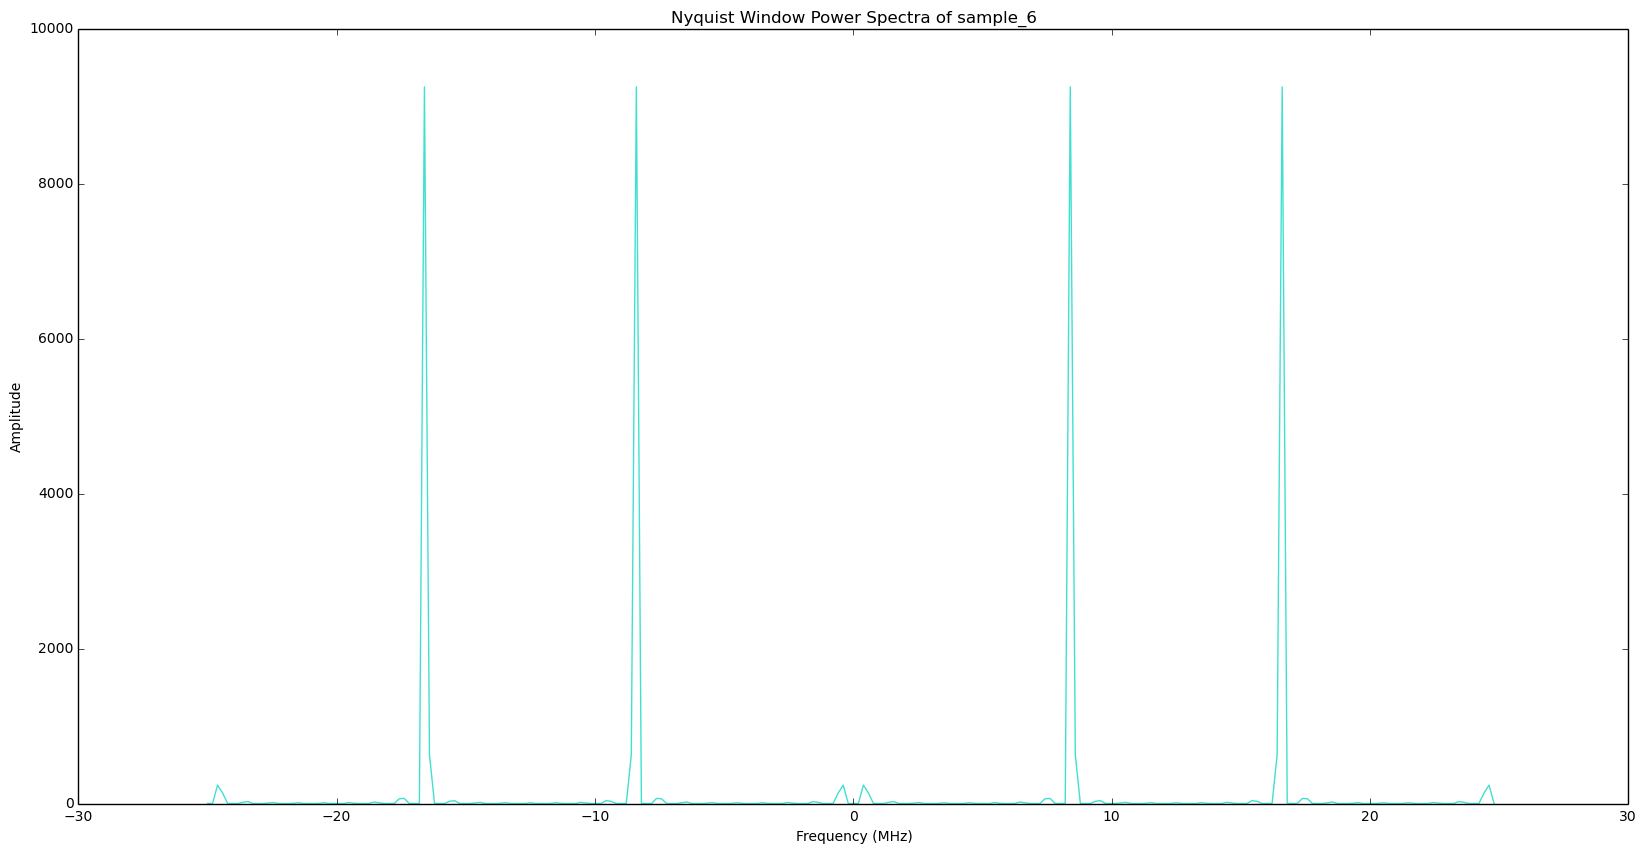

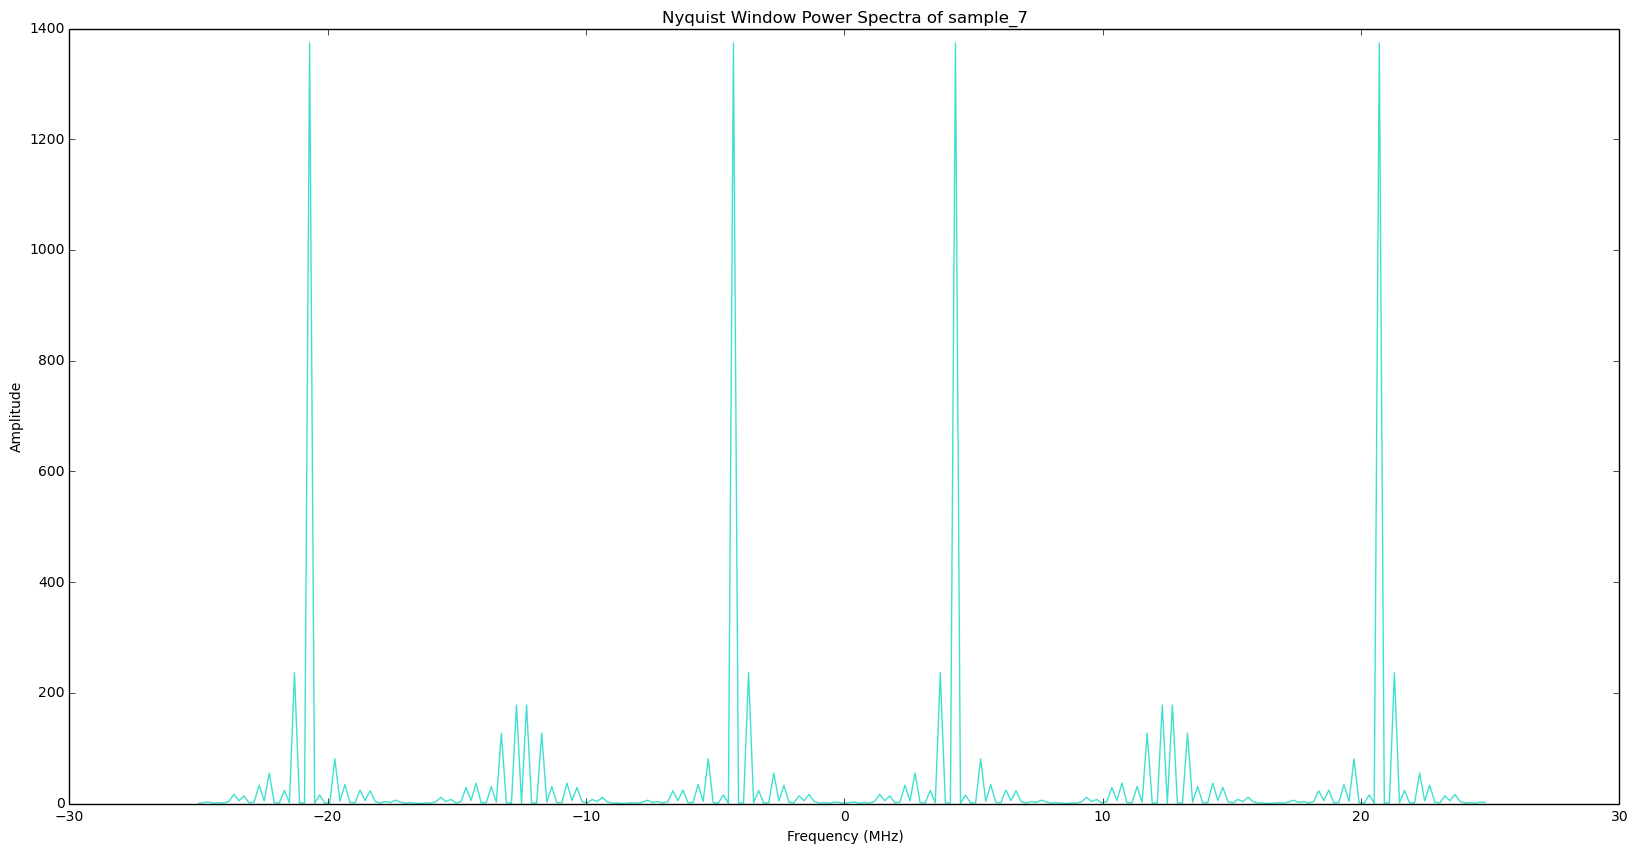

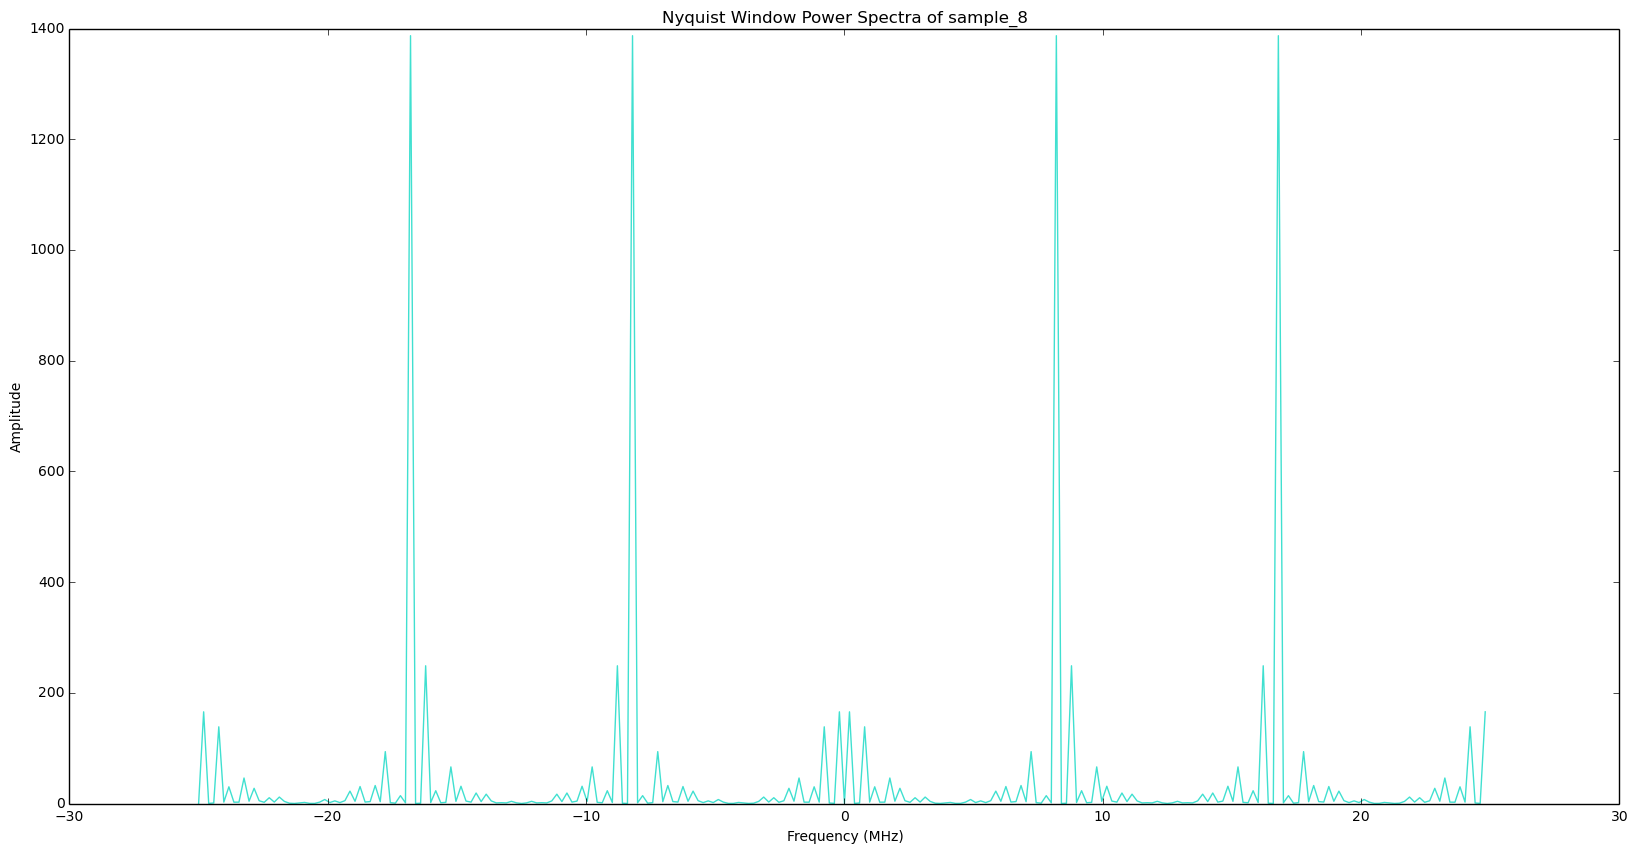

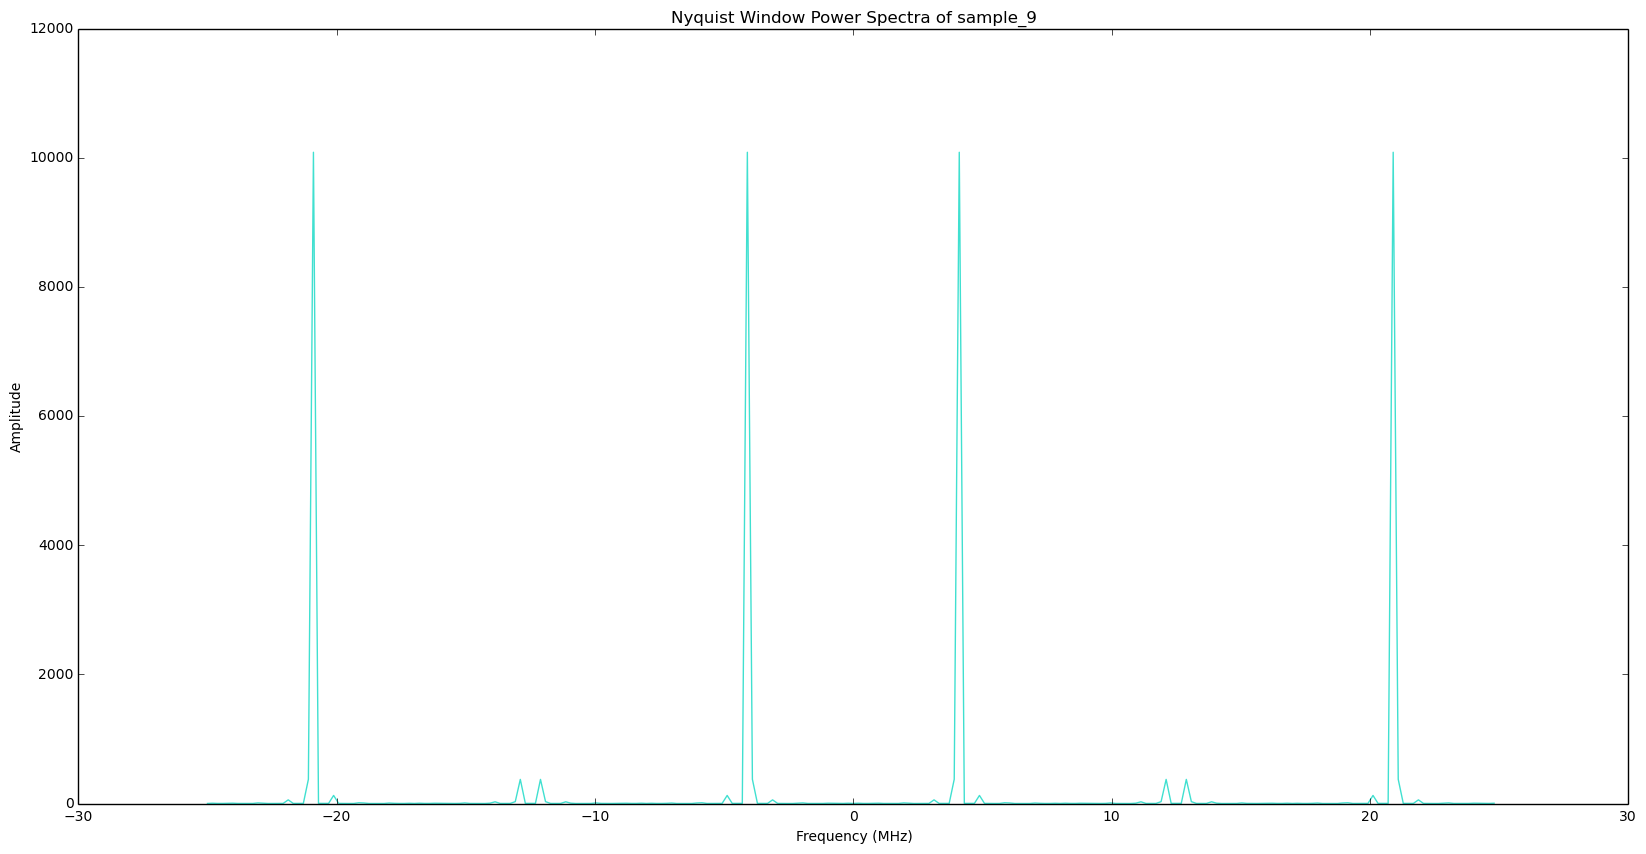

In [19]:
#3.6 Nyquist Windows (N=4)
N=256
freqs = np.linspace(4*(-6.25/2),(4*(6.25/2)*(1-2/N)), num=N, endpoint=False)
for i in range(1,10):
    filename = "sample_" + str(i) + ".npy"
    test_arr = np.load(filename)
    test_arr = np.divide(test_arr, 16384.0)
    pl.figure(i, figsize=(20,10))
    fourier_plot = ugradio.dft.dft(test_arr[:N], f=freqs)[1]
    fourier_plot = np.abs(fourier_plot)**2
    pl.title("Nyquist Window Power Spectra of sample_" + str(i))
    pl.xlabel('Frequency (MHz)')
    pl.ylabel('Amplitude')
    pl.plot(freqs, fourier_plot, color = "turquoise")

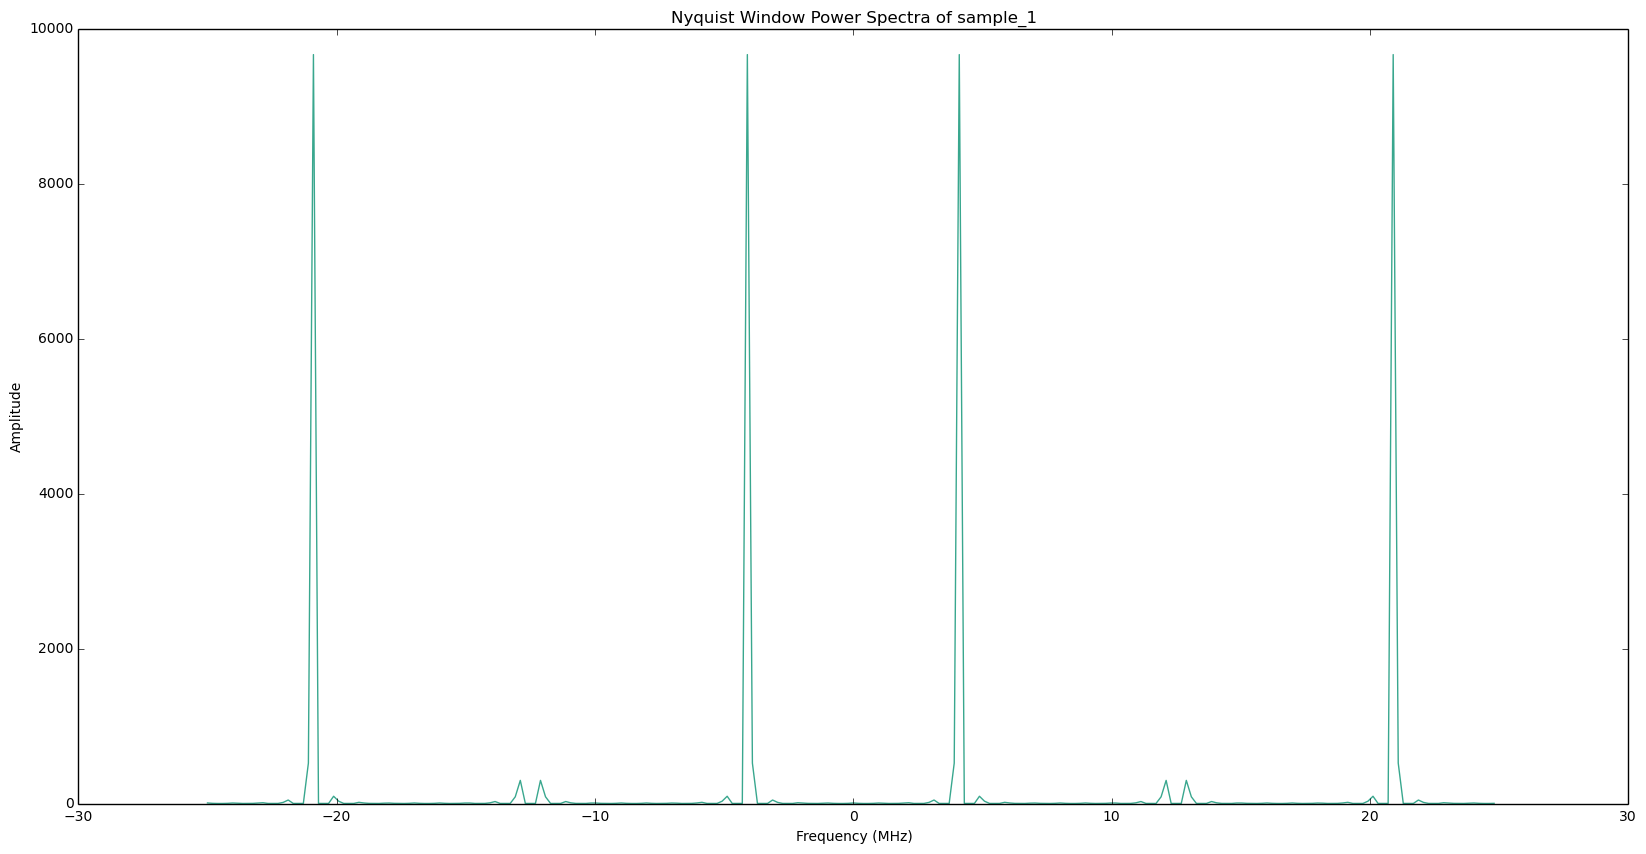

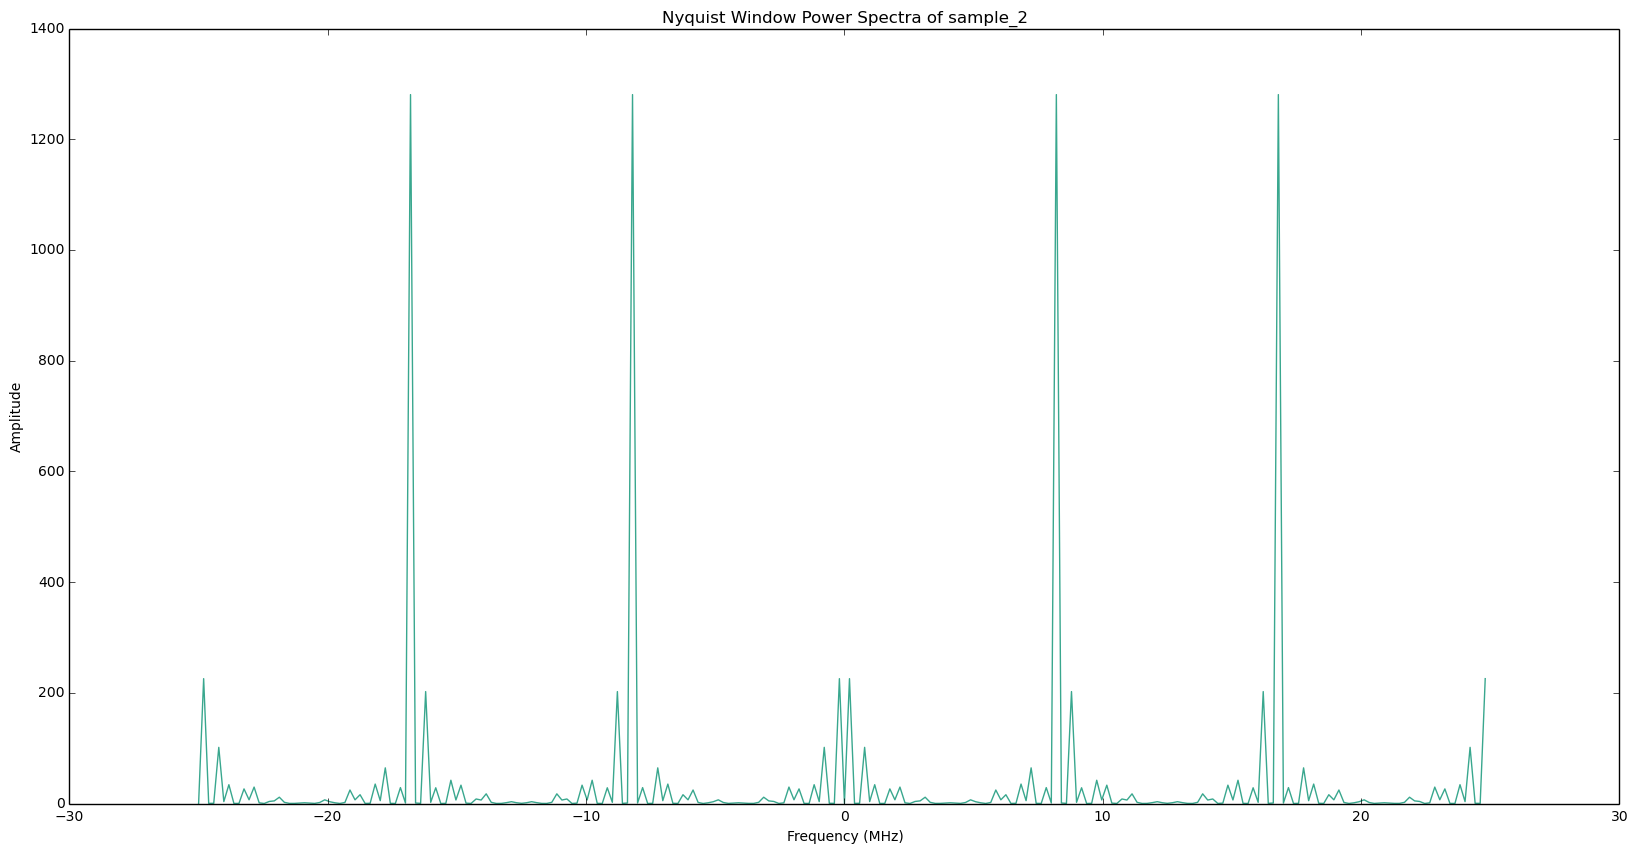

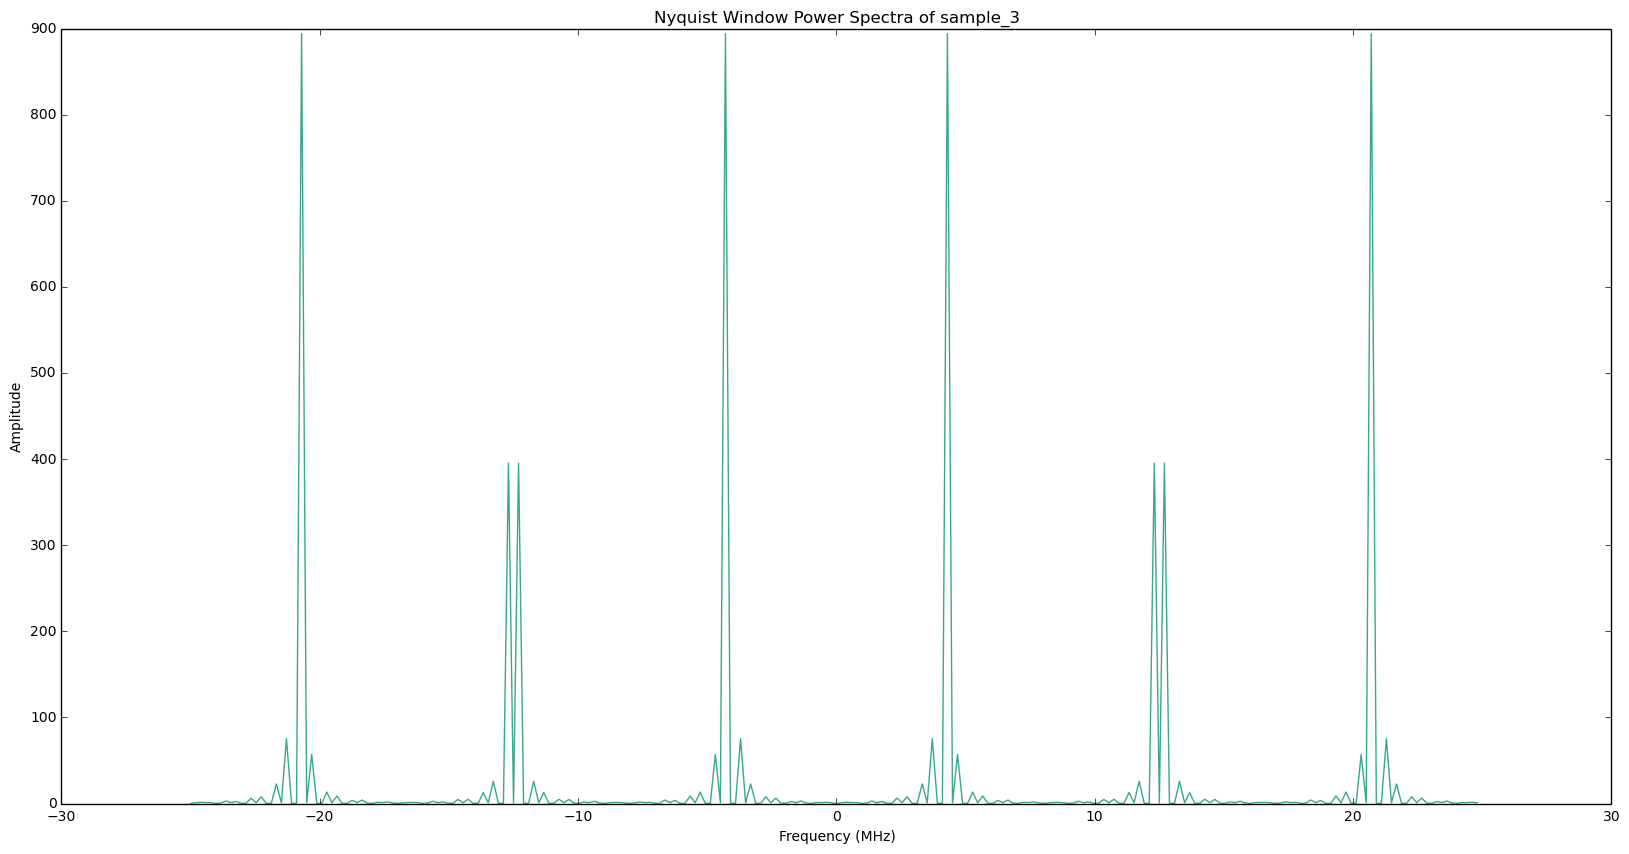

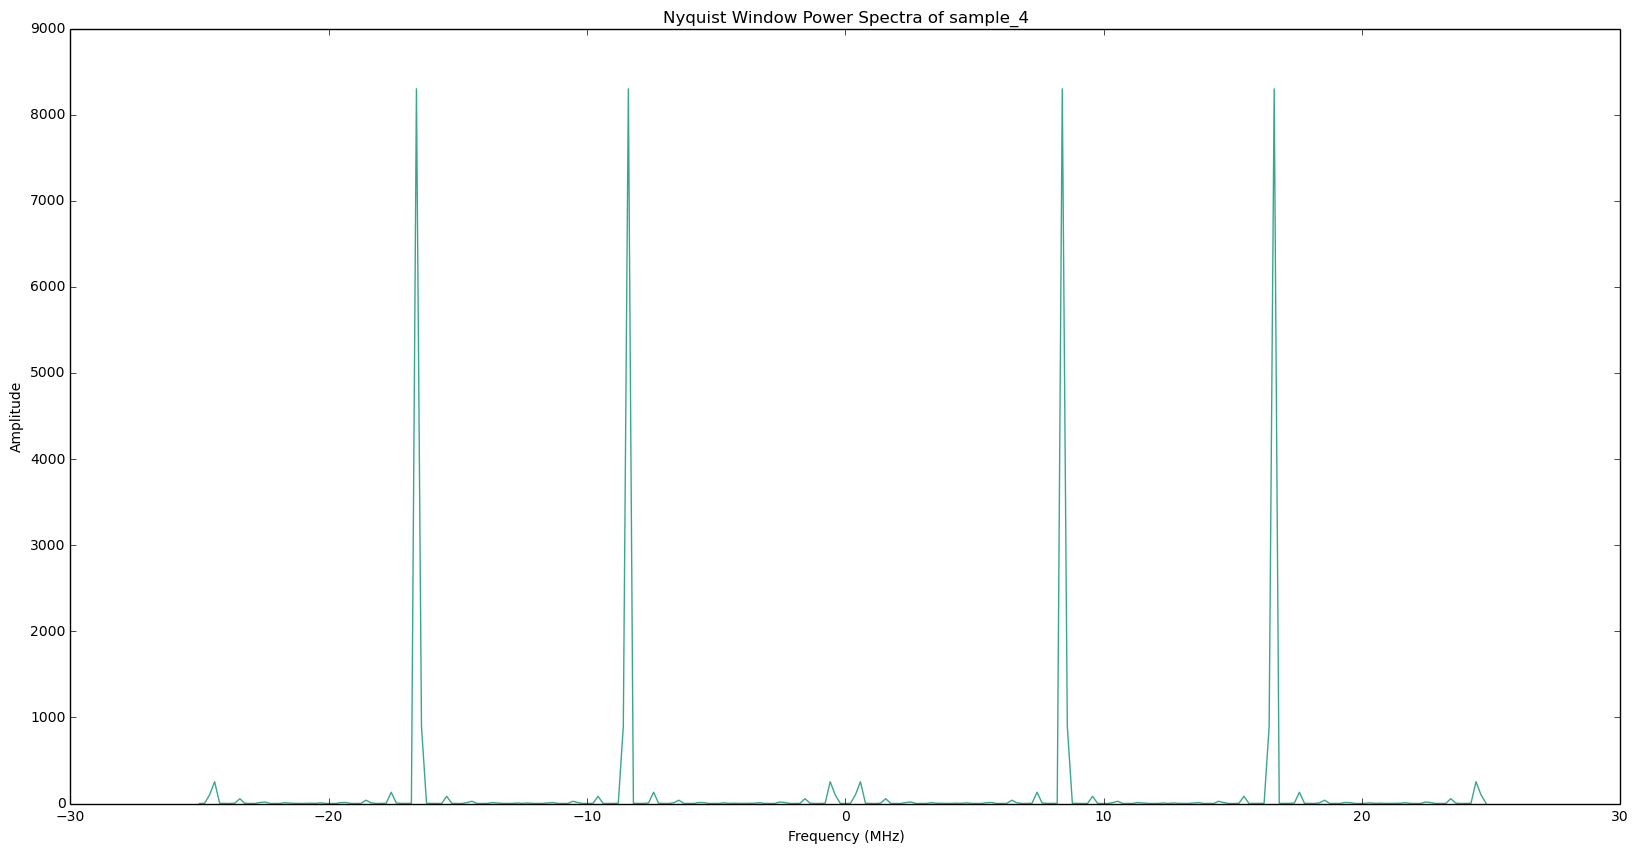

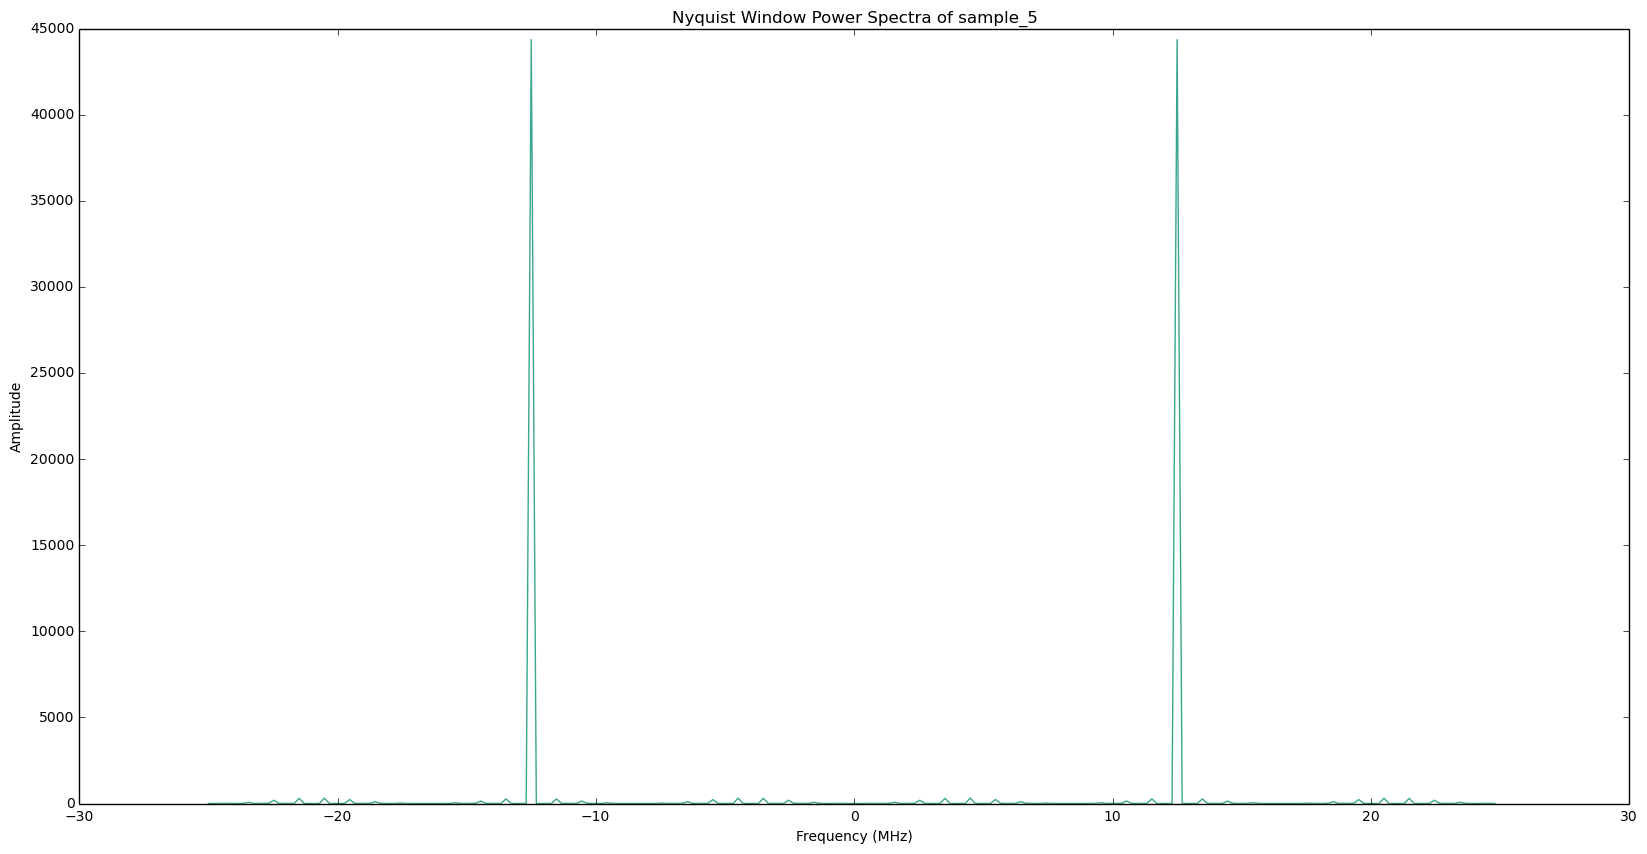

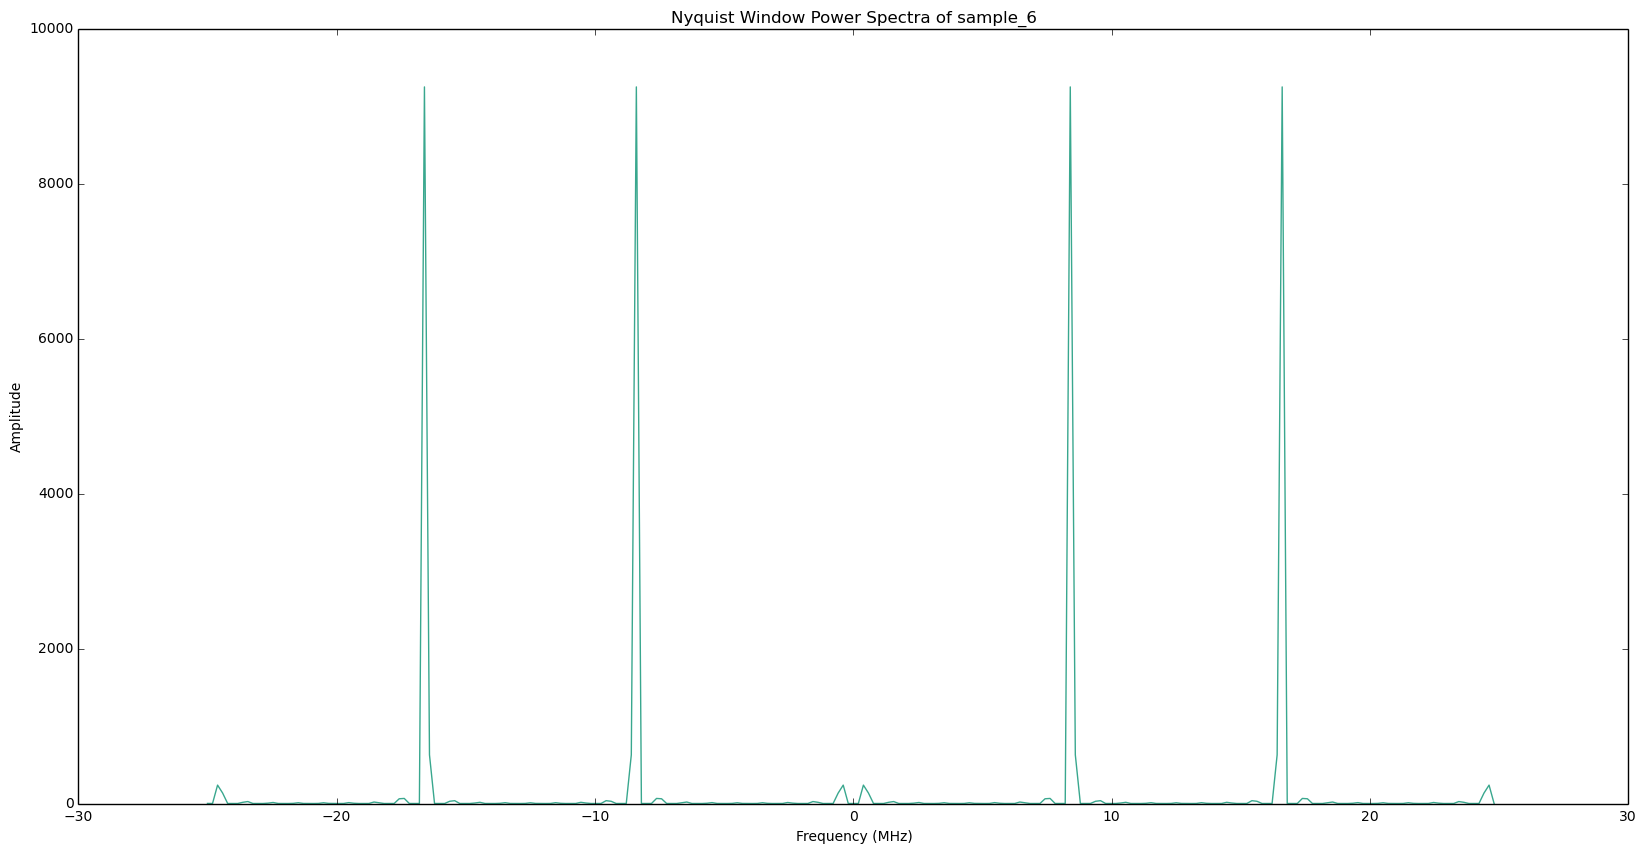

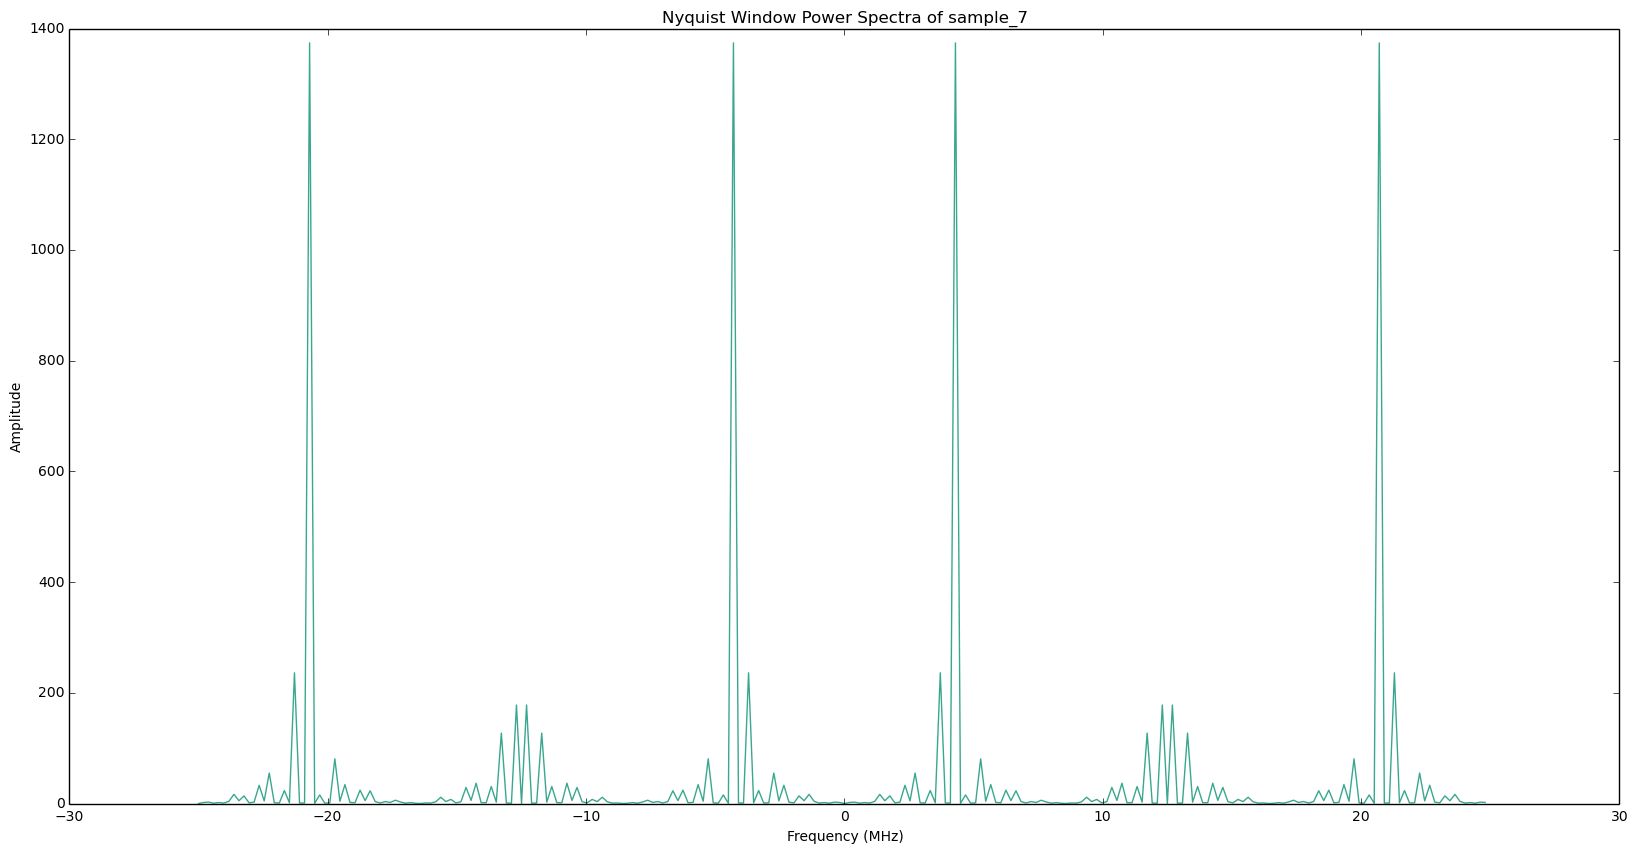

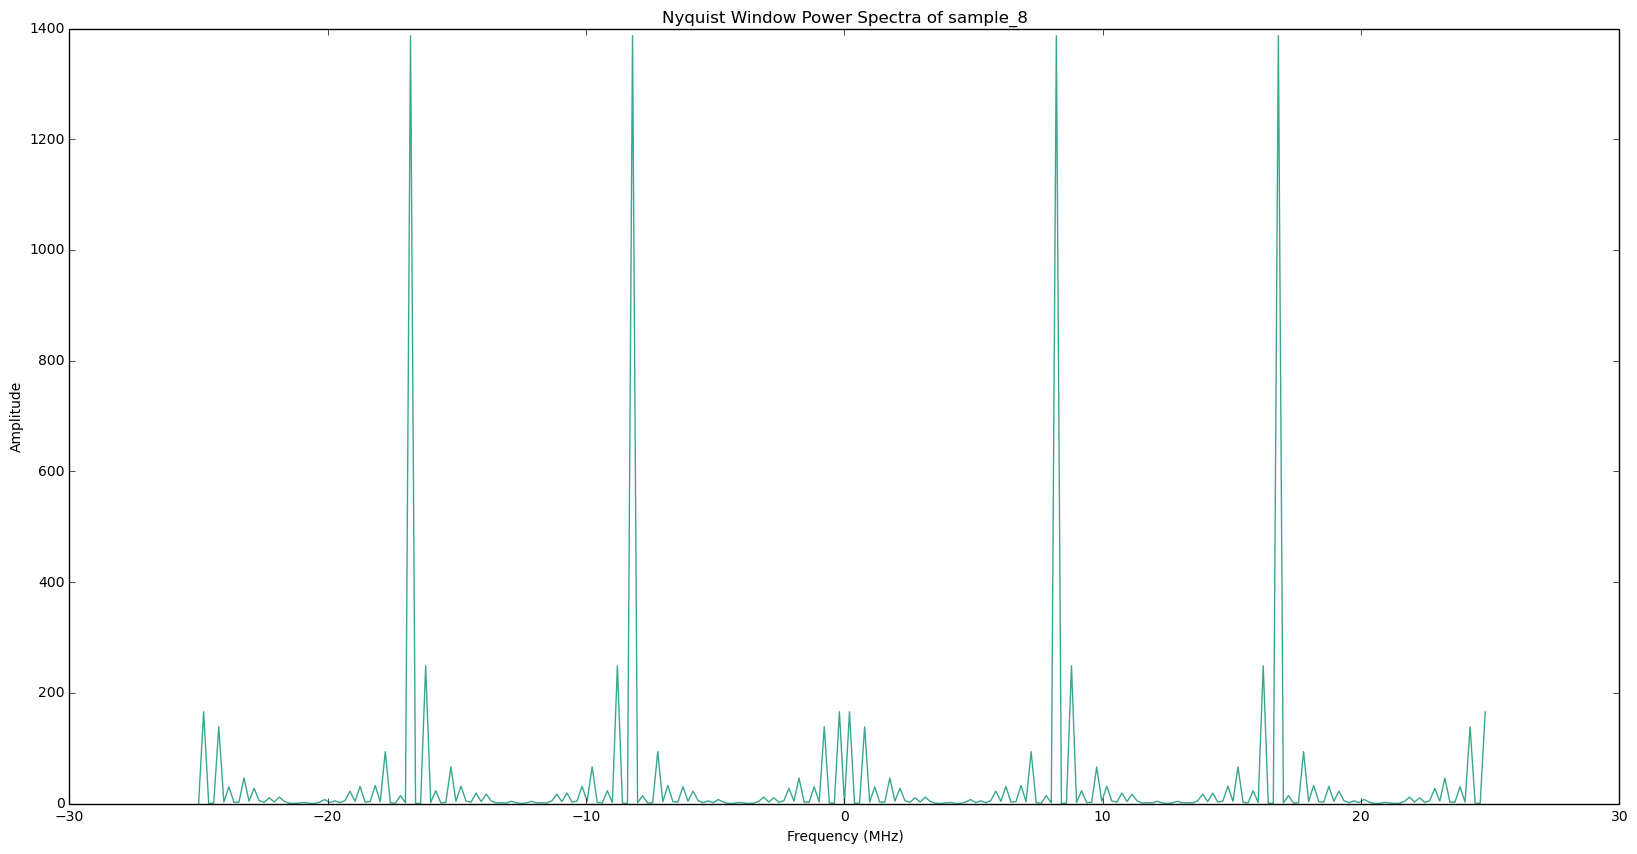

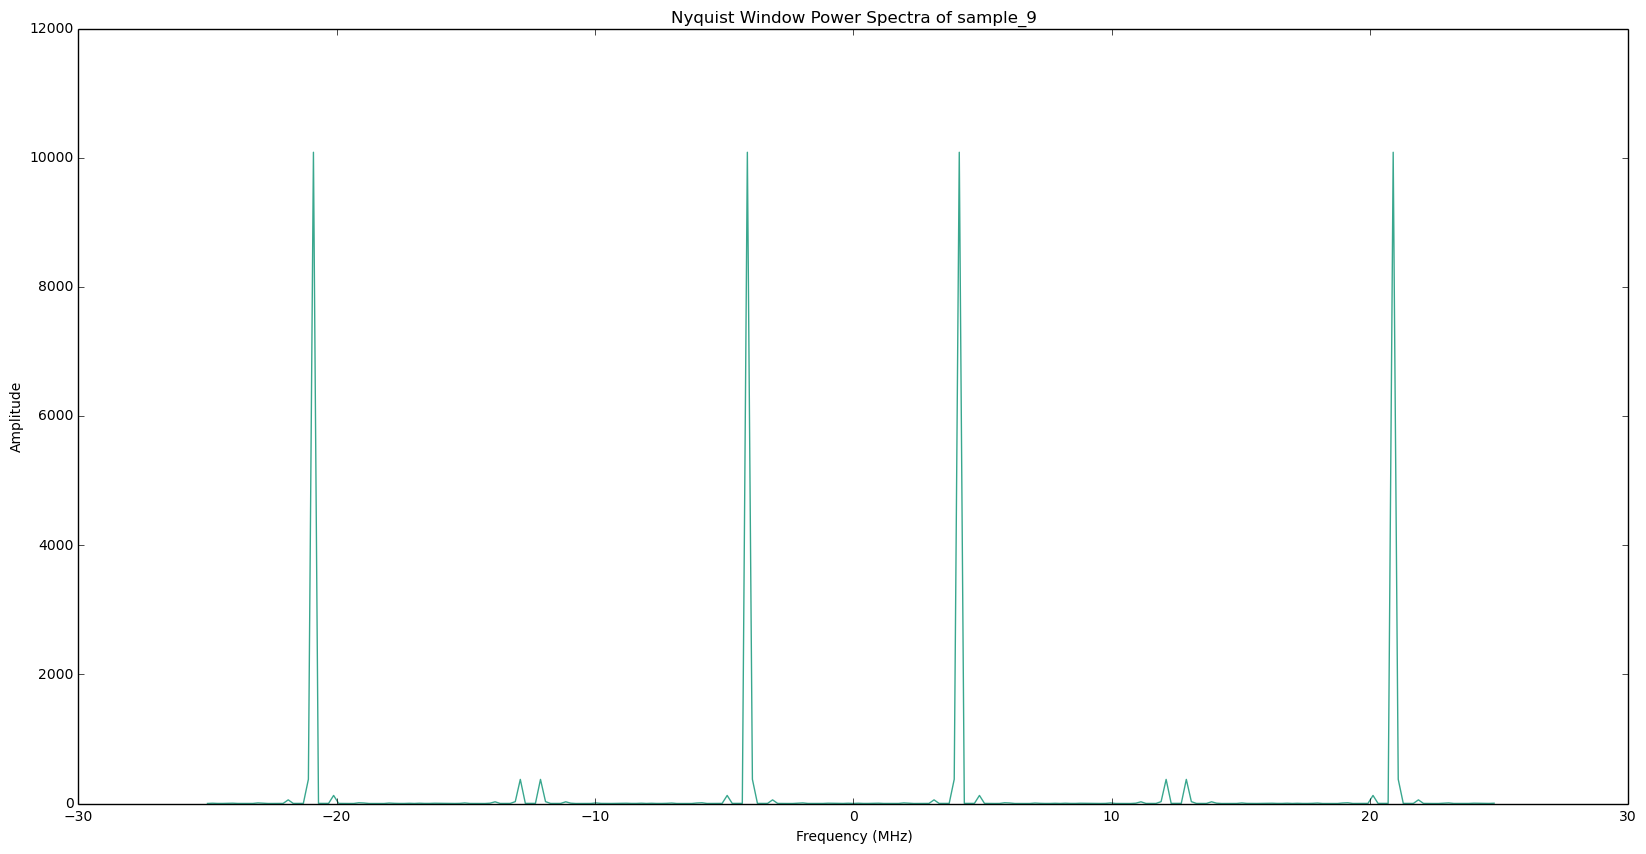

In [34]:
#3.6 Nyquist Window (N=8)
N=256
freqs = np.linspace(8*(-6.25/2),(8*(6.25/2)*(1-2/N)), num=N, endpoint=False)
for i in range(1,10):
    filename = "sample_" + str(i) + ".npy"
    test_arr = np.load(filename)
    test_arr = np.divide(test_arr, 16384.0)
    pl.figure(i, figsize=(20,10))
    fourier_plot = ugradio.dft.dft(test_arr[:N], f=freqs)[1]
    fourier_plot = np.abs(fourier_plot)**2
    pl.title("Nyquist Window Power Spectra of sample_" + str(i))
    pl.xlabel('Frequency (MHz)')
    pl.ylabel('Amplitude')
    pl.plot(freqs, fourier_plot, color = "#39A78E")
    #Color used is "Zomp"

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in square


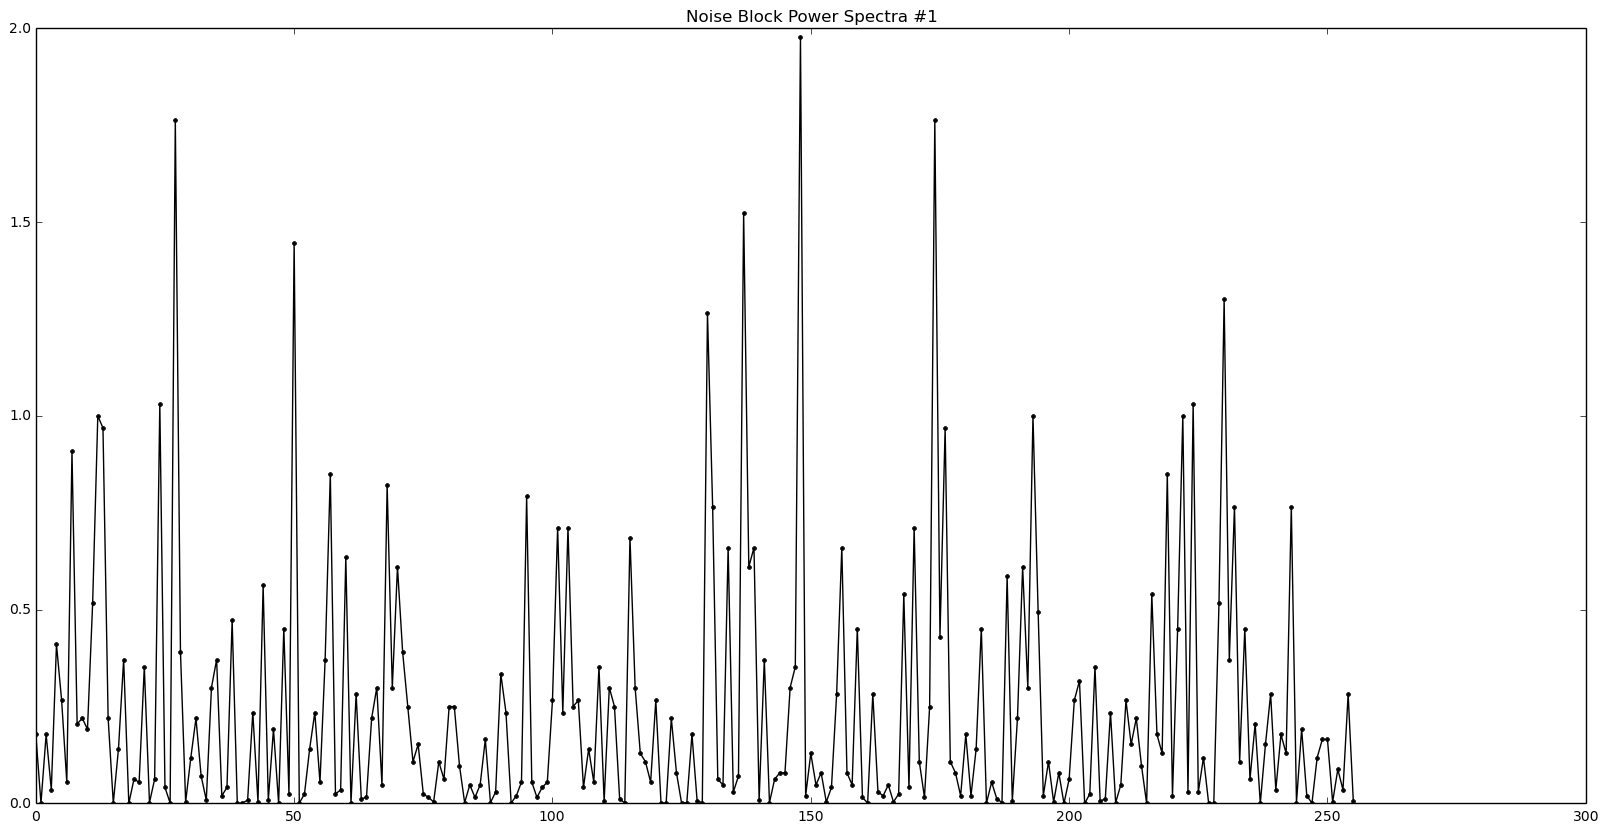

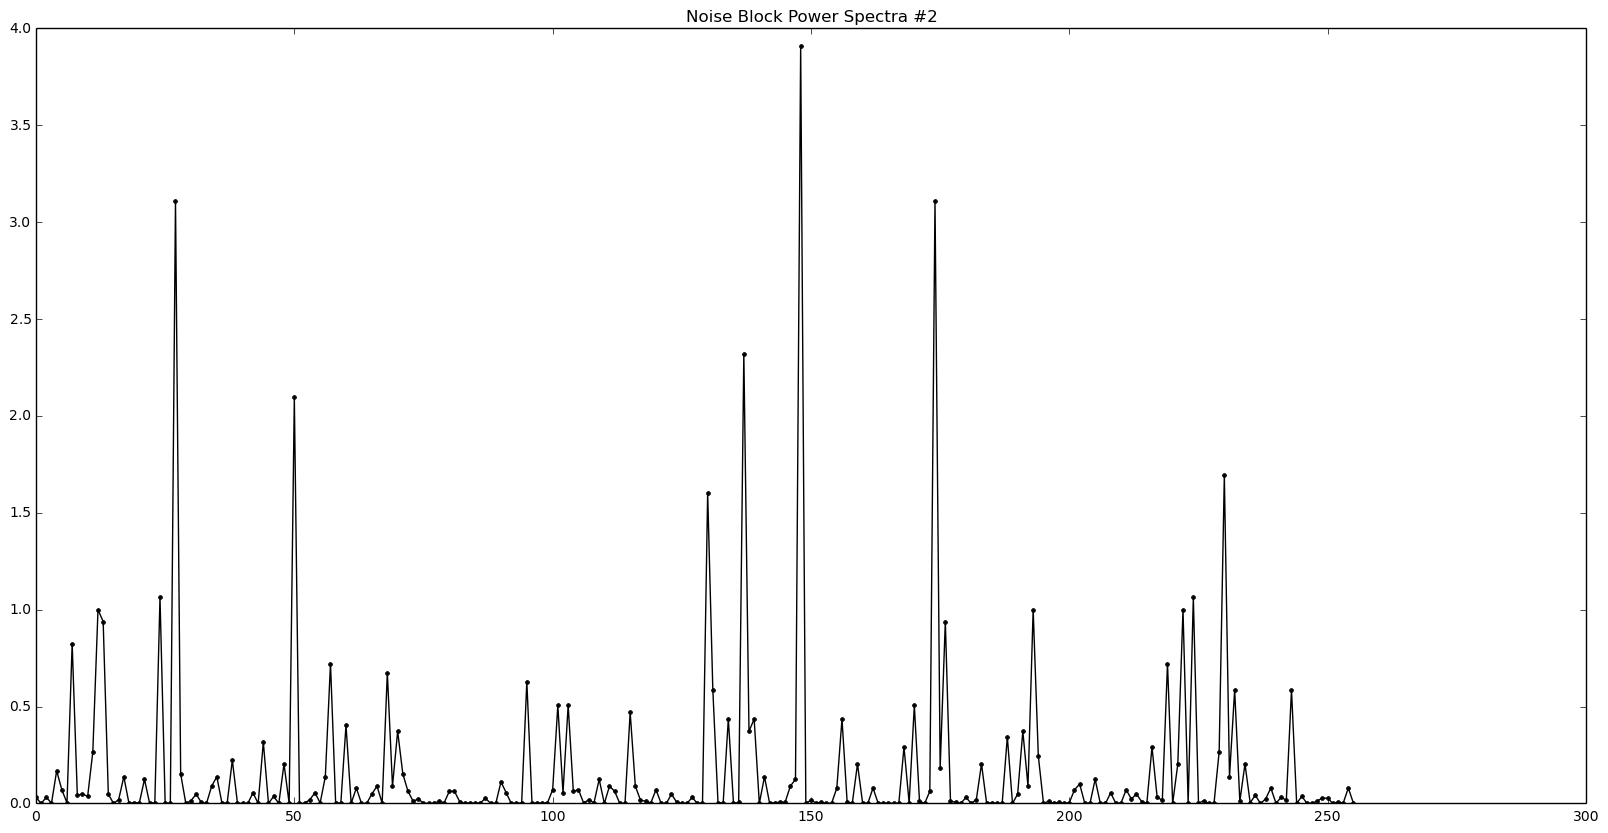

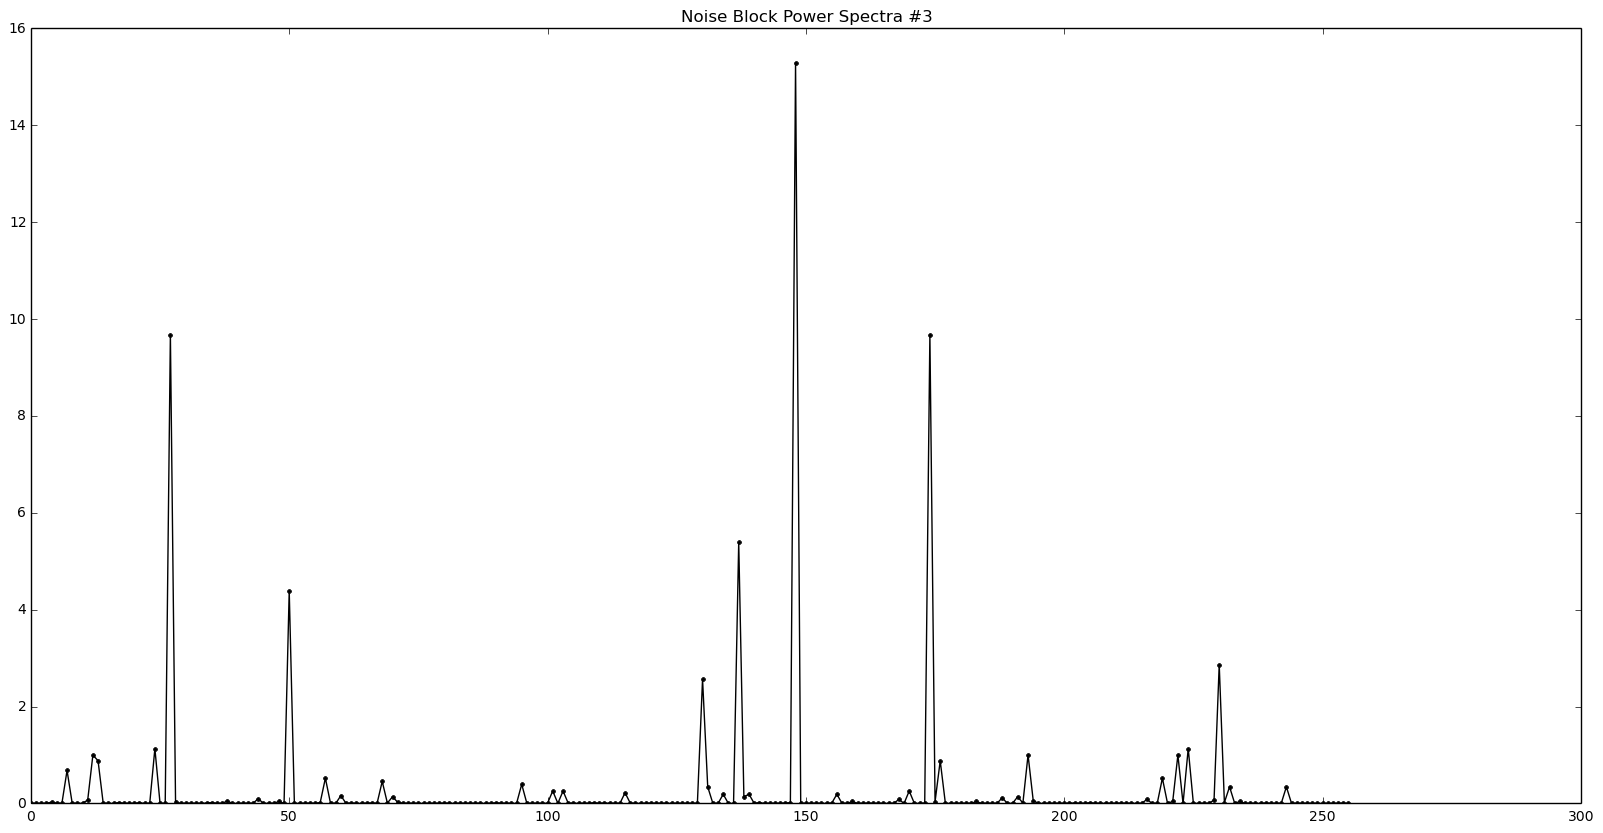

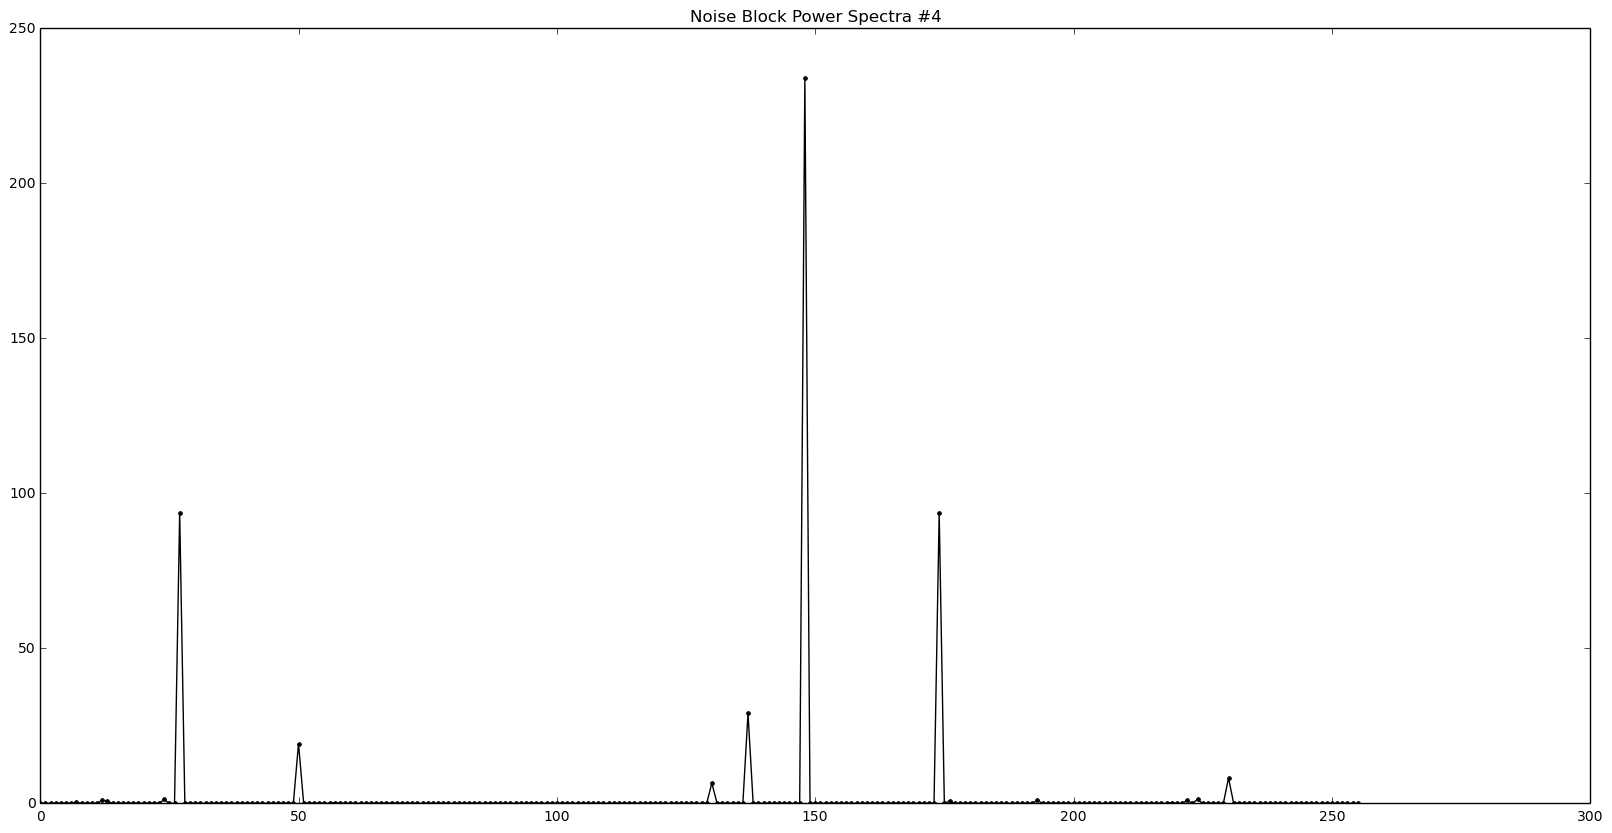

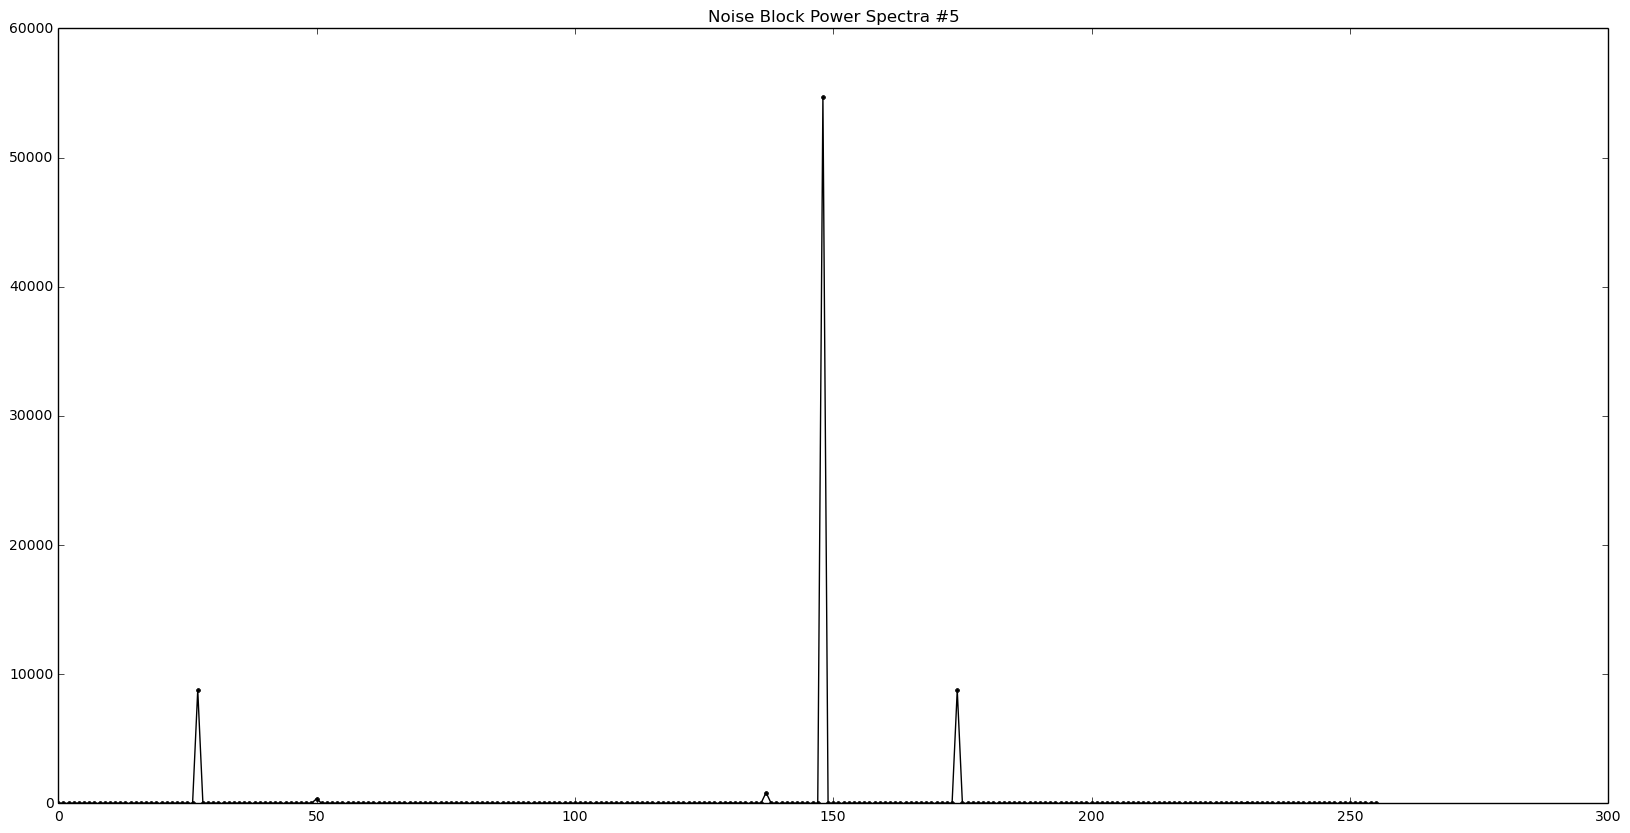

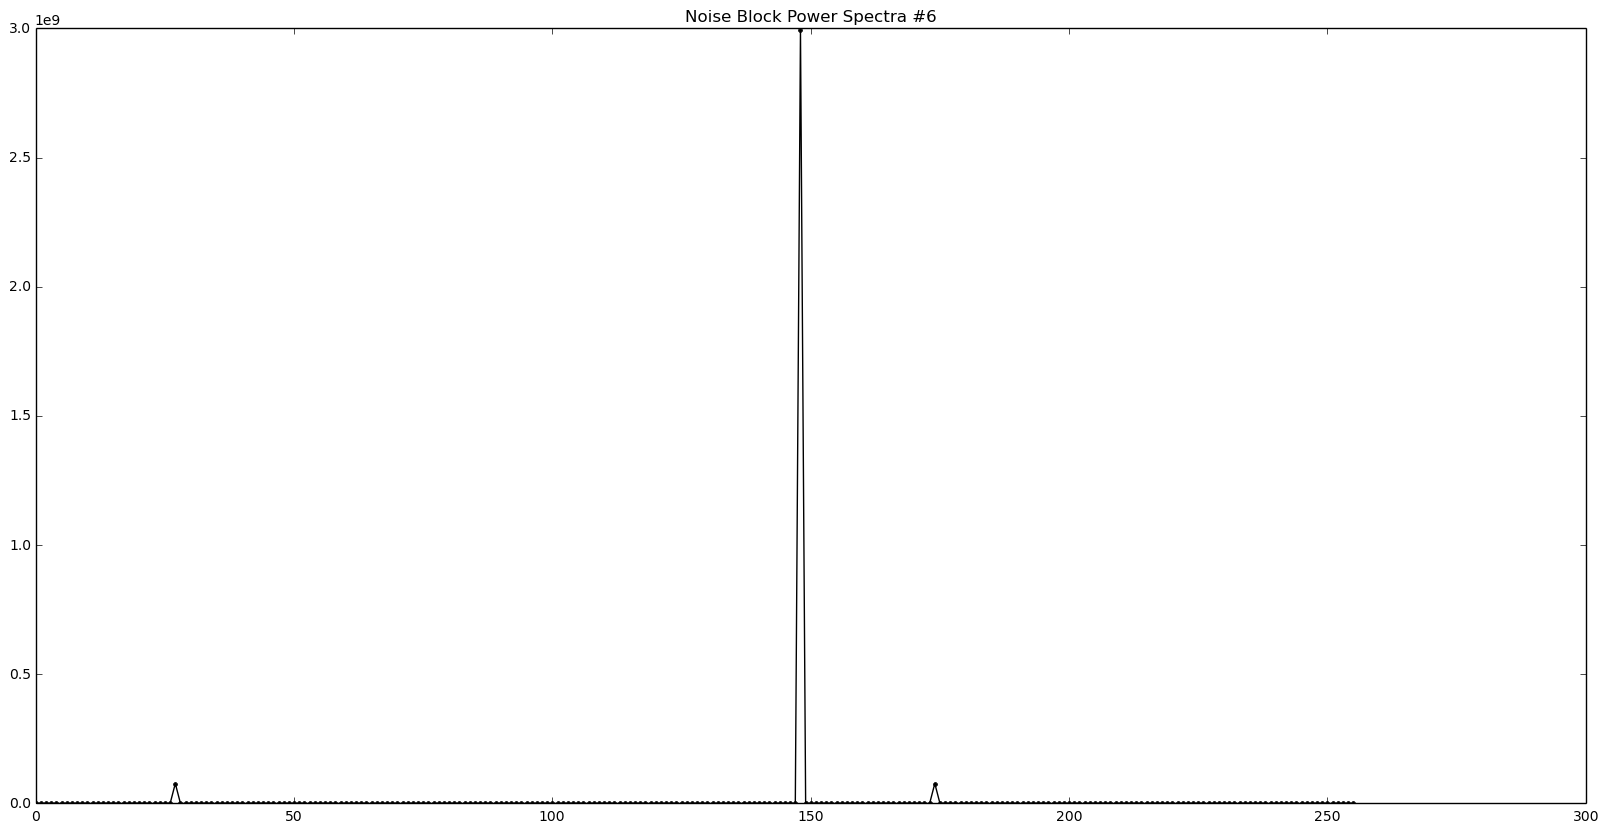

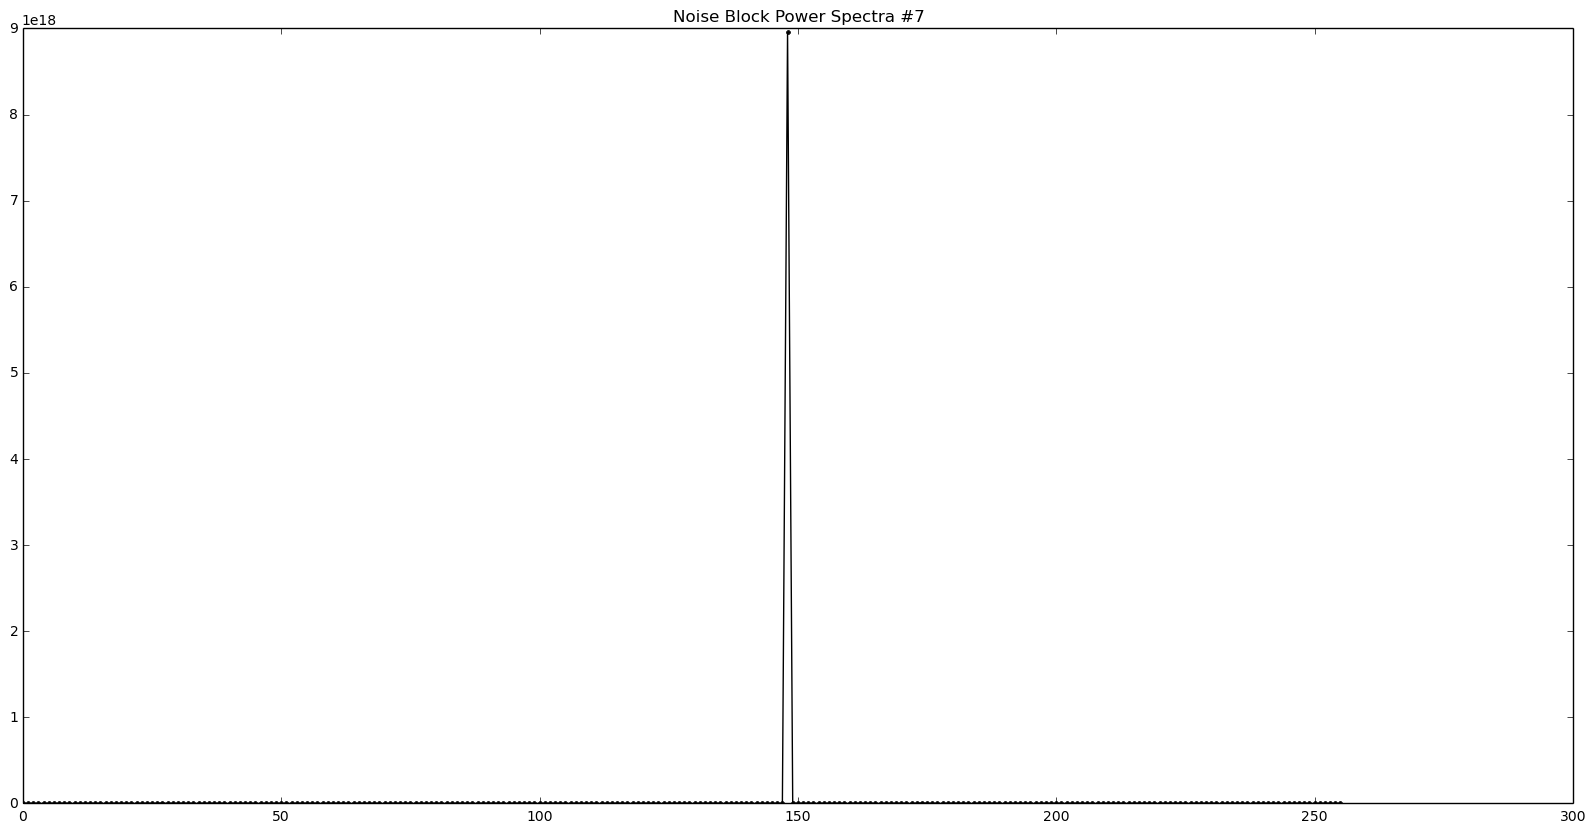

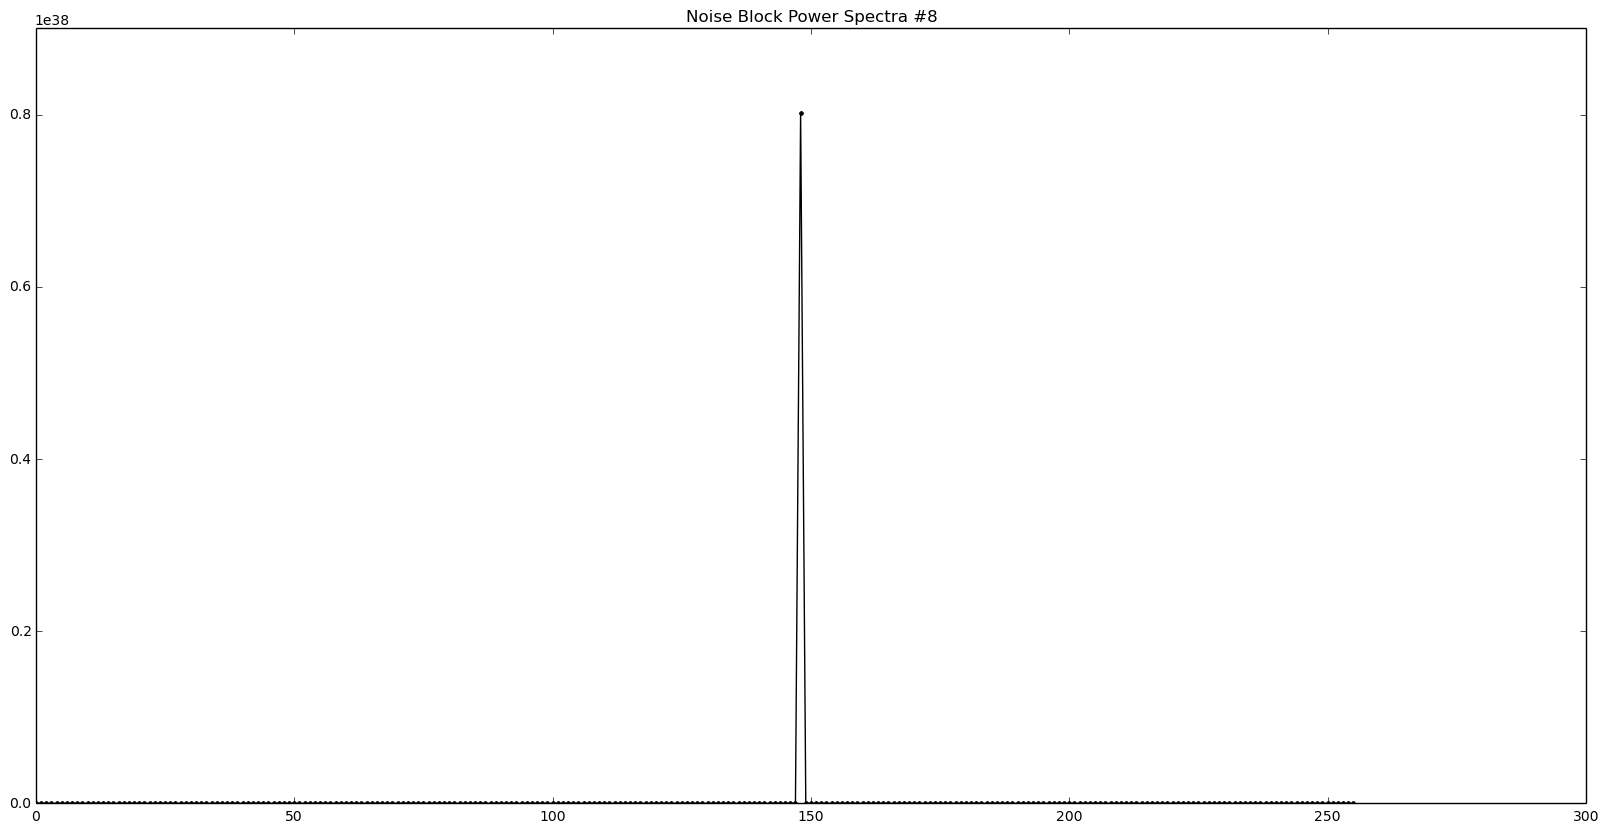

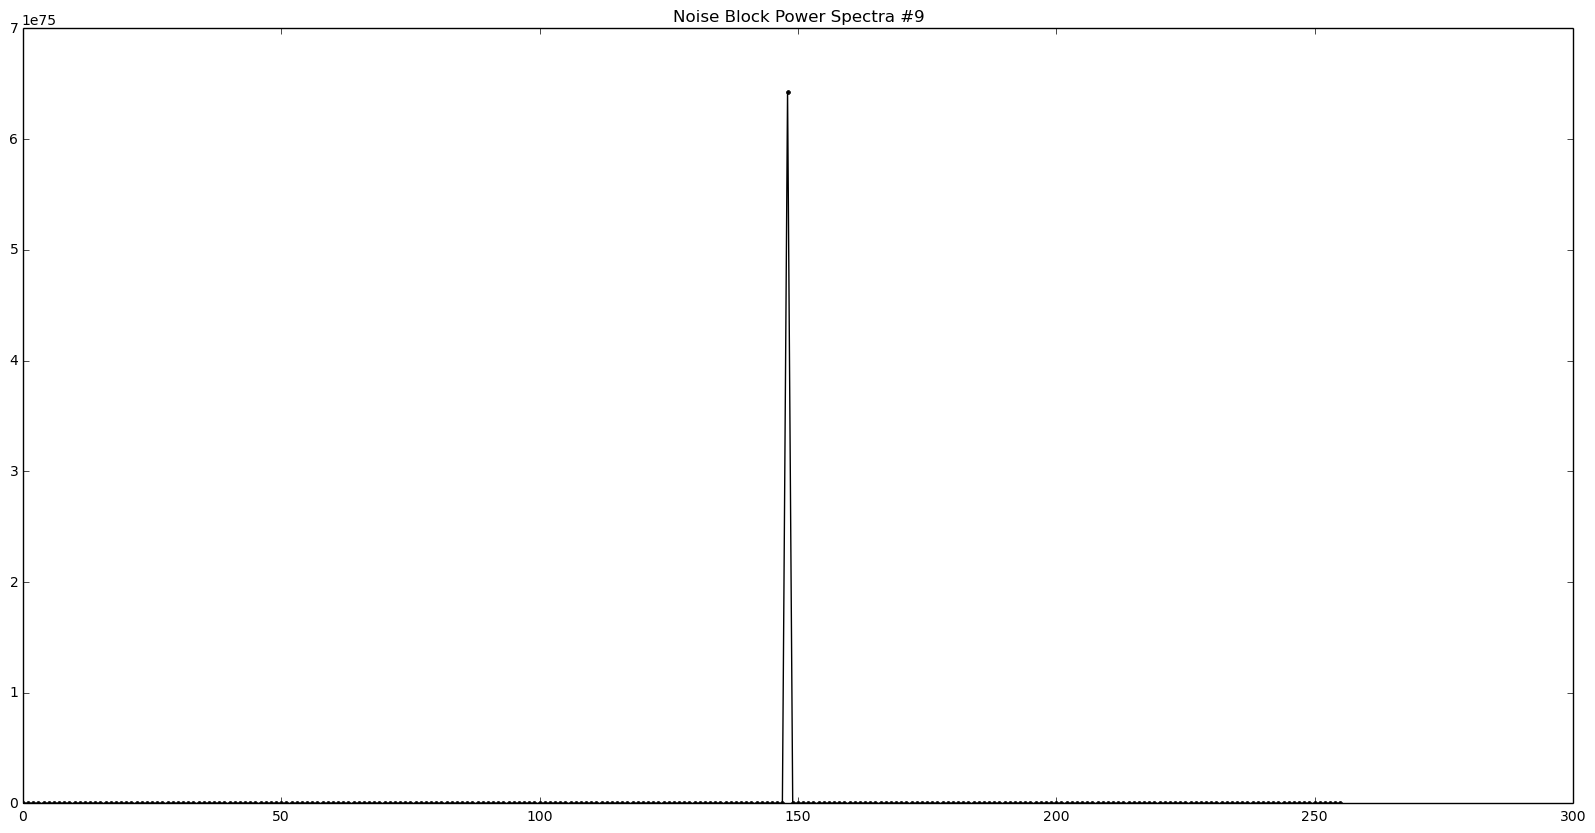

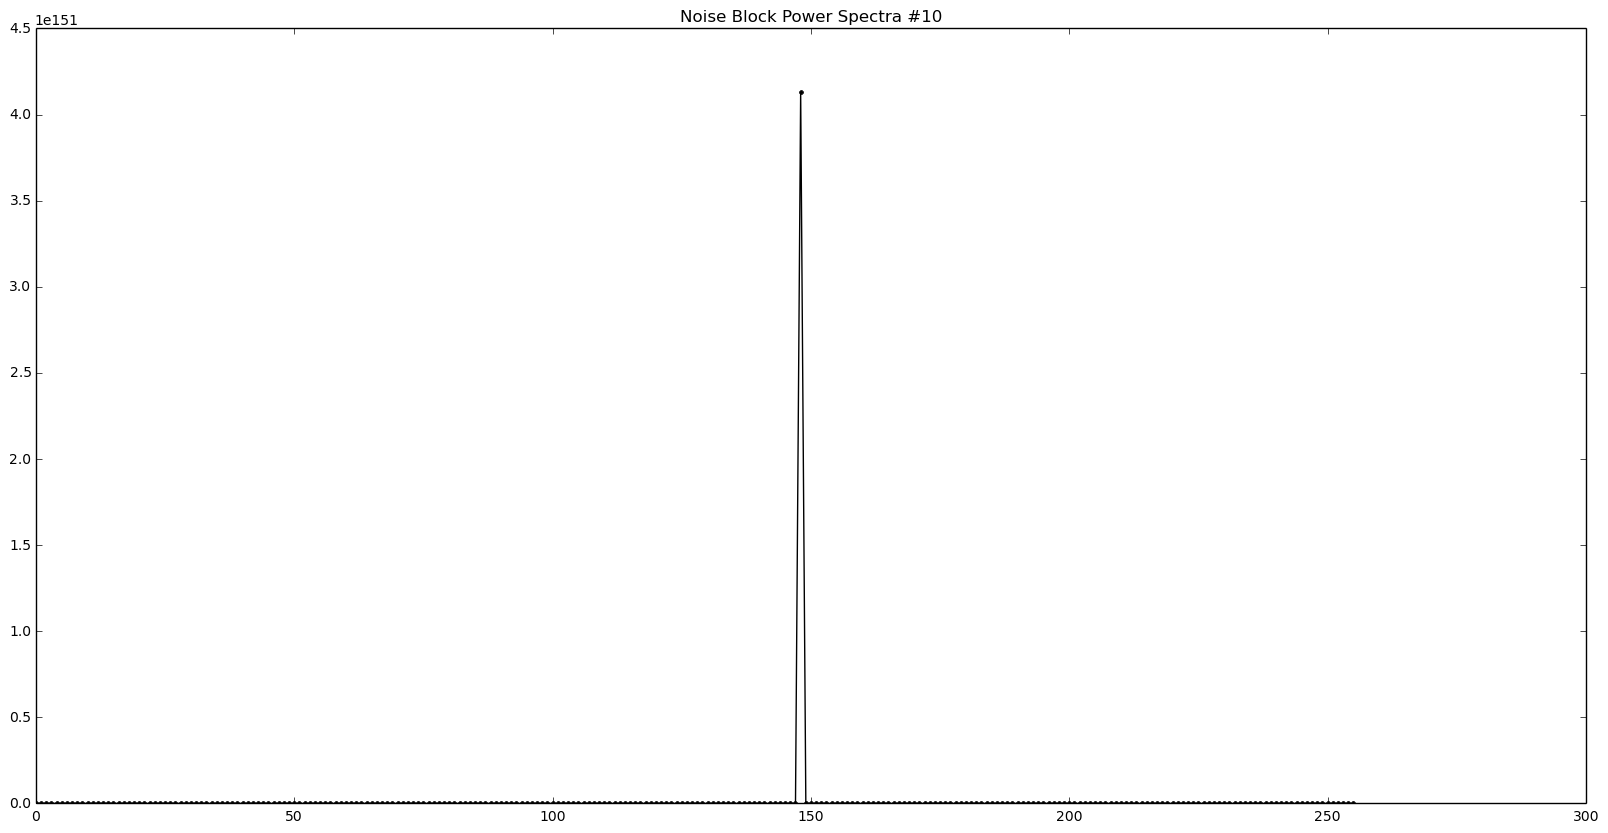

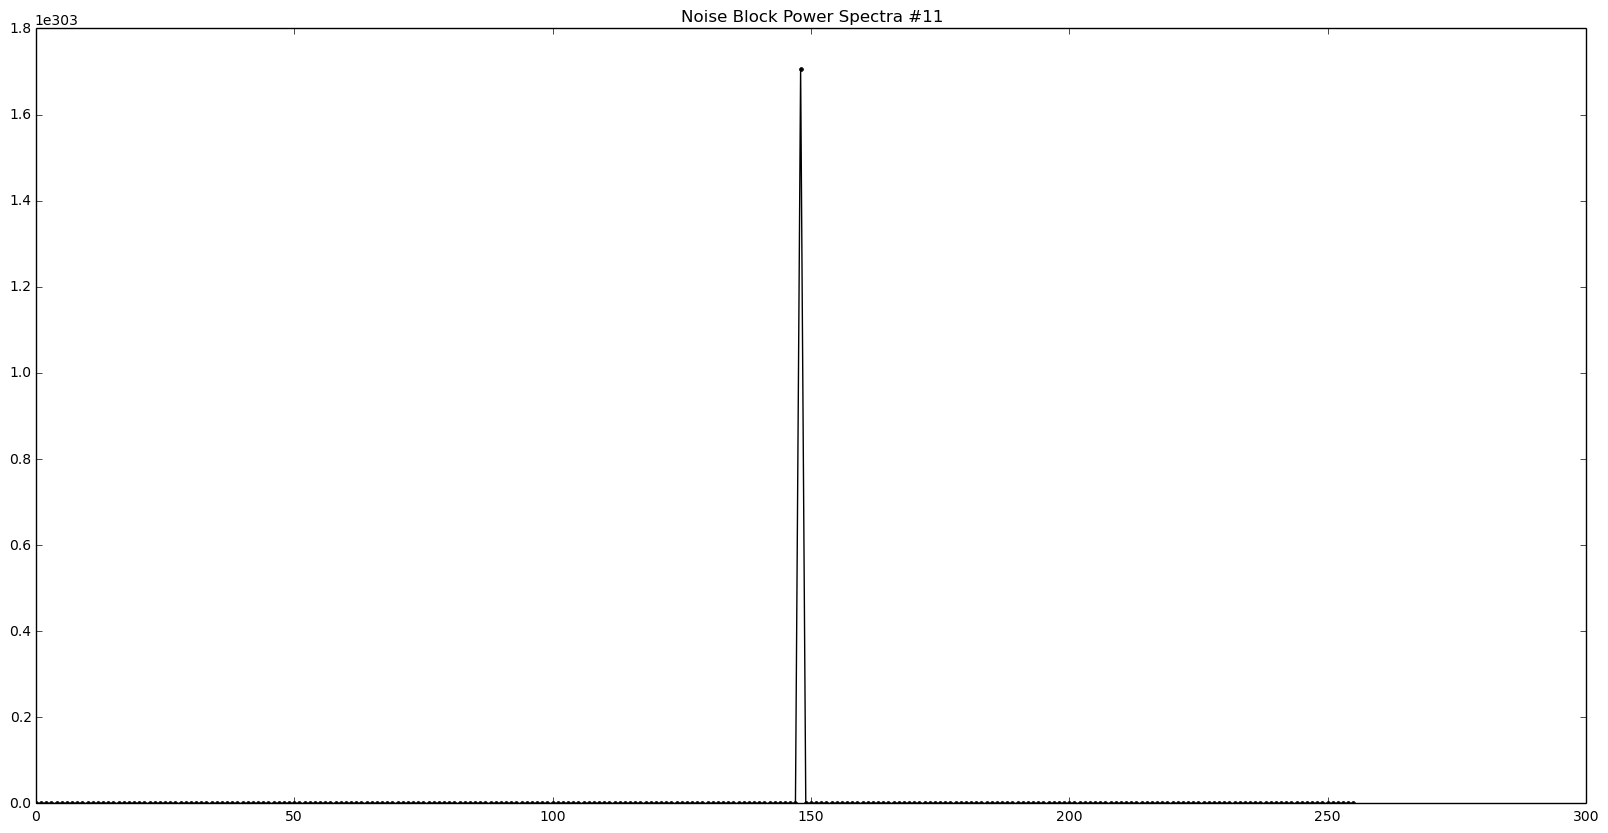

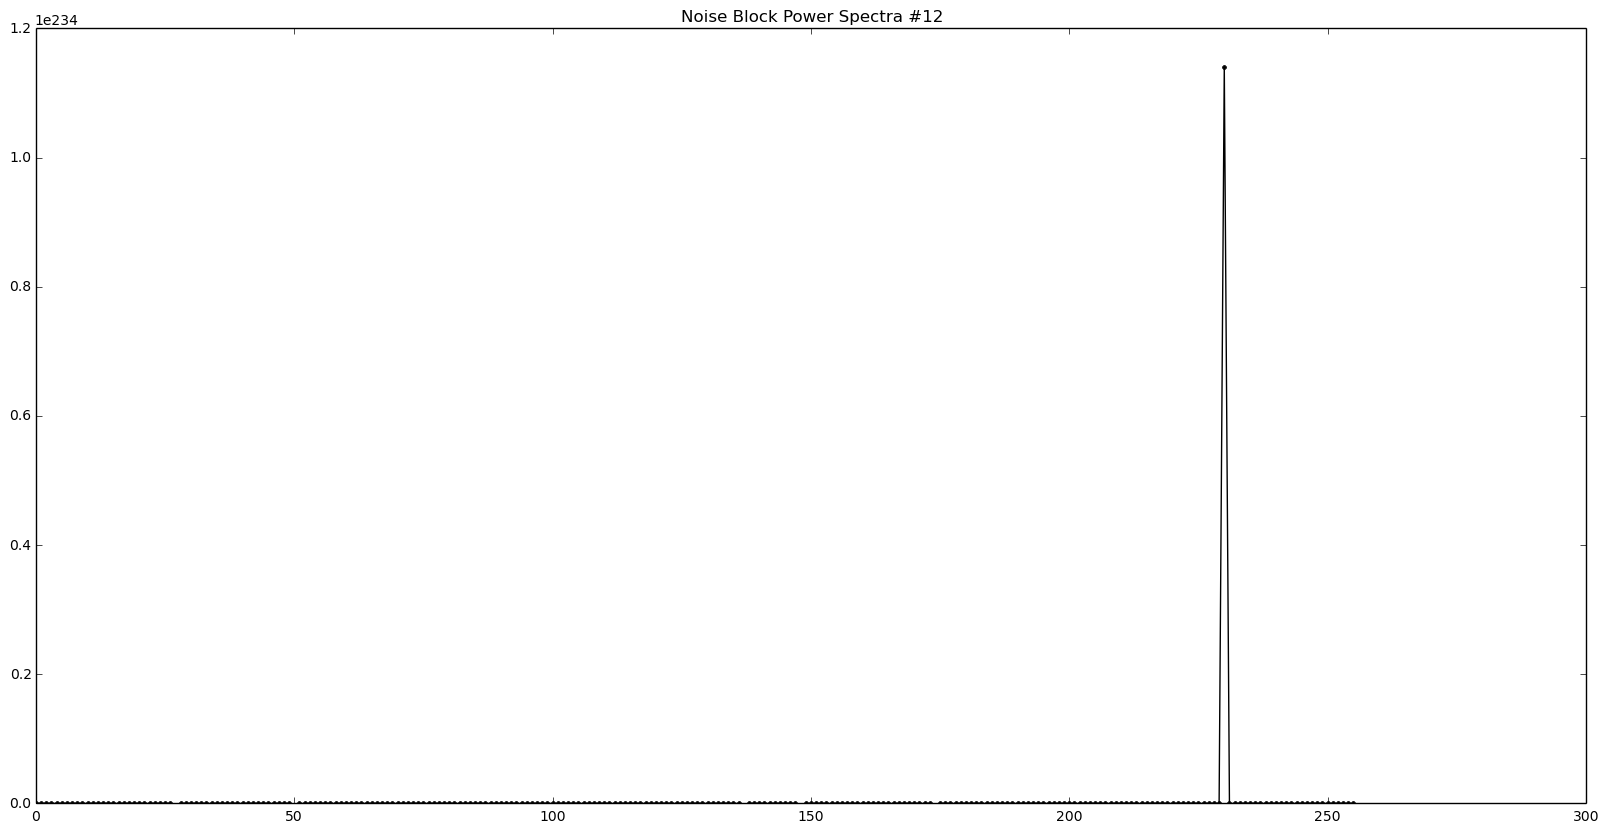

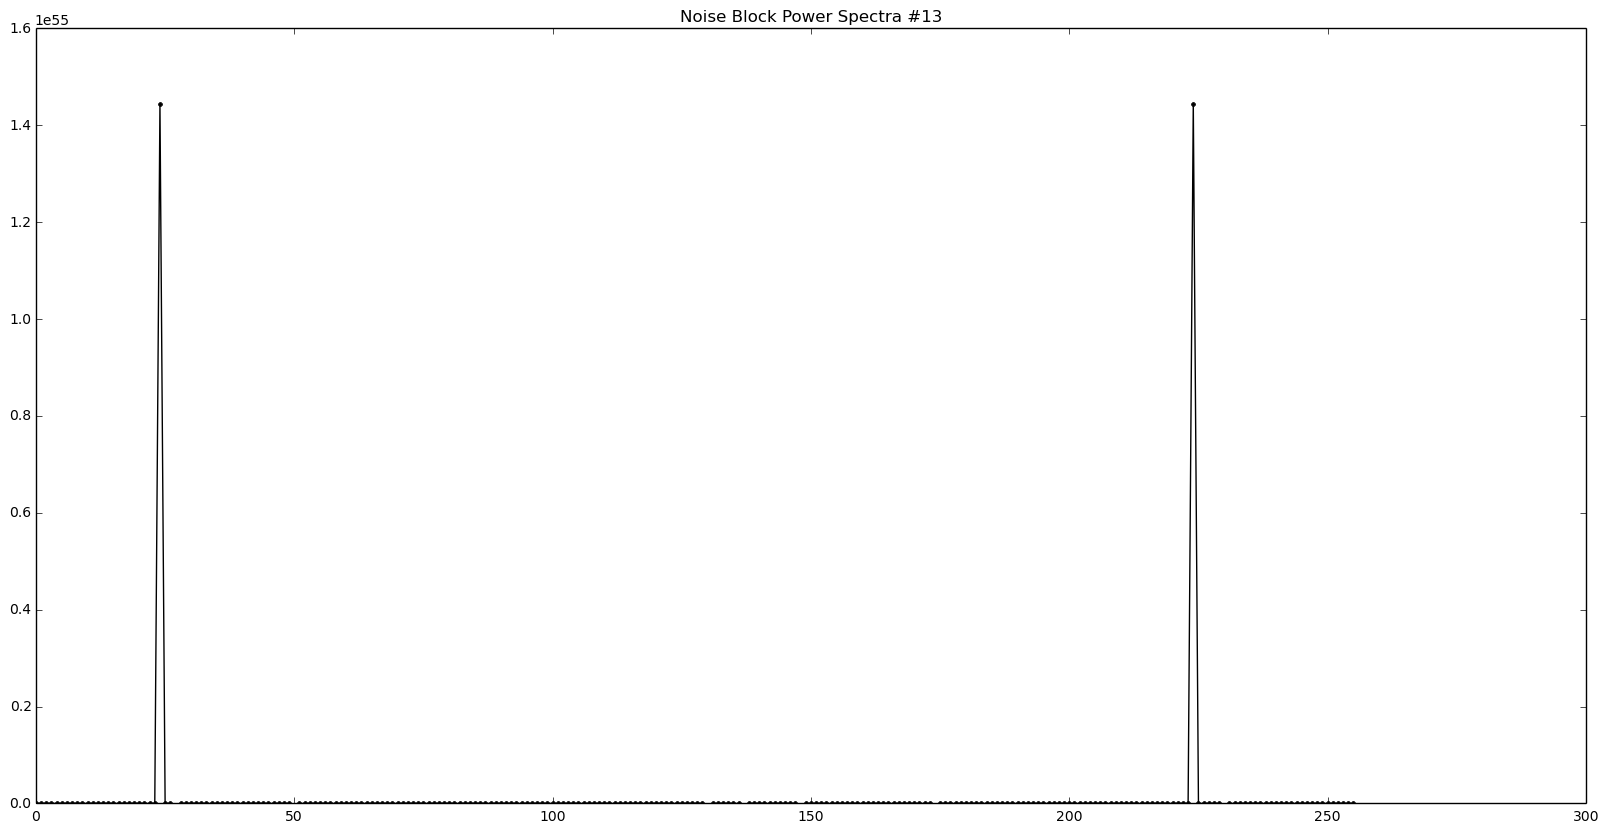

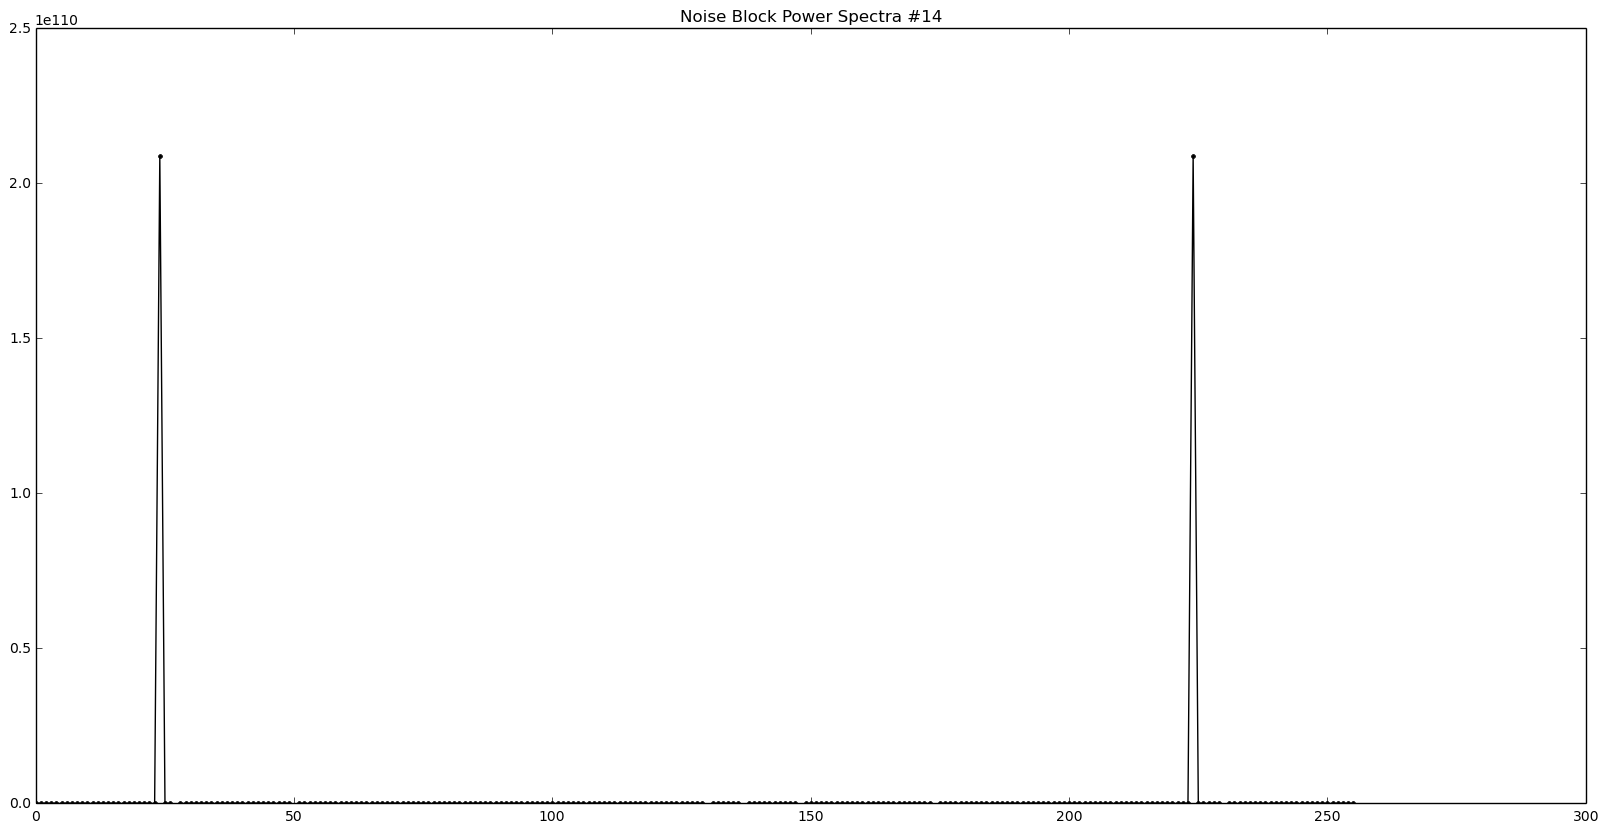

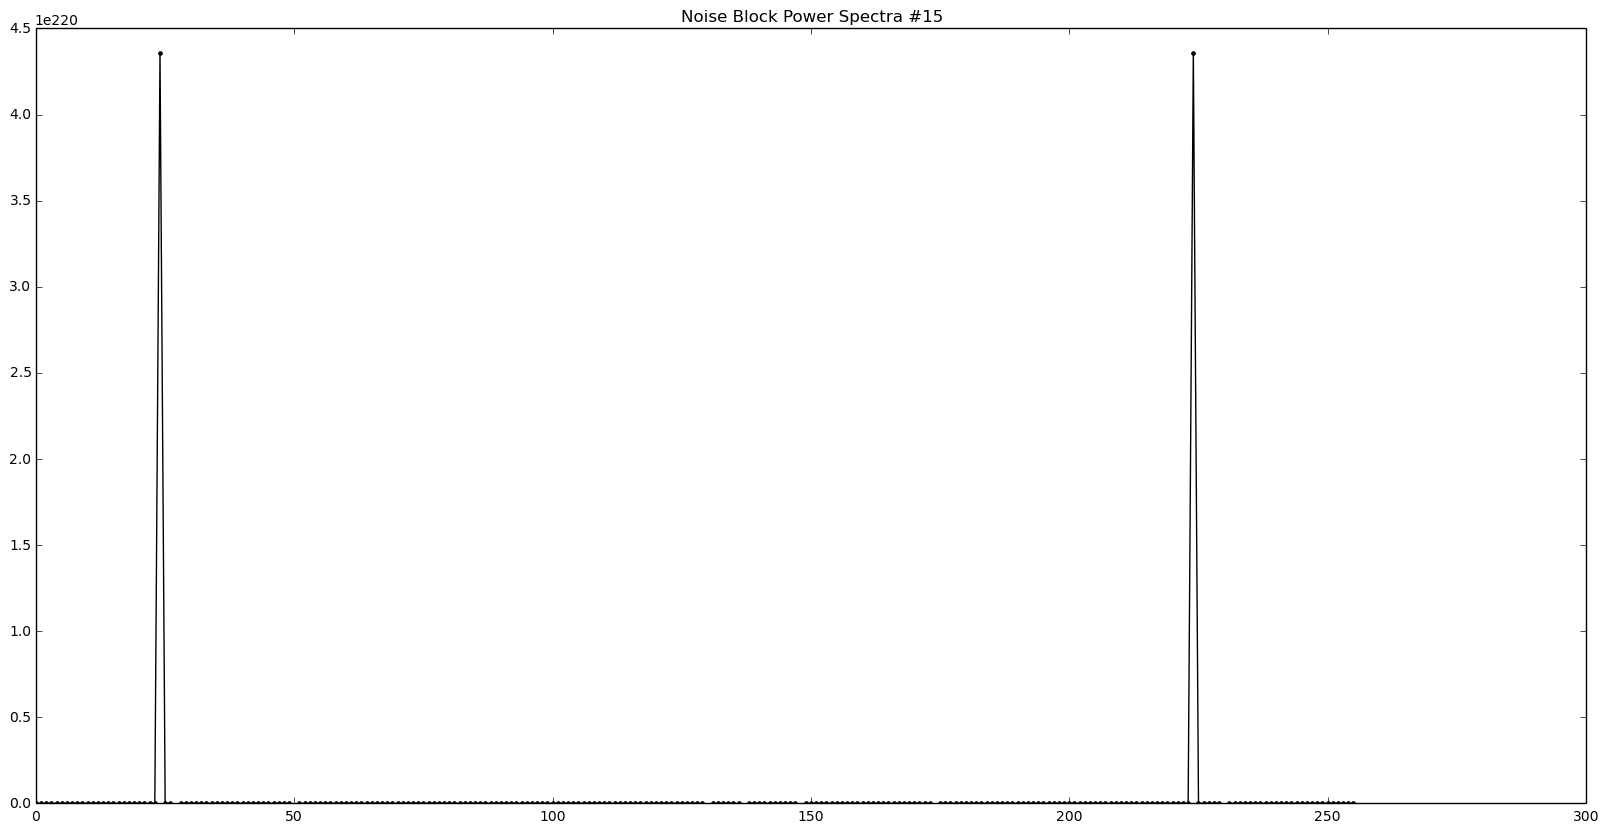

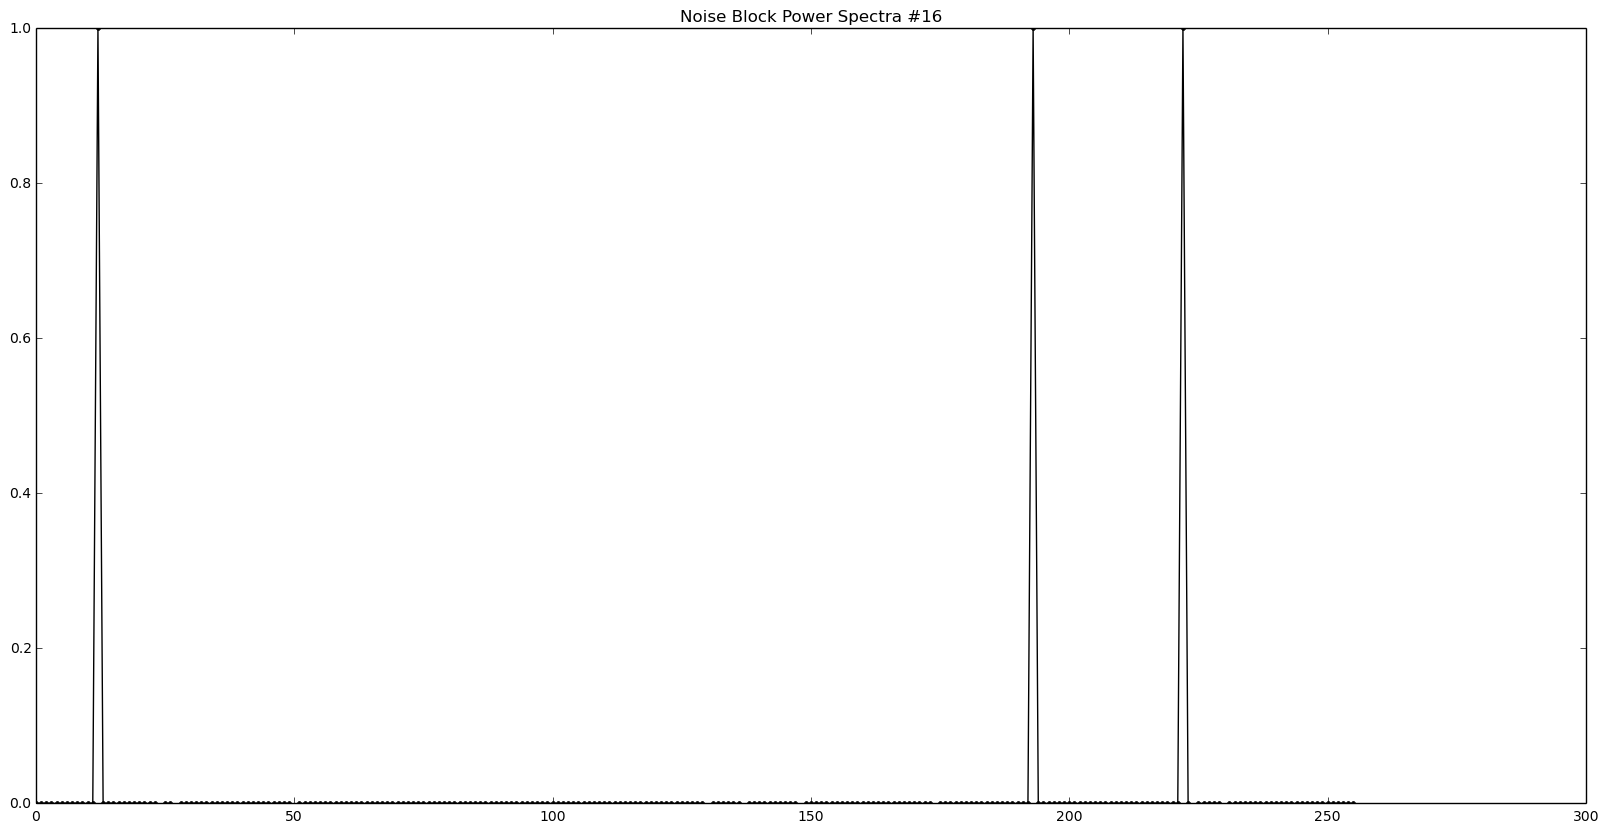

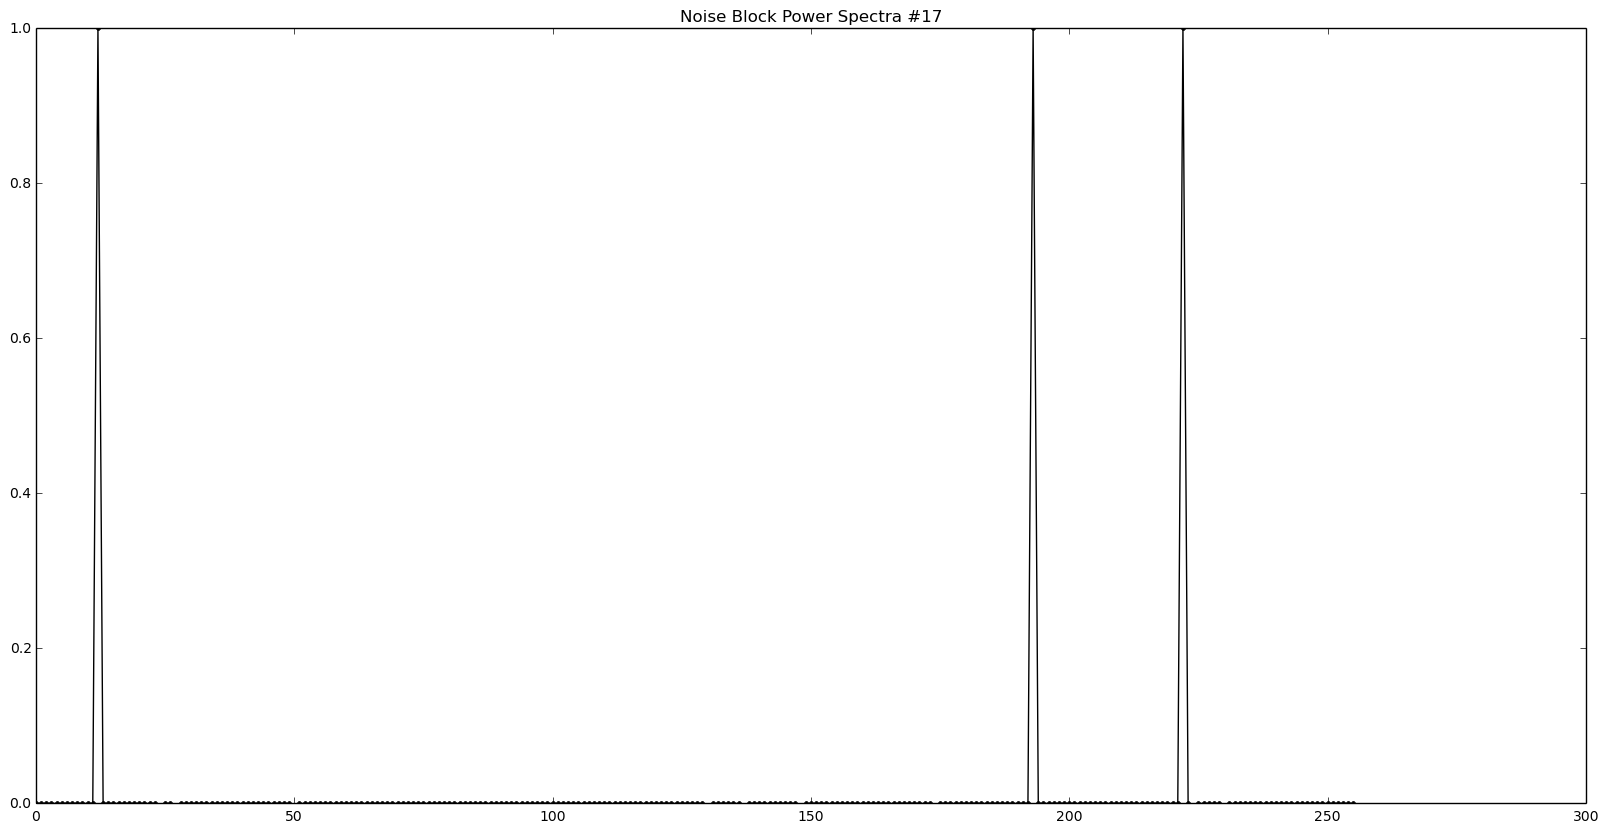

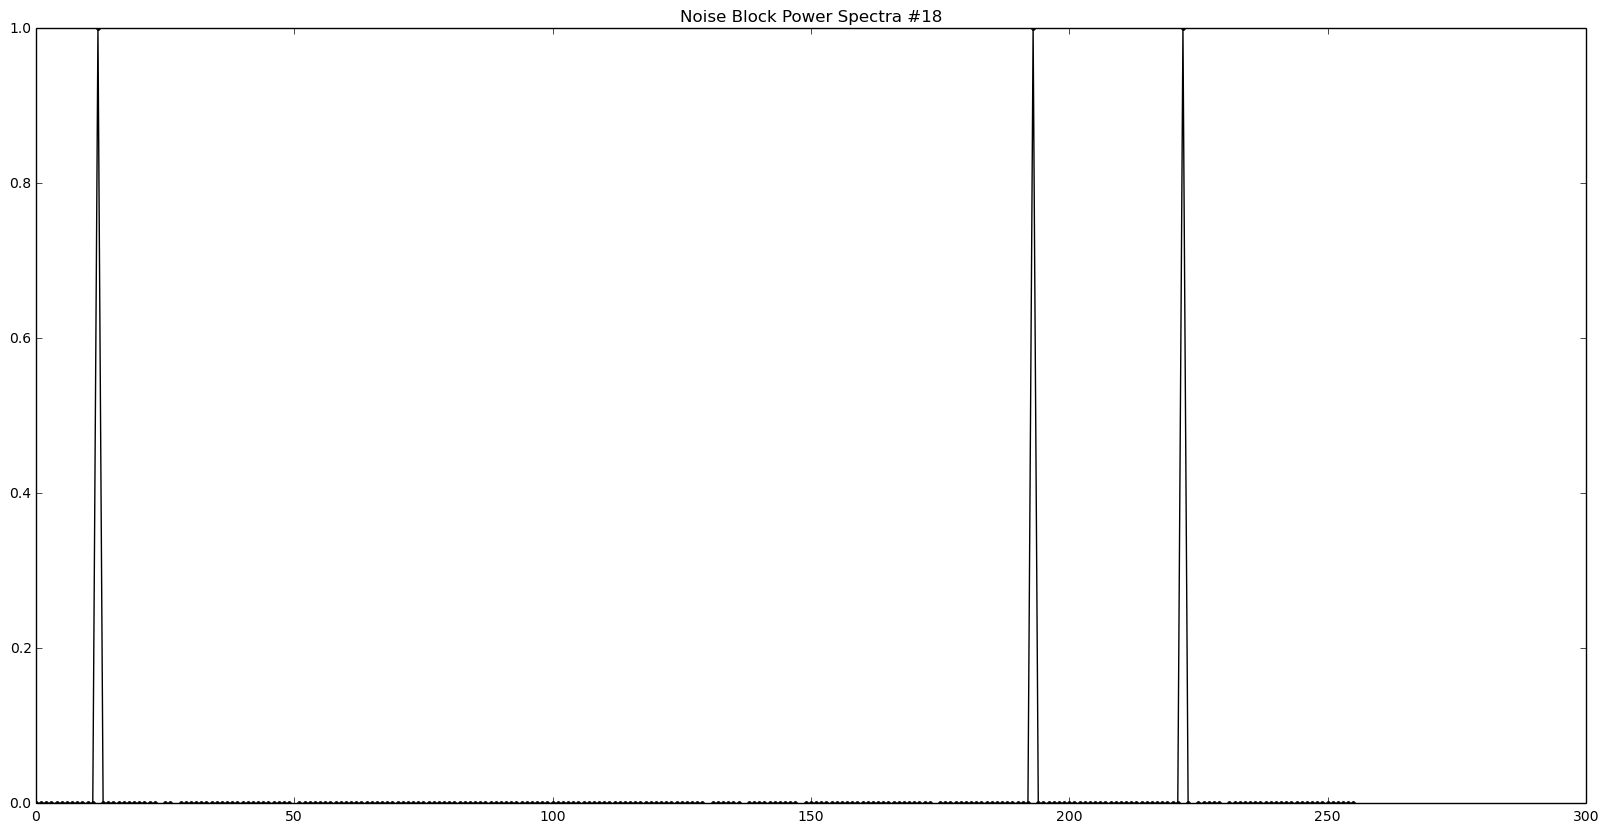

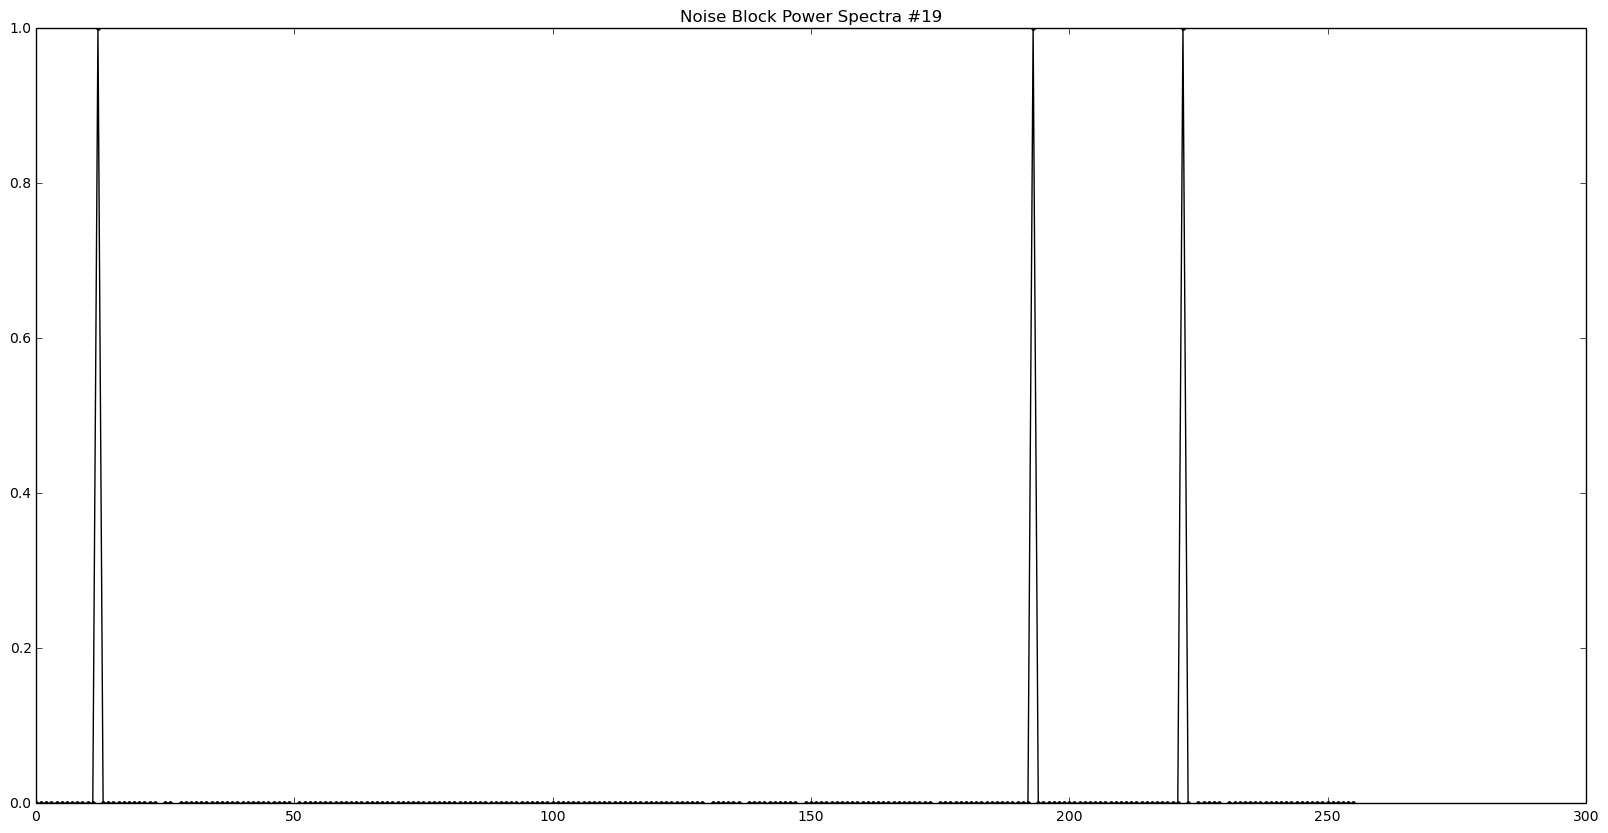

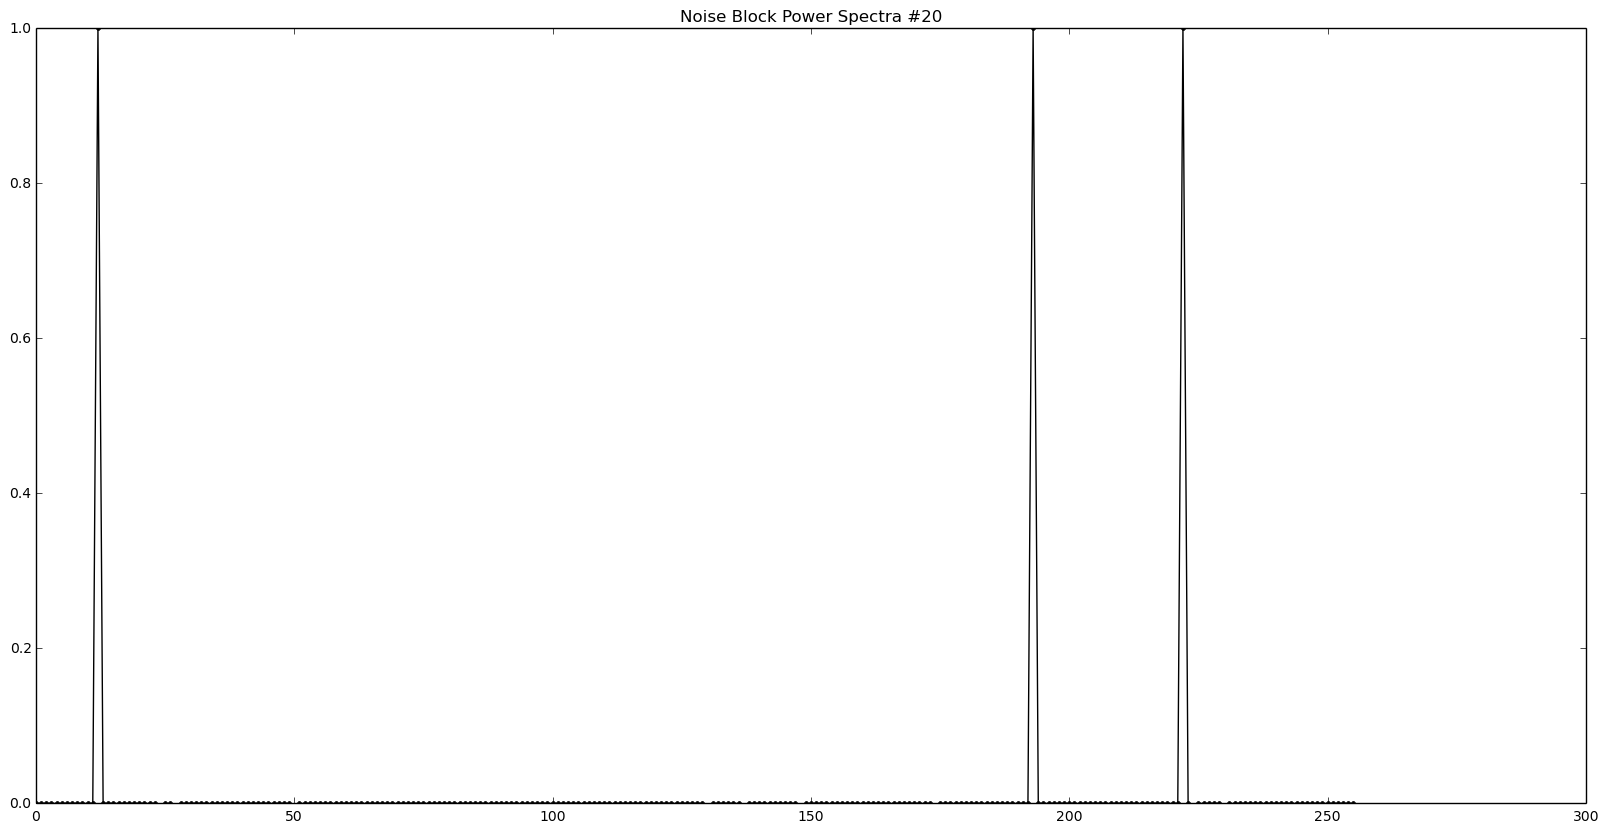

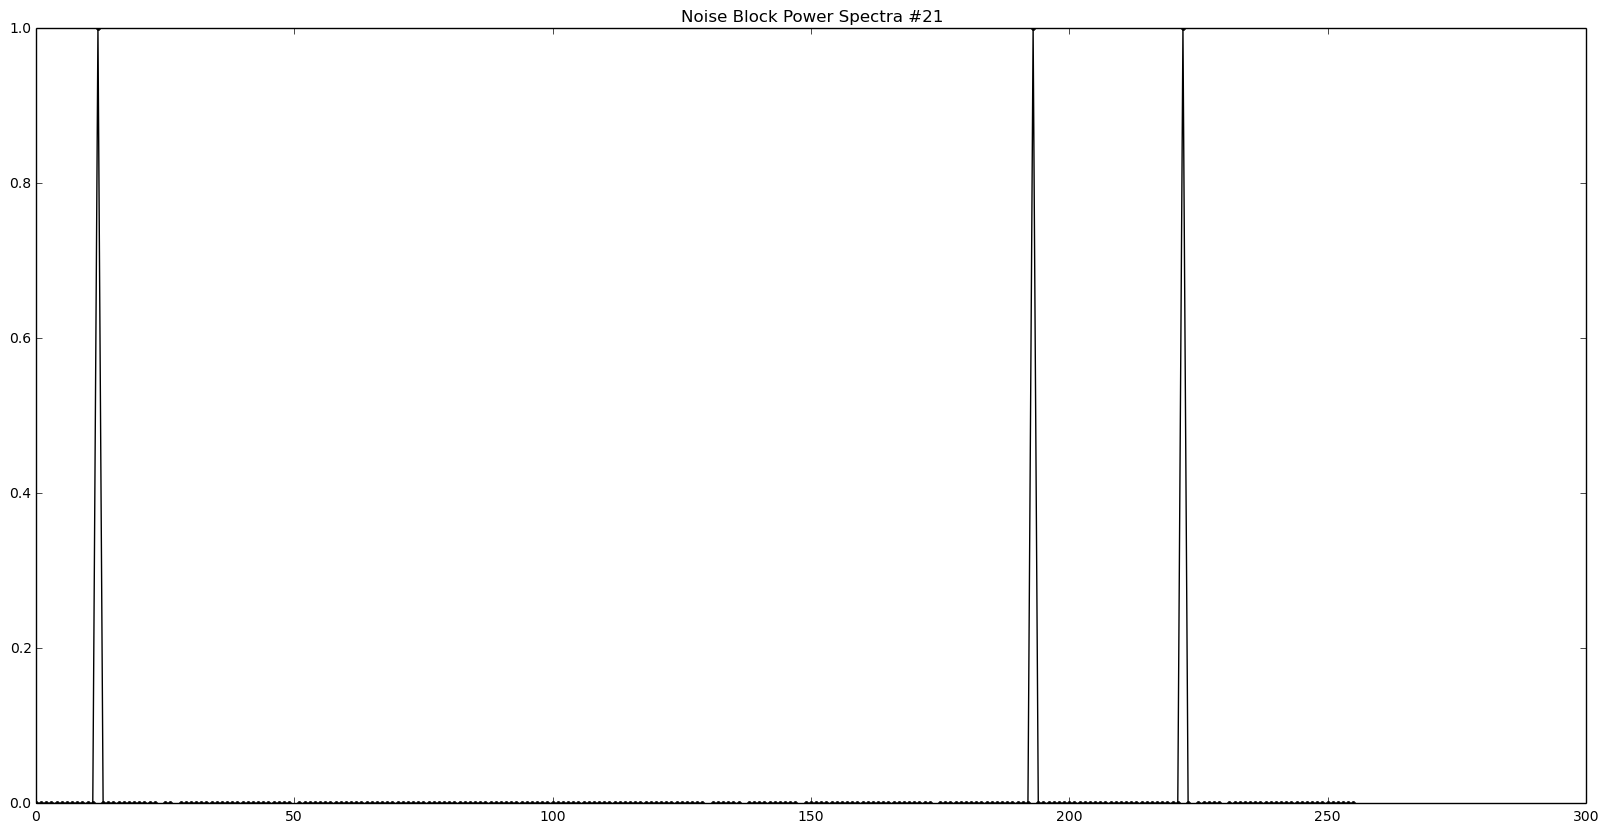

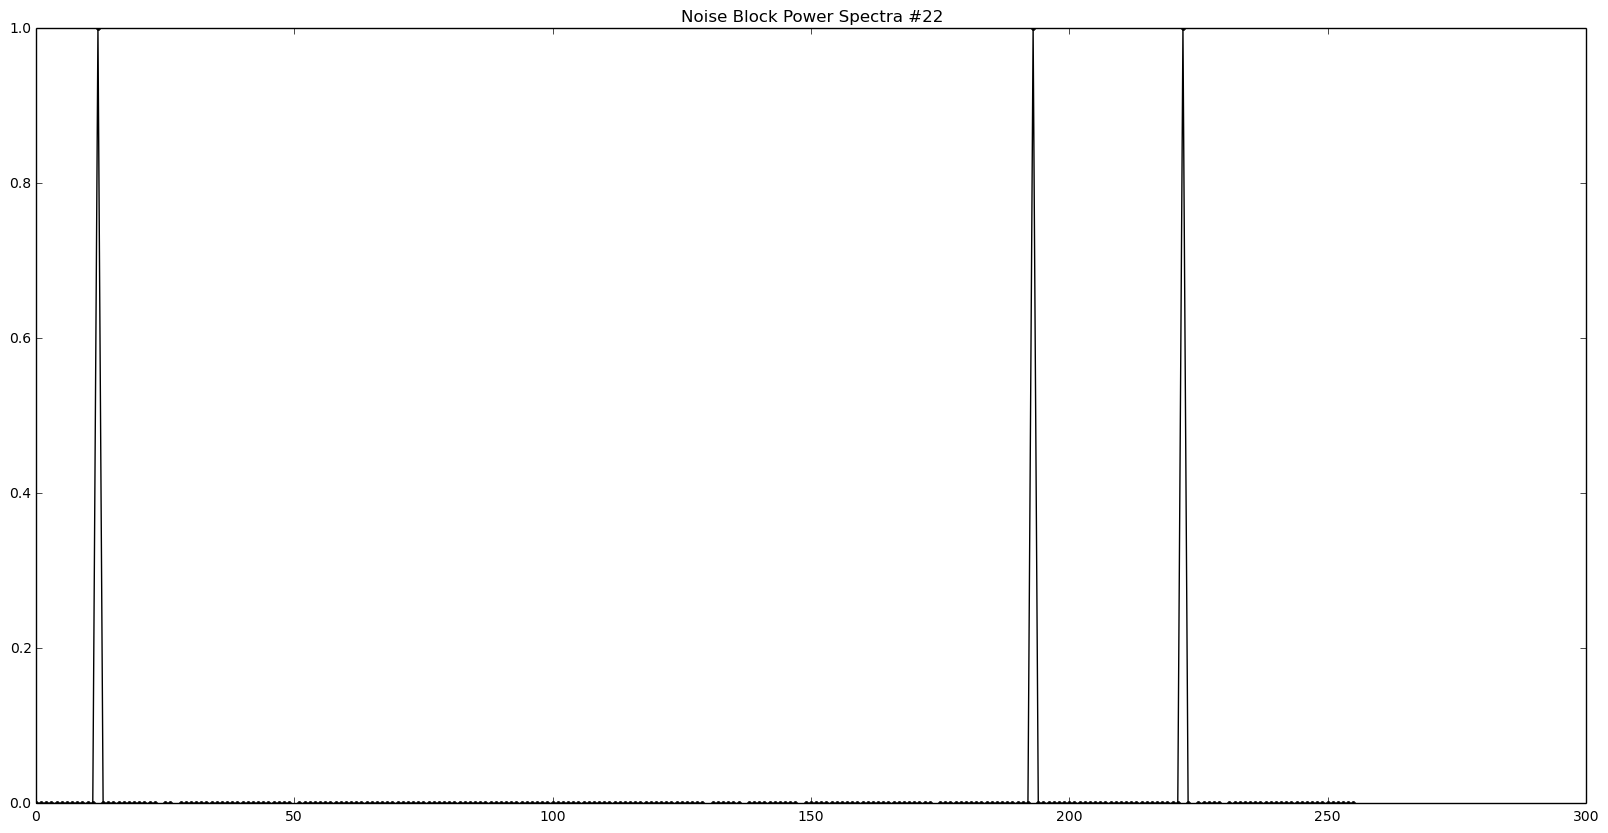

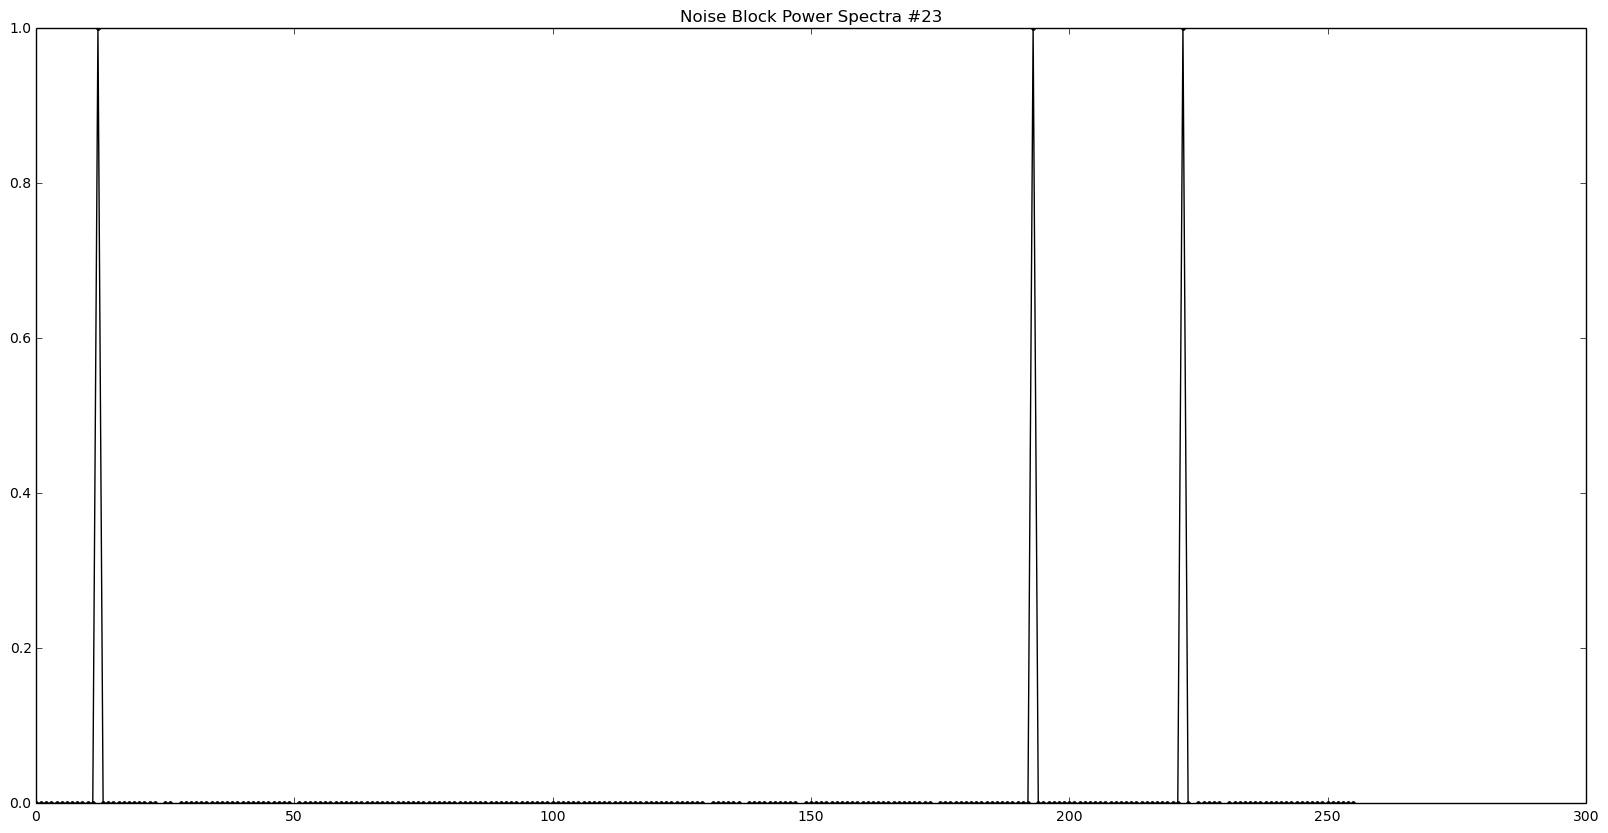

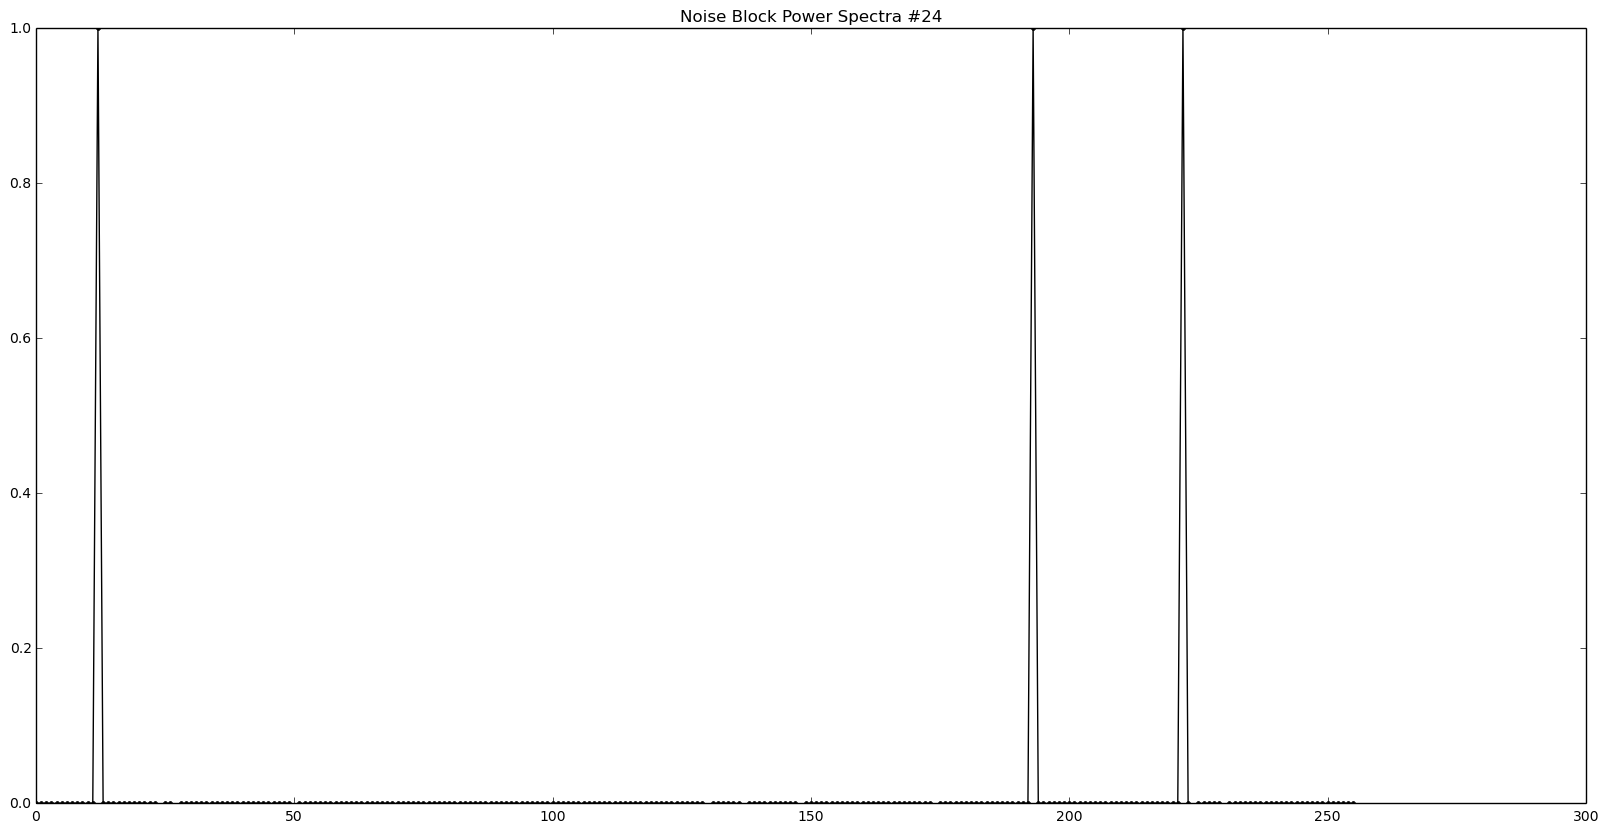

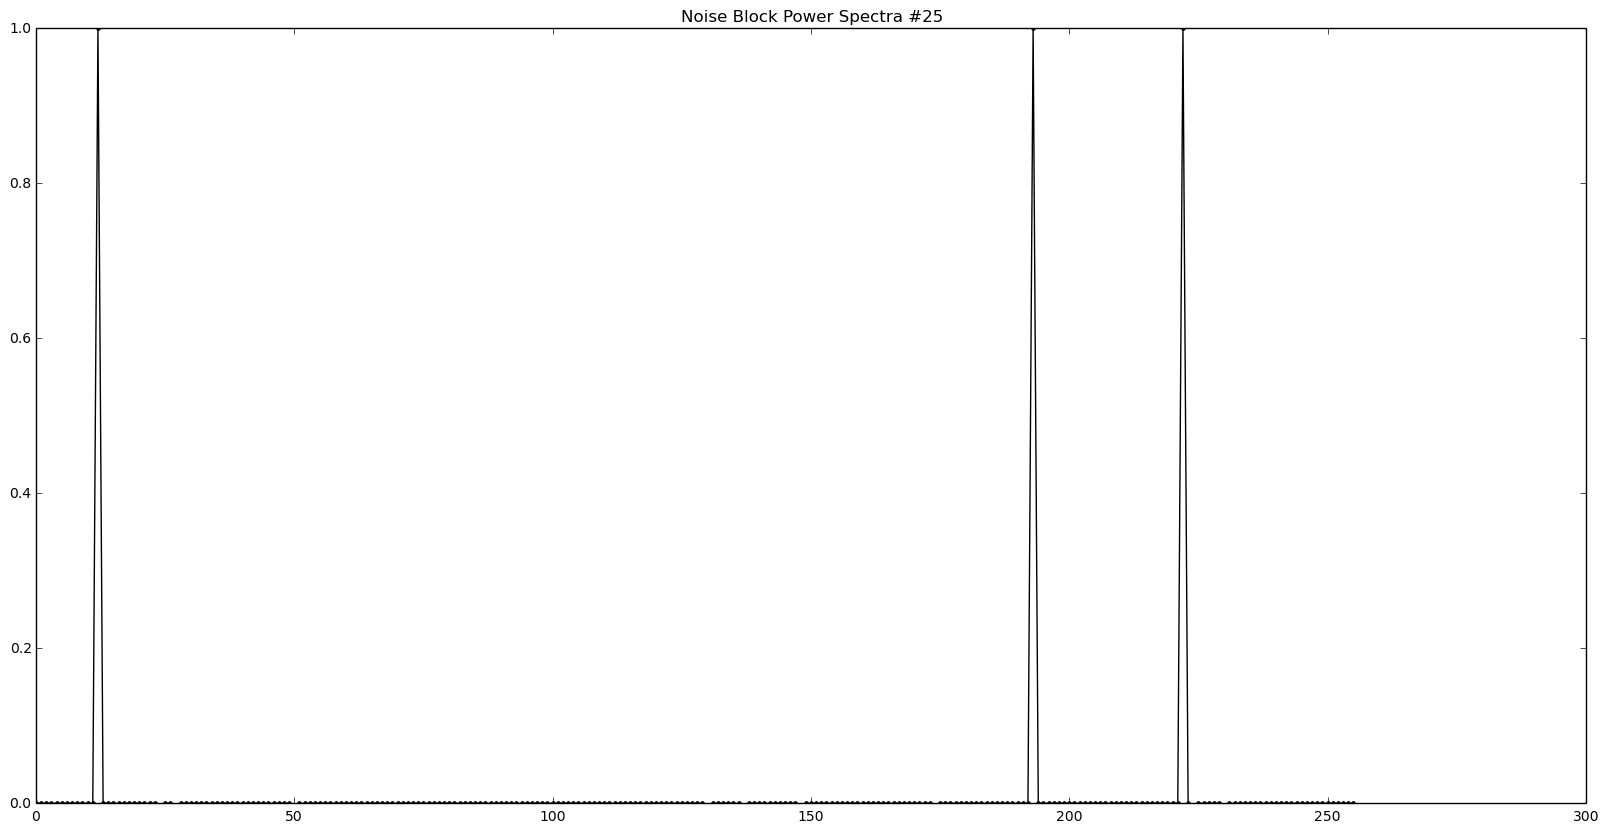

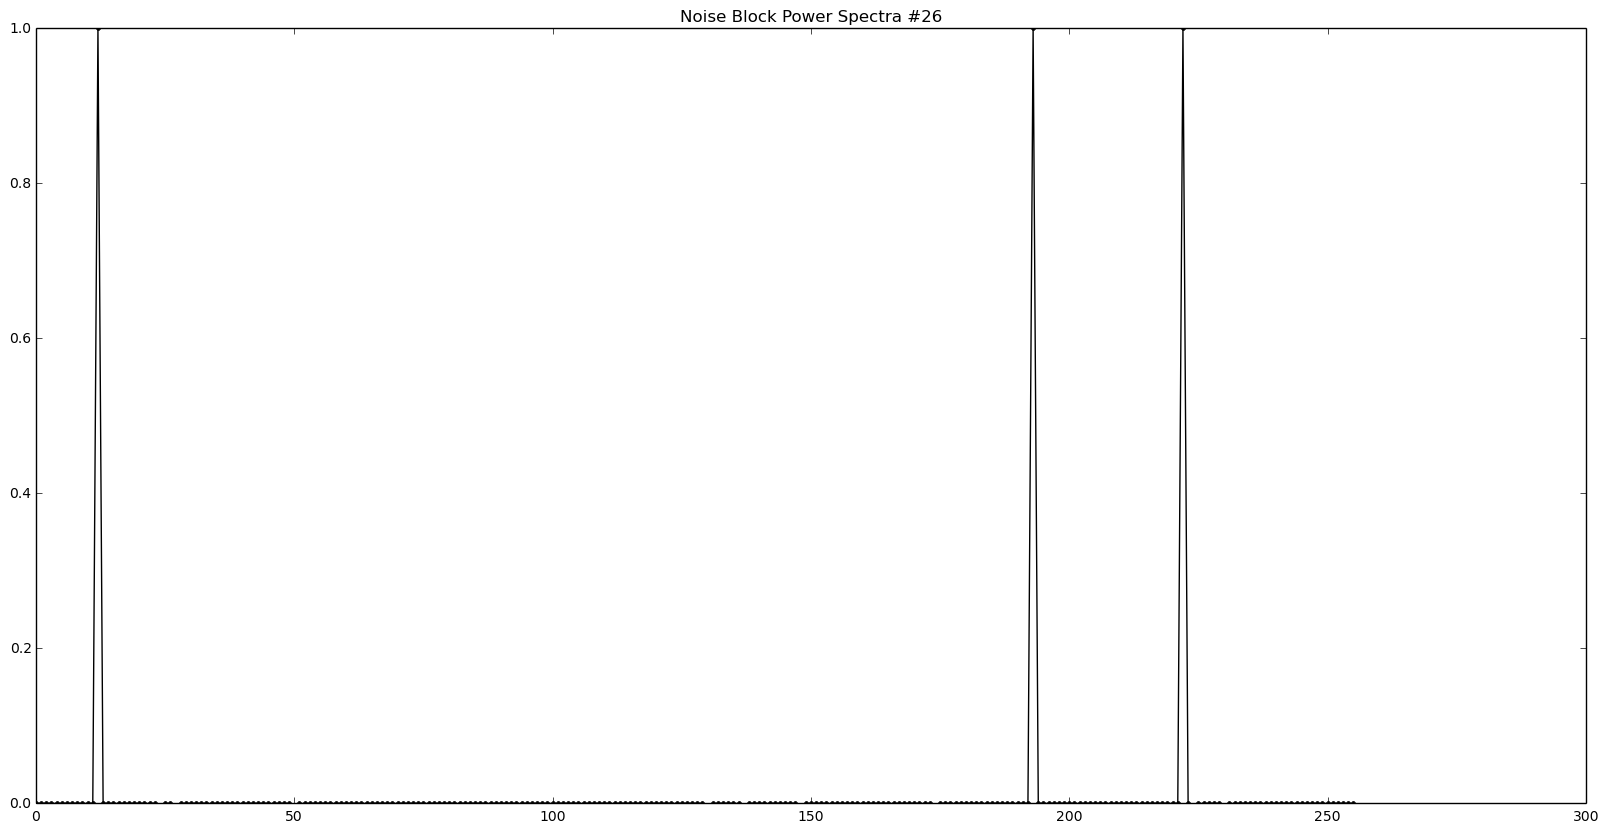

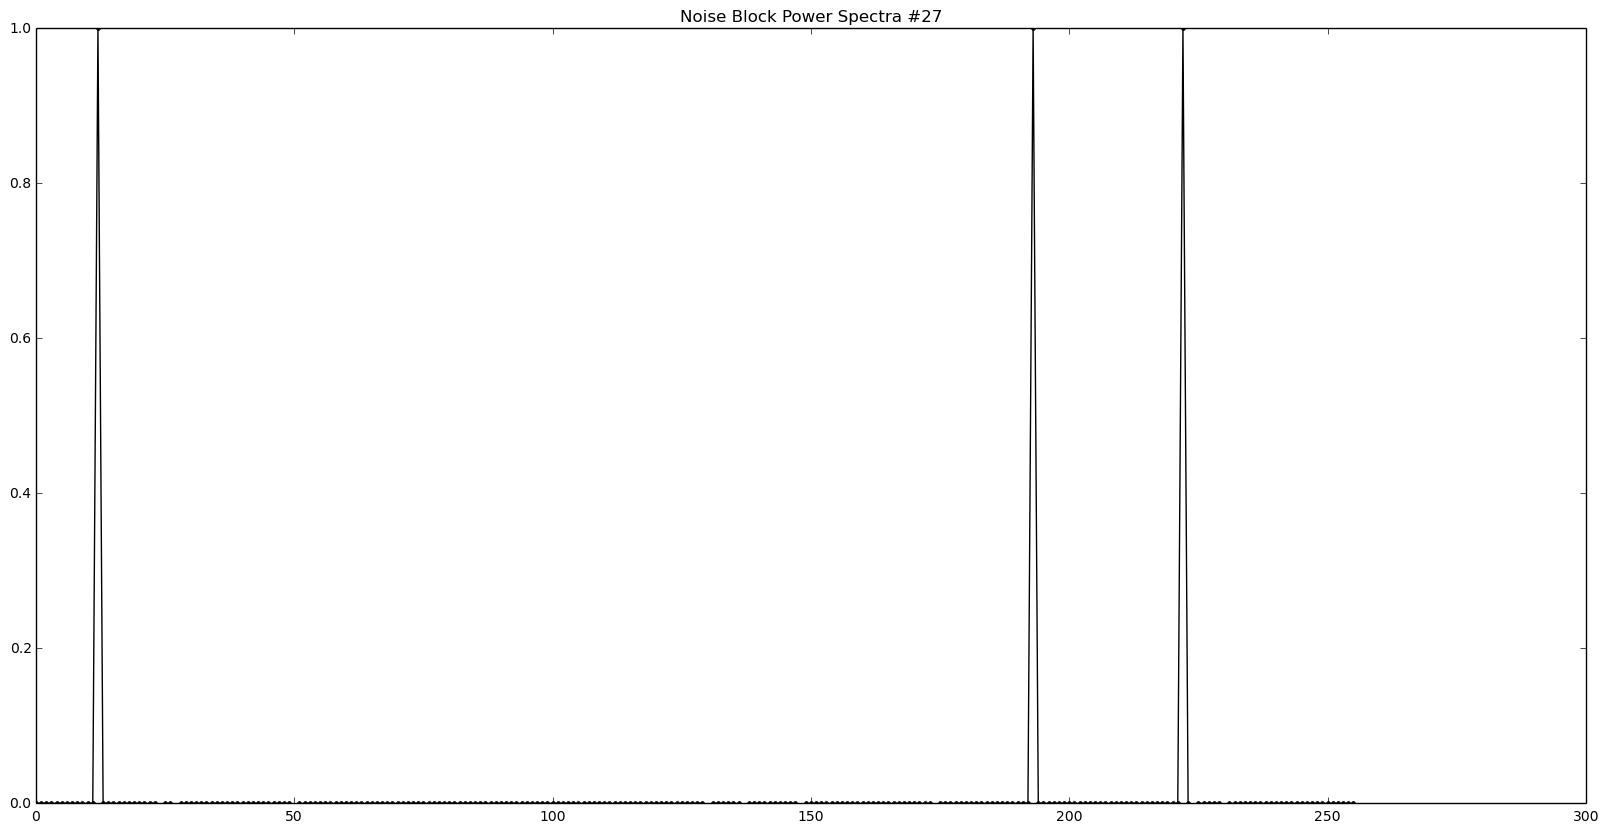

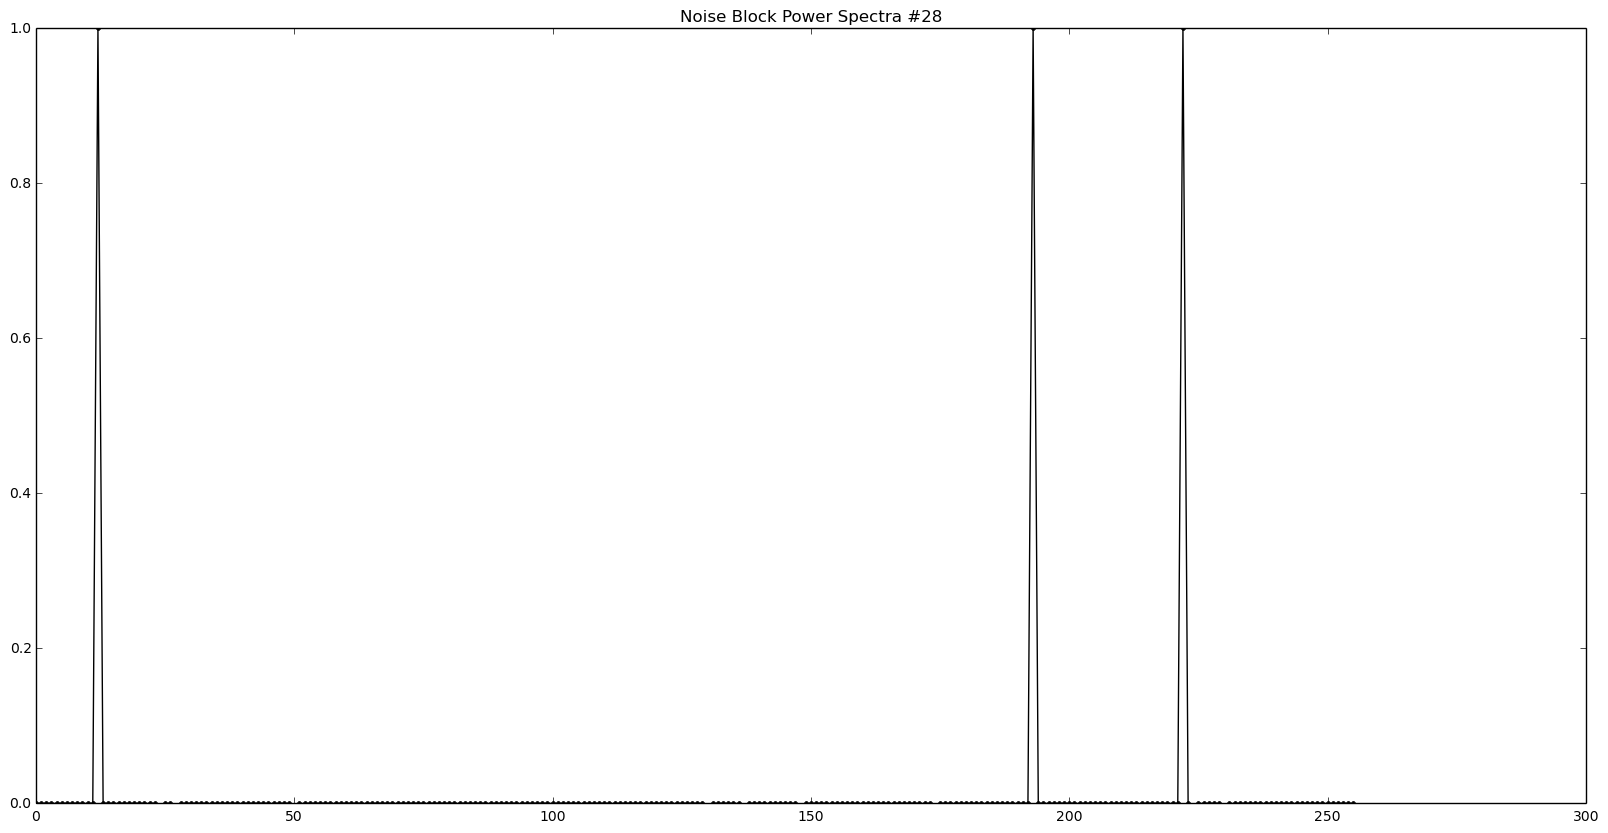

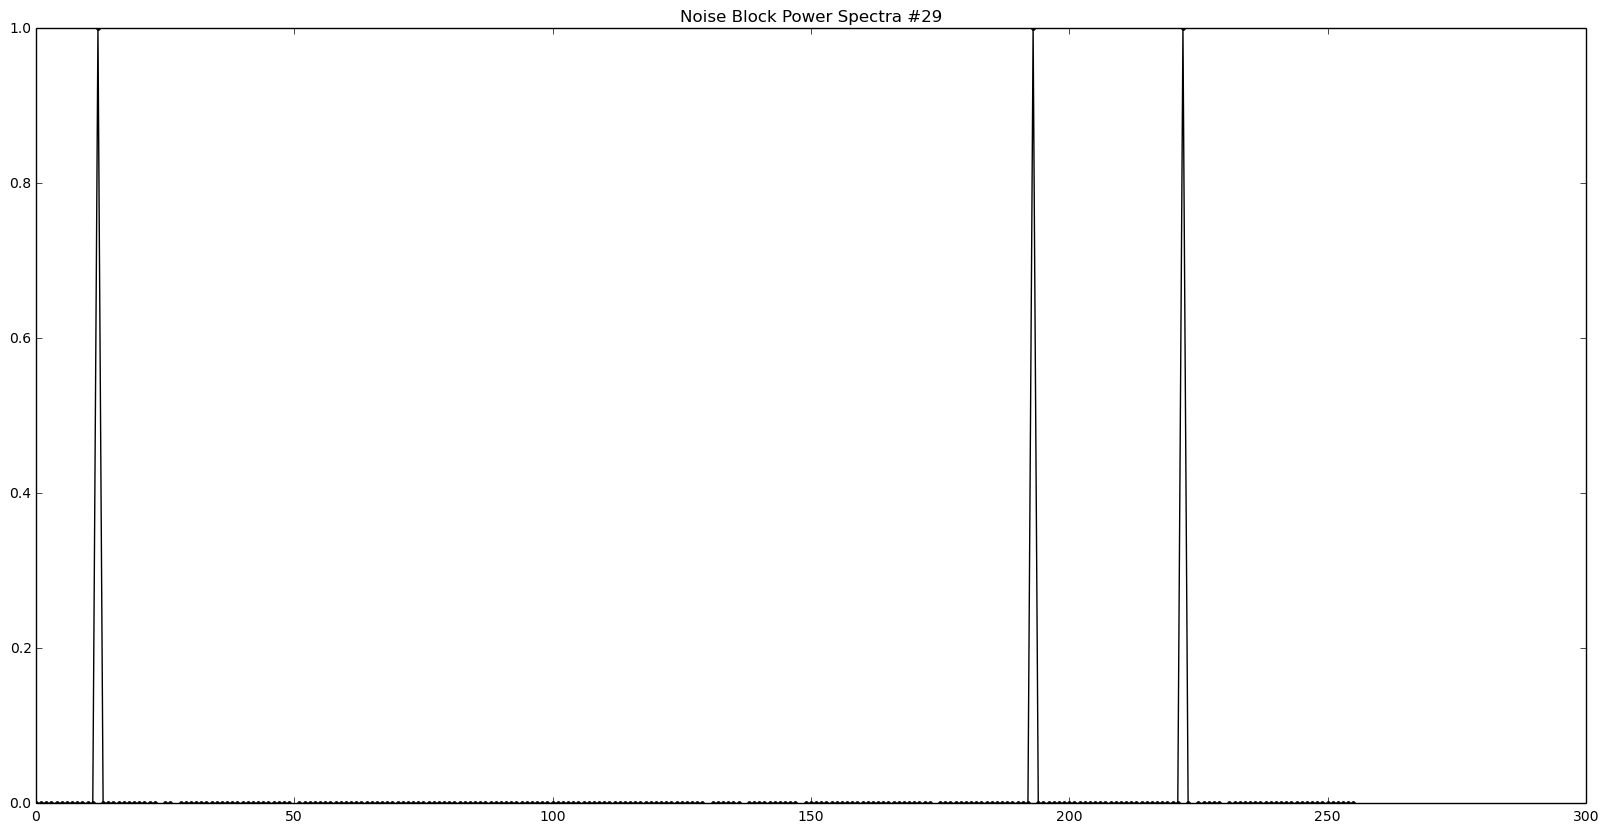

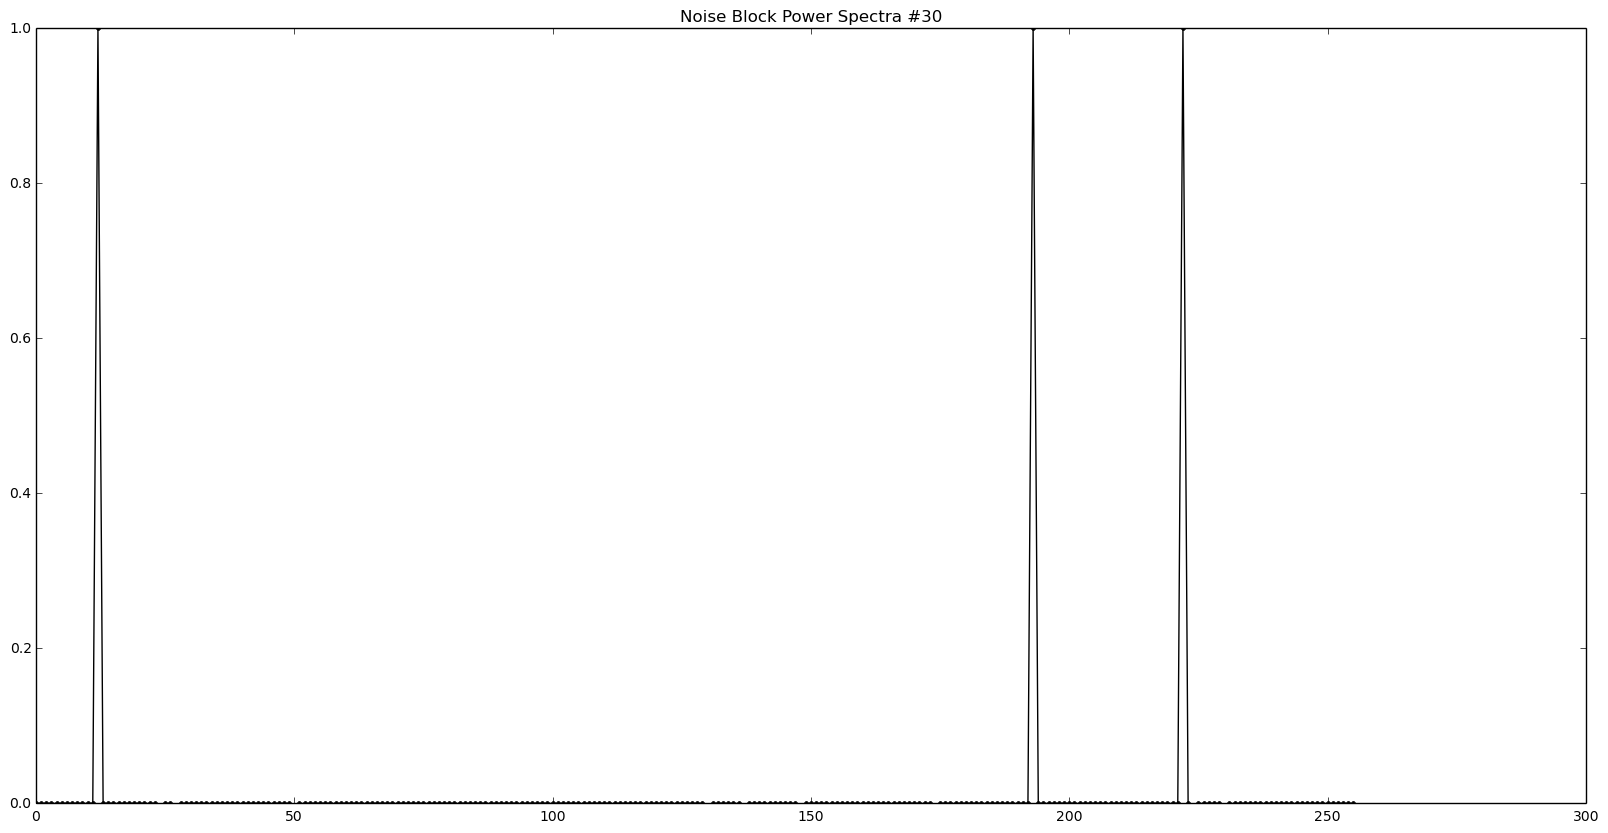

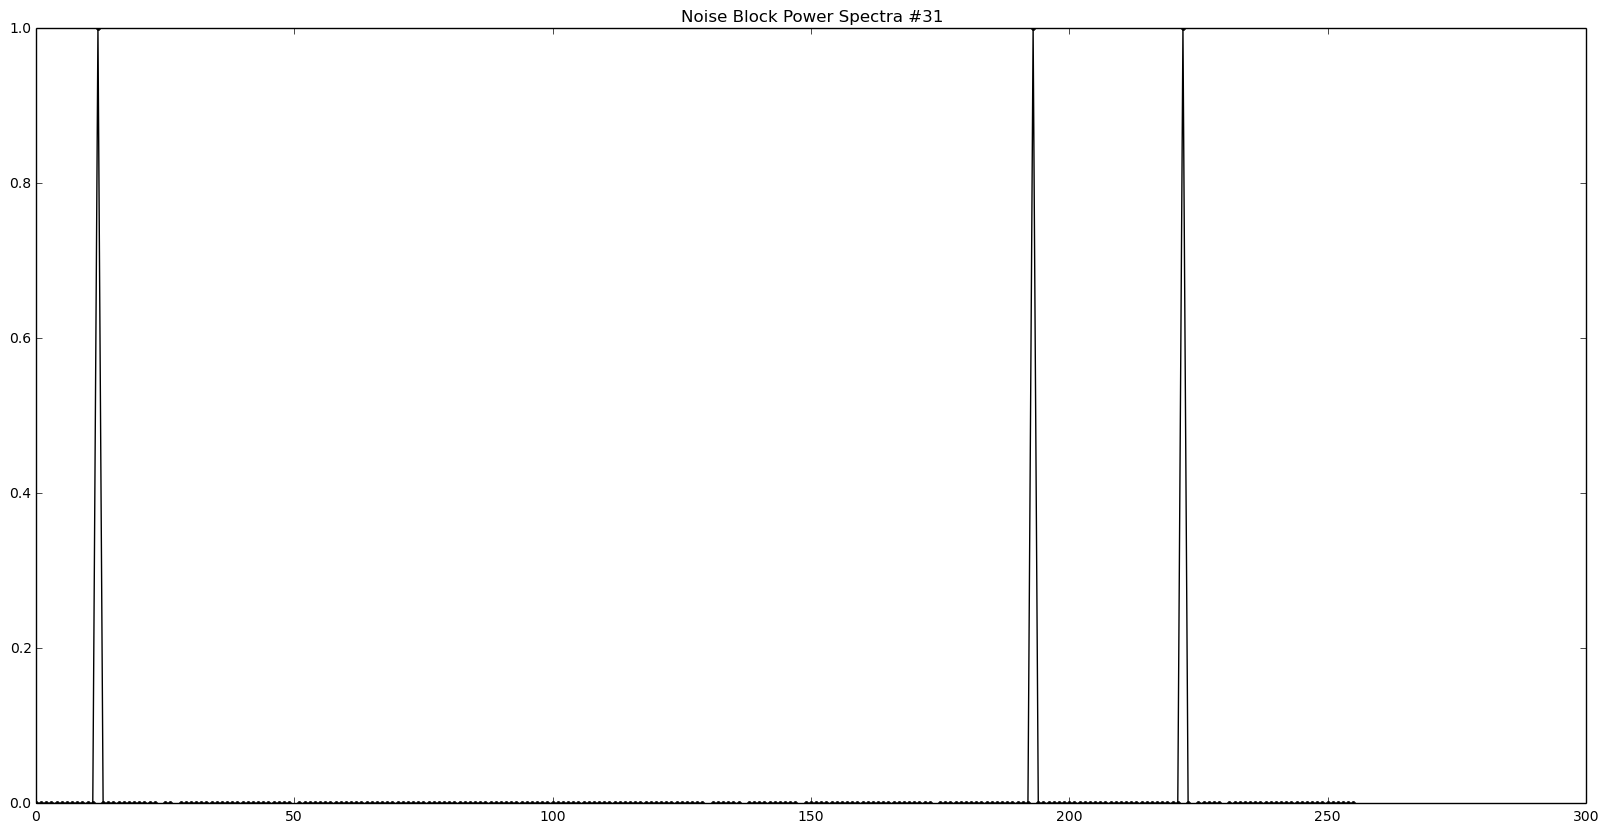

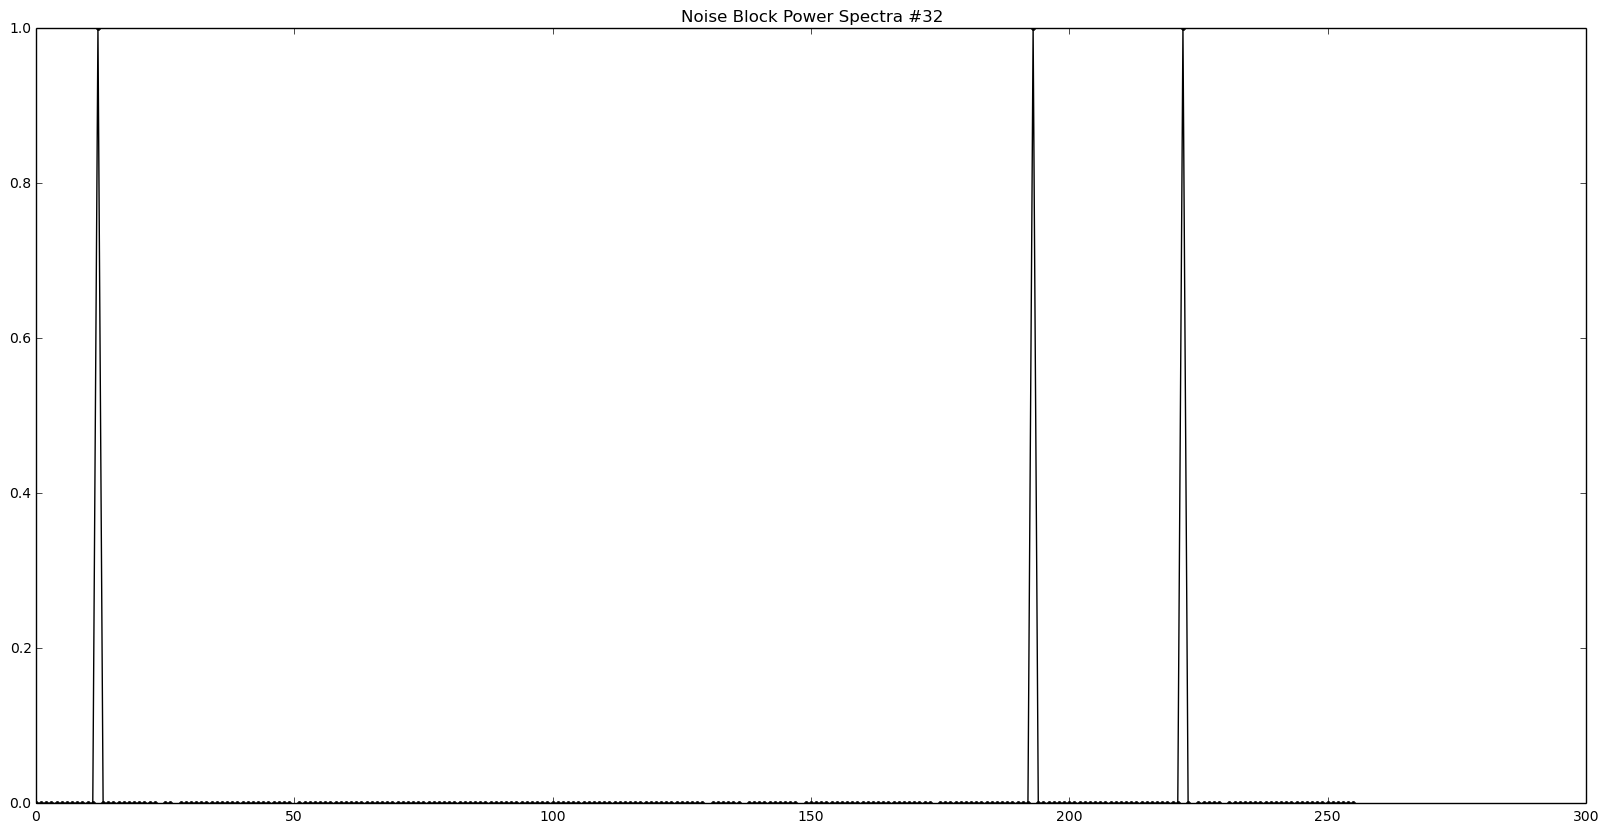

In [16]:
#3.7 Noise Block Power Spectra
for i in range(1,33):
    filename = "noise_sample_" + str(i) + ".npy"
    noise_arr = np.load(filename)
    noise_arr = np.divide(noise_arr, 16384.0)
    freq_new, fourier_plot = ugradio.dft.dft(noise_arr[:N])
    noise_plot = np.abs(noise_plot)**2
    pl.figure(i, figsize=(20,10))
    pl.title("Noise Block Power Spectra #" + str(i))
    pl.plot (noise_plot[:N], 'k.-')

In [17]:
%matplotlib inline
filename = "noise_sample_1.npy"
histogram_arr = np.load(filename)
np.histogram(histogram_arr, bins=10, range= None, normed = False, weights = None, density = None)
pl.figure(i, figsize=(20,10))